In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True


results = []
num_classes = 2

learning_rate = 0.001
samples = 2000
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for batch_size in [256]:
    for hidden_size in [100]:
        for aux_loss_activated in [True]:
            for EPS1 in [0.1]:
                for n in [10000]:
                    for opt in [1]:
                        for t in range(1):
                            train_dataset, test_dataset = ut.load_files(dataset=1)
                            input_size = train_dataset.shape[1]-1
                            

                            if n < 50000:
                                train_dataset = ut.down_sampling(train_dataset)
                                train_dataset = train_dataset.sample(n)
                                print(train_dataset)
                            else: 
                                trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                print('shape: ', trainig_dataset_a.shape[0])
                                n2 = n - trainig_dataset_a.shape[0]
                                print('clase no RR Lrae', n2)
                                trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                            
                            train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

                            train_dataset = ut.sort_columns(train_dataset)
                            test_dataset = ut.sort_columns(test_dataset)

                            test_dataset_pred = test_dataset.copy()
                            train_dataset_pred = train_dataset.copy()

                            try:
                                data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='uniform')

                                train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2, random_state=42)

                                train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2, random_state=42)
                                print(train_dataset_prior.columns)
                                _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                net = Net(input_size, hidden_size, hidden_size, num_classes)
                                net.cuda()

                                hist_val, hist_train = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                acc_train = nn.get_results(net, train_loader, input_size)
                                acc_test =nn.get_results(net, test_loader, input_size)
                                results.append([acc_train, acc_test, epsilon, batch_size, hidden_size, aux_loss_activated, EPS1, n, opt])
                                pd.DataFrame(results, columns=['acc_train', 'acc_test', 'epsilon', 'batch_size', 'hidden_size',
                                    'aux_loss_activated', 'EPS1', 'n', 'opt']).to_csv('07-03-2022-results_2d.csv')
                            except Exception as e:
                                print(e) 
                                print(str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
377989    0.38000         0.000001               1    0.363333  113.380711   
165064    0.32400         0.000000               1    0.416107   30.211445   
21425     0.03050         0.449257               5    0.326667    1.097332   
51237     0.10025         0.002341               6    0.341880   28.713619   
147534    0.02675         0.534269              16    0.311927   61.331596   
...           ...              ...             ...         ...         ...   
99521     0.07100         0.001548               7    0.363636   77.730893   
65722     0.04000         0.000512               4    0.276667   30.948538   
279684    0.01950         0.169019               3    0.314381   20.103544   
370559    0.38350         0.000000               1    0.430000   62.802689   
175567    0.22800         0.003567               1    0.36

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Epochs:  10000
Epoch:  0
training: epoch:  1  loss:  17.082241415977478 -- aux loss:  158.04208481311798
validating: epoch:  1  loss:  1.4902521967887878
Epoch:  1
training: epoch:  2  loss:  17.168287873268127 -- aux loss:  117.85075241327286
validating: epoch:  2  loss:  1.4891577363014221
Epoch:  2
training: epoch:  3  loss:  16.79595559835434 -- aux loss:  118.21627601981163
validating: epoch:  3  loss:  1.4264680743217468
Epoch:  3
training: epoch:  4  loss:  16.147626221179962 -- aux loss:  110.54584011435509
validating: epoch:  4  loss:  1.198338359594345
Epoch:  4
training: epoch:  5  loss:  15.503508269786835 -- aux loss:  82.29766573011875
validating: epoch:  5  loss:  0.8900367021560669
Epoch:  5
training: epoch:  6  loss:  14.236031174659729 -- aux loss:  64.55229166150093
validating: epoch:  6  loss:  0.7338706701993942
Epoch:  6
training: epoch:  7  loss:  12.711389392614365 -- aux loss:  54.838992938399315
validating: epoch:  7  loss:  0.6218322664499283
Epoch:  7
traini

training: epoch:  45  loss:  4.32523974776268 -- aux loss:  0.21086866781115532
validating: epoch:  45  loss:  0.002400299534201622
Epoch:  45
training: epoch:  46  loss:  4.268980234861374 -- aux loss:  0.18576610181480646
validating: epoch:  46  loss:  0.0021141227334737778
Epoch:  46
training: epoch:  47  loss:  4.214115336537361 -- aux loss:  0.16379723697900772
validating: epoch:  47  loss:  0.0018641259521245956
Epoch:  47
training: epoch:  48  loss:  4.160253666341305 -- aux loss:  0.14448388293385506
validating: epoch:  48  loss:  0.0016451682895421982
Epoch:  48
training: epoch:  49  loss:  4.108379803597927 -- aux loss:  0.12735231965780258
validating: epoch:  49  loss:  0.0014510396867990494
Epoch:  49
training: epoch:  50  loss:  4.05830942094326 -- aux loss:  0.11224318109452724
validating: epoch:  50  loss:  0.001280326396226883
The current loss: 0.001280326396226883
the_last_loss: 0.0014510396867990494
trigger times: 0
Accuracy of the network on test objects: 93 %
93
Acc

training: epoch:  88  loss:  2.8579752445220947 -- aux loss:  0.0007769167423248291
validating: epoch:  88  loss:  9.5367431640625e-06
Epoch:  88
training: epoch:  89  loss:  2.8375819101929665 -- aux loss:  0.0006826184689998627
validating: epoch:  89  loss:  7.62939453125e-06
Epoch:  89
training: epoch:  90  loss:  2.818131275475025 -- aux loss:  0.000619940459728241
validating: epoch:  90  loss:  7.62939453125e-06
The current loss: 7.62939453125e-06
the_last_loss: 7.62939453125e-06
trigger times: 0
Accuracy of the network on test objects: 97 %
97
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 62 %
62
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  90
training: epoch:  91  loss:  2.798283129930496 -- aux los

training: epoch:  131  loss:  2.161185871809721 -- aux loss:  4.6566128730773926e-08
validating: epoch:  131  loss:  0.0
Epoch:  131
training: epoch:  132  loss:  2.149124465882778 -- aux loss:  4.6566128730773926e-08
validating: epoch:  132  loss:  0.0
Epoch:  132
training: epoch:  133  loss:  2.1367828510701656 -- aux loss:  4.6566128730773926e-08
validating: epoch:  133  loss:  0.0
Epoch:  133
training: epoch:  134  loss:  2.1249828822910786 -- aux loss:  4.6566128730773926e-08
validating: epoch:  134  loss:  0.0
Epoch:  134
training: epoch:  135  loss:  2.1129427924752235 -- aux loss:  4.6566128730773926e-08
validating: epoch:  135  loss:  0.0
Epoch:  135
training: epoch:  136  loss:  2.1010917760431767 -- aux loss:  4.6566128730773926e-08
validating: epoch:  136  loss:  0.0
Epoch:  136
training: epoch:  137  loss:  2.089543003588915 -- aux loss:  4.6566128730773926e-08
validating: epoch:  137  loss:  0.0
Epoch:  137
training: epoch:  138  loss:  2.0779094733297825 -- aux loss:  4.

training: epoch:  179  loss:  1.7214067988097668 -- aux loss:  8.568167686462402e-08
validating: epoch:  179  loss:  0.0
Epoch:  179
training: epoch:  180  loss:  1.7152974363416433 -- aux loss:  8.381903171539307e-08
validating: epoch:  180  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 69 %
69
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  180
training: epoch:  181  loss:  1.708219362422824 -- aux loss:  8.568167686462402e-08
validating: epoch:  181  loss:  0.0
Epoch:  181
training: epoch:  182  loss:  1.7016074284911156 -- aux loss:  8.568167686462402e-08
validating: epoch:  182  loss:  0.

training: epoch:  223  loss:  1.4751503933221102 -- aux loss:  1.1548399925231934e-07
validating: epoch:  223  loss:  0.0
Epoch:  223
training: epoch:  224  loss:  1.4713118579238653 -- aux loss:  1.0896474123001099e-07
validating: epoch:  224  loss:  0.0
Epoch:  224
training: epoch:  225  loss:  1.4680489115417004 -- aux loss:  1.0896474123001099e-07
validating: epoch:  225  loss:  0.0
Epoch:  225
training: epoch:  226  loss:  1.463979972526431 -- aux loss:  1.0710209608078003e-07
validating: epoch:  226  loss:  0.0
Epoch:  226
training: epoch:  227  loss:  1.4607644248753786 -- aux loss:  1.0989606380462646e-07
validating: epoch:  227  loss:  0.0
Epoch:  227
training: epoch:  228  loss:  1.4568931609392166 -- aux loss:  1.0989606380462646e-07
validating: epoch:  228  loss:  0.0
Epoch:  228
training: epoch:  229  loss:  1.4540330059826374 -- aux loss:  1.0803341865539551e-07
validating: epoch:  229  loss:  0.0
Epoch:  229
training: epoch:  230  loss:  1.451060637831688 -- aux loss:  1

training: epoch:  270  loss:  1.3638808280229568 -- aux loss:  1.6577541828155518e-07
validating: epoch:  270  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 70 %
70
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  270
training: epoch:  271  loss:  1.3612521532922983 -- aux loss:  1.6391277313232422e-07
validating: epoch:  271  loss:  0.0
Epoch:  271
training: epoch:  272  loss:  1.358162248507142 -- aux loss:  1.6763806343078613e-07
validating: epoch:  272  loss:  0.0
Epoch:  272
training: epoch:  273  loss:  1.3555436618626118 -- aux loss:  1.6670674085617065e-07
validating: epoch:  273  loss:

training: epoch:  314  loss:  1.2781192921102047 -- aux loss:  1.7229467630386353e-07
validating: epoch:  314  loss:  0.0
Epoch:  314
training: epoch:  315  loss:  1.2754440754652023 -- aux loss:  1.73225998878479e-07
validating: epoch:  315  loss:  0.0
Epoch:  315
training: epoch:  316  loss:  1.2730563096702099 -- aux loss:  1.7136335372924805e-07
validating: epoch:  316  loss:  0.0
Epoch:  316
training: epoch:  317  loss:  1.2710818368941545 -- aux loss:  1.695007085800171e-07
validating: epoch:  317  loss:  0.0
Epoch:  317
training: epoch:  318  loss:  1.2684755623340607 -- aux loss:  1.6763806343078613e-07
validating: epoch:  318  loss:  0.0
Epoch:  318
training: epoch:  319  loss:  1.2664074786007404 -- aux loss:  1.6298145055770874e-07
validating: epoch:  319  loss:  0.0
Epoch:  319
training: epoch:  320  loss:  1.2644138727337122 -- aux loss:  1.6670674085617065e-07
validating: epoch:  320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the net

training: epoch:  361  loss:  1.1922471020370722 -- aux loss:  1.7136335372924805e-07
validating: epoch:  361  loss:  0.0
Epoch:  361
training: epoch:  362  loss:  1.1892948914319277 -- aux loss:  1.6577541828155518e-07
validating: epoch:  362  loss:  0.0
Epoch:  362
training: epoch:  363  loss:  1.1854394916445017 -- aux loss:  1.6298145055770874e-07
validating: epoch:  363  loss:  0.0
Epoch:  363
training: epoch:  364  loss:  1.1830155309289694 -- aux loss:  1.5832483768463135e-07
validating: epoch:  364  loss:  0.0
Epoch:  364
training: epoch:  365  loss:  1.1808617282658815 -- aux loss:  1.6298145055770874e-07
validating: epoch:  365  loss:  0.0
Epoch:  365
training: epoch:  366  loss:  1.1814474631100893 -- aux loss:  1.6577541828155518e-07
validating: epoch:  366  loss:  0.0
Epoch:  366
training: epoch:  367  loss:  1.1802326627075672 -- aux loss:  1.7043203115463257e-07
validating: epoch:  367  loss:  0.0
Epoch:  367
training: epoch:  368  loss:  1.1791167929768562 -- aux loss: 

training: epoch:  408  loss:  1.040878839790821 -- aux loss:  1.2479722499847412e-07
validating: epoch:  408  loss:  0.0
Epoch:  408
training: epoch:  409  loss:  1.0374768730252981 -- aux loss:  1.2479722499847412e-07
validating: epoch:  409  loss:  0.0
Epoch:  409
training: epoch:  410  loss:  1.0341947227716446 -- aux loss:  1.2479722499847412e-07
validating: epoch:  410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 72 %
72
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  410
training: epoch:  411  loss:  1.0303633157163858 -- aux loss:  1.2386590242385864e-07
validating: epoch:  411  loss:

training: epoch:  452  loss:  0.9153764676302671 -- aux loss:  1.0896474123001099e-07
validating: epoch:  452  loss:  0.0
Epoch:  452
training: epoch:  453  loss:  0.9134676679968834 -- aux loss:  1.0710209608078003e-07
validating: epoch:  453  loss:  0.0
Epoch:  453
training: epoch:  454  loss:  0.911571092903614 -- aux loss:  1.0523945093154907e-07
validating: epoch:  454  loss:  0.0
Epoch:  454
training: epoch:  455  loss:  0.9095324128866196 -- aux loss:  1.043081283569336e-07
validating: epoch:  455  loss:  0.0
Epoch:  455
training: epoch:  456  loss:  0.9067967589944601 -- aux loss:  1.0244548320770264e-07
validating: epoch:  456  loss:  0.0
Epoch:  456
training: epoch:  457  loss:  0.9047352448105812 -- aux loss:  1.0151416063308716e-07
validating: epoch:  457  loss:  0.0
Epoch:  457
training: epoch:  458  loss:  0.9025049321353436 -- aux loss:  9.872019290924072e-08
validating: epoch:  458  loss:  0.0
Epoch:  458
training: epoch:  459  loss:  0.8994295876473188 -- aux loss:  9.

training: epoch:  499  loss:  0.8045524135231972 -- aux loss:  1.3504177331924438e-07
validating: epoch:  499  loss:  0.0
Epoch:  499
training: epoch:  500  loss:  0.8039422892034054 -- aux loss:  1.3504177331924438e-07
validating: epoch:  500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 74 %
74
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  500
training: epoch:  501  loss:  0.8005720432847738 -- aux loss:  1.3597309589385986e-07
validating: epoch:  501  loss:  0.0
Epoch:  501
training: epoch:  502  loss:  0.8007988873869181 -- aux loss:  1.341104507446289e-07
validating: epoch:  502  loss:

training: epoch:  543  loss:  0.7410931885242462 -- aux loss:  9.12696123123169e-08
validating: epoch:  543  loss:  0.0
Epoch:  543
training: epoch:  544  loss:  0.7379823988303542 -- aux loss:  9.033828973770142e-08
validating: epoch:  544  loss:  0.0
Epoch:  544
training: epoch:  545  loss:  0.737403784878552 -- aux loss:  8.568167686462402e-08
validating: epoch:  545  loss:  0.0
Epoch:  545
training: epoch:  546  loss:  0.734775310382247 -- aux loss:  8.381903171539307e-08
validating: epoch:  546  loss:  0.0
Epoch:  546
training: epoch:  547  loss:  0.7322889985516667 -- aux loss:  8.475035429000854e-08
validating: epoch:  547  loss:  0.0
Epoch:  547
training: epoch:  548  loss:  0.730265342630446 -- aux loss:  8.381903171539307e-08
validating: epoch:  548  loss:  0.0
Epoch:  548
training: epoch:  549  loss:  0.7291305623948574 -- aux loss:  8.475035429000854e-08
validating: epoch:  549  loss:  0.0
Epoch:  549
training: epoch:  550  loss:  0.7270589852705598 -- aux loss:  8.47503542

training: epoch:  591  loss:  0.6562178293243051 -- aux loss:  6.426125764846802e-08
validating: epoch:  591  loss:  0.0
Epoch:  591
training: epoch:  592  loss:  0.6527926847338676 -- aux loss:  6.51925802230835e-08
validating: epoch:  592  loss:  0.0
Epoch:  592
training: epoch:  593  loss:  0.6536202104762197 -- aux loss:  6.612390279769897e-08
validating: epoch:  593  loss:  0.0
Epoch:  593
training: epoch:  594  loss:  0.650774409994483 -- aux loss:  6.426125764846802e-08
validating: epoch:  594  loss:  0.0
Epoch:  594
training: epoch:  595  loss:  0.6494094720110297 -- aux loss:  6.612390279769897e-08
validating: epoch:  595  loss:  0.0
Epoch:  595
training: epoch:  596  loss:  0.6470327209681273 -- aux loss:  6.426125764846802e-08
validating: epoch:  596  loss:  0.0
Epoch:  596
training: epoch:  597  loss:  0.6461534909904003 -- aux loss:  6.239861249923706e-08
validating: epoch:  597  loss:  0.0
Epoch:  597
training: epoch:  598  loss:  0.6453492166474462 -- aux loss:  6.239861

training: epoch:  639  loss:  0.5945104723796248 -- aux loss:  8.102506399154663e-08
validating: epoch:  639  loss:  0.0
Epoch:  639
training: epoch:  640  loss:  0.5924125583842397 -- aux loss:  8.102506399154663e-08
validating: epoch:  640  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  640
training: epoch:  641  loss:  0.5932411635294557 -- aux loss:  8.009374141693115e-08
validating: epoch:  641  loss:  0.0
Epoch:  641
training: epoch:  642  loss:  0.590809054672718 -- aux loss:  8.102506399154663e-08
validating: epoch:  642  loss:  0.

training: epoch:  683  loss:  0.5602208096534014 -- aux loss:  3.725290298461914e-08
validating: epoch:  683  loss:  0.0
Epoch:  683
training: epoch:  684  loss:  0.5594939747825265 -- aux loss:  3.91155481338501e-08
validating: epoch:  684  loss:  0.0
Epoch:  684
training: epoch:  685  loss:  0.5576112223789096 -- aux loss:  3.91155481338501e-08
validating: epoch:  685  loss:  0.0
Epoch:  685
training: epoch:  686  loss:  0.5572770275175571 -- aux loss:  3.725290298461914e-08
validating: epoch:  686  loss:  0.0
Epoch:  686
training: epoch:  687  loss:  0.5557745071128011 -- aux loss:  3.725290298461914e-08
validating: epoch:  687  loss:  0.0
Epoch:  687
training: epoch:  688  loss:  0.5550529761239886 -- aux loss:  3.725290298461914e-08
validating: epoch:  688  loss:  0.0
Epoch:  688
training: epoch:  689  loss:  0.5541670303791761 -- aux loss:  3.5390257835388184e-08
validating: epoch:  689  loss:  0.0
Epoch:  689
training: epoch:  690  loss:  0.5523341037333012 -- aux loss:  3.53902

training: epoch:  730  loss:  0.509632520377636 -- aux loss:  3.166496753692627e-08
validating: epoch:  730  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  730
training: epoch:  731  loss:  0.5091192983090878 -- aux loss:  3.259629011154175e-08
validating: epoch:  731  loss:  0.0
Epoch:  731
training: epoch:  732  loss:  0.5086159547790885 -- aux loss:  3.259629011154175e-08
validating: epoch:  732  loss:  0.0
Epoch:  732
training: epoch:  733  loss:  0.5064967013895512 -- aux loss:  3.3527612686157227e-08
validating: epoch:  733  loss:  0

training: epoch:  774  loss:  0.47096728160977364 -- aux loss:  2.8870999813079834e-08
validating: epoch:  774  loss:  0.0
Epoch:  774
training: epoch:  775  loss:  0.4706436339765787 -- aux loss:  2.7939677238464355e-08
validating: epoch:  775  loss:  0.0
Epoch:  775
training: epoch:  776  loss:  0.47110336693003774 -- aux loss:  2.8870999813079834e-08
validating: epoch:  776  loss:  0.0
Epoch:  776
training: epoch:  777  loss:  0.4718793393112719 -- aux loss:  2.8870999813079834e-08
validating: epoch:  777  loss:  0.0
Epoch:  777
training: epoch:  778  loss:  0.4717745487578213 -- aux loss:  2.9802322387695312e-08
validating: epoch:  778  loss:  0.0
Epoch:  778
training: epoch:  779  loss:  0.47264791326597333 -- aux loss:  3.073364496231079e-08
validating: epoch:  779  loss:  0.0
Epoch:  779
training: epoch:  780  loss:  0.4722772487439215 -- aux loss:  3.166496753692627e-08
validating: epoch:  780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the

training: epoch:  821  loss:  0.44186733989045024 -- aux loss:  2.60770320892334e-08
validating: epoch:  821  loss:  0.0
Epoch:  821
training: epoch:  822  loss:  0.44086770014837384 -- aux loss:  2.60770320892334e-08
validating: epoch:  822  loss:  0.0
Epoch:  822
training: epoch:  823  loss:  0.44065276393666863 -- aux loss:  2.60770320892334e-08
validating: epoch:  823  loss:  0.0
Epoch:  823
training: epoch:  824  loss:  0.4402500935830176 -- aux loss:  2.60770320892334e-08
validating: epoch:  824  loss:  0.0
Epoch:  824
training: epoch:  825  loss:  0.43885993072763085 -- aux loss:  2.60770320892334e-08
validating: epoch:  825  loss:  0.0
Epoch:  825
training: epoch:  826  loss:  0.43815937964245677 -- aux loss:  2.60770320892334e-08
validating: epoch:  826  loss:  0.0
Epoch:  826
training: epoch:  827  loss:  0.43760730931535363 -- aux loss:  2.60770320892334e-08
validating: epoch:  827  loss:  0.0
Epoch:  827
training: epoch:  828  loss:  0.4368071365170181 -- aux loss:  2.60770

training: epoch:  869  loss:  0.4091354515403509 -- aux loss:  2.60770320892334e-08
validating: epoch:  869  loss:  0.0
Epoch:  869
training: epoch:  870  loss:  0.4084320622496307 -- aux loss:  2.60770320892334e-08
validating: epoch:  870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  870
training: epoch:  871  loss:  0.40768623165786266 -- aux loss:  2.514570951461792e-08
validating: epoch:  871  loss:  0.0
Epoch:  871
training: epoch:  872  loss:  0.407348807901144 -- aux loss:  2.514570951461792e-08
validating: epoch:  872  loss:  0.0

training: epoch:  913  loss:  0.3856548508629203 -- aux loss:  1.862645149230957e-08
validating: epoch:  913  loss:  0.0
Epoch:  913
training: epoch:  914  loss:  0.3852984015829861 -- aux loss:  2.1420419216156006e-08
validating: epoch:  914  loss:  0.0
Epoch:  914
training: epoch:  915  loss:  0.3847468909807503 -- aux loss:  2.0489096641540527e-08
validating: epoch:  915  loss:  0.0
Epoch:  915
training: epoch:  916  loss:  0.3835398810915649 -- aux loss:  1.862645149230957e-08
validating: epoch:  916  loss:  0.0
Epoch:  916
training: epoch:  917  loss:  0.3829429568722844 -- aux loss:  2.0489096641540527e-08
validating: epoch:  917  loss:  0.0
Epoch:  917
training: epoch:  918  loss:  0.38271870324388146 -- aux loss:  2.2351741790771484e-08
validating: epoch:  918  loss:  0.0
Epoch:  918
training: epoch:  919  loss:  0.3820720789954066 -- aux loss:  2.0489096641540527e-08
validating: epoch:  919  loss:  0.0
Epoch:  919
training: epoch:  920  loss:  0.38071659952402115 -- aux loss: 

training: epoch:  960  loss:  0.3605444780550897 -- aux loss:  2.421438694000244e-08
validating: epoch:  960  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  960
training: epoch:  961  loss:  0.3600015458650887 -- aux loss:  2.421438694000244e-08
validating: epoch:  961  loss:  0.0
Epoch:  961
training: epoch:  962  loss:  0.35940545005723834 -- aux loss:  2.421438694000244e-08
validating: epoch:  962  loss:  0.0
Epoch:  962
training: epoch:  963  loss:  0.3586937775835395 -- aux loss:  2.421438694000244e-08
validating: epoch:  963  loss:  

training: epoch:  1004  loss:  0.3454223540611565 -- aux loss:  2.514570951461792e-08
validating: epoch:  1004  loss:  0.0
Epoch:  1004
training: epoch:  1005  loss:  0.3452217117883265 -- aux loss:  2.561137080192566e-08
validating: epoch:  1005  loss:  0.0
Epoch:  1005
training: epoch:  1006  loss:  0.3452306413091719 -- aux loss:  2.514570951461792e-08
validating: epoch:  1006  loss:  0.0
Epoch:  1006
training: epoch:  1007  loss:  0.3448802474886179 -- aux loss:  2.514570951461792e-08
validating: epoch:  1007  loss:  0.0
Epoch:  1007
training: epoch:  1008  loss:  0.3454650058411062 -- aux loss:  2.514570951461792e-08
validating: epoch:  1008  loss:  0.0
Epoch:  1008
training: epoch:  1009  loss:  0.34501582151278853 -- aux loss:  2.514570951461792e-08
validating: epoch:  1009  loss:  0.0
Epoch:  1009
training: epoch:  1010  loss:  0.34544488973915577 -- aux loss:  2.514570951461792e-08
validating: epoch:  1010  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
A

training: epoch:  1050  loss:  0.33129260037094355 -- aux loss:  2.514570951461792e-08
validating: epoch:  1050  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1050
training: epoch:  1051  loss:  0.33131117513403296 -- aux loss:  2.561137080192566e-08
validating: epoch:  1051  loss:  0.0
Epoch:  1051
training: epoch:  1052  loss:  0.33078249357640743 -- aux loss:  2.561137080192566e-08
validating: epoch:  1052  loss:  0.0
Epoch:  1052
training: epoch:  1053  loss:  0.33046451210975647 -- aux loss:  2.561137080192566e-08
validating: epoch: 

training: epoch:  1093  loss:  0.3183454186655581 -- aux loss:  2.468004822731018e-08
validating: epoch:  1093  loss:  0.0
Epoch:  1093
training: epoch:  1094  loss:  0.3176449299789965 -- aux loss:  2.468004822731018e-08
validating: epoch:  1094  loss:  0.0
Epoch:  1094
training: epoch:  1095  loss:  0.3180049699731171 -- aux loss:  2.468004822731018e-08
validating: epoch:  1095  loss:  0.0
Epoch:  1095
training: epoch:  1096  loss:  0.31816484685987234 -- aux loss:  2.514570951461792e-08
validating: epoch:  1096  loss:  0.0
Epoch:  1096
training: epoch:  1097  loss:  0.3190376195125282 -- aux loss:  2.514570951461792e-08
validating: epoch:  1097  loss:  0.0
Epoch:  1097
training: epoch:  1098  loss:  0.31752805178985 -- aux loss:  2.514570951461792e-08
validating: epoch:  1098  loss:  0.0
Epoch:  1098
training: epoch:  1099  loss:  0.3177904458716512 -- aux loss:  2.6542693376541138e-08
validating: epoch:  1099  loss:  0.0
Epoch:  1099
training: epoch:  1100  loss:  0.317570838611573

training: epoch:  1139  loss:  0.3081455724313855 -- aux loss:  2.2351741790771484e-08
validating: epoch:  1139  loss:  0.0
Epoch:  1139
training: epoch:  1140  loss:  0.3078546514734626 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1140
training: epoch:  1141  loss:  0.30749974492937326 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1141  loss:  0.0
Epoch:  1141
training: epoch:  1142  loss:  0.3070031348615885 -- aux loss:  2.1420419216156006e-08
validating: epoch:

training: epoch:  1182  loss:  0.29626731388270855 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1182  loss:  0.0
Epoch:  1182
training: epoch:  1183  loss:  0.29530203668400645 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1183  loss:  0.0
Epoch:  1183
training: epoch:  1184  loss:  0.29535567248240113 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1184  loss:  0.0
Epoch:  1184
training: epoch:  1185  loss:  0.2959058149717748 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1185  loss:  0.0
Epoch:  1185
training: epoch:  1186  loss:  0.29544042656198144 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1186  loss:  0.0
Epoch:  1186
training: epoch:  1187  loss:  0.2953080693259835 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1187  loss:  0.0
Epoch:  1187
training: epoch:  1188  loss:  0.2945627626031637 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1188  loss:  0.0
Epoch:  1188
training: epoch:  1189  loss:  0.2950

training: epoch:  1228  loss:  0.27958232164382935 -- aux loss:  1.862645149230957e-08
validating: epoch:  1228  loss:  0.0
Epoch:  1228
training: epoch:  1229  loss:  0.2790405051782727 -- aux loss:  1.7695128917694092e-08
validating: epoch:  1229  loss:  0.0
Epoch:  1229
training: epoch:  1230  loss:  0.2784417783841491 -- aux loss:  1.955777406692505e-08
validating: epoch:  1230  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1230
training: epoch:  1231  loss:  0.2783765918575227 -- aux loss:  1.862645149230957e-08
validating: epoch:  1

training: epoch:  1271  loss:  0.26593685941770673 -- aux loss:  2.0489096641540527e-08
validating: epoch:  1271  loss:  0.0
Epoch:  1271
training: epoch:  1272  loss:  0.265432289801538 -- aux loss:  2.0489096641540527e-08
validating: epoch:  1272  loss:  0.0
Epoch:  1272
training: epoch:  1273  loss:  0.26527181873098016 -- aux loss:  2.2351741790771484e-08
validating: epoch:  1273  loss:  0.0
Epoch:  1273
training: epoch:  1274  loss:  0.26521218940615654 -- aux loss:  2.2351741790771484e-08
validating: epoch:  1274  loss:  0.0
Epoch:  1274
training: epoch:  1275  loss:  0.2646016599610448 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1275  loss:  0.0
Epoch:  1275
training: epoch:  1276  loss:  0.26416656794026494 -- aux loss:  2.0489096641540527e-08
validating: epoch:  1276  loss:  0.0
Epoch:  1276
training: epoch:  1277  loss:  0.26421337062492967 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1277  loss:  0.0
Epoch:  1277
training: epoch:  1278  loss:  0.2637

training: epoch:  1317  loss:  0.25334726739674807 -- aux loss:  1.862645149230957e-08
validating: epoch:  1317  loss:  0.0
Epoch:  1317
training: epoch:  1318  loss:  0.2533938349224627 -- aux loss:  1.955777406692505e-08
validating: epoch:  1318  loss:  0.0
Epoch:  1318
training: epoch:  1319  loss:  0.25324296532198787 -- aux loss:  1.955777406692505e-08
validating: epoch:  1319  loss:  0.0
Epoch:  1319
training: epoch:  1320  loss:  0.25333445565775037 -- aux loss:  1.862645149230957e-08
validating: epoch:  1320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  1361  loss:  0.24275137390941381 -- aux loss:  1.955777406692505e-08
validating: epoch:  1361  loss:  0.0
Epoch:  1361
training: epoch:  1362  loss:  0.24283145600929856 -- aux loss:  1.862645149230957e-08
validating: epoch:  1362  loss:  0.0
Epoch:  1362
training: epoch:  1363  loss:  0.24238689010962844 -- aux loss:  1.955777406692505e-08
validating: epoch:  1363  loss:  0.0
Epoch:  1363
training: epoch:  1364  loss:  0.2420427892357111 -- aux loss:  1.862645149230957e-08
validating: epoch:  1364  loss:  0.0
Epoch:  1364
training: epoch:  1365  loss:  0.2417303235270083 -- aux loss:  1.862645149230957e-08
validating: epoch:  1365  loss:  0.0
Epoch:  1365
training: epoch:  1366  loss:  0.24183712527155876 -- aux loss:  1.862645149230957e-08
validating: epoch:  1366  loss:  0.0
Epoch:  1366
training: epoch:  1367  loss:  0.24154508532956243 -- aux loss:  1.862645149230957e-08
validating: epoch:  1367  loss:  0.0
Epoch:  1367
training: epoch:  1368  loss:  0.2415151013

training: epoch:  1407  loss:  0.2273409510962665 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1407  loss:  0.0
Epoch:  1407
training: epoch:  1408  loss:  0.2270621513016522 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1408  loss:  0.0
Epoch:  1408
training: epoch:  1409  loss:  0.22709956904873252 -- aux loss:  9.313225746154785e-09
validating: epoch:  1409  loss:  0.0
Epoch:  1409
training: epoch:  1410  loss:  0.22581642121076584 -- aux loss:  9.313225746154785e-09
validating: epoch:  1410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  1451  loss:  0.2145097521133721 -- aux loss:  1.30385160446167e-08
validating: epoch:  1451  loss:  0.0
Epoch:  1451
training: epoch:  1452  loss:  0.21420057211071253 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1452  loss:  0.0
Epoch:  1452
training: epoch:  1453  loss:  0.21405771607533097 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1453  loss:  0.0
Epoch:  1453
training: epoch:  1454  loss:  0.21415406931191683 -- aux loss:  1.210719347000122e-08
validating: epoch:  1454  loss:  0.0
Epoch:  1454
training: epoch:  1455  loss:  0.2138388166204095 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1455  loss:  0.0
Epoch:  1455
training: epoch:  1456  loss:  0.21326760854572058 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1456  loss:  0.0
Epoch:  1456
training: epoch:  1457  loss:  0.21274644322693348 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1457  loss:  0.0
Epoch:  1457
training: epoch:  1458  loss:  0.212338

training: epoch:  1497  loss:  0.20348924351856112 -- aux loss:  5.587935447692871e-09
validating: epoch:  1497  loss:  0.0
Epoch:  1497
training: epoch:  1498  loss:  0.2034740843810141 -- aux loss:  5.587935447692871e-09
validating: epoch:  1498  loss:  0.0
Epoch:  1498
training: epoch:  1499  loss:  0.20342565840110183 -- aux loss:  6.51925802230835e-09
validating: epoch:  1499  loss:  0.0
Epoch:  1499
training: epoch:  1500  loss:  0.20266418484970927 -- aux loss:  6.51925802230835e-09
validating: epoch:  1500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, de

training: epoch:  1541  loss:  0.19562664069235325 -- aux loss:  5.587935447692871e-09
validating: epoch:  1541  loss:  0.0
Epoch:  1541
training: epoch:  1542  loss:  0.19533157953992486 -- aux loss:  5.587935447692871e-09
validating: epoch:  1542  loss:  0.0
Epoch:  1542
training: epoch:  1543  loss:  0.19585739122703671 -- aux loss:  6.51925802230835e-09
validating: epoch:  1543  loss:  0.0
Epoch:  1543
training: epoch:  1544  loss:  0.19504470517858863 -- aux loss:  5.587935447692871e-09
validating: epoch:  1544  loss:  0.0
Epoch:  1544
training: epoch:  1545  loss:  0.1948495372198522 -- aux loss:  4.6566128730773926e-09
validating: epoch:  1545  loss:  0.0
Epoch:  1545
training: epoch:  1546  loss:  0.19453964894637465 -- aux loss:  5.587935447692871e-09
validating: epoch:  1546  loss:  0.0
Epoch:  1546
training: epoch:  1547  loss:  0.19413516018539667 -- aux loss:  5.587935447692871e-09
validating: epoch:  1547  loss:  0.0
Epoch:  1547
training: epoch:  1548  loss:  0.194945547

training: epoch:  1587  loss:  0.18815163290128112 -- aux loss:  2.0023435354232788e-08
validating: epoch:  1587  loss:  0.0
Epoch:  1587
training: epoch:  1588  loss:  0.1881783369462937 -- aux loss:  1.909211277961731e-08
validating: epoch:  1588  loss:  0.0
Epoch:  1588
training: epoch:  1589  loss:  0.18830185988917947 -- aux loss:  1.909211277961731e-08
validating: epoch:  1589  loss:  0.0
Epoch:  1589
training: epoch:  1590  loss:  0.1878165069501847 -- aux loss:  1.909211277961731e-08
validating: epoch:  1590  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  1631  loss:  0.1773005505092442 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1631  loss:  0.0
Epoch:  1631
training: epoch:  1632  loss:  0.17658703704364598 -- aux loss:  1.862645149230957e-09
validating: epoch:  1632  loss:  0.0
Epoch:  1632
training: epoch:  1633  loss:  0.1762501341290772 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1633  loss:  0.0
Epoch:  1633
training: epoch:  1634  loss:  0.17613908415660262 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1634  loss:  0.0
Epoch:  1634
training: epoch:  1635  loss:  0.1760267773643136 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1635  loss:  0.0
Epoch:  1635
training: epoch:  1636  loss:  0.1755501483567059 -- aux loss:  1.862645149230957e-09
validating: epoch:  1636  loss:  0.0
Epoch:  1636
training: epoch:  1637  loss:  0.17542665009386837 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1637  loss:  0.0
Epoch:  1637
training: epoch:  1638  loss:  0.1751090

training: epoch:  1677  loss:  0.1680142788682133 -- aux loss:  1.862645149230957e-09
validating: epoch:  1677  loss:  0.0
Epoch:  1677
training: epoch:  1678  loss:  0.16819095890969038 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1678  loss:  0.0
Epoch:  1678
training: epoch:  1679  loss:  0.1674698533024639 -- aux loss:  3.725290298461914e-09
validating: epoch:  1679  loss:  0.0
Epoch:  1679
training: epoch:  1680  loss:  0.16763882036320865 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  1721  loss:  0.16751322941854596 -- aux loss:  6.51925802230835e-09
validating: epoch:  1721  loss:  0.0
Epoch:  1721
training: epoch:  1722  loss:  0.1679026281926781 -- aux loss:  6.51925802230835e-09
validating: epoch:  1722  loss:  0.0
Epoch:  1722
training: epoch:  1723  loss:  0.1667229770682752 -- aux loss:  6.51925802230835e-09
validating: epoch:  1723  loss:  0.0
Epoch:  1723
training: epoch:  1724  loss:  0.1664176166523248 -- aux loss:  6.51925802230835e-09
validating: epoch:  1724  loss:  0.0
Epoch:  1724
training: epoch:  1725  loss:  0.16611221665516496 -- aux loss:  4.6566128730773926e-09
validating: epoch:  1725  loss:  0.0
Epoch:  1725
training: epoch:  1726  loss:  0.1661254575010389 -- aux loss:  6.51925802230835e-09
validating: epoch:  1726  loss:  0.0
Epoch:  1726
training: epoch:  1727  loss:  0.16643899958580732 -- aux loss:  5.587935447692871e-09
validating: epoch:  1727  loss:  0.0
Epoch:  1727
training: epoch:  1728  loss:  0.1661465652287006

training: epoch:  1767  loss:  0.15953109646216035 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1767  loss:  0.0
Epoch:  1767
training: epoch:  1768  loss:  0.1594278181437403 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1768  loss:  0.0
Epoch:  1768
training: epoch:  1769  loss:  0.158610874786973 -- aux loss:  1.862645149230957e-09
validating: epoch:  1769  loss:  0.0
Epoch:  1769
training: epoch:  1770  loss:  0.15973546798340976 -- aux loss:  1.862645149230957e-09
validating: epoch:  1770  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  1811  loss:  0.15274267038330436 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1811  loss:  0.0
Epoch:  1811
training: epoch:  1812  loss:  0.15166582027450204 -- aux loss:  1.862645149230957e-09
validating: epoch:  1812  loss:  0.0
Epoch:  1812
training: epoch:  1813  loss:  0.1515782680362463 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1813  loss:  0.0
Epoch:  1813
training: epoch:  1814  loss:  0.1512862213421613 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1814  loss:  0.0
Epoch:  1814
training: epoch:  1815  loss:  0.1518797818571329 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1815  loss:  0.0
Epoch:  1815
training: epoch:  1816  loss:  0.15135841723531485 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1816  loss:  0.0
Epoch:  1816
training: epoch:  1817  loss:  0.15197528759017587 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1817  loss:  0.0
Epoch:  1817
training: epoch:  1818  loss:  0.15101

training: epoch:  1857  loss:  0.14590408257208765 -- aux loss:  9.313225746154785e-10
validating: epoch:  1857  loss:  0.0
Epoch:  1857
training: epoch:  1858  loss:  0.1461453769588843 -- aux loss:  1.862645149230957e-09
validating: epoch:  1858  loss:  0.0
Epoch:  1858
training: epoch:  1859  loss:  0.14540296839550138 -- aux loss:  1.862645149230957e-09
validating: epoch:  1859  loss:  0.0
Epoch:  1859
training: epoch:  1860  loss:  0.1449857800034806 -- aux loss:  1.862645149230957e-09
validating: epoch:  1860  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  1901  loss:  0.14009092980995774 -- aux loss:  9.313225746154785e-10
validating: epoch:  1901  loss:  0.0
Epoch:  1901
training: epoch:  1902  loss:  0.14052287756931037 -- aux loss:  9.313225746154785e-10
validating: epoch:  1902  loss:  0.0
Epoch:  1902
training: epoch:  1903  loss:  0.1397969671525061 -- aux loss:  9.313225746154785e-10
validating: epoch:  1903  loss:  0.0
Epoch:  1903
training: epoch:  1904  loss:  0.1401205661240965 -- aux loss:  9.313225746154785e-10
validating: epoch:  1904  loss:  0.0
Epoch:  1904
training: epoch:  1905  loss:  0.1395785097265616 -- aux loss:  9.313225746154785e-10
validating: epoch:  1905  loss:  0.0
Epoch:  1905
training: epoch:  1906  loss:  0.14050091023091227 -- aux loss:  9.313225746154785e-10
validating: epoch:  1906  loss:  0.0
Epoch:  1906
training: epoch:  1907  loss:  0.1392414834117517 -- aux loss:  9.313225746154785e-10
validating: epoch:  1907  loss:  0.0
Epoch:  1907
training: epoch:  1908  loss:  0.140041557489

training: epoch:  1949  loss:  0.1315490211127326 -- aux loss:  9.313225746154785e-10
validating: epoch:  1949  loss:  0.0
Epoch:  1949
training: epoch:  1950  loss:  0.13195903156884015 -- aux loss:  0.0
validating: epoch:  1950  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1950
training: epoch:  1951  loss:  0.13177625788375735 -- aux loss:  0.0
validating: epoch:  1951  loss:  0.0
Epoch:  1951
training: epoch:  1952  loss:  0.132087979814969 -- aux loss:  0.0
validating: epoch:  1952  loss:  0.0
Epoch:  1952
training: epoch:  1953  lo

training: epoch:  1994  loss:  0.12650622124783695 -- aux loss:  9.313225746154785e-10
validating: epoch:  1994  loss:  0.0
Epoch:  1994
training: epoch:  1995  loss:  0.12623357598204166 -- aux loss:  1.862645149230957e-09
validating: epoch:  1995  loss:  0.0
Epoch:  1995
training: epoch:  1996  loss:  0.1269185080891475 -- aux loss:  9.313225746154785e-10
validating: epoch:  1996  loss:  0.0
Epoch:  1996
training: epoch:  1997  loss:  0.12616584787610918 -- aux loss:  1.862645149230957e-09
validating: epoch:  1997  loss:  0.0
Epoch:  1997
training: epoch:  1998  loss:  0.125718119321391 -- aux loss:  1.862645149230957e-09
validating: epoch:  1998  loss:  0.0
Epoch:  1998
training: epoch:  1999  loss:  0.12570820364635438 -- aux loss:  1.862645149230957e-09
validating: epoch:  1999  loss:  0.0
Epoch:  1999
training: epoch:  2000  loss:  0.12568285211455077 -- aux loss:  9.313225746154785e-10
validating: epoch:  2000  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0

training: epoch:  2041  loss:  0.120857915841043 -- aux loss:  0.0
validating: epoch:  2041  loss:  0.0
Epoch:  2041
training: epoch:  2042  loss:  0.12116301211062819 -- aux loss:  9.313225746154785e-10
validating: epoch:  2042  loss:  0.0
Epoch:  2042
training: epoch:  2043  loss:  0.12071641383226961 -- aux loss:  1.862645149230957e-09
validating: epoch:  2043  loss:  0.0
Epoch:  2043
training: epoch:  2044  loss:  0.12157493538688868 -- aux loss:  9.313225746154785e-10
validating: epoch:  2044  loss:  0.0
Epoch:  2044
training: epoch:  2045  loss:  0.12074049306102097 -- aux loss:  1.862645149230957e-09
validating: epoch:  2045  loss:  0.0
Epoch:  2045
training: epoch:  2046  loss:  0.12066663627047092 -- aux loss:  9.313225746154785e-10
validating: epoch:  2046  loss:  0.0
Epoch:  2046
training: epoch:  2047  loss:  0.12024213827680796 -- aux loss:  9.313225746154785e-10
validating: epoch:  2047  loss:  0.0
Epoch:  2047
training: epoch:  2048  loss:  0.12024064746219665 -- aux los

training: epoch:  2089  loss:  0.11614852689672261 -- aux loss:  9.313225746154785e-10
validating: epoch:  2089  loss:  0.0
Epoch:  2089
training: epoch:  2090  loss:  0.11547916824929416 -- aux loss:  0.0
validating: epoch:  2090  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2090
training: epoch:  2091  loss:  0.11529176181647927 -- aux loss:  0.0
validating: epoch:  2091  loss:  0.0
Epoch:  2091
training: epoch:  2092  loss:  0.11558374401647598 -- aux loss:  0.0
validating: epoch:  2092  loss:  0.0
Epoch:  2092
training: epoch:  2093 

training: epoch:  2134  loss:  0.11088165635010228 -- aux loss:  1.862645149230957e-09
validating: epoch:  2134  loss:  0.0
Epoch:  2134
training: epoch:  2135  loss:  0.11110935022588819 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2135  loss:  0.0
Epoch:  2135
training: epoch:  2136  loss:  0.11060290253954008 -- aux loss:  9.313225746154785e-10
validating: epoch:  2136  loss:  0.0
Epoch:  2136
training: epoch:  2137  loss:  0.11066497175488621 -- aux loss:  1.862645149230957e-09
validating: epoch:  2137  loss:  0.0
Epoch:  2137
training: epoch:  2138  loss:  0.1105562272714451 -- aux loss:  1.862645149230957e-09
validating: epoch:  2138  loss:  0.0
Epoch:  2138
training: epoch:  2139  loss:  0.1103448246140033 -- aux loss:  1.862645149230957e-09
validating: epoch:  2139  loss:  0.0
Epoch:  2139
training: epoch:  2140  loss:  0.10999764868756756 -- aux loss:  1.862645149230957e-09
validating: epoch:  2140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times:

training: epoch:  2180  loss:  0.10685647104401141 -- aux loss:  1.0244548320770264e-08
validating: epoch:  2180  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2180
training: epoch:  2181  loss:  0.10665113991126418 -- aux loss:  1.1175870895385742e-08
validating: epoch:  2181  loss:  0.0
Epoch:  2181
training: epoch:  2182  loss:  0.10682567267213017 -- aux loss:  6.51925802230835e-09
validating: epoch:  2182  loss:  0.0
Epoch:  2182
training: epoch:  2183  loss:  0.10688221169402823 -- aux loss:  8.381903171539307e-09
validating: epoch:

training: epoch:  2223  loss:  0.10138907673535869 -- aux loss:  1.862645149230957e-09
validating: epoch:  2223  loss:  0.0
Epoch:  2223
training: epoch:  2224  loss:  0.10136696341214702 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2224  loss:  0.0
Epoch:  2224
training: epoch:  2225  loss:  0.10195095936069265 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2225  loss:  0.0
Epoch:  2225
training: epoch:  2226  loss:  0.10255033342400566 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2226  loss:  0.0
Epoch:  2226
training: epoch:  2227  loss:  0.10345597373088822 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2227  loss:  0.0
Epoch:  2227
training: epoch:  2228  loss:  0.10285193793242797 -- aux loss:  1.862645149230957e-09
validating: epoch:  2228  loss:  0.0
Epoch:  2228
training: epoch:  2229  loss:  0.10228062351234257 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2229  loss:  0.0
Epoch:  2229
training: epoch:  2230  loss:  0.102

training: epoch:  2269  loss:  0.09800031926715747 -- aux loss:  4.656612873077393e-10
validating: epoch:  2269  loss:  0.0
Epoch:  2269
training: epoch:  2270  loss:  0.09765239572152495 -- aux loss:  0.0
validating: epoch:  2270  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2270
training: epoch:  2271  loss:  0.09760508930776268 -- aux loss:  0.0
validating: epoch:  2271  loss:  0.0
Epoch:  2271
training: epoch:  2272  loss:  0.09750366461230442 -- aux loss:  0.0
validating: epoch:  2272  loss:  0.0
Epoch:  2272
training: epoch:  2273 

training: epoch:  2315  loss:  0.10237155837239698 -- aux loss:  1.862645149230957e-09
validating: epoch:  2315  loss:  0.0
Epoch:  2315
training: epoch:  2316  loss:  0.10131109337089583 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2316  loss:  0.0
Epoch:  2316
training: epoch:  2317  loss:  0.10156206681858748 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2317  loss:  0.0
Epoch:  2317
training: epoch:  2318  loss:  0.10138668777653947 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2318  loss:  0.0
Epoch:  2318
training: epoch:  2319  loss:  0.10188033222220838 -- aux loss:  3.259629011154175e-09
validating: epoch:  2319  loss:  0.0
Epoch:  2319
training: epoch:  2320  loss:  0.10202646371908486 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on te

training: epoch:  2361  loss:  0.10810799070168287 -- aux loss:  2.8405338525772095e-08
validating: epoch:  2361  loss:  0.0
Epoch:  2361
training: epoch:  2362  loss:  0.10801124584395438 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2362  loss:  0.0
Epoch:  2362
training: epoch:  2363  loss:  0.10850193427177146 -- aux loss:  2.8405338525772095e-08
validating: epoch:  2363  loss:  0.0
Epoch:  2363
training: epoch:  2364  loss:  0.10757417330751196 -- aux loss:  2.7939677238464355e-08
validating: epoch:  2364  loss:  0.0
Epoch:  2364
training: epoch:  2365  loss:  0.10779965238180012 -- aux loss:  2.8870999813079834e-08
validating: epoch:  2365  loss:  0.0
Epoch:  2365
training: epoch:  2366  loss:  0.10785800981102511 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2366  loss:  0.0
Epoch:  2366
training: epoch:  2367  loss:  0.10730879980837926 -- aux loss:  2.8870999813079834e-08
validating: epoch:  2367  loss:  0.0
Epoch:  2367
training: epoch:  2368  loss:  0.1

training: epoch:  2408  loss:  0.09742390958126634 -- aux loss:  0.0
validating: epoch:  2408  loss:  0.0
Epoch:  2408
training: epoch:  2409  loss:  0.09709159383783117 -- aux loss:  0.0
validating: epoch:  2409  loss:  0.0
Epoch:  2409
training: epoch:  2410  loss:  0.09693503321614116 -- aux loss:  0.0
validating: epoch:  2410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2410
training: epoch:  2411  loss:  0.09730919724097475 -- aux loss:  0.0
validating: epoch:  2411  loss:  0.0
Epoch:  2411
training: epoch:  2412  loss:  0.09681388

training: epoch:  2455  loss:  0.09427405975293368 -- aux loss:  1.862645149230957e-09
validating: epoch:  2455  loss:  0.0
Epoch:  2455
training: epoch:  2456  loss:  0.0942635391256772 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2456  loss:  0.0
Epoch:  2456
training: epoch:  2457  loss:  0.09355491184396669 -- aux loss:  9.313225746154785e-10
validating: epoch:  2457  loss:  0.0
Epoch:  2457
training: epoch:  2458  loss:  0.0936413862509653 -- aux loss:  9.313225746154785e-10
validating: epoch:  2458  loss:  0.0
Epoch:  2458
training: epoch:  2459  loss:  0.09342881548218429 -- aux loss:  9.313225746154785e-10
validating: epoch:  2459  loss:  0.0
Epoch:  2459
training: epoch:  2460  loss:  0.09370242495788261 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2460  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test o

training: epoch:  2501  loss:  0.09050488256616518 -- aux loss:  9.313225746154785e-10
validating: epoch:  2501  loss:  0.0
Epoch:  2501
training: epoch:  2502  loss:  0.090309570543468 -- aux loss:  9.313225746154785e-10
validating: epoch:  2502  loss:  0.0
Epoch:  2502
training: epoch:  2503  loss:  0.09048286604229361 -- aux loss:  9.313225746154785e-10
validating: epoch:  2503  loss:  0.0
Epoch:  2503
training: epoch:  2504  loss:  0.09034497803077102 -- aux loss:  9.313225746154785e-10
validating: epoch:  2504  loss:  0.0
Epoch:  2504
training: epoch:  2505  loss:  0.09029368701158091 -- aux loss:  9.313225746154785e-10
validating: epoch:  2505  loss:  0.0
Epoch:  2505
training: epoch:  2506  loss:  0.09015336720040068 -- aux loss:  4.656612873077393e-10
validating: epoch:  2506  loss:  0.0
Epoch:  2506
training: epoch:  2507  loss:  0.0900861972477287 -- aux loss:  4.656612873077393e-10
validating: epoch:  2507  loss:  0.0
Epoch:  2507
training: epoch:  2508  loss:  0.08992405456

training: epoch:  2549  loss:  0.0877632379415445 -- aux loss:  4.656612873077393e-10
validating: epoch:  2549  loss:  0.0
Epoch:  2549
training: epoch:  2550  loss:  0.08752557361731306 -- aux loss:  9.313225746154785e-10
validating: epoch:  2550  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2550
training: epoch:  2551  loss:  0.0871275583631359 -- aux loss:  4.656612873077393e-10
validating: epoch:  2551  loss:  0.0
Epoch:  2551
training: epoch:  2552  loss:  0.08739219326525927 -- aux loss:  4.656612873077393e-10
validating: epoch:  2

training: epoch:  2596  loss:  0.08451230719219893 -- aux loss:  0.0
validating: epoch:  2596  loss:  0.0
Epoch:  2596
training: epoch:  2597  loss:  0.08449452789500356 -- aux loss:  0.0
validating: epoch:  2597  loss:  0.0
Epoch:  2597
training: epoch:  2598  loss:  0.08462260407395661 -- aux loss:  0.0
validating: epoch:  2598  loss:  0.0
Epoch:  2598
training: epoch:  2599  loss:  0.08399186754832044 -- aux loss:  0.0
validating: epoch:  2599  loss:  0.0
Epoch:  2599
training: epoch:  2600  loss:  0.08420095953624696 -- aux loss:  0.0
validating: epoch:  2600  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000

training: epoch:  2645  loss:  0.08165063872002065 -- aux loss:  0.0
validating: epoch:  2645  loss:  0.0
Epoch:  2645
training: epoch:  2646  loss:  0.08129456342430785 -- aux loss:  0.0
validating: epoch:  2646  loss:  0.0
Epoch:  2646
training: epoch:  2647  loss:  0.08144014503341168 -- aux loss:  0.0
validating: epoch:  2647  loss:  0.0
Epoch:  2647
training: epoch:  2648  loss:  0.08132046472746879 -- aux loss:  0.0
validating: epoch:  2648  loss:  0.0
Epoch:  2648
training: epoch:  2649  loss:  0.08128036936977878 -- aux loss:  0.0
validating: epoch:  2649  loss:  0.0
Epoch:  2649
training: epoch:  2650  loss:  0.08101781609002501 -- aux loss:  0.0
validating: epoch:  2650  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
s

training: epoch:  2694  loss:  0.07827295555034652 -- aux loss:  4.656612873077393e-10
validating: epoch:  2694  loss:  0.0
Epoch:  2694
training: epoch:  2695  loss:  0.07828948623500764 -- aux loss:  0.0
validating: epoch:  2695  loss:  0.0
Epoch:  2695
training: epoch:  2696  loss:  0.07847403705818579 -- aux loss:  4.656612873077393e-10
validating: epoch:  2696  loss:  0.0
Epoch:  2696
training: epoch:  2697  loss:  0.07847100618528202 -- aux loss:  0.0
validating: epoch:  2697  loss:  0.0
Epoch:  2697
training: epoch:  2698  loss:  0.07844384387135506 -- aux loss:  4.656612873077393e-10
validating: epoch:  2698  loss:  0.0
Epoch:  2698
training: epoch:  2699  loss:  0.07809705031104386 -- aux loss:  0.0
validating: epoch:  2699  loss:  0.0
Epoch:  2699
training: epoch:  2700  loss:  0.07829566008877009 -- aux loss:  0.0
validating: epoch:  2700  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the net

training: epoch:  2741  loss:  0.07616804377175868 -- aux loss:  4.656612873077393e-10
validating: epoch:  2741  loss:  0.0
Epoch:  2741
training: epoch:  2742  loss:  0.07618622604059055 -- aux loss:  0.0
validating: epoch:  2742  loss:  0.0
Epoch:  2742
training: epoch:  2743  loss:  0.07628439695690759 -- aux loss:  0.0
validating: epoch:  2743  loss:  0.0
Epoch:  2743
training: epoch:  2744  loss:  0.07605350084486417 -- aux loss:  0.0
validating: epoch:  2744  loss:  0.0
Epoch:  2744
training: epoch:  2745  loss:  0.07596984406700358 -- aux loss:  0.0
validating: epoch:  2745  loss:  0.0
Epoch:  2745
training: epoch:  2746  loss:  0.0761788715608418 -- aux loss:  0.0
validating: epoch:  2746  loss:  0.0
Epoch:  2746
training: epoch:  2747  loss:  0.07590609579347074 -- aux loss:  0.0
validating: epoch:  2747  loss:  0.0
Epoch:  2747
training: epoch:  2748  loss:  0.07576270421850495 -- aux loss:  0.0
validating: epoch:  2748  loss:  0.0
Epoch:  2748
training: epoch:  2749  loss:  

training: epoch:  2789  loss:  0.07384451816324145 -- aux loss:  4.656612873077393e-10
validating: epoch:  2789  loss:  0.0
Epoch:  2789
training: epoch:  2790  loss:  0.07324407290434465 -- aux loss:  9.313225746154785e-10
validating: epoch:  2790  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2790
training: epoch:  2791  loss:  0.07329047715757042 -- aux loss:  4.656612873077393e-10
validating: epoch:  2791  loss:  0.0
Epoch:  2791
training: epoch:  2792  loss:  0.07367235803394578 -- aux loss:  9.313225746154785e-10
validating: epoch: 

training: epoch:  2832  loss:  0.07153499010019004 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2832  loss:  0.0
Epoch:  2832
training: epoch:  2833  loss:  0.07126534948474728 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2833  loss:  0.0
Epoch:  2833
training: epoch:  2834  loss:  0.07133130508009344 -- aux loss:  3.259629011154175e-09
validating: epoch:  2834  loss:  0.0
Epoch:  2834
training: epoch:  2835  loss:  0.07117138730245642 -- aux loss:  3.259629011154175e-09
validating: epoch:  2835  loss:  0.0
Epoch:  2835
training: epoch:  2836  loss:  0.07108661503298208 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2836  loss:  0.0
Epoch:  2836
training: epoch:  2837  loss:  0.07114063340122811 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2837  loss:  0.0
Epoch:  2837
training: epoch:  2838  loss:  0.0707995620323345 -- aux loss:  3.259629011154175e-09
validating: epoch:  2838  loss:  0.0
Epoch:  2838
training: epoch:  2839  loss:  0.07106

training: epoch:  2878  loss:  0.0691000655060634 -- aux loss:  3.259629011154175e-09
validating: epoch:  2878  loss:  0.0
Epoch:  2878
training: epoch:  2879  loss:  0.06944691119133495 -- aux loss:  3.725290298461914e-09
validating: epoch:  2879  loss:  0.0
Epoch:  2879
training: epoch:  2880  loss:  0.06886363451485522 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2880  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2880
training: epoch:  2881  loss:  0.06872403383022174 -- aux loss:  3.259629011154175e-09
validating: epoch: 

training: epoch:  2921  loss:  0.06695578232756816 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2921  loss:  0.0
Epoch:  2921
training: epoch:  2922  loss:  0.06722436417476274 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2922  loss:  0.0
Epoch:  2922
training: epoch:  2923  loss:  0.06732674309751019 -- aux loss:  3.259629011154175e-09
validating: epoch:  2923  loss:  0.0
Epoch:  2923
training: epoch:  2924  loss:  0.06724808688159101 -- aux loss:  3.259629011154175e-09
validating: epoch:  2924  loss:  0.0
Epoch:  2924
training: epoch:  2925  loss:  0.06687981085269712 -- aux loss:  4.190951585769653e-09
validating: epoch:  2925  loss:  0.0
Epoch:  2925
training: epoch:  2926  loss:  0.0668113671708852 -- aux loss:  5.122274160385132e-09
validating: epoch:  2926  loss:  0.0
Epoch:  2926
training: epoch:  2927  loss:  0.06692573931650259 -- aux loss:  3.259629011154175e-09
validating: epoch:  2927  loss:  0.0
Epoch:  2927
training: epoch:  2928  loss:  0.0674691

training: epoch:  2967  loss:  0.06559325734269805 -- aux loss:  3.259629011154175e-09
validating: epoch:  2967  loss:  0.0
Epoch:  2967
training: epoch:  2968  loss:  0.06508176852366887 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2968  loss:  0.0
Epoch:  2968
training: epoch:  2969  loss:  0.06512909676530398 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2969  loss:  0.0
Epoch:  2969
training: epoch:  2970  loss:  0.06474312889622524 -- aux loss:  1.862645149230957e-09
validating: epoch:  2970  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3011  loss:  0.0629860716580879 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3011  loss:  0.0
Epoch:  3011
training: epoch:  3012  loss:  0.0632567384163849 -- aux loss:  3.725290298461914e-09
validating: epoch:  3012  loss:  0.0
Epoch:  3012
training: epoch:  3013  loss:  0.06272763505694456 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3013  loss:  0.0
Epoch:  3013
training: epoch:  3014  loss:  0.0636678992304951 -- aux loss:  4.190951585769653e-09
validating: epoch:  3014  loss:  0.0
Epoch:  3014
training: epoch:  3015  loss:  0.06310094019863755 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3015  loss:  0.0
Epoch:  3015
training: epoch:  3016  loss:  0.06255892652552575 -- aux loss:  3.725290298461914e-09
validating: epoch:  3016  loss:  0.0
Epoch:  3016
training: epoch:  3017  loss:  0.06305397680262104 -- aux loss:  3.259629011154175e-09
validating: epoch:  3017  loss:  0.0
Epoch:  3017
training: epoch:  3018  loss:  0.06338494

training: epoch:  3057  loss:  0.06154952524229884 -- aux loss:  3.259629011154175e-09
validating: epoch:  3057  loss:  0.0
Epoch:  3057
training: epoch:  3058  loss:  0.06126314340508543 -- aux loss:  3.259629011154175e-09
validating: epoch:  3058  loss:  0.0
Epoch:  3058
training: epoch:  3059  loss:  0.06109636157634668 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3059  loss:  0.0
Epoch:  3059
training: epoch:  3060  loss:  0.06142820240347646 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3060  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3101  loss:  0.05999824401806109 -- aux loss:  3.259629011154175e-09
validating: epoch:  3101  loss:  0.0
Epoch:  3101
training: epoch:  3102  loss:  0.05970519102993421 -- aux loss:  4.190951585769653e-09
validating: epoch:  3102  loss:  0.0
Epoch:  3102
training: epoch:  3103  loss:  0.059643469779985026 -- aux loss:  6.51925802230835e-09
validating: epoch:  3103  loss:  0.0
Epoch:  3103
training: epoch:  3104  loss:  0.058920921117533 -- aux loss:  6.51925802230835e-09
validating: epoch:  3104  loss:  0.0
Epoch:  3104
training: epoch:  3105  loss:  0.05940087919589132 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3105  loss:  0.0
Epoch:  3105
training: epoch:  3106  loss:  0.059710077446652576 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3106  loss:  0.0
Epoch:  3106
training: epoch:  3107  loss:  0.05989069689530879 -- aux loss:  4.190951585769653e-09
validating: epoch:  3107  loss:  0.0
Epoch:  3107
training: epoch:  3108  loss:  0.05995916

training: epoch:  3147  loss:  0.057629651215393096 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3147  loss:  0.0
Epoch:  3147
training: epoch:  3148  loss:  0.05826688016531989 -- aux loss:  3.259629011154175e-09
validating: epoch:  3148  loss:  0.0
Epoch:  3148
training: epoch:  3149  loss:  0.057739569747354835 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3149  loss:  0.0
Epoch:  3149
training: epoch:  3150  loss:  0.05737380834762007 -- aux loss:  3.259629011154175e-09
validating: epoch:  3150  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  3191  loss:  0.05644949688576162 -- aux loss:  3.259629011154175e-09
validating: epoch:  3191  loss:  0.0
Epoch:  3191
training: epoch:  3192  loss:  0.05671500545577146 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3192  loss:  0.0
Epoch:  3192
training: epoch:  3193  loss:  0.05656359702697955 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3193  loss:  0.0
Epoch:  3193
training: epoch:  3194  loss:  0.05645462012034841 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3194  loss:  0.0
Epoch:  3194
training: epoch:  3195  loss:  0.05637541227042675 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3195  loss:  0.0
Epoch:  3195
training: epoch:  3196  loss:  0.056201238941866904 -- aux loss:  1.862645149230957e-09
validating: epoch:  3196  loss:  0.0
Epoch:  3196
training: epoch:  3197  loss:  0.05621869023889303 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3197  loss:  0.0
Epoch:  3197
training: epoch:  3198  loss:  0.05

training: epoch:  3237  loss:  0.05418786086374894 -- aux loss:  1.862645149230957e-09
validating: epoch:  3237  loss:  0.0
Epoch:  3237
training: epoch:  3238  loss:  0.05476862666546367 -- aux loss:  1.862645149230957e-09
validating: epoch:  3238  loss:  0.0
Epoch:  3238
training: epoch:  3239  loss:  0.05488257354591042 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3239  loss:  0.0
Epoch:  3239
training: epoch:  3240  loss:  0.05453920239233412 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3240  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3281  loss:  0.05290741741191596 -- aux loss:  5.122274160385132e-09
validating: epoch:  3281  loss:  0.0
Epoch:  3281
training: epoch:  3282  loss:  0.05293740690103732 -- aux loss:  4.190951585769653e-09
validating: epoch:  3282  loss:  0.0
Epoch:  3282
training: epoch:  3283  loss:  0.053310971648897976 -- aux loss:  4.190951585769653e-09
validating: epoch:  3283  loss:  0.0
Epoch:  3283
training: epoch:  3284  loss:  0.053426990227308124 -- aux loss:  3.259629011154175e-09
validating: epoch:  3284  loss:  0.0
Epoch:  3284
training: epoch:  3285  loss:  0.05272546477499418 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3285  loss:  0.0
Epoch:  3285
training: epoch:  3286  loss:  0.0528869895497337 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3286  loss:  0.0
Epoch:  3286
training: epoch:  3287  loss:  0.053180010116193444 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3287  loss:  0.0
Epoch:  3287
training: epoch:  3288  loss:  0.052

training: epoch:  3327  loss:  0.05144607037073001 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3327  loss:  0.0
Epoch:  3327
training: epoch:  3328  loss:  0.05123038953752257 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3328  loss:  0.0
Epoch:  3328
training: epoch:  3329  loss:  0.051705120131373405 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3329  loss:  0.0
Epoch:  3329
training: epoch:  3330  loss:  0.0513608681212645 -- aux loss:  9.313225746154785e-10
validating: epoch:  3330  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  3371  loss:  0.04997567928512581 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3371  loss:  0.0
Epoch:  3371
training: epoch:  3372  loss:  0.05006117431912571 -- aux loss:  1.862645149230957e-09
validating: epoch:  3372  loss:  0.0
Epoch:  3372
training: epoch:  3373  loss:  0.05001168546732515 -- aux loss:  1.862645149230957e-09
validating: epoch:  3373  loss:  0.0
Epoch:  3373
training: epoch:  3374  loss:  0.04964459835900925 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3374  loss:  0.0
Epoch:  3374
training: epoch:  3375  loss:  0.04992482686066069 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3375  loss:  0.0
Epoch:  3375
training: epoch:  3376  loss:  0.04998799858731218 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3376  loss:  0.0
Epoch:  3376
training: epoch:  3377  loss:  0.05000434070825577 -- aux loss:  9.313225746154785e-10
validating: epoch:  3377  loss:  0.0
Epoch:  3377
training: epoch:  3378  loss:  0.0497

training: epoch:  3417  loss:  0.048561524657998234 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3417  loss:  0.0
Epoch:  3417
training: epoch:  3418  loss:  0.04864694309071638 -- aux loss:  1.862645149230957e-09
validating: epoch:  3418  loss:  0.0
Epoch:  3418
training: epoch:  3419  loss:  0.04837860542465933 -- aux loss:  1.862645149230957e-09
validating: epoch:  3419  loss:  0.0
Epoch:  3419
training: epoch:  3420  loss:  0.048182016966165975 -- aux loss:  1.862645149230957e-09
validating: epoch:  3420  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  3461  loss:  0.04702799010556191 -- aux loss:  6.984919309616089e-09
validating: epoch:  3461  loss:  0.0
Epoch:  3461
training: epoch:  3462  loss:  0.04712433670647442 -- aux loss:  7.450580596923828e-09
validating: epoch:  3462  loss:  0.0
Epoch:  3462
training: epoch:  3463  loss:  0.0468274608720094 -- aux loss:  9.313225746154785e-09
validating: epoch:  3463  loss:  0.0
Epoch:  3463
training: epoch:  3464  loss:  0.046943884750362486 -- aux loss:  9.313225746154785e-09
validating: epoch:  3464  loss:  0.0
Epoch:  3464
training: epoch:  3465  loss:  0.04675751973991282 -- aux loss:  9.778887033462524e-09
validating: epoch:  3465  loss:  0.0
Epoch:  3465
training: epoch:  3466  loss:  0.04695679506403394 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3466  loss:  0.0
Epoch:  3466
training: epoch:  3467  loss:  0.0470840375055559 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3467  loss:  0.0
Epoch:  3467
training: epoch:  3468  loss:  0.0471391

training: epoch:  3507  loss:  0.045560174505226314 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3507  loss:  0.0
Epoch:  3507
training: epoch:  3508  loss:  0.045352221408393234 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3508  loss:  0.0
Epoch:  3508
training: epoch:  3509  loss:  0.04567354399478063 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3509  loss:  0.0
Epoch:  3509
training: epoch:  3510  loss:  0.04556393553502858 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3510  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  3551  loss:  0.044439837569370866 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3551  loss:  0.0
Epoch:  3551
training: epoch:  3552  loss:  0.04436219506897032 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3552  loss:  0.0
Epoch:  3552
training: epoch:  3553  loss:  0.04409291865886189 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3553  loss:  0.0
Epoch:  3553
training: epoch:  3554  loss:  0.04396331831230782 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3554  loss:  0.0
Epoch:  3554
training: epoch:  3555  loss:  0.04405986363417469 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3555  loss:  0.0
Epoch:  3555
training: epoch:  3556  loss:  0.04431267594918609 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3556  loss:  0.0
Epoch:  3556
training: epoch:  3557  loss:  0.04441776982275769 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3557  loss:  0.0
Epoch:  3557
training: epoch:  3558  loss:  0.

training: epoch:  3597  loss:  0.043235769582679495 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3597  loss:  0.0
Epoch:  3597
training: epoch:  3598  loss:  0.04281410251860507 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3598  loss:  0.0
Epoch:  3598
training: epoch:  3599  loss:  0.04291406774427742 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3599  loss:  0.0
Epoch:  3599
training: epoch:  3600  loss:  0.04304026431054808 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3600  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  3641  loss:  0.04201967193512246 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3641  loss:  0.0
Epoch:  3641
training: epoch:  3642  loss:  0.04188749645254575 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3642  loss:  0.0
Epoch:  3642
training: epoch:  3643  loss:  0.041513280011713505 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3643  loss:  0.0
Epoch:  3643
training: epoch:  3644  loss:  0.04169356822967529 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3644  loss:  0.0
Epoch:  3644
training: epoch:  3645  loss:  0.04173263465054333 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3645  loss:  0.0
Epoch:  3645
training: epoch:  3646  loss:  0.04184787708800286 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3646  loss:  0.0
Epoch:  3646
training: epoch:  3647  loss:  0.04184962308499962 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3647  loss:  0.0
Epoch:  3647
training: epoch:  3648  loss:  0.

training: epoch:  3687  loss:  0.040392432478256524 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3687  loss:  0.0
Epoch:  3687
training: epoch:  3688  loss:  0.04046020866371691 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3688  loss:  0.0
Epoch:  3688
training: epoch:  3689  loss:  0.04062925960170105 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3689  loss:  0.0
Epoch:  3689
training: epoch:  3690  loss:  0.04058183703455143 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3690  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  3731  loss:  0.039493000047514215 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3731  loss:  0.0
Epoch:  3731
training: epoch:  3732  loss:  0.039208983711432666 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3732  loss:  0.0
Epoch:  3732
training: epoch:  3733  loss:  0.03920720497262664 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3733  loss:  0.0
Epoch:  3733
training: epoch:  3734  loss:  0.03924266542890109 -- aux loss:  9.313225746154785e-09
validating: epoch:  3734  loss:  0.0
Epoch:  3734
training: epoch:  3735  loss:  0.0394488044839818 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3735  loss:  0.0
Epoch:  3735
training: epoch:  3736  loss:  0.039369898615404963 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3736  loss:  0.0
Epoch:  3736
training: epoch:  3737  loss:  0.03934443320031278 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3737  loss:  0.0
Epoch:  3737
training: epoch:  3738  loss:  0.

training: epoch:  3777  loss:  0.03837650574860163 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3777  loss:  0.0
Epoch:  3777
training: epoch:  3778  loss:  0.0381264008465223 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3778  loss:  0.0
Epoch:  3778
training: epoch:  3779  loss:  0.03795112474472262 -- aux loss:  9.778887033462524e-09
validating: epoch:  3779  loss:  0.0
Epoch:  3779
training: epoch:  3780  loss:  0.03796452397364192 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3821  loss:  0.037166807655012235 -- aux loss:  9.778887033462524e-09
validating: epoch:  3821  loss:  0.0
Epoch:  3821
training: epoch:  3822  loss:  0.03714770657825284 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3822  loss:  0.0
Epoch:  3822
training: epoch:  3823  loss:  0.0370926893374417 -- aux loss:  9.778887033462524e-09
validating: epoch:  3823  loss:  0.0
Epoch:  3823
training: epoch:  3824  loss:  0.03693003402440809 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3824  loss:  0.0
Epoch:  3824
training: epoch:  3825  loss:  0.03685710049467161 -- aux loss:  8.847564458847046e-09
validating: epoch:  3825  loss:  0.0
Epoch:  3825
training: epoch:  3826  loss:  0.03704079583985731 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3826  loss:  0.0
Epoch:  3826
training: epoch:  3827  loss:  0.03687561783590354 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3827  loss:  0.0
Epoch:  3827
training: epoch:  3828  loss:  0.0368

training: epoch:  3867  loss:  0.03475872820126824 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3867  loss:  0.0
Epoch:  3867
training: epoch:  3868  loss:  0.03473498590756208 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3868  loss:  0.0
Epoch:  3868
training: epoch:  3869  loss:  0.03463079352513887 -- aux loss:  9.313225746154785e-09
validating: epoch:  3869  loss:  0.0
Epoch:  3869
training: epoch:  3870  loss:  0.03469728148775175 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  3911  loss:  0.03379745842539705 -- aux loss:  5.587935447692871e-09
validating: epoch:  3911  loss:  0.0
Epoch:  3911
training: epoch:  3912  loss:  0.03357481220155023 -- aux loss:  6.05359673500061e-09
validating: epoch:  3912  loss:  0.0
Epoch:  3912
training: epoch:  3913  loss:  0.03351726854452863 -- aux loss:  5.122274160385132e-09
validating: epoch:  3913  loss:  0.0
Epoch:  3913
training: epoch:  3914  loss:  0.03369602357270196 -- aux loss:  5.122274160385132e-09
validating: epoch:  3914  loss:  0.0
Epoch:  3914
training: epoch:  3915  loss:  0.03370641949004494 -- aux loss:  8.847564458847046e-09
validating: epoch:  3915  loss:  0.0
Epoch:  3915
training: epoch:  3916  loss:  0.033458730817073956 -- aux loss:  7.450580596923828e-09
validating: epoch:  3916  loss:  0.0
Epoch:  3916
training: epoch:  3917  loss:  0.0334097285522148 -- aux loss:  6.05359673500061e-09
validating: epoch:  3917  loss:  0.0
Epoch:  3917
training: epoch:  3918  loss:  0.0335306696

training: epoch:  3957  loss:  0.03264380735345185 -- aux loss:  6.984919309616089e-09
validating: epoch:  3957  loss:  0.0
Epoch:  3957
training: epoch:  3958  loss:  0.03276124288095161 -- aux loss:  3.725290298461914e-09
validating: epoch:  3958  loss:  0.0
Epoch:  3958
training: epoch:  3959  loss:  0.03277111490024254 -- aux loss:  4.190951585769653e-09
validating: epoch:  3959  loss:  0.0
Epoch:  3959
training: epoch:  3960  loss:  0.032510031189303845 -- aux loss:  6.984919309616089e-09
validating: epoch:  3960  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4001  loss:  0.03160430784919299 -- aux loss:  6.05359673500061e-09
validating: epoch:  4001  loss:  0.0
Epoch:  4001
training: epoch:  4002  loss:  0.031621611065929756 -- aux loss:  5.587935447692871e-09
validating: epoch:  4002  loss:  0.0
Epoch:  4002
training: epoch:  4003  loss:  0.03184282602160238 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4003  loss:  0.0
Epoch:  4003
training: epoch:  4004  loss:  0.031843485950957984 -- aux loss:  5.122274160385132e-09
validating: epoch:  4004  loss:  0.0
Epoch:  4004
training: epoch:  4005  loss:  0.03155888881883584 -- aux loss:  5.587935447692871e-09
validating: epoch:  4005  loss:  0.0
Epoch:  4005
training: epoch:  4006  loss:  0.03156100673368201 -- aux loss:  5.587935447692871e-09
validating: epoch:  4006  loss:  0.0
Epoch:  4006
training: epoch:  4007  loss:  0.03163897088961676 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4007  loss:  0.0
Epoch:  4007
training: epoch:  4008  loss:  0.03170

training: epoch:  4047  loss:  0.030757791188079864 -- aux loss:  6.05359673500061e-09
validating: epoch:  4047  loss:  0.0
Epoch:  4047
training: epoch:  4048  loss:  0.030902248719939962 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4048  loss:  0.0
Epoch:  4048
training: epoch:  4049  loss:  0.03060415221261792 -- aux loss:  3.725290298461914e-09
validating: epoch:  4049  loss:  0.0
Epoch:  4049
training: epoch:  4050  loss:  0.030705069832038134 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4050  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4091  loss:  0.029851354629499838 -- aux loss:  6.05359673500061e-09
validating: epoch:  4091  loss:  0.0
Epoch:  4091
training: epoch:  4092  loss:  0.029926241491921246 -- aux loss:  5.587935447692871e-09
validating: epoch:  4092  loss:  0.0
Epoch:  4092
training: epoch:  4093  loss:  0.029895460524130613 -- aux loss:  5.122274160385132e-09
validating: epoch:  4093  loss:  0.0
Epoch:  4093
training: epoch:  4094  loss:  0.029705597582506016 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4094  loss:  0.0
Epoch:  4094
training: epoch:  4095  loss:  0.029766294377623126 -- aux loss:  5.122274160385132e-09
validating: epoch:  4095  loss:  0.0
Epoch:  4095
training: epoch:  4096  loss:  0.029678722930839285 -- aux loss:  5.587935447692871e-09
validating: epoch:  4096  loss:  0.0
Epoch:  4096
training: epoch:  4097  loss:  0.029662849294254556 -- aux loss:  7.450580596923828e-09
validating: epoch:  4097  loss:  0.0
Epoch:  4097
training: epoch:  4098  loss:  0.0

training: epoch:  4137  loss:  0.028898226824821904 -- aux loss:  3.725290298461914e-09
validating: epoch:  4137  loss:  0.0
Epoch:  4137
training: epoch:  4138  loss:  0.02879049553303048 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4138  loss:  0.0
Epoch:  4138
training: epoch:  4139  loss:  0.028708712459774688 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4139  loss:  0.0
Epoch:  4139
training: epoch:  4140  loss:  0.02888151485240087 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  4181  loss:  0.02800818654941395 -- aux loss:  3.259629011154175e-09
validating: epoch:  4181  loss:  0.0
Epoch:  4181
training: epoch:  4182  loss:  0.028073203575331718 -- aux loss:  4.190951585769653e-09
validating: epoch:  4182  loss:  0.0
Epoch:  4182
training: epoch:  4183  loss:  0.028116954723373055 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4183  loss:  0.0
Epoch:  4183
training: epoch:  4184  loss:  0.028030193294398487 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4184  loss:  0.0
Epoch:  4184
training: epoch:  4185  loss:  0.02817697130376473 -- aux loss:  4.190951585769653e-09
validating: epoch:  4185  loss:  0.0
Epoch:  4185
training: epoch:  4186  loss:  0.027933683013543487 -- aux loss:  4.190951585769653e-09
validating: epoch:  4186  loss:  0.0
Epoch:  4186
training: epoch:  4187  loss:  0.028077503957320005 -- aux loss:  3.259629011154175e-09
validating: epoch:  4187  loss:  0.0
Epoch:  4187
training: epoch:  4188  loss:  0.0

training: epoch:  4227  loss:  0.02738584144390188 -- aux loss:  5.587935447692871e-09
validating: epoch:  4227  loss:  0.0
Epoch:  4227
training: epoch:  4228  loss:  0.027305913012241945 -- aux loss:  5.587935447692871e-09
validating: epoch:  4228  loss:  0.0
Epoch:  4228
training: epoch:  4229  loss:  0.02738160829176195 -- aux loss:  5.587935447692871e-09
validating: epoch:  4229  loss:  0.0
Epoch:  4229
training: epoch:  4230  loss:  0.027348345989594236 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4230  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  4271  loss:  0.026406327437143773 -- aux loss:  5.122274160385132e-09
validating: epoch:  4271  loss:  0.0
Epoch:  4271
training: epoch:  4272  loss:  0.0264873881242238 -- aux loss:  3.259629011154175e-09
validating: epoch:  4272  loss:  0.0
Epoch:  4272
training: epoch:  4273  loss:  0.0265644634491764 -- aux loss:  4.190951585769653e-09
validating: epoch:  4273  loss:  0.0
Epoch:  4273
training: epoch:  4274  loss:  0.026382027484942228 -- aux loss:  5.122274160385132e-09
validating: epoch:  4274  loss:  0.0
Epoch:  4274
training: epoch:  4275  loss:  0.02649052778724581 -- aux loss:  6.51925802230835e-09
validating: epoch:  4275  loss:  0.0
Epoch:  4275
training: epoch:  4276  loss:  0.026298166310880333 -- aux loss:  6.51925802230835e-09
validating: epoch:  4276  loss:  0.0
Epoch:  4276
training: epoch:  4277  loss:  0.026448593038367108 -- aux loss:  4.190951585769653e-09
validating: epoch:  4277  loss:  0.0
Epoch:  4277
training: epoch:  4278  loss:  0.02635480

training: epoch:  4317  loss:  0.025764297228306532 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4317  loss:  0.0
Epoch:  4317
training: epoch:  4318  loss:  0.02564834413351491 -- aux loss:  5.122274160385132e-09
validating: epoch:  4318  loss:  0.0
Epoch:  4318
training: epoch:  4319  loss:  0.0254752327746246 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4319  loss:  0.0
Epoch:  4319
training: epoch:  4320  loss:  0.0256089526519645 -- aux loss:  6.05359673500061e-09
validating: epoch:  4320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  4361  loss:  0.02474349201656878 -- aux loss:  5.587935447692871e-09
validating: epoch:  4361  loss:  0.0
Epoch:  4361
training: epoch:  4362  loss:  0.024804853543173522 -- aux loss:  5.122274160385132e-09
validating: epoch:  4362  loss:  0.0
Epoch:  4362
training: epoch:  4363  loss:  0.02497897233115509 -- aux loss:  4.190951585769653e-09
validating: epoch:  4363  loss:  0.0
Epoch:  4363
training: epoch:  4364  loss:  0.024793773074634373 -- aux loss:  6.05359673500061e-09
validating: epoch:  4364  loss:  0.0
Epoch:  4364
training: epoch:  4365  loss:  0.024708351615117863 -- aux loss:  6.51925802230835e-09
validating: epoch:  4365  loss:  0.0
Epoch:  4365
training: epoch:  4366  loss:  0.024868065054761246 -- aux loss:  7.450580596923828e-09
validating: epoch:  4366  loss:  0.0
Epoch:  4366
training: epoch:  4367  loss:  0.024756883969530463 -- aux loss:  6.05359673500061e-09
validating: epoch:  4367  loss:  0.0
Epoch:  4367
training: epoch:  4368  loss:  0.024685

training: epoch:  4407  loss:  0.024204708402976394 -- aux loss:  6.51925802230835e-09
validating: epoch:  4407  loss:  0.0
Epoch:  4407
training: epoch:  4408  loss:  0.023975022428203374 -- aux loss:  6.984919309616089e-09
validating: epoch:  4408  loss:  0.0
Epoch:  4408
training: epoch:  4409  loss:  0.024113967549055815 -- aux loss:  5.122274160385132e-09
validating: epoch:  4409  loss:  0.0
Epoch:  4409
training: epoch:  4410  loss:  0.024131104175467044 -- aux loss:  4.190951585769653e-09
validating: epoch:  4410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  4451  loss:  0.023519148031482473 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4451  loss:  0.0
Epoch:  4451
training: epoch:  4452  loss:  0.0234179196995683 -- aux loss:  5.587935447692871e-09
validating: epoch:  4452  loss:  0.0
Epoch:  4452
training: epoch:  4453  loss:  0.02327561393030919 -- aux loss:  6.51925802230835e-09
validating: epoch:  4453  loss:  0.0
Epoch:  4453
training: epoch:  4454  loss:  0.023308711359277368 -- aux loss:  6.05359673500061e-09
validating: epoch:  4454  loss:  0.0
Epoch:  4454
training: epoch:  4455  loss:  0.023164949525380507 -- aux loss:  7.450580596923828e-09
validating: epoch:  4455  loss:  0.0
Epoch:  4455
training: epoch:  4456  loss:  0.023477922048186883 -- aux loss:  5.587935447692871e-09
validating: epoch:  4456  loss:  0.0
Epoch:  4456
training: epoch:  4457  loss:  0.02347586740506813 -- aux loss:  5.587935447692871e-09
validating: epoch:  4457  loss:  0.0
Epoch:  4457
training: epoch:  4458  loss:  0.023193

training: epoch:  4497  loss:  0.02277250771294348 -- aux loss:  6.51925802230835e-09
validating: epoch:  4497  loss:  0.0
Epoch:  4497
training: epoch:  4498  loss:  0.022929894912522286 -- aux loss:  6.51925802230835e-09
validating: epoch:  4498  loss:  0.0
Epoch:  4498
training: epoch:  4499  loss:  0.022758527571568266 -- aux loss:  7.916241884231567e-09
validating: epoch:  4499  loss:  0.0
Epoch:  4499
training: epoch:  4500  loss:  0.02277585756382905 -- aux loss:  5.587935447692871e-09
validating: epoch:  4500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  4541  loss:  0.02204630713094957 -- aux loss:  7.916241884231567e-09
validating: epoch:  4541  loss:  0.0
Epoch:  4541
training: epoch:  4542  loss:  0.022219695703824982 -- aux loss:  8.847564458847046e-09
validating: epoch:  4542  loss:  0.0
Epoch:  4542
training: epoch:  4543  loss:  0.021962288446957245 -- aux loss:  3.259629011154175e-09
validating: epoch:  4543  loss:  0.0
Epoch:  4543
training: epoch:  4544  loss:  0.021944453561445698 -- aux loss:  5.122274160385132e-09
validating: epoch:  4544  loss:  0.0
Epoch:  4544
training: epoch:  4545  loss:  0.022184541972819716 -- aux loss:  3.725290298461914e-09
validating: epoch:  4545  loss:  0.0
Epoch:  4545
training: epoch:  4546  loss:  0.022190148069057614 -- aux loss:  6.05359673500061e-09
validating: epoch:  4546  loss:  0.0
Epoch:  4546
training: epoch:  4547  loss:  0.021930490678641945 -- aux loss:  6.51925802230835e-09
validating: epoch:  4547  loss:  0.0
Epoch:  4547
training: epoch:  4548  loss:  0.0220

training: epoch:  4587  loss:  0.021566182898823172 -- aux loss:  5.587935447692871e-09
validating: epoch:  4587  loss:  0.0
Epoch:  4587
training: epoch:  4588  loss:  0.02165096247335896 -- aux loss:  5.587935447692871e-09
validating: epoch:  4588  loss:  0.0
Epoch:  4588
training: epoch:  4589  loss:  0.021298932697391137 -- aux loss:  6.05359673500061e-09
validating: epoch:  4589  loss:  0.0
Epoch:  4589
training: epoch:  4590  loss:  0.02153201849432662 -- aux loss:  6.984919309616089e-09
validating: epoch:  4590  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4631  loss:  0.020634088956285268 -- aux loss:  5.122274160385132e-09
validating: epoch:  4631  loss:  0.0
Epoch:  4631
training: epoch:  4632  loss:  0.0208703090029303 -- aux loss:  6.05359673500061e-09
validating: epoch:  4632  loss:  0.0
Epoch:  4632
training: epoch:  4633  loss:  0.020662310329498723 -- aux loss:  5.587935447692871e-09
validating: epoch:  4633  loss:  0.0
Epoch:  4633
training: epoch:  4634  loss:  0.020908923412207514 -- aux loss:  6.51925802230835e-09
validating: epoch:  4634  loss:  0.0
Epoch:  4634
training: epoch:  4635  loss:  0.020985339768230915 -- aux loss:  6.984919309616089e-09
validating: epoch:  4635  loss:  0.0
Epoch:  4635
training: epoch:  4636  loss:  0.020775877172127366 -- aux loss:  6.51925802230835e-09
validating: epoch:  4636  loss:  0.0
Epoch:  4636
training: epoch:  4637  loss:  0.020960226946044713 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4637  loss:  0.0
Epoch:  4637
training: epoch:  4638  loss:  0.02066

training: epoch:  4677  loss:  0.02021271624835208 -- aux loss:  5.587935447692871e-09
validating: epoch:  4677  loss:  0.0
Epoch:  4677
training: epoch:  4678  loss:  0.020399759290739894 -- aux loss:  5.587935447692871e-09
validating: epoch:  4678  loss:  0.0
Epoch:  4678
training: epoch:  4679  loss:  0.020371611608425155 -- aux loss:  5.122274160385132e-09
validating: epoch:  4679  loss:  0.0
Epoch:  4679
training: epoch:  4680  loss:  0.020174045668682083 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4721  loss:  0.019828693359158933 -- aux loss:  6.984919309616089e-09
validating: epoch:  4721  loss:  0.0
Epoch:  4721
training: epoch:  4722  loss:  0.01970366929890588 -- aux loss:  6.05359673500061e-09
validating: epoch:  4722  loss:  0.0
Epoch:  4722
training: epoch:  4723  loss:  0.01961317309178412 -- aux loss:  4.190951585769653e-09
validating: epoch:  4723  loss:  0.0
Epoch:  4723
training: epoch:  4724  loss:  0.01980506393010728 -- aux loss:  3.725290298461914e-09
validating: epoch:  4724  loss:  0.0
Epoch:  4724
training: epoch:  4725  loss:  0.019794208725215867 -- aux loss:  5.587935447692871e-09
validating: epoch:  4725  loss:  0.0
Epoch:  4725
training: epoch:  4726  loss:  0.01945659692864865 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4726  loss:  0.0
Epoch:  4726
training: epoch:  4727  loss:  0.019846327690174803 -- aux loss:  8.847564458847046e-09
validating: epoch:  4727  loss:  0.0
Epoch:  4727
training: epoch:  4728  loss:  0.01959

training: epoch:  4767  loss:  0.01904466049745679 -- aux loss:  4.190951585769653e-09
validating: epoch:  4767  loss:  0.0
Epoch:  4767
training: epoch:  4768  loss:  0.01921752339694649 -- aux loss:  6.51925802230835e-09
validating: epoch:  4768  loss:  0.0
Epoch:  4768
training: epoch:  4769  loss:  0.019210159982321784 -- aux loss:  5.587935447692871e-09
validating: epoch:  4769  loss:  0.0
Epoch:  4769
training: epoch:  4770  loss:  0.019080515863606706 -- aux loss:  5.122274160385132e-09
validating: epoch:  4770  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4811  loss:  0.01855222971062176 -- aux loss:  7.450580596923828e-09
validating: epoch:  4811  loss:  0.0
Epoch:  4811
training: epoch:  4812  loss:  0.018627539015142247 -- aux loss:  4.190951585769653e-09
validating: epoch:  4812  loss:  0.0
Epoch:  4812
training: epoch:  4813  loss:  0.018703799170907587 -- aux loss:  4.190951585769653e-09
validating: epoch:  4813  loss:  0.0
Epoch:  4813
training: epoch:  4814  loss:  0.018524368933867663 -- aux loss:  3.259629011154175e-09
validating: epoch:  4814  loss:  0.0
Epoch:  4814
training: epoch:  4815  loss:  0.01869144811644219 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4815  loss:  0.0
Epoch:  4815
training: epoch:  4816  loss:  0.018691573466639966 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4816  loss:  0.0
Epoch:  4816
training: epoch:  4817  loss:  0.01862367196008563 -- aux loss:  5.587935447692871e-09
validating: epoch:  4817  loss:  0.0
Epoch:  4817
training: epoch:  4818  loss:  0.01

training: epoch:  4857  loss:  0.018028970225714147 -- aux loss:  5.122274160385132e-09
validating: epoch:  4857  loss:  0.0
Epoch:  4857
training: epoch:  4858  loss:  0.018002329205046408 -- aux loss:  4.190951585769653e-09
validating: epoch:  4858  loss:  0.0
Epoch:  4858
training: epoch:  4859  loss:  0.01807750784792006 -- aux loss:  4.190951585769653e-09
validating: epoch:  4859  loss:  0.0
Epoch:  4859
training: epoch:  4860  loss:  0.018143208842957392 -- aux loss:  5.587935447692871e-09
validating: epoch:  4860  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  4901  loss:  0.017728690334479325 -- aux loss:  5.587935447692871e-09
validating: epoch:  4901  loss:  0.0
Epoch:  4901
training: epoch:  4902  loss:  0.017439569273847155 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4902  loss:  0.0
Epoch:  4902
training: epoch:  4903  loss:  0.017739236340275966 -- aux loss:  4.190951585769653e-09
validating: epoch:  4903  loss:  0.0
Epoch:  4903
training: epoch:  4904  loss:  0.01770146648050286 -- aux loss:  5.122274160385132e-09
validating: epoch:  4904  loss:  0.0
Epoch:  4904
training: epoch:  4905  loss:  0.017436729511246085 -- aux loss:  5.122274160385132e-09
validating: epoch:  4905  loss:  0.0
Epoch:  4905
training: epoch:  4906  loss:  0.017577511869603768 -- aux loss:  5.587935447692871e-09
validating: epoch:  4906  loss:  0.0
Epoch:  4906
training: epoch:  4907  loss:  0.01766947536088992 -- aux loss:  5.122274160385132e-09
validating: epoch:  4907  loss:  0.0
Epoch:  4907
training: epoch:  4908  loss:  0.01

training: epoch:  4947  loss:  0.017097230535000563 -- aux loss:  5.122274160385132e-09
validating: epoch:  4947  loss:  0.0
Epoch:  4947
training: epoch:  4948  loss:  0.017252560995984823 -- aux loss:  4.190951585769653e-09
validating: epoch:  4948  loss:  0.0
Epoch:  4948
training: epoch:  4949  loss:  0.017221595655428246 -- aux loss:  5.122274160385132e-09
validating: epoch:  4949  loss:  0.0
Epoch:  4949
training: epoch:  4950  loss:  0.017073359922505915 -- aux loss:  5.587935447692871e-09
validating: epoch:  4950  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4991  loss:  0.01675204401544761 -- aux loss:  5.587935447692871e-09
validating: epoch:  4991  loss:  0.0
Epoch:  4991
training: epoch:  4992  loss:  0.016804449885967188 -- aux loss:  5.587935447692871e-09
validating: epoch:  4992  loss:  0.0
Epoch:  4992
training: epoch:  4993  loss:  0.01663624531647656 -- aux loss:  6.984919309616089e-09
validating: epoch:  4993  loss:  0.0
Epoch:  4993
training: epoch:  4994  loss:  0.016784828243544325 -- aux loss:  5.122274160385132e-09
validating: epoch:  4994  loss:  0.0
Epoch:  4994
training: epoch:  4995  loss:  0.016751942021073774 -- aux loss:  5.122274160385132e-09
validating: epoch:  4995  loss:  0.0
Epoch:  4995
training: epoch:  4996  loss:  0.01675922065624036 -- aux loss:  4.190951585769653e-09
validating: epoch:  4996  loss:  0.0
Epoch:  4996
training: epoch:  4997  loss:  0.016740596052841283 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4997  loss:  0.0
Epoch:  4997
training: epoch:  4998  loss:  0.016

training: epoch:  5037  loss:  0.01631987806467805 -- aux loss:  5.587935447692871e-09
validating: epoch:  5037  loss:  0.0
Epoch:  5037
training: epoch:  5038  loss:  0.01635446811269503 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5038  loss:  0.0
Epoch:  5038
training: epoch:  5039  loss:  0.016207768814638257 -- aux loss:  4.190951585769653e-09
validating: epoch:  5039  loss:  0.0
Epoch:  5039
training: epoch:  5040  loss:  0.016037471912568435 -- aux loss:  6.05359673500061e-09
validating: epoch:  5040  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  5081  loss:  0.015944380502332933 -- aux loss:  6.05359673500061e-09
validating: epoch:  5081  loss:  0.0
Epoch:  5081
training: epoch:  5082  loss:  0.015920829609967768 -- aux loss:  5.587935447692871e-09
validating: epoch:  5082  loss:  0.0
Epoch:  5082
training: epoch:  5083  loss:  0.015816902290680446 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5083  loss:  0.0
Epoch:  5083
training: epoch:  5084  loss:  0.01571706084359903 -- aux loss:  3.725290298461914e-09
validating: epoch:  5084  loss:  0.0
Epoch:  5084
training: epoch:  5085  loss:  0.015870635252213106 -- aux loss:  3.725290298461914e-09
validating: epoch:  5085  loss:  0.0
Epoch:  5085
training: epoch:  5086  loss:  0.01589136458642315 -- aux loss:  1.862645149230957e-09
validating: epoch:  5086  loss:  0.0
Epoch:  5086
training: epoch:  5087  loss:  0.015869061739067547 -- aux loss:  6.05359673500061e-09
validating: epoch:  5087  loss:  0.0
Epoch:  5087
training: epoch:  5088  loss:  0.0156

training: epoch:  5127  loss:  0.015559555366053246 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5127  loss:  0.0
Epoch:  5127
training: epoch:  5128  loss:  0.015494142920942977 -- aux loss:  5.122274160385132e-09
validating: epoch:  5128  loss:  0.0
Epoch:  5128
training: epoch:  5129  loss:  0.015263190172845498 -- aux loss:  4.190951585769653e-09
validating: epoch:  5129  loss:  0.0
Epoch:  5129
training: epoch:  5130  loss:  0.015543728964985348 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5130  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  5171  loss:  0.015100346921826713 -- aux loss:  6.05359673500061e-09
validating: epoch:  5171  loss:  0.0
Epoch:  5171
training: epoch:  5172  loss:  0.014991787160397507 -- aux loss:  6.51925802230835e-09
validating: epoch:  5172  loss:  0.0
Epoch:  5172
training: epoch:  5173  loss:  0.015109474465134554 -- aux loss:  3.725290298461914e-09
validating: epoch:  5173  loss:  0.0
Epoch:  5173
training: epoch:  5174  loss:  0.014815256537985988 -- aux loss:  4.190951585769653e-09
validating: epoch:  5174  loss:  0.0
Epoch:  5174
training: epoch:  5175  loss:  0.015125842925044708 -- aux loss:  1.862645149230957e-09
validating: epoch:  5175  loss:  0.0
Epoch:  5175
training: epoch:  5176  loss:  0.015007537964265794 -- aux loss:  3.259629011154175e-09
validating: epoch:  5176  loss:  0.0
Epoch:  5176
training: epoch:  5177  loss:  0.015051638794830069 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5177  loss:  0.0
Epoch:  5177
training: epoch:  5178  loss:  0.01

training: epoch:  5217  loss:  0.014718051854288206 -- aux loss:  6.984919309616089e-09
validating: epoch:  5217  loss:  0.0
Epoch:  5217
training: epoch:  5218  loss:  0.014417968748603016 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5218  loss:  0.0
Epoch:  5218
training: epoch:  5219  loss:  0.014770692272577435 -- aux loss:  3.725290298461914e-09
validating: epoch:  5219  loss:  0.0
Epoch:  5219
training: epoch:  5220  loss:  0.014711922514834441 -- aux loss:  7.916241884231567e-09
validating: epoch:  5220  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tens

training: epoch:  5261  loss:  0.014310422338894568 -- aux loss:  5.587935447692871e-09
validating: epoch:  5261  loss:  0.0
Epoch:  5261
training: epoch:  5262  loss:  0.014331848389701918 -- aux loss:  4.190951585769653e-09
validating: epoch:  5262  loss:  0.0
Epoch:  5262
training: epoch:  5263  loss:  0.014309872669400647 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5263  loss:  0.0
Epoch:  5263
training: epoch:  5264  loss:  0.014235056194593199 -- aux loss:  3.259629011154175e-09
validating: epoch:  5264  loss:  0.0
Epoch:  5264
training: epoch:  5265  loss:  0.0142646444728598 -- aux loss:  3.259629011154175e-09
validating: epoch:  5265  loss:  0.0
Epoch:  5265
training: epoch:  5266  loss:  0.014117677026661113 -- aux loss:  4.190951585769653e-09
validating: epoch:  5266  loss:  0.0
Epoch:  5266
training: epoch:  5267  loss:  0.01429032399028074 -- aux loss:  3.259629011154175e-09
validating: epoch:  5267  loss:  0.0
Epoch:  5267
training: epoch:  5268  loss:  0.014

training: epoch:  5307  loss:  0.013959404590423219 -- aux loss:  4.190951585769653e-09
validating: epoch:  5307  loss:  0.0
Epoch:  5307
training: epoch:  5308  loss:  0.013976055939565413 -- aux loss:  6.05359673500061e-09
validating: epoch:  5308  loss:  0.0
Epoch:  5308
training: epoch:  5309  loss:  0.013878989135264419 -- aux loss:  6.05359673500061e-09
validating: epoch:  5309  loss:  0.0
Epoch:  5309
training: epoch:  5310  loss:  0.013700736104510725 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5310  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  5351  loss:  0.013665515783941373 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5351  loss:  0.0
Epoch:  5351
training: epoch:  5352  loss:  0.013467745375237428 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5352  loss:  0.0
Epoch:  5352
training: epoch:  5353  loss:  0.013625407358631492 -- aux loss:  4.190951585769653e-09
validating: epoch:  5353  loss:  0.0
Epoch:  5353
training: epoch:  5354  loss:  0.013398412382230163 -- aux loss:  4.190951585769653e-09
validating: epoch:  5354  loss:  0.0
Epoch:  5354
training: epoch:  5355  loss:  0.0136040827492252 -- aux loss:  4.190951585769653e-09
validating: epoch:  5355  loss:  0.0
Epoch:  5355
training: epoch:  5356  loss:  0.013553419776144437 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5356  loss:  0.0
Epoch:  5356
training: epoch:  5357  loss:  0.013553041106206365 -- aux loss:  1.862645149230957e-09
validating: epoch:  5357  loss:  0.0
Epoch:  5357
training: epoch:  5358  loss:  0.

training: epoch:  5397  loss:  0.013272417592816055 -- aux loss:  3.259629011154175e-09
validating: epoch:  5397  loss:  0.0
Epoch:  5397
training: epoch:  5398  loss:  0.013298776932060719 -- aux loss:  4.190951585769653e-09
validating: epoch:  5398  loss:  0.0
Epoch:  5398
training: epoch:  5399  loss:  0.013179836169001646 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5399  loss:  0.0
Epoch:  5399
training: epoch:  5400  loss:  0.013238658459158614 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5400  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  5441  loss:  0.01274833467323333 -- aux loss:  3.259629011154175e-09
validating: epoch:  5441  loss:  0.0
Epoch:  5441
training: epoch:  5442  loss:  0.012896218060632236 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5442  loss:  0.0
Epoch:  5442
training: epoch:  5443  loss:  0.012992919859243557 -- aux loss:  3.725290298461914e-09
validating: epoch:  5443  loss:  0.0
Epoch:  5443
training: epoch:  5444  loss:  0.012916284991661087 -- aux loss:  5.122274160385132e-09
validating: epoch:  5444  loss:  0.0
Epoch:  5444
training: epoch:  5445  loss:  0.01288262807065621 -- aux loss:  1.862645149230957e-09
validating: epoch:  5445  loss:  0.0
Epoch:  5445
training: epoch:  5446  loss:  0.012847407342633232 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5446  loss:  0.0
Epoch:  5446
training: epoch:  5447  loss:  0.01287713683268521 -- aux loss:  1.862645149230957e-09
validating: epoch:  5447  loss:  0.0
Epoch:  5447
training: epoch:  5448  loss:  0.01

training: epoch:  5487  loss:  0.012559508642880246 -- aux loss:  1.862645149230957e-09
validating: epoch:  5487  loss:  0.0
Epoch:  5487
training: epoch:  5488  loss:  0.012585066753672436 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5488  loss:  0.0
Epoch:  5488
training: epoch:  5489  loss:  0.01261013507610187 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5489  loss:  0.0
Epoch:  5489
training: epoch:  5490  loss:  0.012513592737377621 -- aux loss:  4.190951585769653e-09
validating: epoch:  5490  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tens

training: epoch:  5531  loss:  0.01215227936336305 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5531  loss:  0.0
Epoch:  5531
training: epoch:  5532  loss:  0.012344987262622453 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5532  loss:  0.0
Epoch:  5532
training: epoch:  5533  loss:  0.012121734223910607 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5533  loss:  0.0
Epoch:  5533
training: epoch:  5534  loss:  0.012276605528313667 -- aux loss:  1.862645149230957e-09
validating: epoch:  5534  loss:  0.0
Epoch:  5534
training: epoch:  5535  loss:  0.012272105625015683 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5535  loss:  0.0
Epoch:  5535
training: epoch:  5536  loss:  0.01221565123705659 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5536  loss:  0.0
Epoch:  5536
training: epoch:  5537  loss:  0.012237508504767902 -- aux loss:  1.862645149230957e-09
validating: epoch:  5537  loss:  0.0
Epoch:  5537
training: epoch:  5538  loss:  

training: epoch:  5577  loss:  0.011869923328049481 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5577  loss:  0.0
Epoch:  5577
training: epoch:  5578  loss:  0.012383164110360667 -- aux loss:  4.190951585769653e-09
validating: epoch:  5578  loss:  0.0
Epoch:  5578
training: epoch:  5579  loss:  0.011974269495112821 -- aux loss:  5.122274160385132e-09
validating: epoch:  5579  loss:  0.0
Epoch:  5579
training: epoch:  5580  loss:  0.011916897157789208 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5580  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  5621  loss:  0.01169654335535597 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5621  loss:  0.0
Epoch:  5621
training: epoch:  5622  loss:  0.011592781185754575 -- aux loss:  9.313225746154785e-10
validating: epoch:  5622  loss:  0.0
Epoch:  5622
training: epoch:  5623  loss:  0.011683589560561813 -- aux loss:  9.313225746154785e-10
validating: epoch:  5623  loss:  0.0
Epoch:  5623
training: epoch:  5624  loss:  0.01165711936482694 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5624  loss:  0.0
Epoch:  5624
training: epoch:  5625  loss:  0.011538139704498462 -- aux loss:  3.259629011154175e-09
validating: epoch:  5625  loss:  0.0
Epoch:  5625
training: epoch:  5626  loss:  0.011645589795080014 -- aux loss:  3.259629011154175e-09
validating: epoch:  5626  loss:  0.0
Epoch:  5626
training: epoch:  5627  loss:  0.011597819393500686 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5627  loss:  0.0
Epoch:  5627
training: epoch:  5628  loss:  0.

training: epoch:  5667  loss:  0.011367445316864178 -- aux loss:  5.122274160385132e-09
validating: epoch:  5667  loss:  0.0
Epoch:  5667
training: epoch:  5668  loss:  0.011393051288905554 -- aux loss:  6.51925802230835e-09
validating: epoch:  5668  loss:  0.0
Epoch:  5668
training: epoch:  5669  loss:  0.01133284809475299 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5669  loss:  0.0
Epoch:  5669
training: epoch:  5670  loss:  0.01176102418685332 -- aux loss:  5.122274160385132e-09
validating: epoch:  5670  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  5711  loss:  0.011136114291730337 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5711  loss:  0.0
Epoch:  5711
training: epoch:  5712  loss:  0.01104066681000404 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5712  loss:  0.0
Epoch:  5712
training: epoch:  5713  loss:  0.010990490889525972 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5713  loss:  0.0
Epoch:  5713
training: epoch:  5714  loss:  0.011018649689503945 -- aux loss:  9.313225746154785e-10
validating: epoch:  5714  loss:  0.0
Epoch:  5714
training: epoch:  5715  loss:  0.011062557561672293 -- aux loss:  9.313225746154785e-10
validating: epoch:  5715  loss:  0.0
Epoch:  5715
training: epoch:  5716  loss:  0.011417815418099053 -- aux loss:  4.190951585769653e-09
validating: epoch:  5716  loss:  0.0
Epoch:  5716
training: epoch:  5717  loss:  0.01117829188297037 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5717  loss:  0.0
Epoch:  5717
training: epoch:  5718  loss:  0

training: epoch:  5757  loss:  0.010707739318604581 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5757  loss:  0.0
Epoch:  5757
training: epoch:  5758  loss:  0.010805321828229353 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5758  loss:  0.0
Epoch:  5758
training: epoch:  5759  loss:  0.010842552888789214 -- aux loss:  3.725290298461914e-09
validating: epoch:  5759  loss:  0.0
Epoch:  5759
training: epoch:  5760  loss:  0.010776889670523815 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5760  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  te

training: epoch:  5801  loss:  0.010522932891035452 -- aux loss:  9.313225746154785e-10
validating: epoch:  5801  loss:  0.0
Epoch:  5801
training: epoch:  5802  loss:  0.010575816850177944 -- aux loss:  3.259629011154175e-09
validating: epoch:  5802  loss:  0.0
Epoch:  5802
training: epoch:  5803  loss:  0.01051819980784785 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5803  loss:  0.0
Epoch:  5803
training: epoch:  5804  loss:  0.010546346849878319 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5804  loss:  0.0
Epoch:  5804
training: epoch:  5805  loss:  0.01057068828959018 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5805  loss:  0.0
Epoch:  5805
training: epoch:  5806  loss:  0.010401828840258531 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5806  loss:  0.0
Epoch:  5806
training: epoch:  5807  loss:  0.010511029366170987 -- aux loss:  3.725290298461914e-09
validating: epoch:  5807  loss:  0.0
Epoch:  5807
training: epoch:  5808  loss:  0

training: epoch:  5847  loss:  0.010262932410114445 -- aux loss:  3.725290298461914e-09
validating: epoch:  5847  loss:  0.0
Epoch:  5847
training: epoch:  5848  loss:  0.010191931782173924 -- aux loss:  9.313225746154785e-10
validating: epoch:  5848  loss:  0.0
Epoch:  5848
training: epoch:  5849  loss:  0.010223535486147739 -- aux loss:  4.656612873077393e-10
validating: epoch:  5849  loss:  0.0
Epoch:  5849
training: epoch:  5850  loss:  0.010296238528098911 -- aux loss:  1.862645149230957e-09
validating: epoch:  5850  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  5891  loss:  0.010001240618294105 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5891  loss:  0.0
Epoch:  5891
training: epoch:  5892  loss:  0.010042305031674914 -- aux loss:  4.190951585769653e-09
validating: epoch:  5892  loss:  0.0
Epoch:  5892
training: epoch:  5893  loss:  0.010223880191915669 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5893  loss:  0.0
Epoch:  5893
training: epoch:  5894  loss:  0.010135112737771124 -- aux loss:  1.862645149230957e-09
validating: epoch:  5894  loss:  0.0
Epoch:  5894
training: epoch:  5895  loss:  0.010016871310654096 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5895  loss:  0.0
Epoch:  5895
training: epoch:  5896  loss:  0.010083531131385826 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5896  loss:  0.0
Epoch:  5896
training: epoch:  5897  loss:  0.010013292863732204 -- aux loss:  9.313225746154785e-10
validating: epoch:  5897  loss:  0.0
Epoch:  5897
training: epoch:  5898  loss: 

training: epoch:  5937  loss:  0.00979813355661463 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5937  loss:  0.0
Epoch:  5937
training: epoch:  5938  loss:  0.00984905954101123 -- aux loss:  4.190951585769653e-09
validating: epoch:  5938  loss:  0.0
Epoch:  5938
training: epoch:  5939  loss:  0.009749579898198135 -- aux loss:  3.259629011154175e-09
validating: epoch:  5939  loss:  0.0
Epoch:  5939
training: epoch:  5940  loss:  0.009780577122000977 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5940  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  5981  loss:  0.009521667787339538 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5981  loss:  0.0
Epoch:  5981
training: epoch:  5982  loss:  0.009452915881411172 -- aux loss:  8.847564458847046e-09
validating: epoch:  5982  loss:  0.0
Epoch:  5982
training: epoch:  5983  loss:  0.009352985274745151 -- aux loss:  9.778887033462524e-09
validating: epoch:  5983  loss:  0.0
Epoch:  5983
training: epoch:  5984  loss:  0.009483295027166605 -- aux loss:  8.847564458847046e-09
validating: epoch:  5984  loss:  0.0
Epoch:  5984
training: epoch:  5985  loss:  0.009509850133326836 -- aux loss:  8.847564458847046e-09
validating: epoch:  5985  loss:  0.0
Epoch:  5985
training: epoch:  5986  loss:  0.00947449252998922 -- aux loss:  7.916241884231567e-09
validating: epoch:  5986  loss:  0.0
Epoch:  5986
training: epoch:  5987  loss:  0.009845319684245624 -- aux loss:  6.984919309616089e-09
validating: epoch:  5987  loss:  0.0
Epoch:  5987
training: epoch:  5988  loss:  0.0

training: epoch:  6027  loss:  0.009349514250061475 -- aux loss:  5.587935447692871e-09
validating: epoch:  6027  loss:  0.0
Epoch:  6027
training: epoch:  6028  loss:  0.009266535838833079 -- aux loss:  6.05359673500061e-09
validating: epoch:  6028  loss:  0.0
Epoch:  6028
training: epoch:  6029  loss:  0.00923068112024339 -- aux loss:  6.984919309616089e-09
validating: epoch:  6029  loss:  0.0
Epoch:  6029
training: epoch:  6030  loss:  0.009585074047208764 -- aux loss:  8.381903171539307e-09
validating: epoch:  6030  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  6071  loss:  0.009067947561561596 -- aux loss:  4.190951585769653e-09
validating: epoch:  6071  loss:  0.0
Epoch:  6071
training: epoch:  6072  loss:  0.009031120680447202 -- aux loss:  5.122274160385132e-09
validating: epoch:  6072  loss:  0.0
Epoch:  6072
training: epoch:  6073  loss:  0.009038643736857921 -- aux loss:  8.381903171539307e-09
validating: epoch:  6073  loss:  0.0
Epoch:  6073
training: epoch:  6074  loss:  0.009074905887246132 -- aux loss:  5.122274160385132e-09
validating: epoch:  6074  loss:  0.0
Epoch:  6074
training: epoch:  6075  loss:  0.008995344353024848 -- aux loss:  7.450580596923828e-09
validating: epoch:  6075  loss:  0.0
Epoch:  6075
training: epoch:  6076  loss:  0.008928613315219991 -- aux loss:  9.313225746154785e-09
validating: epoch:  6076  loss:  0.0
Epoch:  6076
training: epoch:  6077  loss:  0.008932010066928342 -- aux loss:  6.05359673500061e-09
validating: epoch:  6077  loss:  0.0
Epoch:  6077
training: epoch:  6078  loss:  0.00

training: epoch:  6117  loss:  0.009263050291338004 -- aux loss:  8.847564458847046e-09
validating: epoch:  6117  loss:  0.0
Epoch:  6117
training: epoch:  6118  loss:  0.00908474520110758 -- aux loss:  1.0710209608078003e-08
validating: epoch:  6118  loss:  0.0
Epoch:  6118
training: epoch:  6119  loss:  0.008859848334395792 -- aux loss:  6.05359673500061e-09
validating: epoch:  6119  loss:  0.0
Epoch:  6119
training: epoch:  6120  loss:  0.008713915784028359 -- aux loss:  1.862645149230957e-09
validating: epoch:  6120  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6161  loss:  0.009054080866917502 -- aux loss:  6.984919309616089e-09
validating: epoch:  6161  loss:  0.0
Epoch:  6161
training: epoch:  6162  loss:  0.008738041076867376 -- aux loss:  1.0710209608078003e-08
validating: epoch:  6162  loss:  0.0
Epoch:  6162
training: epoch:  6163  loss:  0.008621733701147605 -- aux loss:  5.587935447692871e-09
validating: epoch:  6163  loss:  0.0
Epoch:  6163
training: epoch:  6164  loss:  0.00861707107105758 -- aux loss:  8.381903171539307e-09
validating: epoch:  6164  loss:  0.0
Epoch:  6164
training: epoch:  6165  loss:  0.008599048909673002 -- aux loss:  5.587935447692871e-09
validating: epoch:  6165  loss:  0.0
Epoch:  6165
training: epoch:  6166  loss:  0.008617889718152583 -- aux loss:  1.862645149230957e-09
validating: epoch:  6166  loss:  0.0
Epoch:  6166
training: epoch:  6167  loss:  0.008867119831847958 -- aux loss:  5.587935447692871e-09
validating: epoch:  6167  loss:  0.0
Epoch:  6167
training: epoch:  6168  loss:  0.0

training: epoch:  6207  loss:  0.008371220625122078 -- aux loss:  7.916241884231567e-09
validating: epoch:  6207  loss:  0.0
Epoch:  6207
training: epoch:  6208  loss:  0.008283864794066176 -- aux loss:  5.122274160385132e-09
validating: epoch:  6208  loss:  0.0
Epoch:  6208
training: epoch:  6209  loss:  0.008756629504205193 -- aux loss:  6.05359673500061e-09
validating: epoch:  6209  loss:  0.0
Epoch:  6209
training: epoch:  6210  loss:  0.008647286747873295 -- aux loss:  6.984919309616089e-09
validating: epoch:  6210  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6251  loss:  0.008034960032091476 -- aux loss:  5.587935447692871e-09
validating: epoch:  6251  loss:  0.0
Epoch:  6251
training: epoch:  6252  loss:  0.008505781159328762 -- aux loss:  6.51925802230835e-09
validating: epoch:  6252  loss:  0.0
Epoch:  6252
training: epoch:  6253  loss:  0.008292452541354578 -- aux loss:  9.778887033462524e-09
validating: epoch:  6253  loss:  0.0
Epoch:  6253
training: epoch:  6254  loss:  0.008085017951088957 -- aux loss:  7.916241884231567e-09
validating: epoch:  6254  loss:  0.0
Epoch:  6254
training: epoch:  6255  loss:  0.008239842019975185 -- aux loss:  5.122274160385132e-09
validating: epoch:  6255  loss:  0.0
Epoch:  6255
training: epoch:  6256  loss:  0.008209091742173769 -- aux loss:  7.450580596923828e-09
validating: epoch:  6256  loss:  0.0
Epoch:  6256
training: epoch:  6257  loss:  0.008128461275191512 -- aux loss:  4.190951585769653e-09
validating: epoch:  6257  loss:  0.0
Epoch:  6257
training: epoch:  6258  loss:  0.00

training: epoch:  6297  loss:  0.008022658439585939 -- aux loss:  4.6566128730773926e-09
validating: epoch:  6297  loss:  0.0
Epoch:  6297
training: epoch:  6298  loss:  0.007992704289790709 -- aux loss:  6.51925802230835e-09
validating: epoch:  6298  loss:  0.0
Epoch:  6298
training: epoch:  6299  loss:  0.008026542993320618 -- aux loss:  1.1641532182693481e-08
validating: epoch:  6299  loss:  0.0
Epoch:  6299
training: epoch:  6300  loss:  0.008162593672750518 -- aux loss:  9.778887033462524e-09
validating: epoch:  6300  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tens

training: epoch:  6341  loss:  0.007722712907707319 -- aux loss:  3.259629011154175e-09
validating: epoch:  6341  loss:  0.0
Epoch:  6341
training: epoch:  6342  loss:  0.007857915326894727 -- aux loss:  4.6566128730773926e-09
validating: epoch:  6342  loss:  0.0
Epoch:  6342
training: epoch:  6343  loss:  0.007815308221324813 -- aux loss:  5.122274160385132e-09
validating: epoch:  6343  loss:  0.0
Epoch:  6343
training: epoch:  6344  loss:  0.00774339367490029 -- aux loss:  1.862645149230957e-09
validating: epoch:  6344  loss:  0.0
Epoch:  6344
training: epoch:  6345  loss:  0.007964864416862838 -- aux loss:  6.51925802230835e-09
validating: epoch:  6345  loss:  0.0
Epoch:  6345
training: epoch:  6346  loss:  0.008044180984143168 -- aux loss:  1.0244548320770264e-08
validating: epoch:  6346  loss:  0.0
Epoch:  6346
training: epoch:  6347  loss:  0.007797218182531651 -- aux loss:  6.05359673500061e-09
validating: epoch:  6347  loss:  0.0
Epoch:  6347
training: epoch:  6348  loss:  0.00

training: epoch:  6387  loss:  0.008180412129149772 -- aux loss:  7.450580596923828e-09
validating: epoch:  6387  loss:  0.0
Epoch:  6387
training: epoch:  6388  loss:  0.007856606200220995 -- aux loss:  5.587935447692871e-09
validating: epoch:  6388  loss:  0.0
Epoch:  6388
training: epoch:  6389  loss:  0.007617562965606339 -- aux loss:  4.190951585769653e-09
validating: epoch:  6389  loss:  0.0
Epoch:  6389
training: epoch:  6390  loss:  0.0074485157238086686 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6390  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  6431  loss:  0.007311743363970891 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6431  loss:  0.0
Epoch:  6431
training: epoch:  6432  loss:  0.007382160438282881 -- aux loss:  6.05359673500061e-09
validating: epoch:  6432  loss:  0.0
Epoch:  6432
training: epoch:  6433  loss:  0.007358746181125753 -- aux loss:  7.916241884231567e-09
validating: epoch:  6433  loss:  0.0
Epoch:  6433
training: epoch:  6434  loss:  0.0077009208253002726 -- aux loss:  7.916241884231567e-09
validating: epoch:  6434  loss:  0.0
Epoch:  6434
training: epoch:  6435  loss:  0.007576634423458017 -- aux loss:  7.450580596923828e-09
validating: epoch:  6435  loss:  0.0
Epoch:  6435
training: epoch:  6436  loss:  0.007261524151545018 -- aux loss:  4.190951585769653e-09
validating: epoch:  6436  loss:  0.0
Epoch:  6436
training: epoch:  6437  loss:  0.007374102468020283 -- aux loss:  4.190951585769653e-09
validating: epoch:  6437  loss:  0.0
Epoch:  6437
training: epoch:  6438  loss:  0.

training: epoch:  6477  loss:  0.007145696850784589 -- aux loss:  9.313225746154785e-10
validating: epoch:  6477  loss:  0.0
Epoch:  6477
training: epoch:  6478  loss:  0.007407810393488035 -- aux loss:  6.05359673500061e-09
validating: epoch:  6478  loss:  0.0
Epoch:  6478
training: epoch:  6479  loss:  0.007519112528825644 -- aux loss:  6.51925802230835e-09
validating: epoch:  6479  loss:  0.0
Epoch:  6479
training: epoch:  6480  loss:  0.007183090201579034 -- aux loss:  4.190951585769653e-09
validating: epoch:  6480  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  6521  loss:  0.007000334982876666 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6521  loss:  0.0
Epoch:  6521
training: epoch:  6522  loss:  0.0070875897581572644 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6522  loss:  0.0
Epoch:  6522
training: epoch:  6523  loss:  0.007032509114651475 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6523  loss:  0.0
Epoch:  6523
training: epoch:  6524  loss:  0.006995343086600769 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6524  loss:  0.0
Epoch:  6524
training: epoch:  6525  loss:  0.007306928157049697 -- aux loss:  7.916241884231567e-09
validating: epoch:  6525  loss:  0.0
Epoch:  6525
training: epoch:  6526  loss:  0.007213981654786039 -- aux loss:  3.725290298461914e-09
validating: epoch:  6526  loss:  0.0
Epoch:  6526
training: epoch:  6527  loss:  0.006985453685047105 -- aux loss:  1.862645149230957e-09
validating: epoch:  6527  loss:  0.0
Epoch:  6527
training: epoch:  6528  loss:

training: epoch:  6567  loss:  0.0068874742719344795 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6567  loss:  0.0
Epoch:  6567
training: epoch:  6568  loss:  0.006818450594437309 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6568  loss:  0.0
Epoch:  6568
training: epoch:  6569  loss:  0.006861800902697723 -- aux loss:  3.725290298461914e-09
validating: epoch:  6569  loss:  0.0
Epoch:  6569
training: epoch:  6570  loss:  0.006748989850166254 -- aux loss:  4.190951585769653e-09
validating: epoch:  6570  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  te

training: epoch:  6611  loss:  0.006685492226097267 -- aux loss:  9.313225746154785e-10
validating: epoch:  6611  loss:  0.0
Epoch:  6611
training: epoch:  6612  loss:  0.006762382487067953 -- aux loss:  4.656612873077393e-10
validating: epoch:  6612  loss:  0.0
Epoch:  6612
training: epoch:  6613  loss:  0.006700944548356347 -- aux loss:  4.656612873077393e-10
validating: epoch:  6613  loss:  0.0
Epoch:  6613
training: epoch:  6614  loss:  0.006663565829512663 -- aux loss:  9.313225746154785e-10
validating: epoch:  6614  loss:  0.0
Epoch:  6614
training: epoch:  6615  loss:  0.0070771639730082825 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6615  loss:  0.0
Epoch:  6615
training: epoch:  6616  loss:  0.006909731331688818 -- aux loss:  3.259629011154175e-09
validating: epoch:  6616  loss:  0.0
Epoch:  6616
training: epoch:  6617  loss:  0.006609694130020216 -- aux loss:  3.259629011154175e-09
validating: epoch:  6617  loss:  0.0
Epoch:  6617
training: epoch:  6618  loss:  0

training: epoch:  6657  loss:  0.007072110602166504 -- aux loss:  7.450580596923828e-09
validating: epoch:  6657  loss:  0.0
Epoch:  6657
training: epoch:  6658  loss:  0.006747122482920531 -- aux loss:  1.862645149230957e-09
validating: epoch:  6658  loss:  0.0
Epoch:  6658
training: epoch:  6659  loss:  0.00693584938562708 -- aux loss:  5.122274160385132e-09
validating: epoch:  6659  loss:  0.0
Epoch:  6659
training: epoch:  6660  loss:  0.006842248469183687 -- aux loss:  1.862645149230957e-09
validating: epoch:  6660  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6701  loss:  0.006517390764201991 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6701  loss:  0.0
Epoch:  6701
training: epoch:  6702  loss:  0.006324334208329674 -- aux loss:  9.313225746154785e-10
validating: epoch:  6702  loss:  0.0
Epoch:  6702
training: epoch:  6703  loss:  0.006390631104295608 -- aux loss:  9.313225746154785e-10
validating: epoch:  6703  loss:  0.0
Epoch:  6703
training: epoch:  6704  loss:  0.006330535783490632 -- aux loss:  4.656612873077393e-10
validating: epoch:  6704  loss:  0.0
Epoch:  6704
training: epoch:  6705  loss:  0.006331155127554666 -- aux loss:  4.656612873077393e-10
validating: epoch:  6705  loss:  0.0
Epoch:  6705
training: epoch:  6706  loss:  0.006743923673639074 -- aux loss:  1.862645149230957e-09
validating: epoch:  6706  loss:  0.0
Epoch:  6706
training: epoch:  6707  loss:  0.006563204777194187 -- aux loss:  1.862645149230957e-09
validating: epoch:  6707  loss:  0.0
Epoch:  6707
training: epoch:  6708  loss:  0.

training: epoch:  6747  loss:  0.006210821251443122 -- aux loss:  4.656612873077393e-10
validating: epoch:  6747  loss:  0.0
Epoch:  6747
training: epoch:  6748  loss:  0.00615153768012533 -- aux loss:  0.0
validating: epoch:  6748  loss:  0.0
Epoch:  6748
training: epoch:  6749  loss:  0.006144227183540352 -- aux loss:  4.656612873077393e-10
validating: epoch:  6749  loss:  0.0
Epoch:  6749
training: epoch:  6750  loss:  0.00608583731809631 -- aux loss:  9.313225746154785e-10
validating: epoch:  6750  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:

training: epoch:  6791  loss:  0.006224215081601869 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6791  loss:  0.0
Epoch:  6791
training: epoch:  6792  loss:  0.006069193877920043 -- aux loss:  9.313225746154785e-10
validating: epoch:  6792  loss:  0.0
Epoch:  6792
training: epoch:  6793  loss:  0.006175498427182902 -- aux loss:  9.313225746154785e-10
validating: epoch:  6793  loss:  0.0
Epoch:  6793
training: epoch:  6794  loss:  0.006018196443619672 -- aux loss:  9.313225746154785e-10
validating: epoch:  6794  loss:  0.0
Epoch:  6794
training: epoch:  6795  loss:  0.0059586653878795914 -- aux loss:  1.862645149230957e-09
validating: epoch:  6795  loss:  0.0
Epoch:  6795
training: epoch:  6796  loss:  0.006030252494383603 -- aux loss:  1.862645149230957e-09
validating: epoch:  6796  loss:  0.0
Epoch:  6796
training: epoch:  6797  loss:  0.006136937030532863 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6797  loss:  0.0
Epoch:  6797
training: epoch:  6798  loss:  

training: epoch:  6837  loss:  0.0060855507690575905 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6837  loss:  0.0
Epoch:  6837
training: epoch:  6838  loss:  0.006676299963146448 -- aux loss:  3.725290298461914e-09
validating: epoch:  6838  loss:  0.0
Epoch:  6838
training: epoch:  6839  loss:  0.00639482714177575 -- aux loss:  3.259629011154175e-09
validating: epoch:  6839  loss:  0.0
Epoch:  6839
training: epoch:  6840  loss:  0.006086733141273726 -- aux loss:  6.05359673500061e-09
validating: epoch:  6840  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  6881  loss:  0.005748575204052031 -- aux loss:  4.656612873077393e-10
validating: epoch:  6881  loss:  0.0
Epoch:  6881
training: epoch:  6882  loss:  0.005705716663214844 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6882  loss:  0.0
Epoch:  6882
training: epoch:  6883  loss:  0.005909232000703923 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6883  loss:  0.0
Epoch:  6883
training: epoch:  6884  loss:  0.005796779536467511 -- aux loss:  1.862645149230957e-09
validating: epoch:  6884  loss:  0.0
Epoch:  6884
training: epoch:  6885  loss:  0.005698313128959853 -- aux loss:  4.656612873077393e-10
validating: epoch:  6885  loss:  0.0
Epoch:  6885
training: epoch:  6886  loss:  0.005747691720898729 -- aux loss:  4.656612873077393e-10
validating: epoch:  6886  loss:  0.0
Epoch:  6886
training: epoch:  6887  loss:  0.005702647467842326 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6887  loss:  0.0
Epoch:  6887
training: epoch:  6888  loss:  

training: epoch:  6927  loss:  0.006443007689085789 -- aux loss:  3.725290298461914e-09
validating: epoch:  6927  loss:  0.0
Epoch:  6927
training: epoch:  6928  loss:  0.005832970426126849 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6928  loss:  0.0
Epoch:  6928
training: epoch:  6929  loss:  0.0055395276212948374 -- aux loss:  4.656612873077393e-10
validating: epoch:  6929  loss:  0.0
Epoch:  6929
training: epoch:  6930  loss:  0.0055933477815415245 -- aux loss:  9.313225746154785e-10
validating: epoch:  6930  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  te

training: epoch:  6971  loss:  0.006010494817019207 -- aux loss:  1.862645149230957e-09
validating: epoch:  6971  loss:  0.0
Epoch:  6971
training: epoch:  6972  loss:  0.005789452054159483 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6972  loss:  0.0
Epoch:  6972
training: epoch:  6973  loss:  0.006336580736387987 -- aux loss:  9.778887033462524e-09
validating: epoch:  6973  loss:  0.0
Epoch:  6973
training: epoch:  6974  loss:  0.005880694105144357 -- aux loss:  6.51925802230835e-09
validating: epoch:  6974  loss:  0.0
Epoch:  6974
training: epoch:  6975  loss:  0.005651040093653137 -- aux loss:  7.450580596923828e-09
validating: epoch:  6975  loss:  0.0
Epoch:  6975
training: epoch:  6976  loss:  0.005643243894155603 -- aux loss:  8.847564458847046e-09
validating: epoch:  6976  loss:  0.0
Epoch:  6976
training: epoch:  6977  loss:  0.0054286251215671655 -- aux loss:  0.0
validating: epoch:  6977  loss:  0.0
Epoch:  6977
training: epoch:  6978  loss:  0.005468667364766588

training: epoch:  7017  loss:  0.006231367093278095 -- aux loss:  4.6566128730773926e-09
validating: epoch:  7017  loss:  0.0
Epoch:  7017
training: epoch:  7018  loss:  0.005680038855643943 -- aux loss:  4.190951585769653e-09
validating: epoch:  7018  loss:  0.0
Epoch:  7018
training: epoch:  7019  loss:  0.005451084136439022 -- aux loss:  1.862645149230957e-09
validating: epoch:  7019  loss:  0.0
Epoch:  7019
training: epoch:  7020  loss:  0.005447164807264926 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7020  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  7061  loss:  0.00519788638848695 -- aux loss:  9.313225746154785e-10
validating: epoch:  7061  loss:  0.0
Epoch:  7061
training: epoch:  7062  loss:  0.005257693414023379 -- aux loss:  9.313225746154785e-10
validating: epoch:  7062  loss:  0.0
Epoch:  7062
training: epoch:  7063  loss:  0.005197893835429568 -- aux loss:  9.778887033462524e-09
validating: epoch:  7063  loss:  0.0
Epoch:  7063
training: epoch:  7064  loss:  0.005207540027186042 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7064  loss:  0.0
Epoch:  7064
training: epoch:  7065  loss:  0.0058474117395235226 -- aux loss:  1.862645149230957e-09
validating: epoch:  7065  loss:  0.0
Epoch:  7065
training: epoch:  7066  loss:  0.00554388977252529 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7066  loss:  0.0
Epoch:  7066
training: epoch:  7067  loss:  0.005780910592875443 -- aux loss:  5.587935447692871e-09
validating: epoch:  7067  loss:  0.0
Epoch:  7067
training: epoch:  7068  loss:  0.

training: epoch:  7107  loss:  0.0050773714610841125 -- aux loss:  3.259629011154175e-09
validating: epoch:  7107  loss:  0.0
Epoch:  7107
training: epoch:  7108  loss:  0.0050489752684370615 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7108  loss:  0.0
Epoch:  7108
training: epoch:  7109  loss:  0.005727949599531712 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7109  loss:  0.0
Epoch:  7109
training: epoch:  7110  loss:  0.0054243369595496915 -- aux loss:  1.862645149230957e-09
validating: epoch:  7110  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  

training: epoch:  7151  loss:  0.005024576363211963 -- aux loss:  0.0
validating: epoch:  7151  loss:  0.0
Epoch:  7151
training: epoch:  7152  loss:  0.005010117089113919 -- aux loss:  9.313225746154785e-10
validating: epoch:  7152  loss:  0.0
Epoch:  7152
training: epoch:  7153  loss:  0.0050634727922442835 -- aux loss:  4.656612873077393e-10
validating: epoch:  7153  loss:  0.0
Epoch:  7153
training: epoch:  7154  loss:  0.005140147852216614 -- aux loss:  9.313225746154785e-10
validating: epoch:  7154  loss:  0.0
Epoch:  7154
training: epoch:  7155  loss:  0.005898202623939142 -- aux loss:  9.313225746154785e-10
validating: epoch:  7155  loss:  0.0
Epoch:  7155
training: epoch:  7156  loss:  0.005213451437157346 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7156  loss:  0.0
Epoch:  7156
training: epoch:  7157  loss:  0.005452618621347938 -- aux loss:  4.656612873077393e-10
validating: epoch:  7157  loss:  0.0
Epoch:  7157
training: epoch:  7158  loss:  0.00538866876740939

training: epoch:  7198  loss:  0.005096192347991746 -- aux loss:  9.313225746154785e-10
validating: epoch:  7198  loss:  0.0
Epoch:  7198
training: epoch:  7199  loss:  0.004945325257722288 -- aux loss:  0.0
validating: epoch:  7199  loss:  0.0
Epoch:  7199
training: epoch:  7200  loss:  0.004988862227037316 -- aux loss:  0.0
validating: epoch:  7200  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7200
training: epoch:  7201  loss:  0.004987716962205013 -- aux loss:  0.0
validating: epoch:  7201  loss:  0.0
Epoch:  7201
training: epoch: 

training: epoch:  7242  loss:  0.005072079795354512 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7242  loss:  0.0
Epoch:  7242
training: epoch:  7243  loss:  0.005555513744184282 -- aux loss:  9.313225746154785e-10
validating: epoch:  7243  loss:  0.0
Epoch:  7243
training: epoch:  7244  loss:  0.005288318261591485 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7244  loss:  0.0
Epoch:  7244
training: epoch:  7245  loss:  0.005132218590006232 -- aux loss:  0.0
validating: epoch:  7245  loss:  0.0
Epoch:  7245
training: epoch:  7246  loss:  0.00501601560972631 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7246  loss:  0.0
Epoch:  7246
training: epoch:  7247  loss:  0.004783246822626097 -- aux loss:  9.313225746154785e-10
validating: epoch:  7247  loss:  0.0
Epoch:  7247
training: epoch:  7248  loss:  0.004951314156642184 -- aux loss:  4.656612873077393e-10
validating: epoch:  7248  loss:  0.0
Epoch:  7248
training: epoch:  7249  loss:  0.00508262209405074

training: epoch:  7289  loss:  0.005910764313739492 -- aux loss:  0.0
validating: epoch:  7289  loss:  0.0
Epoch:  7289
training: epoch:  7290  loss:  0.005006206520192791 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7290  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7290
training: epoch:  7291  loss:  0.006313982816209318 -- aux loss:  4.656612873077393e-10
validating: epoch:  7291  loss:  0.0
Epoch:  7291
training: epoch:  7292  loss:  0.005024193465942517 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7292  los

training: epoch:  7334  loss:  0.004378122146590613 -- aux loss:  0.0
validating: epoch:  7334  loss:  0.0
Epoch:  7334
training: epoch:  7335  loss:  0.004351190887973644 -- aux loss:  0.0
validating: epoch:  7335  loss:  0.0
Epoch:  7335
training: epoch:  7336  loss:  0.004362297702755313 -- aux loss:  9.313225746154785e-10
validating: epoch:  7336  loss:  0.0
Epoch:  7336
training: epoch:  7337  loss:  0.004508433510636678 -- aux loss:  9.313225746154785e-10
validating: epoch:  7337  loss:  0.0
Epoch:  7337
training: epoch:  7338  loss:  0.004334802219091216 -- aux loss:  9.313225746154785e-10
validating: epoch:  7338  loss:  0.0
Epoch:  7338
training: epoch:  7339  loss:  0.005017944153223652 -- aux loss:  9.313225746154785e-10
validating: epoch:  7339  loss:  0.0
Epoch:  7339
training: epoch:  7340  loss:  0.004784564949659398 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7340  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network 

training: epoch:  7381  loss:  0.004720934477518313 -- aux loss:  1.862645149230957e-09
validating: epoch:  7381  loss:  0.0
Epoch:  7381
training: epoch:  7382  loss:  0.004700754016084829 -- aux loss:  1.862645149230957e-09
validating: epoch:  7382  loss:  0.0
Epoch:  7382
training: epoch:  7383  loss:  0.006106750683102291 -- aux loss:  5.122274160385132e-09
validating: epoch:  7383  loss:  0.0
Epoch:  7383
training: epoch:  7384  loss:  0.004797051882633241 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7384  loss:  0.0
Epoch:  7384
training: epoch:  7385  loss:  0.004595229864207795 -- aux loss:  7.450580596923828e-09
validating: epoch:  7385  loss:  0.0
Epoch:  7385
training: epoch:  7386  loss:  0.004589990308886627 -- aux loss:  3.725290298461914e-09
validating: epoch:  7386  loss:  0.0
Epoch:  7386
training: epoch:  7387  loss:  0.00602710993916844 -- aux loss:  5.587935447692871e-09
validating: epoch:  7387  loss:  0.0
Epoch:  7387
training: epoch:  7388  loss:  0.0

training: epoch:  7428  loss:  0.004071139883308206 -- aux loss:  0.0
validating: epoch:  7428  loss:  0.0
Epoch:  7428
training: epoch:  7429  loss:  0.004130163961235667 -- aux loss:  0.0
validating: epoch:  7429  loss:  0.0
Epoch:  7429
training: epoch:  7430  loss:  0.004004758313385537 -- aux loss:  0.0
validating: epoch:  7430  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7430
training: epoch:  7431  loss:  0.004028016530355671 -- aux loss:  0.0
validating: epoch:  7431  loss:  0.0
Epoch:  7431
training: epoch:  7432  loss:  0.00

training: epoch:  7471  loss:  0.0040931597468443215 -- aux loss:  0.0
validating: epoch:  7471  loss:  0.0
Epoch:  7471
training: epoch:  7472  loss:  0.004013983671029564 -- aux loss:  0.0
validating: epoch:  7472  loss:  0.0
Epoch:  7472
training: epoch:  7473  loss:  0.004543054164969362 -- aux loss:  0.0
validating: epoch:  7473  loss:  0.0
Epoch:  7473
training: epoch:  7474  loss:  0.004350019287812756 -- aux loss:  9.313225746154785e-10
validating: epoch:  7474  loss:  0.0
Epoch:  7474
training: epoch:  7475  loss:  0.004820040365302702 -- aux loss:  4.656612873077393e-10
validating: epoch:  7475  loss:  0.0
Epoch:  7475
training: epoch:  7476  loss:  0.004586220780765871 -- aux loss:  1.862645149230957e-09
validating: epoch:  7476  loss:  0.0
Epoch:  7476
training: epoch:  7477  loss:  0.004720397882920224 -- aux loss:  9.313225746154785e-10
validating: epoch:  7477  loss:  0.0
Epoch:  7477
training: epoch:  7478  loss:  0.00456161715919734 -- aux loss:  1.3969838619232178e-09

training: epoch:  7518  loss:  0.00469668010919122 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7518  loss:  0.0
Epoch:  7518
training: epoch:  7519  loss:  0.004101449150766712 -- aux loss:  0.0
validating: epoch:  7519  loss:  0.0
Epoch:  7519
training: epoch:  7520  loss:  0.0038982493097137194 -- aux loss:  9.313225746154785e-10
validating: epoch:  7520  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7520
training: epoch:  7521  loss:  0.004079046524566365 -- aux loss:  0.0
validating: epoch:  7521  loss:  0.0
Epoch:  752

training: epoch:  7561  loss:  0.004449070489499718 -- aux loss:  0.0
validating: epoch:  7561  loss:  0.0
Epoch:  7561
training: epoch:  7562  loss:  0.004356368397566257 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7562  loss:  0.0
Epoch:  7562
training: epoch:  7563  loss:  0.005731066150474362 -- aux loss:  1.862645149230957e-09
validating: epoch:  7563  loss:  0.0
Epoch:  7563
training: epoch:  7564  loss:  0.004408067412441596 -- aux loss:  9.313225746154785e-10
validating: epoch:  7564  loss:  0.0
Epoch:  7564
training: epoch:  7565  loss:  0.004392010407173075 -- aux loss:  4.656612873077393e-10
validating: epoch:  7565  loss:  0.0
Epoch:  7565
training: epoch:  7566  loss:  0.004411708829138661 -- aux loss:  1.862645149230957e-09
validating: epoch:  7566  loss:  0.0
Epoch:  7566
training: epoch:  7567  loss:  0.005491352210810874 -- aux loss:  1.862645149230957e-09
validating: epoch:  7567  loss:  0.0
Epoch:  7567
training: epoch:  7568  loss:  0.004455294922081521

training: epoch:  7610  loss:  0.004363288218883099 -- aux loss:  9.313225746154785e-10
validating: epoch:  7610  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7610
training: epoch:  7611  loss:  0.0050426800808054395 -- aux loss:  4.190951585769653e-09
validating: epoch:  7611  loss:  0.0
Epoch:  7611
training: epoch:  7612  loss:  0.004569341779642855 -- aux loss:  4.656612873077393e-10
validating: epoch:  7612  loss:  0.0
Epoch:  7612
training: epoch:  7613  loss:  0.006925642766873352 -- aux loss:  2.7939677238464355e-09
validating:

training: epoch:  7655  loss:  0.0042770126656250795 -- aux loss:  4.656612873077393e-10
validating: epoch:  7655  loss:  0.0
Epoch:  7655
training: epoch:  7656  loss:  0.004595312671881402 -- aux loss:  0.0
validating: epoch:  7656  loss:  0.0
Epoch:  7656
training: epoch:  7657  loss:  0.004256220599927474 -- aux loss:  4.656612873077393e-10
validating: epoch:  7657  loss:  0.0
Epoch:  7657
training: epoch:  7658  loss:  0.004792847306816839 -- aux loss:  0.0
validating: epoch:  7658  loss:  0.0
Epoch:  7658
training: epoch:  7659  loss:  0.004245716791047016 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7659  loss:  0.0
Epoch:  7659
training: epoch:  7660  loss:  0.005224416745477356 -- aux loss:  9.313225746154785e-10
validating: epoch:  7660  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 

training: epoch:  7701  loss:  0.0035327639488969 -- aux loss:  0.0
validating: epoch:  7701  loss:  0.0
Epoch:  7701
training: epoch:  7702  loss:  0.0035567063496273477 -- aux loss:  0.0
validating: epoch:  7702  loss:  0.0
Epoch:  7702
training: epoch:  7703  loss:  0.003496121460557333 -- aux loss:  4.656612873077393e-10
validating: epoch:  7703  loss:  0.0
Epoch:  7703
training: epoch:  7704  loss:  0.0035956588562839897 -- aux loss:  9.313225746154785e-10
validating: epoch:  7704  loss:  0.0
Epoch:  7704
training: epoch:  7705  loss:  0.003452463539360906 -- aux loss:  9.313225746154785e-10
validating: epoch:  7705  loss:  0.0
Epoch:  7705
training: epoch:  7706  loss:  0.0037244449704303406 -- aux loss:  0.0
validating: epoch:  7706  loss:  0.0
Epoch:  7706
training: epoch:  7707  loss:  0.0036035978664585855 -- aux loss:  4.656612873077393e-10
validating: epoch:  7707  loss:  0.0
Epoch:  7707
training: epoch:  7708  loss:  0.0037708471209043637 -- aux loss:  0.0
validating: epo

training: epoch:  7750  loss:  0.0035144495213899063 -- aux loss:  4.656612873077393e-10
validating: epoch:  7750  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7750
training: epoch:  7751  loss:  0.0038079650948930066 -- aux loss:  0.0
validating: epoch:  7751  loss:  0.0
Epoch:  7751
training: epoch:  7752  loss:  0.003718663572726655 -- aux loss:  4.656612873077393e-10
validating: epoch:  7752  loss:  0.0
Epoch:  7752
training: epoch:  7753  loss:  0.004599163938109996 -- aux loss:  9.313225746154785e-10
validating: epoch:  7753  los

training: epoch:  7792  loss:  0.003103731305600377 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7792  loss:  0.0
Epoch:  7792
training: epoch:  7793  loss:  0.0031109326864680042 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7793  loss:  0.0
Epoch:  7793
training: epoch:  7794  loss:  0.0031221282297337893 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7794  loss:  0.0
Epoch:  7794
training: epoch:  7795  loss:  0.003113043685516459 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7795  loss:  0.0
Epoch:  7795
training: epoch:  7796  loss:  0.0031264934677892597 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7796  loss:  0.0
Epoch:  7796
training: epoch:  7797  loss:  0.0031381787684949813 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7797  loss:  0.0
Epoch:  7797
training: epoch:  7798  loss:  0.0031369055905088317 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7798  loss:  0.0
Epoch:  7798
training: epoch:  7799

Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7840
training: epoch:  7841  loss:  0.003396392366994405 -- aux loss:  0.0
validating: epoch:  7841  loss:  0.0
Epoch:  7841
training: epoch:  7842  loss:  0.003373560255568009 -- aux loss:  0.0
validating: epoch:  7842  loss:  0.0
Epoch:  7842
training: epoch:  7843  loss:  0.003390230194781907 -- aux loss:  0.0
validating: epoch:  7843  loss:  0.0
Epoch:  7843
training: epoch:  7844  loss:  0.003388274924873258 -- aux loss:  0.0
validating: epoch:  7844  loss:  0.0
Epoch:  7844
training: epoch:  7845  loss:  0.00339106405772327 -- aux loss:  0.0
validating: epoch:  7845  loss:  0.0
Epoch:  7845
training: epoch:  7846  loss:  0.003393609447812196 -- aux loss

Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7890
training: epoch:  7891  loss:  0.004011950275526033 -- aux loss:  0.0
validating: epoch:  7891  loss:  0.0
Epoch:  7891
training: epoch:  7892  loss:  0.006370114042510977 -- aux loss:  0.0
validating: epoch:  7892  loss:  0.0
Epoch:  7892
training: epoch:  7893  loss:  0.020760260971655953 -- aux loss:  0.0
validating: epoch:  7893  loss:  0.0
Epoch:  7893
training: epoch:  7894  loss:  0.021960149479127722 -- aux loss:  9.313225746154785e-10
validating: epoch:  7894  loss:  0.0
Epoch:  7894
training: epoch:  7895  loss:  0.025373256762577512 -- aux loss:  2.3283064365386963e-09
validating: epoch:  7895  loss:  0.0
Epoch:  7895
training: epoch:  7896  l

training: epoch:  7940  loss:  0.0030032833328732522 -- aux loss:  0.0
validating: epoch:  7940  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7940
training: epoch:  7941  loss:  0.003022917062480701 -- aux loss:  0.0
validating: epoch:  7941  loss:  0.0
Epoch:  7941
training: epoch:  7942  loss:  0.003023689996553003 -- aux loss:  0.0
validating: epoch:  7942  loss:  0.0
Epoch:  7942
training: epoch:  7943  loss:  0.003067268940867507 -- aux loss:  0.0
validating: epoch:  7943  loss:  0.0
Epoch:  7943
training: epoch:  7944  loss:  0.0

training: epoch:  7988  loss:  0.003223264107873547 -- aux loss:  0.0
validating: epoch:  7988  loss:  0.0
Epoch:  7988
training: epoch:  7989  loss:  0.003234436928323703 -- aux loss:  0.0
validating: epoch:  7989  loss:  0.0
Epoch:  7989
training: epoch:  7990  loss:  0.003334476536110742 -- aux loss:  0.0
validating: epoch:  7990  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7990
training: epoch:  7991  loss:  0.0033000681451085256 -- aux loss:  0.0
validating: epoch:  7991  loss:  0.0
Epoch:  7991
training: epoch:  7992  loss:  0.0

training: epoch:  8036  loss:  0.003002890867719543 -- aux loss:  0.0
validating: epoch:  8036  loss:  0.0
Epoch:  8036
training: epoch:  8037  loss:  0.0030029306290089153 -- aux loss:  0.0
validating: epoch:  8037  loss:  0.0
Epoch:  8037
training: epoch:  8038  loss:  0.0030080176456976915 -- aux loss:  0.0
validating: epoch:  8038  loss:  0.0
Epoch:  8038
training: epoch:  8039  loss:  0.0030206758510757936 -- aux loss:  0.0
validating: epoch:  8039  loss:  0.0
Epoch:  8039
training: epoch:  8040  loss:  0.00302886090685206 -- aux loss:  0.0
validating: epoch:  8040  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  ten

training: epoch:  8084  loss:  0.0037716738479502965 -- aux loss:  0.0
validating: epoch:  8084  loss:  0.0
Epoch:  8084
training: epoch:  8085  loss:  0.0036622813258873066 -- aux loss:  0.0
validating: epoch:  8085  loss:  0.0
Epoch:  8085
training: epoch:  8086  loss:  0.004567300249618711 -- aux loss:  0.0
validating: epoch:  8086  loss:  0.0
Epoch:  8086
training: epoch:  8087  loss:  0.004826986963962554 -- aux loss:  4.656612873077393e-10
validating: epoch:  8087  loss:  0.0
Epoch:  8087
training: epoch:  8088  loss:  0.0030782971534790704 -- aux loss:  0.0
validating: epoch:  8088  loss:  0.0
Epoch:  8088
training: epoch:  8089  loss:  0.00280276543344371 -- aux loss:  0.0
validating: epoch:  8089  loss:  0.0
Epoch:  8089
training: epoch:  8090  loss:  0.0028493446861830307 -- aux loss:  0.0
validating: epoch:  8090  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 10

training: epoch:  8131  loss:  0.002690028661163524 -- aux loss:  0.0
validating: epoch:  8131  loss:  0.0
Epoch:  8131
training: epoch:  8132  loss:  0.002690675129997544 -- aux loss:  0.0
validating: epoch:  8132  loss:  0.0
Epoch:  8132
training: epoch:  8133  loss:  0.0027020801444450626 -- aux loss:  0.0
validating: epoch:  8133  loss:  0.0
Epoch:  8133
training: epoch:  8134  loss:  0.002702167741517769 -- aux loss:  0.0
validating: epoch:  8134  loss:  0.0
Epoch:  8134
training: epoch:  8135  loss:  0.0027120853610540507 -- aux loss:  0.0
validating: epoch:  8135  loss:  0.0
Epoch:  8135
training: epoch:  8136  loss:  0.002719055686611682 -- aux loss:  0.0
validating: epoch:  8136  loss:  0.0
Epoch:  8136
training: epoch:  8137  loss:  0.0027260590795776807 -- aux loss:  0.0
validating: epoch:  8137  loss:  0.0
Epoch:  8137
training: epoch:  8138  loss:  0.0027276279524812708 -- aux loss:  0.0
validating: epoch:  8138  loss:  0.0
Epoch:  8138
training: epoch:  8139  loss:  0.002

training: epoch:  8181  loss:  0.0028820610168622807 -- aux loss:  0.0
validating: epoch:  8181  loss:  0.0
Epoch:  8181
training: epoch:  8182  loss:  0.003095911159107345 -- aux loss:  0.0
validating: epoch:  8182  loss:  0.0
Epoch:  8182
training: epoch:  8183  loss:  0.003044333550860756 -- aux loss:  0.0
validating: epoch:  8183  loss:  0.0
Epoch:  8183
training: epoch:  8184  loss:  0.003799570285991649 -- aux loss:  0.0
validating: epoch:  8184  loss:  0.0
Epoch:  8184
training: epoch:  8185  loss:  0.0034379240223643137 -- aux loss:  4.656612873077393e-10
validating: epoch:  8185  loss:  0.0
Epoch:  8185
training: epoch:  8186  loss:  0.005403465263952967 -- aux loss:  9.313225746154785e-10
validating: epoch:  8186  loss:  0.0
Epoch:  8186
training: epoch:  8187  loss:  0.008801931509879068 -- aux loss:  9.313225746154785e-10
validating: epoch:  8187  loss:  0.0
Epoch:  8187
training: epoch:  8188  loss:  0.006275452713452978 -- aux loss:  4.656612873077393e-10
validating: epoc

training: epoch:  8231  loss:  0.005759682626376161 -- aux loss:  9.313225746154785e-10
validating: epoch:  8231  loss:  0.0
Epoch:  8231
training: epoch:  8232  loss:  0.014320770109407022 -- aux loss:  3.259629011154175e-09
validating: epoch:  8232  loss:  0.0
Epoch:  8232
training: epoch:  8233  loss:  0.038353792980160506 -- aux loss:  5.587935447692871e-09
validating: epoch:  8233  loss:  0.0
Epoch:  8233
training: epoch:  8234  loss:  0.052805533918672154 -- aux loss:  2.2351741790771484e-08
validating: epoch:  8234  loss:  0.0
Epoch:  8234
training: epoch:  8235  loss:  0.022829233750599087 -- aux loss:  4.6566128730773926e-08
validating: epoch:  8235  loss:  0.0
Epoch:  8235
training: epoch:  8236  loss:  0.015084456837939797 -- aux loss:  0.0
validating: epoch:  8236  loss:  0.0
Epoch:  8236
training: epoch:  8237  loss:  0.011843559092994838 -- aux loss:  0.0
validating: epoch:  8237  loss:  0.0
Epoch:  8237
training: epoch:  8238  loss:  0.008408817389863543 -- aux loss:  0.

training: epoch:  8281  loss:  0.005841531123223831 -- aux loss:  0.0
validating: epoch:  8281  loss:  0.0
Epoch:  8281
training: epoch:  8282  loss:  0.005774313907750184 -- aux loss:  0.0
validating: epoch:  8282  loss:  0.0
Epoch:  8282
training: epoch:  8283  loss:  0.005802126361231785 -- aux loss:  0.0
validating: epoch:  8283  loss:  0.0
Epoch:  8283
training: epoch:  8284  loss:  0.005802896734167007 -- aux loss:  0.0
validating: epoch:  8284  loss:  0.0
Epoch:  8284
training: epoch:  8285  loss:  0.005784465854958398 -- aux loss:  0.0
validating: epoch:  8285  loss:  0.0
Epoch:  8285
training: epoch:  8286  loss:  0.005793793048724183 -- aux loss:  0.0
validating: epoch:  8286  loss:  0.0
Epoch:  8286
training: epoch:  8287  loss:  0.005791563875391148 -- aux loss:  0.0
validating: epoch:  8287  loss:  0.0
Epoch:  8287
training: epoch:  8288  loss:  0.005804350297694327 -- aux loss:  0.0
validating: epoch:  8288  loss:  0.0
Epoch:  8288
training: epoch:  8289  loss:  0.0057480

training: epoch:  8331  loss:  0.007705783142228029 -- aux loss:  0.0
validating: epoch:  8331  loss:  0.0
Epoch:  8331
training: epoch:  8332  loss:  0.008057247596298112 -- aux loss:  0.0
validating: epoch:  8332  loss:  0.0
Epoch:  8332
training: epoch:  8333  loss:  0.012934920267070993 -- aux loss:  0.0
validating: epoch:  8333  loss:  0.0
Epoch:  8333
training: epoch:  8334  loss:  0.024780514946542098 -- aux loss:  4.656612873077393e-10
validating: epoch:  8334  loss:  0.0
Epoch:  8334
training: epoch:  8335  loss:  0.04764085901842918 -- aux loss:  2.7939677238464355e-09
validating: epoch:  8335  loss:  0.0
Epoch:  8335
training: epoch:  8336  loss:  0.028263136709028913 -- aux loss:  2.3283064365386963e-09
validating: epoch:  8336  loss:  0.0
Epoch:  8336
training: epoch:  8337  loss:  0.013771592974080704 -- aux loss:  3.725290298461914e-09
validating: epoch:  8337  loss:  0.0
Epoch:  8337
training: epoch:  8338  loss:  0.009910690377182618 -- aux loss:  0.0
validating: epoch

training: epoch:  8381  loss:  0.005405861978942994 -- aux loss:  0.0
validating: epoch:  8381  loss:  0.0
Epoch:  8381
training: epoch:  8382  loss:  0.005448026882731938 -- aux loss:  0.0
validating: epoch:  8382  loss:  0.0
Epoch:  8382
training: epoch:  8383  loss:  0.0054397612275352 -- aux loss:  0.0
validating: epoch:  8383  loss:  0.0
Epoch:  8383
training: epoch:  8384  loss:  0.005444332218758063 -- aux loss:  0.0
validating: epoch:  8384  loss:  0.0
Epoch:  8384
training: epoch:  8385  loss:  0.00545029540444375 -- aux loss:  0.0
validating: epoch:  8385  loss:  0.0
Epoch:  8385
training: epoch:  8386  loss:  0.0054395221995946486 -- aux loss:  0.0
validating: epoch:  8386  loss:  0.0
Epoch:  8386
training: epoch:  8387  loss:  0.005447636154713109 -- aux loss:  0.0
validating: epoch:  8387  loss:  0.0
Epoch:  8387
training: epoch:  8388  loss:  0.0054591484422417125 -- aux loss:  0.0
validating: epoch:  8388  loss:  0.0
Epoch:  8388
training: epoch:  8389  loss:  0.00543253

training: epoch:  8431  loss:  0.005865664901648415 -- aux loss:  0.0
validating: epoch:  8431  loss:  0.0
Epoch:  8431
training: epoch:  8432  loss:  0.0056166636386478785 -- aux loss:  0.0
validating: epoch:  8432  loss:  0.0
Epoch:  8432
training: epoch:  8433  loss:  0.00597358664344938 -- aux loss:  0.0
validating: epoch:  8433  loss:  0.0
Epoch:  8433
training: epoch:  8434  loss:  0.006309667978712241 -- aux loss:  0.0
validating: epoch:  8434  loss:  0.0
Epoch:  8434
training: epoch:  8435  loss:  0.00759618226402381 -- aux loss:  0.0
validating: epoch:  8435  loss:  0.0
Epoch:  8435
training: epoch:  8436  loss:  0.007650071553143789 -- aux loss:  0.0
validating: epoch:  8436  loss:  0.0
Epoch:  8436
training: epoch:  8437  loss:  0.007256310040247627 -- aux loss:  0.0
validating: epoch:  8437  loss:  0.0
Epoch:  8437
training: epoch:  8438  loss:  0.008336117134604137 -- aux loss:  0.0
validating: epoch:  8438  loss:  0.0
Epoch:  8438
training: epoch:  8439  loss:  0.00685657

training: epoch:  8481  loss:  0.00577936399167811 -- aux loss:  0.0
validating: epoch:  8481  loss:  0.0
Epoch:  8481
training: epoch:  8482  loss:  0.005957905053946888 -- aux loss:  0.0
validating: epoch:  8482  loss:  0.0
Epoch:  8482
training: epoch:  8483  loss:  0.006296961862972239 -- aux loss:  0.0
validating: epoch:  8483  loss:  0.0
Epoch:  8483
training: epoch:  8484  loss:  0.007038572388410103 -- aux loss:  0.0
validating: epoch:  8484  loss:  0.0
Epoch:  8484
training: epoch:  8485  loss:  0.009554999945976306 -- aux loss:  0.0
validating: epoch:  8485  loss:  0.0
Epoch:  8485
training: epoch:  8486  loss:  0.0080209193911287 -- aux loss:  0.0
validating: epoch:  8486  loss:  0.0
Epoch:  8486
training: epoch:  8487  loss:  0.005553474895350519 -- aux loss:  0.0
validating: epoch:  8487  loss:  0.0
Epoch:  8487
training: epoch:  8488  loss:  0.0053989578591426834 -- aux loss:  0.0
validating: epoch:  8488  loss:  0.0
Epoch:  8488
training: epoch:  8489  loss:  0.005317674

training: epoch:  8531  loss:  0.005210262263062759 -- aux loss:  0.0
validating: epoch:  8531  loss:  0.0
Epoch:  8531
training: epoch:  8532  loss:  0.005187582606595242 -- aux loss:  0.0
validating: epoch:  8532  loss:  0.0
Epoch:  8532
training: epoch:  8533  loss:  0.0053083145976415835 -- aux loss:  0.0
validating: epoch:  8533  loss:  0.0
Epoch:  8533
training: epoch:  8534  loss:  0.005129911634867312 -- aux loss:  0.0
validating: epoch:  8534  loss:  0.0
Epoch:  8534
training: epoch:  8535  loss:  0.0052731628238689154 -- aux loss:  0.0
validating: epoch:  8535  loss:  0.0
Epoch:  8535
training: epoch:  8536  loss:  0.005133969420057838 -- aux loss:  0.0
validating: epoch:  8536  loss:  0.0
Epoch:  8536
training: epoch:  8537  loss:  0.005244266767476802 -- aux loss:  0.0
validating: epoch:  8537  loss:  0.0
Epoch:  8537
training: epoch:  8538  loss:  0.005126251160618267 -- aux loss:  0.0
validating: epoch:  8538  loss:  0.0
Epoch:  8538
training: epoch:  8539  loss:  0.00524

training: epoch:  8581  loss:  0.0048747721666586585 -- aux loss:  0.0
validating: epoch:  8581  loss:  0.0
Epoch:  8581
training: epoch:  8582  loss:  0.004835434801861993 -- aux loss:  0.0
validating: epoch:  8582  loss:  0.0
Epoch:  8582
training: epoch:  8583  loss:  0.004873357587712235 -- aux loss:  0.0
validating: epoch:  8583  loss:  0.0
Epoch:  8583
training: epoch:  8584  loss:  0.004834292521991301 -- aux loss:  0.0
validating: epoch:  8584  loss:  0.0
Epoch:  8584
training: epoch:  8585  loss:  0.004896917369478615 -- aux loss:  0.0
validating: epoch:  8585  loss:  0.0
Epoch:  8585
training: epoch:  8586  loss:  0.0048593908722978085 -- aux loss:  0.0
validating: epoch:  8586  loss:  0.0
Epoch:  8586
training: epoch:  8587  loss:  0.004908331253318465 -- aux loss:  0.0
validating: epoch:  8587  loss:  0.0
Epoch:  8587
training: epoch:  8588  loss:  0.0048605711472191615 -- aux loss:  0.0
validating: epoch:  8588  loss:  0.0
Epoch:  8588
training: epoch:  8589  loss:  0.0049

training: epoch:  8631  loss:  0.004764583809446776 -- aux loss:  0.0
validating: epoch:  8631  loss:  0.0
Epoch:  8631
training: epoch:  8632  loss:  0.00480104463895259 -- aux loss:  0.0
validating: epoch:  8632  loss:  0.0
Epoch:  8632
training: epoch:  8633  loss:  0.0047808215149416355 -- aux loss:  0.0
validating: epoch:  8633  loss:  0.0
Epoch:  8633
training: epoch:  8634  loss:  0.0047955242025636835 -- aux loss:  0.0
validating: epoch:  8634  loss:  0.0
Epoch:  8634
training: epoch:  8635  loss:  0.004786540108398185 -- aux loss:  0.0
validating: epoch:  8635  loss:  0.0
Epoch:  8635
training: epoch:  8636  loss:  0.004805029324415955 -- aux loss:  0.0
validating: epoch:  8636  loss:  0.0
Epoch:  8636
training: epoch:  8637  loss:  0.0047667104972788366 -- aux loss:  0.0
validating: epoch:  8637  loss:  0.0
Epoch:  8637
training: epoch:  8638  loss:  0.004859880931689986 -- aux loss:  0.0
validating: epoch:  8638  loss:  0.0
Epoch:  8638
training: epoch:  8639  loss:  0.00481

training: epoch:  8681  loss:  0.002173725384636782 -- aux loss:  0.0
validating: epoch:  8681  loss:  0.0
Epoch:  8681
training: epoch:  8682  loss:  0.0021334459524950944 -- aux loss:  0.0
validating: epoch:  8682  loss:  0.0
Epoch:  8682
training: epoch:  8683  loss:  0.002111275443894556 -- aux loss:  0.0
validating: epoch:  8683  loss:  0.0
Epoch:  8683
training: epoch:  8684  loss:  0.0020942684823239688 -- aux loss:  0.0
validating: epoch:  8684  loss:  0.0
Epoch:  8684
training: epoch:  8685  loss:  0.002076255290376139 -- aux loss:  0.0
validating: epoch:  8685  loss:  0.0
Epoch:  8685
training: epoch:  8686  loss:  0.0020533322622213745 -- aux loss:  0.0
validating: epoch:  8686  loss:  0.0
Epoch:  8686
training: epoch:  8687  loss:  0.0020516639851848595 -- aux loss:  0.0
validating: epoch:  8687  loss:  0.0
Epoch:  8687
training: epoch:  8688  loss:  0.002035884215729311 -- aux loss:  0.0
validating: epoch:  8688  loss:  0.0
Epoch:  8688
training: epoch:  8689  loss:  0.002

training: epoch:  8731  loss:  0.0021125856728758663 -- aux loss:  0.0
validating: epoch:  8731  loss:  0.0
Epoch:  8731
training: epoch:  8732  loss:  0.0021187745669521973 -- aux loss:  0.0
validating: epoch:  8732  loss:  0.0
Epoch:  8732
training: epoch:  8733  loss:  0.0021208530588410213 -- aux loss:  0.0
validating: epoch:  8733  loss:  0.0
Epoch:  8733
training: epoch:  8734  loss:  0.0021303857220118516 -- aux loss:  0.0
validating: epoch:  8734  loss:  0.0
Epoch:  8734
training: epoch:  8735  loss:  0.0021282647794578224 -- aux loss:  0.0
validating: epoch:  8735  loss:  0.0
Epoch:  8735
training: epoch:  8736  loss:  0.0021377150133048417 -- aux loss:  0.0
validating: epoch:  8736  loss:  0.0
Epoch:  8736
training: epoch:  8737  loss:  0.002141029081030865 -- aux loss:  0.0
validating: epoch:  8737  loss:  0.0
Epoch:  8737
training: epoch:  8738  loss:  0.0021460151992869214 -- aux loss:  0.0
validating: epoch:  8738  loss:  0.0
Epoch:  8738
training: epoch:  8739  loss:  0.

training: epoch:  8781  loss:  0.002299868381669512 -- aux loss:  0.0
validating: epoch:  8781  loss:  0.0
Epoch:  8781
training: epoch:  8782  loss:  0.002301065076608211 -- aux loss:  0.0
validating: epoch:  8782  loss:  0.0
Epoch:  8782
training: epoch:  8783  loss:  0.0023079707580109243 -- aux loss:  0.0
validating: epoch:  8783  loss:  0.0
Epoch:  8783
training: epoch:  8784  loss:  0.0023153874317358714 -- aux loss:  0.0
validating: epoch:  8784  loss:  0.0
Epoch:  8784
training: epoch:  8785  loss:  0.0023151756322477013 -- aux loss:  0.0
validating: epoch:  8785  loss:  0.0
Epoch:  8785
training: epoch:  8786  loss:  0.002305572836121428 -- aux loss:  0.0
validating: epoch:  8786  loss:  0.0
Epoch:  8786
training: epoch:  8787  loss:  0.0023093574645827175 -- aux loss:  0.0
validating: epoch:  8787  loss:  0.0
Epoch:  8787
training: epoch:  8788  loss:  0.002314204965841782 -- aux loss:  0.0
validating: epoch:  8788  loss:  0.0
Epoch:  8788
training: epoch:  8789  loss:  0.002

training: epoch:  8831  loss:  0.002655129713275528 -- aux loss:  0.0
validating: epoch:  8831  loss:  0.0
Epoch:  8831
training: epoch:  8832  loss:  0.002639019703565282 -- aux loss:  0.0
validating: epoch:  8832  loss:  0.0
Epoch:  8832
training: epoch:  8833  loss:  0.002701443603655207 -- aux loss:  0.0
validating: epoch:  8833  loss:  0.0
Epoch:  8833
training: epoch:  8834  loss:  0.002729265457674046 -- aux loss:  0.0
validating: epoch:  8834  loss:  0.0
Epoch:  8834
training: epoch:  8835  loss:  0.0027106132420158247 -- aux loss:  0.0
validating: epoch:  8835  loss:  0.0
Epoch:  8835
training: epoch:  8836  loss:  0.0026986048969774856 -- aux loss:  0.0
validating: epoch:  8836  loss:  0.0
Epoch:  8836
training: epoch:  8837  loss:  0.0024880035780370235 -- aux loss:  0.0
validating: epoch:  8837  loss:  0.0
Epoch:  8837
training: epoch:  8838  loss:  0.0026389980221210863 -- aux loss:  0.0
validating: epoch:  8838  loss:  0.0
Epoch:  8838
training: epoch:  8839  loss:  0.002

training: epoch:  8881  loss:  0.003307650783426652 -- aux loss:  0.0
validating: epoch:  8881  loss:  0.0
Epoch:  8881
training: epoch:  8882  loss:  0.0030657359429824282 -- aux loss:  0.0
validating: epoch:  8882  loss:  0.0
Epoch:  8882
training: epoch:  8883  loss:  0.0023991463358470355 -- aux loss:  0.0
validating: epoch:  8883  loss:  0.0
Epoch:  8883
training: epoch:  8884  loss:  0.002311169150743808 -- aux loss:  0.0
validating: epoch:  8884  loss:  0.0
Epoch:  8884
training: epoch:  8885  loss:  0.002487084683707508 -- aux loss:  0.0
validating: epoch:  8885  loss:  0.0
Epoch:  8885
training: epoch:  8886  loss:  0.0026387834395791288 -- aux loss:  0.0
validating: epoch:  8886  loss:  0.0
Epoch:  8886
training: epoch:  8887  loss:  0.002797379131152411 -- aux loss:  0.0
validating: epoch:  8887  loss:  0.0
Epoch:  8887
training: epoch:  8888  loss:  0.002682209679733205 -- aux loss:  0.0
validating: epoch:  8888  loss:  0.0
Epoch:  8888
training: epoch:  8889  loss:  0.0033

training: epoch:  8931  loss:  0.0023562155165564036 -- aux loss:  0.0
validating: epoch:  8931  loss:  0.0
Epoch:  8931
training: epoch:  8932  loss:  0.00245945263759495 -- aux loss:  0.0
validating: epoch:  8932  loss:  0.0
Epoch:  8932
training: epoch:  8933  loss:  0.002861525553271349 -- aux loss:  0.0
validating: epoch:  8933  loss:  0.0
Epoch:  8933
training: epoch:  8934  loss:  0.0033089929092966486 -- aux loss:  0.0
validating: epoch:  8934  loss:  0.0
Epoch:  8934
training: epoch:  8935  loss:  0.0035692131368705304 -- aux loss:  0.0
validating: epoch:  8935  loss:  0.0
Epoch:  8935
training: epoch:  8936  loss:  0.003948091186430247 -- aux loss:  0.0
validating: epoch:  8936  loss:  0.0
Epoch:  8936
training: epoch:  8937  loss:  0.0036064116557099624 -- aux loss:  0.0
validating: epoch:  8937  loss:  0.0
Epoch:  8937
training: epoch:  8938  loss:  0.0027276465934846783 -- aux loss:  0.0
validating: epoch:  8938  loss:  0.0
Epoch:  8938
training: epoch:  8939  loss:  0.002

training: epoch:  8981  loss:  0.0018395281895209337 -- aux loss:  0.0
validating: epoch:  8981  loss:  0.0
Epoch:  8981
training: epoch:  8982  loss:  0.0018170282965002116 -- aux loss:  0.0
validating: epoch:  8982  loss:  0.0
Epoch:  8982
training: epoch:  8983  loss:  0.0018262470639456296 -- aux loss:  0.0
validating: epoch:  8983  loss:  0.0
Epoch:  8983
training: epoch:  8984  loss:  0.0018157650583816576 -- aux loss:  0.0
validating: epoch:  8984  loss:  0.0
Epoch:  8984
training: epoch:  8985  loss:  0.0018268649337187526 -- aux loss:  0.0
validating: epoch:  8985  loss:  0.0
Epoch:  8985
training: epoch:  8986  loss:  0.0018171896663261577 -- aux loss:  0.0
validating: epoch:  8986  loss:  0.0
Epoch:  8986
training: epoch:  8987  loss:  0.0018299708408449078 -- aux loss:  0.0
validating: epoch:  8987  loss:  0.0
Epoch:  8987
training: epoch:  8988  loss:  0.0018232391921628732 -- aux loss:  0.0
validating: epoch:  8988  loss:  0.0
Epoch:  8988
training: epoch:  8989  loss:  0

training: epoch:  9031  loss:  0.0022144978975120466 -- aux loss:  0.0
validating: epoch:  9031  loss:  0.0
Epoch:  9031
training: epoch:  9032  loss:  0.0024138726103046793 -- aux loss:  0.0
validating: epoch:  9032  loss:  0.0
Epoch:  9032
training: epoch:  9033  loss:  0.0029353281834119116 -- aux loss:  0.0
validating: epoch:  9033  loss:  0.0
Epoch:  9033
training: epoch:  9034  loss:  0.003923355138795159 -- aux loss:  0.0
validating: epoch:  9034  loss:  0.0
Epoch:  9034
training: epoch:  9035  loss:  0.0029303472792889806 -- aux loss:  0.0
validating: epoch:  9035  loss:  0.0
Epoch:  9035
training: epoch:  9036  loss:  0.0019602346674219007 -- aux loss:  0.0
validating: epoch:  9036  loss:  0.0
Epoch:  9036
training: epoch:  9037  loss:  0.0018175081322624465 -- aux loss:  0.0
validating: epoch:  9037  loss:  0.0
Epoch:  9037
training: epoch:  9038  loss:  0.0018482059022062458 -- aux loss:  0.0
validating: epoch:  9038  loss:  0.0
Epoch:  9038
training: epoch:  9039  loss:  0.

training: epoch:  9081  loss:  0.0017892474206746556 -- aux loss:  0.0
validating: epoch:  9081  loss:  0.0
Epoch:  9081
training: epoch:  9082  loss:  0.0017755807166395243 -- aux loss:  0.0
validating: epoch:  9082  loss:  0.0
Epoch:  9082
training: epoch:  9083  loss:  0.0017303077511314768 -- aux loss:  0.0
validating: epoch:  9083  loss:  0.0
Epoch:  9083
training: epoch:  9084  loss:  0.001773429805325577 -- aux loss:  0.0
validating: epoch:  9084  loss:  0.0
Epoch:  9084
training: epoch:  9085  loss:  0.001728182056467631 -- aux loss:  0.0
validating: epoch:  9085  loss:  0.0
Epoch:  9085
training: epoch:  9086  loss:  0.001765238676853187 -- aux loss:  0.0
validating: epoch:  9086  loss:  0.0
Epoch:  9086
training: epoch:  9087  loss:  0.0017153516364487587 -- aux loss:  0.0
validating: epoch:  9087  loss:  0.0
Epoch:  9087
training: epoch:  9088  loss:  0.0017356763519273954 -- aux loss:  0.0
validating: epoch:  9088  loss:  0.0
Epoch:  9088
training: epoch:  9089  loss:  0.00

training: epoch:  9131  loss:  0.002457110739669588 -- aux loss:  4.656612873077393e-10
validating: epoch:  9131  loss:  0.0
Epoch:  9131
training: epoch:  9132  loss:  0.0018513827526476234 -- aux loss:  0.0
validating: epoch:  9132  loss:  0.0
Epoch:  9132
training: epoch:  9133  loss:  0.0018892956286435947 -- aux loss:  0.0
validating: epoch:  9133  loss:  0.0
Epoch:  9133
training: epoch:  9134  loss:  0.002037716166341852 -- aux loss:  0.0
validating: epoch:  9134  loss:  0.0
Epoch:  9134
training: epoch:  9135  loss:  0.002172986772166041 -- aux loss:  0.0
validating: epoch:  9135  loss:  0.0
Epoch:  9135
training: epoch:  9136  loss:  0.002158977812541707 -- aux loss:  0.0
validating: epoch:  9136  loss:  0.0
Epoch:  9136
training: epoch:  9137  loss:  0.0023445410856766102 -- aux loss:  0.0
validating: epoch:  9137  loss:  0.0
Epoch:  9137
training: epoch:  9138  loss:  0.003420891896894318 -- aux loss:  0.0
validating: epoch:  9138  loss:  0.0
Epoch:  9138
training: epoch:  9

training: epoch:  9181  loss:  0.004065275037646643 -- aux loss:  0.0
validating: epoch:  9181  loss:  0.0
Epoch:  9181
training: epoch:  9182  loss:  0.004061945770445163 -- aux loss:  0.0
validating: epoch:  9182  loss:  0.0
Epoch:  9182
training: epoch:  9183  loss:  0.004100934502275777 -- aux loss:  0.0
validating: epoch:  9183  loss:  0.0
Epoch:  9183
training: epoch:  9184  loss:  0.0040843921324267285 -- aux loss:  0.0
validating: epoch:  9184  loss:  0.0
Epoch:  9184
training: epoch:  9185  loss:  0.004074733906236361 -- aux loss:  0.0
validating: epoch:  9185  loss:  0.0
Epoch:  9185
training: epoch:  9186  loss:  0.004062324504047865 -- aux loss:  0.0
validating: epoch:  9186  loss:  0.0
Epoch:  9186
training: epoch:  9187  loss:  0.004087433098902693 -- aux loss:  0.0
validating: epoch:  9187  loss:  0.0
Epoch:  9187
training: epoch:  9188  loss:  0.004080166914718575 -- aux loss:  0.0
validating: epoch:  9188  loss:  0.0
Epoch:  9188
training: epoch:  9189  loss:  0.004114

Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  9230
training: epoch:  9231  loss:  0.003704730283061508 -- aux loss:  0.0
validating: epoch:  9231  loss:  0.0
Epoch:  9231
training: epoch:  9232  loss:  0.0037171939238760388 -- aux loss:  0.0
validating: epoch:  9232  loss:  0.0
Epoch:  9232
training: epoch:  9233  loss:  0.0037013437395216897 -- aux loss:  0.0
validating: epoch:  9233  loss:  0.0
Epoch:  9233
training: epoch:  9234  loss:  0.00370955580365262 -- aux loss:  0.0
validating: epoch:  9234  loss:  0.0
Epoch:  9234
training: epoch:  9235  loss:  0.0037054518761578947 -- aux loss:  0.0
validating: epoch:  9235  loss:  0.0
Epoch:  9235
training: epoch:  9236  loss:  0.0037084313116793055 -- aux 

training: epoch:  9277  loss:  0.004016818405943923 -- aux loss:  6.984919309616089e-09
validating: epoch:  9277  loss:  0.0
Epoch:  9277
training: epoch:  9278  loss:  0.003987688149209134 -- aux loss:  6.51925802230835e-09
validating: epoch:  9278  loss:  0.0
Epoch:  9278
training: epoch:  9279  loss:  0.003985063580330461 -- aux loss:  6.05359673500061e-09
validating: epoch:  9279  loss:  0.0
Epoch:  9279
training: epoch:  9280  loss:  0.003968435477872845 -- aux loss:  5.122274160385132e-09
validating: epoch:  9280  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  9321  loss:  0.00397215761768166 -- aux loss:  0.0
validating: epoch:  9321  loss:  0.0
Epoch:  9321
training: epoch:  9322  loss:  0.003963299201132031 -- aux loss:  0.0
validating: epoch:  9322  loss:  0.0
Epoch:  9322
training: epoch:  9323  loss:  0.003955179523472907 -- aux loss:  0.0
validating: epoch:  9323  loss:  0.0
Epoch:  9323
training: epoch:  9324  loss:  0.003953302457375685 -- aux loss:  0.0
validating: epoch:  9324  loss:  0.0
Epoch:  9324
training: epoch:  9325  loss:  0.00395997024315875 -- aux loss:  0.0
validating: epoch:  9325  loss:  0.0
Epoch:  9325
training: epoch:  9326  loss:  0.003939779169741087 -- aux loss:  0.0
validating: epoch:  9326  loss:  0.0
Epoch:  9326
training: epoch:  9327  loss:  0.003941246292015421 -- aux loss:  0.0
validating: epoch:  9327  loss:  0.0
Epoch:  9327
training: epoch:  9328  loss:  0.0039526670407212805 -- aux loss:  0.0
validating: epoch:  9328  loss:  0.0
Epoch:  9328
training: epoch:  9329  loss:  0.00396667

training: epoch:  9371  loss:  0.00347858457644179 -- aux loss:  0.0
validating: epoch:  9371  loss:  0.0
Epoch:  9371
training: epoch:  9372  loss:  0.0034848602808779106 -- aux loss:  0.0
validating: epoch:  9372  loss:  0.0
Epoch:  9372
training: epoch:  9373  loss:  0.003481912192000891 -- aux loss:  0.0
validating: epoch:  9373  loss:  0.0
Epoch:  9373
training: epoch:  9374  loss:  0.003486922219963162 -- aux loss:  0.0
validating: epoch:  9374  loss:  0.0
Epoch:  9374
training: epoch:  9375  loss:  0.0034889907201431924 -- aux loss:  0.0
validating: epoch:  9375  loss:  0.0
Epoch:  9375
training: epoch:  9376  loss:  0.003484016282527591 -- aux loss:  0.0
validating: epoch:  9376  loss:  0.0
Epoch:  9376
training: epoch:  9377  loss:  0.003487539373963955 -- aux loss:  0.0
validating: epoch:  9377  loss:  0.0
Epoch:  9377
training: epoch:  9378  loss:  0.003490272403723793 -- aux loss:  0.0
validating: epoch:  9378  loss:  0.0
Epoch:  9378
training: epoch:  9379  loss:  0.003492

training: epoch:  9421  loss:  0.003600127238314599 -- aux loss:  0.0
validating: epoch:  9421  loss:  0.0
Epoch:  9421
training: epoch:  9422  loss:  0.0035796503252640832 -- aux loss:  0.0
validating: epoch:  9422  loss:  0.0
Epoch:  9422
training: epoch:  9423  loss:  0.0035981739001726964 -- aux loss:  0.0
validating: epoch:  9423  loss:  0.0
Epoch:  9423
training: epoch:  9424  loss:  0.003592758690501796 -- aux loss:  0.0
validating: epoch:  9424  loss:  0.0
Epoch:  9424
training: epoch:  9425  loss:  0.003584617454180261 -- aux loss:  0.0
validating: epoch:  9425  loss:  0.0
Epoch:  9425
training: epoch:  9426  loss:  0.003593452207496739 -- aux loss:  0.0
validating: epoch:  9426  loss:  0.0
Epoch:  9426
training: epoch:  9427  loss:  0.0036534878818201832 -- aux loss:  0.0
validating: epoch:  9427  loss:  0.0
Epoch:  9427
training: epoch:  9428  loss:  0.003599802792450646 -- aux loss:  0.0
validating: epoch:  9428  loss:  0.0
Epoch:  9428
training: epoch:  9429  loss:  0.0036

training: epoch:  9471  loss:  0.0015804026115802117 -- aux loss:  0.0
validating: epoch:  9471  loss:  0.0
Epoch:  9471
training: epoch:  9472  loss:  0.0015660235958421254 -- aux loss:  0.0
validating: epoch:  9472  loss:  0.0
Epoch:  9472
training: epoch:  9473  loss:  0.0015623669346496172 -- aux loss:  0.0
validating: epoch:  9473  loss:  0.0
Epoch:  9473
training: epoch:  9474  loss:  0.0015517224542236363 -- aux loss:  0.0
validating: epoch:  9474  loss:  0.0
Epoch:  9474
training: epoch:  9475  loss:  0.0015466191630366666 -- aux loss:  0.0
validating: epoch:  9475  loss:  0.0
Epoch:  9475
training: epoch:  9476  loss:  0.0015372454913631373 -- aux loss:  0.0
validating: epoch:  9476  loss:  0.0
Epoch:  9476
training: epoch:  9477  loss:  0.0015371865429187892 -- aux loss:  0.0
validating: epoch:  9477  loss:  0.0
Epoch:  9477
training: epoch:  9478  loss:  0.001531030125079269 -- aux loss:  0.0
validating: epoch:  9478  loss:  0.0
Epoch:  9478
training: epoch:  9479  loss:  0.

training: epoch:  9521  loss:  0.0015205435825009772 -- aux loss:  0.0
validating: epoch:  9521  loss:  0.0
Epoch:  9521
training: epoch:  9522  loss:  0.0015145834772738453 -- aux loss:  0.0
validating: epoch:  9522  loss:  0.0
Epoch:  9522
training: epoch:  9523  loss:  0.0015277793218047009 -- aux loss:  0.0
validating: epoch:  9523  loss:  0.0
Epoch:  9523
training: epoch:  9524  loss:  0.0015265608767549566 -- aux loss:  0.0
validating: epoch:  9524  loss:  0.0
Epoch:  9524
training: epoch:  9525  loss:  0.0015248258036990592 -- aux loss:  0.0
validating: epoch:  9525  loss:  0.0
Epoch:  9525
training: epoch:  9526  loss:  0.0015367507985502016 -- aux loss:  0.0
validating: epoch:  9526  loss:  0.0
Epoch:  9526
training: epoch:  9527  loss:  0.0015344117464337614 -- aux loss:  0.0
validating: epoch:  9527  loss:  0.0
Epoch:  9527
training: epoch:  9528  loss:  0.001539927085104864 -- aux loss:  0.0
validating: epoch:  9528  loss:  0.0
Epoch:  9528
training: epoch:  9529  loss:  0.

training: epoch:  9571  loss:  0.0016779730080997979 -- aux loss:  0.0
validating: epoch:  9571  loss:  0.0
Epoch:  9571
training: epoch:  9572  loss:  0.0017166118823297438 -- aux loss:  0.0
validating: epoch:  9572  loss:  0.0
Epoch:  9572
training: epoch:  9573  loss:  0.001725609095501568 -- aux loss:  0.0
validating: epoch:  9573  loss:  0.0
Epoch:  9573
training: epoch:  9574  loss:  0.0017477020114711195 -- aux loss:  0.0
validating: epoch:  9574  loss:  0.0
Epoch:  9574
training: epoch:  9575  loss:  0.0017319191192655126 -- aux loss:  0.0
validating: epoch:  9575  loss:  0.0
Epoch:  9575
training: epoch:  9576  loss:  0.0017185118922498077 -- aux loss:  0.0
validating: epoch:  9576  loss:  0.0
Epoch:  9576
training: epoch:  9577  loss:  0.0017113748622250569 -- aux loss:  0.0
validating: epoch:  9577  loss:  0.0
Epoch:  9577
training: epoch:  9578  loss:  0.0017423038616470876 -- aux loss:  0.0
validating: epoch:  9578  loss:  0.0
Epoch:  9578
training: epoch:  9579  loss:  0.

training: epoch:  9621  loss:  0.0019431033483670035 -- aux loss:  0.0
validating: epoch:  9621  loss:  0.0
Epoch:  9621
training: epoch:  9622  loss:  0.0020004507446174102 -- aux loss:  0.0
validating: epoch:  9622  loss:  0.0
Epoch:  9622
training: epoch:  9623  loss:  0.001876003520010272 -- aux loss:  0.0
validating: epoch:  9623  loss:  0.0
Epoch:  9623
training: epoch:  9624  loss:  0.001894381324746064 -- aux loss:  0.0
validating: epoch:  9624  loss:  0.0
Epoch:  9624
training: epoch:  9625  loss:  0.002143765001619613 -- aux loss:  0.0
validating: epoch:  9625  loss:  0.0
Epoch:  9625
training: epoch:  9626  loss:  0.0023200605555757647 -- aux loss:  0.0
validating: epoch:  9626  loss:  0.0
Epoch:  9626
training: epoch:  9627  loss:  0.002526387356738269 -- aux loss:  0.0
validating: epoch:  9627  loss:  0.0
Epoch:  9627
training: epoch:  9628  loss:  0.003043151207293704 -- aux loss:  0.0
validating: epoch:  9628  loss:  0.0
Epoch:  9628
training: epoch:  9629  loss:  0.0031

training: epoch:  9671  loss:  0.0014635399556937045 -- aux loss:  0.0
validating: epoch:  9671  loss:  0.0
Epoch:  9671
training: epoch:  9672  loss:  0.0014046667447473737 -- aux loss:  0.0
validating: epoch:  9672  loss:  0.0
Epoch:  9672
training: epoch:  9673  loss:  0.0013470823837451462 -- aux loss:  0.0
validating: epoch:  9673  loss:  0.0
Epoch:  9673
training: epoch:  9674  loss:  0.0013516273033928883 -- aux loss:  0.0
validating: epoch:  9674  loss:  0.0
Epoch:  9674
training: epoch:  9675  loss:  0.0013441245550893655 -- aux loss:  0.0
validating: epoch:  9675  loss:  0.0
Epoch:  9675
training: epoch:  9676  loss:  0.0013439231197480694 -- aux loss:  0.0
validating: epoch:  9676  loss:  0.0
Epoch:  9676
training: epoch:  9677  loss:  0.0013445140575640835 -- aux loss:  0.0
validating: epoch:  9677  loss:  0.0
Epoch:  9677
training: epoch:  9678  loss:  0.0013427112239696726 -- aux loss:  0.0
validating: epoch:  9678  loss:  0.0
Epoch:  9678
training: epoch:  9679  loss:  0

training: epoch:  9721  loss:  0.001438982452327764 -- aux loss:  0.0
validating: epoch:  9721  loss:  0.0
Epoch:  9721
training: epoch:  9722  loss:  0.0014496649755528779 -- aux loss:  0.0
validating: epoch:  9722  loss:  0.0
Epoch:  9722
training: epoch:  9723  loss:  0.001449334562948934 -- aux loss:  0.0
validating: epoch:  9723  loss:  0.0
Epoch:  9723
training: epoch:  9724  loss:  0.0014524046569022175 -- aux loss:  0.0
validating: epoch:  9724  loss:  0.0
Epoch:  9724
training: epoch:  9725  loss:  0.0014577266892956686 -- aux loss:  0.0
validating: epoch:  9725  loss:  0.0
Epoch:  9725
training: epoch:  9726  loss:  0.0014644031252828427 -- aux loss:  0.0
validating: epoch:  9726  loss:  0.0
Epoch:  9726
training: epoch:  9727  loss:  0.0014775217487112968 -- aux loss:  0.0
validating: epoch:  9727  loss:  0.0
Epoch:  9727
training: epoch:  9728  loss:  0.0014813627408329921 -- aux loss:  0.0
validating: epoch:  9728  loss:  0.0
Epoch:  9728
training: epoch:  9729  loss:  0.0

training: epoch:  9771  loss:  0.0013289677322063653 -- aux loss:  0.0
validating: epoch:  9771  loss:  0.0
Epoch:  9771
training: epoch:  9772  loss:  0.0013264833803532383 -- aux loss:  0.0
validating: epoch:  9772  loss:  0.0
Epoch:  9772
training: epoch:  9773  loss:  0.0013289814760355512 -- aux loss:  0.0
validating: epoch:  9773  loss:  0.0
Epoch:  9773
training: epoch:  9774  loss:  0.0013270282856865379 -- aux loss:  0.0
validating: epoch:  9774  loss:  0.0
Epoch:  9774
training: epoch:  9775  loss:  0.0013227045469648147 -- aux loss:  0.0
validating: epoch:  9775  loss:  0.0
Epoch:  9775
training: epoch:  9776  loss:  0.0013245402465145162 -- aux loss:  0.0
validating: epoch:  9776  loss:  0.0
Epoch:  9776
training: epoch:  9777  loss:  0.001319620660297005 -- aux loss:  0.0
validating: epoch:  9777  loss:  0.0
Epoch:  9777
training: epoch:  9778  loss:  0.0013226559412942152 -- aux loss:  0.0
validating: epoch:  9778  loss:  0.0
Epoch:  9778
training: epoch:  9779  loss:  0.

training: epoch:  9821  loss:  0.001559073083626572 -- aux loss:  0.0
validating: epoch:  9821  loss:  0.0
Epoch:  9821
training: epoch:  9822  loss:  0.001602672982699005 -- aux loss:  0.0
validating: epoch:  9822  loss:  0.0
Epoch:  9822
training: epoch:  9823  loss:  0.0015964159845225367 -- aux loss:  0.0
validating: epoch:  9823  loss:  0.0
Epoch:  9823
training: epoch:  9824  loss:  0.0016259833384992817 -- aux loss:  0.0
validating: epoch:  9824  loss:  0.0
Epoch:  9824
training: epoch:  9825  loss:  0.0016882717609405518 -- aux loss:  0.0
validating: epoch:  9825  loss:  0.0
Epoch:  9825
training: epoch:  9826  loss:  0.0018077642243952141 -- aux loss:  0.0
validating: epoch:  9826  loss:  0.0
Epoch:  9826
training: epoch:  9827  loss:  0.0019917025733775517 -- aux loss:  0.0
validating: epoch:  9827  loss:  0.0
Epoch:  9827
training: epoch:  9828  loss:  0.0023660243716676632 -- aux loss:  0.0
validating: epoch:  9828  loss:  0.0
Epoch:  9828
training: epoch:  9829  loss:  0.0

training: epoch:  9871  loss:  0.0013958834172171919 -- aux loss:  0.0
validating: epoch:  9871  loss:  0.0
Epoch:  9871
training: epoch:  9872  loss:  0.0013812761371809756 -- aux loss:  0.0
validating: epoch:  9872  loss:  0.0
Epoch:  9872
training: epoch:  9873  loss:  0.001517105771426941 -- aux loss:  0.0
validating: epoch:  9873  loss:  0.0
Epoch:  9873
training: epoch:  9874  loss:  0.0015315959306008153 -- aux loss:  0.0
validating: epoch:  9874  loss:  0.0
Epoch:  9874
training: epoch:  9875  loss:  0.00138908444637309 -- aux loss:  0.0
validating: epoch:  9875  loss:  0.0
Epoch:  9875
training: epoch:  9876  loss:  0.001464287521685037 -- aux loss:  0.0
validating: epoch:  9876  loss:  0.0
Epoch:  9876
training: epoch:  9877  loss:  0.0015140555401558231 -- aux loss:  0.0
validating: epoch:  9877  loss:  0.0
Epoch:  9877
training: epoch:  9878  loss:  0.0015016024965461838 -- aux loss:  0.0
validating: epoch:  9878  loss:  0.0
Epoch:  9878
training: epoch:  9879  loss:  0.001

training: epoch:  9921  loss:  0.0014276591687121254 -- aux loss:  0.0
validating: epoch:  9921  loss:  0.0
Epoch:  9921
training: epoch:  9922  loss:  0.0015658594079468457 -- aux loss:  0.0
validating: epoch:  9922  loss:  0.0
Epoch:  9922
training: epoch:  9923  loss:  0.00182562894383409 -- aux loss:  0.0
validating: epoch:  9923  loss:  0.0
Epoch:  9923
training: epoch:  9924  loss:  0.0017741421231676213 -- aux loss:  0.0
validating: epoch:  9924  loss:  0.0
Epoch:  9924
training: epoch:  9925  loss:  0.0018449179115123115 -- aux loss:  0.0
validating: epoch:  9925  loss:  0.0
Epoch:  9925
training: epoch:  9926  loss:  0.0029952031186439854 -- aux loss:  0.0
validating: epoch:  9926  loss:  0.0
Epoch:  9926
training: epoch:  9927  loss:  0.003955953721742844 -- aux loss:  0.0
validating: epoch:  9927  loss:  0.0
Epoch:  9927
training: epoch:  9928  loss:  0.0019205580492780427 -- aux loss:  0.0
validating: epoch:  9928  loss:  0.0
Epoch:  9928
training: epoch:  9929  loss:  0.00

training: epoch:  9971  loss:  0.0016884200156255247 -- aux loss:  0.0
validating: epoch:  9971  loss:  0.0
Epoch:  9971
training: epoch:  9972  loss:  0.001639761109572646 -- aux loss:  0.0
validating: epoch:  9972  loss:  0.0
Epoch:  9972
training: epoch:  9973  loss:  0.0018406805299946427 -- aux loss:  0.0
validating: epoch:  9973  loss:  0.0
Epoch:  9973
training: epoch:  9974  loss:  0.0018313936507183826 -- aux loss:  0.0
validating: epoch:  9974  loss:  0.0
Epoch:  9974
training: epoch:  9975  loss:  0.002868655303700507 -- aux loss:  0.0
validating: epoch:  9975  loss:  0.0
Epoch:  9975
training: epoch:  9976  loss:  0.0041662676708256186 -- aux loss:  0.0
validating: epoch:  9976  loss:  0.0
Epoch:  9976
training: epoch:  9977  loss:  0.004529233934590593 -- aux loss:  0.0
validating: epoch:  9977  loss:  0.0
Epoch:  9977
training: epoch:  9978  loss:  0.002759263997859307 -- aux loss:  0.0
validating: epoch:  9978  loss:  0.0
Epoch:  9978
training: epoch:  9979  loss:  0.001

(7928, 61)
(28625, 60)
(28625, 61)
uniform
starting
(2000, 1)
(2000, 1)
(2000, 2)
befora concat
phase 1
phase 1.2
phase 1.3
(2000, 61)
phase 1.4
phase 2
phase 3
(4000, 61)
(4000, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',


/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  17.04682421684265 -- aux loss:  161.72420942783356
validating: epoch:  1  loss:  1.6306588351726532
Epoch:  1
training: epoch:  2  loss:  16.717211484909058 -- aux loss:  128.63151848316193
validating: epoch:  2  loss:  1.6002421975135803
Epoch:  2
training: epoch:  3  loss:  16.09261018037796 -- aux loss:  118.59244686365128
validating: epoch:  3  loss:  1.3430936932563782
Epoch:  3
training: epoch:  4  loss:  15.151693999767303 -- aux loss:  100.2844475209713
validating: epoch:  4  loss:  1.1244298815727234
Epoch:  4
training: epoch:  5  loss:  14.041245639324188 -- aux loss:  81.67576931416988
validating: epoch:  5  loss:  0.9088812321424484
Epoch:  5
training: epoch:  6  loss:  12.676586091518402 -- aux loss:  66.51255798339844
validating: epoch:  6  loss:  0.7560244351625443
Epoch:  6
training: epoch:  7  loss:  11.468927174806595 -- aux loss:  55.18584427237511
validating: epoch:  7  loss:  0.6254107356071472
Epoch:  7
training: epoch:  8  loss:  10.56

training: epoch:  45  loss:  3.9191944003105164 -- aux loss:  0.19932217709720135
validating: epoch:  45  loss:  0.0022953609004616737
Epoch:  45
training: epoch:  46  loss:  3.8606085032224655 -- aux loss:  0.1751970387995243
validating: epoch:  46  loss:  0.002018587663769722
Epoch:  46
training: epoch:  47  loss:  3.804096356034279 -- aux loss:  0.15402214229106903
validating: epoch:  47  loss:  0.001775355078279972
Epoch:  47
training: epoch:  48  loss:  3.7495006024837494 -- aux loss:  0.13541138172149658
validating: epoch:  48  loss:  0.001558852382004261
Epoch:  48
training: epoch:  49  loss:  3.69718299806118 -- aux loss:  0.1188892163336277
validating: epoch:  49  loss:  0.001369786448776722
Epoch:  49
training: epoch:  50  loss:  3.6459431052207947 -- aux loss:  0.10435068141669035
validating: epoch:  50  loss:  0.0012012096121907234
The current loss: 0.0012012096121907234
the_last_loss: 0.001369786448776722
trigger times: 0
Accuracy of the network on test objects: 94 %
94
Ac

training: epoch:  87  loss:  2.5243377164006233 -- aux loss:  0.0008114036172628403
validating: epoch:  87  loss:  9.5367431640625e-06
Epoch:  87
training: epoch:  88  loss:  2.506396532058716 -- aux loss:  0.0007545351982116699
validating: epoch:  88  loss:  7.644295692443848e-06
Epoch:  88
training: epoch:  89  loss:  2.488526724278927 -- aux loss:  0.0006199218332767487
validating: epoch:  89  loss:  7.62939453125e-06
Epoch:  89
training: epoch:  90  loss:  2.471184827387333 -- aux loss:  0.000579511746764183
validating: epoch:  90  loss:  5.736947059631348e-06
The current loss: 5.736947059631348e-06
the_last_loss: 7.62939453125e-06
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 67 %
67
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask

training: epoch:  131  loss:  1.9499641507863998 -- aux loss:  4.6566128730773926e-08
validating: epoch:  131  loss:  0.0
Epoch:  131
training: epoch:  132  loss:  1.9401832036674023 -- aux loss:  4.6566128730773926e-08
validating: epoch:  132  loss:  0.0
Epoch:  132
training: epoch:  133  loss:  1.9310696609318256 -- aux loss:  4.6566128730773926e-08
validating: epoch:  133  loss:  0.0
Epoch:  133
training: epoch:  134  loss:  1.9216139018535614 -- aux loss:  4.6566128730773926e-08
validating: epoch:  134  loss:  0.0
Epoch:  134
training: epoch:  135  loss:  1.9126049876213074 -- aux loss:  4.6566128730773926e-08
validating: epoch:  135  loss:  0.0
Epoch:  135
training: epoch:  136  loss:  1.9034678786993027 -- aux loss:  4.6566128730773926e-08
validating: epoch:  136  loss:  0.0
Epoch:  136
training: epoch:  137  loss:  1.8945221565663815 -- aux loss:  4.6566128730773926e-08
validating: epoch:  137  loss:  0.0
Epoch:  137
training: epoch:  138  loss:  1.8856706656515598 -- aux loss: 

training: epoch:  174  loss:  1.6456289365887642 -- aux loss:  9.313225746154785e-08
validating: epoch:  174  loss:  1.4901161193847656e-08
Epoch:  174
training: epoch:  175  loss:  1.640886813402176 -- aux loss:  9.313225746154785e-08
validating: epoch:  175  loss:  1.4901161193847656e-08
Epoch:  175
training: epoch:  176  loss:  1.635945551097393 -- aux loss:  9.313225746154785e-08
validating: epoch:  176  loss:  1.4901161193847656e-08
Epoch:  176
training: epoch:  177  loss:  1.630892500281334 -- aux loss:  9.313225746154785e-08
validating: epoch:  177  loss:  1.4901161193847656e-08
Epoch:  177
training: epoch:  178  loss:  1.625796850770712 -- aux loss:  9.313225746154785e-08
validating: epoch:  178  loss:  1.4901161193847656e-08
Epoch:  178
training: epoch:  179  loss:  1.6196837984025478 -- aux loss:  9.313225746154785e-08
validating: epoch:  179  loss:  1.4901161193847656e-08
Epoch:  179
training: epoch:  180  loss:  1.6135159246623516 -- aux loss:  9.313225746154785e-08
validat

training: epoch:  215  loss:  1.4412531554698944 -- aux loss:  1.1641532182693481e-07
validating: epoch:  215  loss:  1.5832483768463135e-08
Epoch:  215
training: epoch:  216  loss:  1.4375484250485897 -- aux loss:  1.1641532182693481e-07
validating: epoch:  216  loss:  1.5832483768463135e-08
Epoch:  216
training: epoch:  217  loss:  1.4333818592131138 -- aux loss:  1.1641532182693481e-07
validating: epoch:  217  loss:  8.381903171539307e-09
Epoch:  217
training: epoch:  218  loss:  1.4294778928160667 -- aux loss:  1.1641532182693481e-07
validating: epoch:  218  loss:  7.450580596923828e-09
Epoch:  218
training: epoch:  219  loss:  1.4251527301967144 -- aux loss:  1.1548399925231934e-07
validating: epoch:  219  loss:  7.450580596923828e-09
Epoch:  219
training: epoch:  220  loss:  1.421099629253149 -- aux loss:  1.1175870895385742e-07
validating: epoch:  220  loss:  7.450580596923828e-09
The current loss: 7.450580596923828e-09
the_last_loss: 7.450580596923828e-09
trigger times: 0
Accur

training: epoch:  256  loss:  1.290372595191002 -- aux loss:  1.1641532182693481e-07
validating: epoch:  256  loss:  7.450580596923828e-09
Epoch:  256
training: epoch:  257  loss:  1.287286065518856 -- aux loss:  1.126900315284729e-07
validating: epoch:  257  loss:  7.450580596923828e-09
Epoch:  257
training: epoch:  258  loss:  1.2840243577957153 -- aux loss:  1.0523945093154907e-07
validating: epoch:  258  loss:  7.450580596923828e-09
Epoch:  258
training: epoch:  259  loss:  1.280578998848796 -- aux loss:  1.0151416063308716e-07
validating: epoch:  259  loss:  7.450580596923828e-09
Epoch:  259
training: epoch:  260  loss:  1.2774625904858112 -- aux loss:  1.0244548320770264e-07
validating: epoch:  260  loss:  7.450580596923828e-09
The current loss: 7.450580596923828e-09
the_last_loss: 7.450580596923828e-09
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 71 %
71
sum mask2 - L

training: epoch:  297  loss:  1.1874321699142456 -- aux loss:  1.1455267667770386e-07
validating: epoch:  297  loss:  7.450580596923828e-09
Epoch:  297
training: epoch:  298  loss:  1.1847809292376041 -- aux loss:  1.1362135410308838e-07
validating: epoch:  298  loss:  7.450580596923828e-09
Epoch:  298
training: epoch:  299  loss:  1.1819515638053417 -- aux loss:  1.0710209608078003e-07
validating: epoch:  299  loss:  7.450580596923828e-09
Epoch:  299
training: epoch:  300  loss:  1.1798554472625256 -- aux loss:  1.0244548320770264e-07
validating: epoch:  300  loss:  7.450580596923828e-09
The current loss: 7.450580596923828e-09
the_last_loss: 7.450580596923828e-09
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 71 %
71
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(46

training: epoch:  338  loss:  1.1081436816602945 -- aux loss:  1.5459954738616943e-07
validating: epoch:  338  loss:  1.5832483768463135e-08
Epoch:  338
training: epoch:  339  loss:  1.1070766542106867 -- aux loss:  1.4761462807655334e-07
validating: epoch:  339  loss:  1.5832483768463135e-08
Epoch:  339
training: epoch:  340  loss:  1.105211103335023 -- aux loss:  1.555308699607849e-07
validating: epoch:  340  loss:  1.5832483768463135e-08
The current loss: 1.5832483768463135e-08
the_last_loss: 1.5832483768463135e-08
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 71 %
71
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  340
training: epoch:  341 

training: epoch:  379  loss:  1.0298992712050676 -- aux loss:  1.0058283805847168e-07
validating: epoch:  379  loss:  7.450580596923828e-09
Epoch:  379
training: epoch:  380  loss:  1.0275417044758797 -- aux loss:  1.0058283805847168e-07
validating: epoch:  380  loss:  7.450580596923828e-09
The current loss: 7.450580596923828e-09
the_last_loss: 7.450580596923828e-09
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 71 %
71
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  380
training: epoch:  381  loss:  1.025768157094717 -- aux loss:  1.0058283805847168e-07
validating: epoch:  381  loss:  7.450580596923828e-09
Epoch:  381
training: epoch:  382  los

training: epoch:  420  loss:  0.9508369695395231 -- aux loss:  1.1874362826347351e-07
validating: epoch:  420  loss:  8.381903171539307e-09
The current loss: 8.381903171539307e-09
the_last_loss: 8.381903171539307e-09
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 72 %
72
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  420
training: epoch:  421  loss:  0.9487395957112312 -- aux loss:  1.1920928955078125e-07
validating: epoch:  421  loss:  8.381903171539307e-09
Epoch:  421
training: epoch:  422  loss:  0.9470828399062157 -- aux loss:  1.1827796697616577e-07
validating: epoch:  422  loss:  1.1175870895385742e-08
Epoch:  422
training: epoch:  423  l

training: epoch:  461  loss:  0.8812817819416523 -- aux loss:  7.962808012962341e-08
validating: epoch:  461  loss:  7.450580596923828e-09
Epoch:  461
training: epoch:  462  loss:  0.8804404176771641 -- aux loss:  8.149072527885437e-08
validating: epoch:  462  loss:  7.450580596923828e-09
Epoch:  462
training: epoch:  463  loss:  0.8788150269538164 -- aux loss:  8.149072527885437e-08
validating: epoch:  463  loss:  7.450580596923828e-09
Epoch:  463
training: epoch:  464  loss:  0.8782721757888794 -- aux loss:  8.195638656616211e-08
validating: epoch:  464  loss:  7.450580596923828e-09
Epoch:  464
training: epoch:  465  loss:  0.8768910095095634 -- aux loss:  8.475035429000854e-08
validating: epoch:  465  loss:  7.450580596923828e-09
Epoch:  465
training: epoch:  466  loss:  0.8754647448658943 -- aux loss:  8.381903171539307e-08
validating: epoch:  466  loss:  7.450580596923828e-09
Epoch:  466
training: epoch:  467  loss:  0.8738443944603205 -- aux loss:  8.42846930027008e-08
validating

training: epoch:  502  loss:  0.8212955761700869 -- aux loss:  8.66129994392395e-08
validating: epoch:  502  loss:  7.916241884231567e-09
Epoch:  502
training: epoch:  503  loss:  0.8215902494266629 -- aux loss:  8.89413058757782e-08
validating: epoch:  503  loss:  7.450580596923828e-09
Epoch:  503
training: epoch:  504  loss:  0.819759895093739 -- aux loss:  8.800998330116272e-08
validating: epoch:  504  loss:  7.450580596923828e-09
Epoch:  504
training: epoch:  505  loss:  0.8179874252527952 -- aux loss:  9.080395102500916e-08
validating: epoch:  505  loss:  7.916241884231567e-09
Epoch:  505
training: epoch:  506  loss:  0.817804504185915 -- aux loss:  9.406358003616333e-08
validating: epoch:  506  loss:  7.916241884231567e-09
Epoch:  506
training: epoch:  507  loss:  0.8171940427273512 -- aux loss:  9.73232090473175e-08
validating: epoch:  507  loss:  7.916241884231567e-09
Epoch:  507
training: epoch:  508  loss:  0.8157854676246643 -- aux loss:  9.825453162193298e-08
validating: ep

training: epoch:  543  loss:  0.7742108656093478 -- aux loss:  1.0849907994270325e-07
validating: epoch:  543  loss:  1.1641532182693481e-08
Epoch:  543
training: epoch:  544  loss:  0.7727860556915402 -- aux loss:  1.0756775736808777e-07
validating: epoch:  544  loss:  1.1641532182693481e-08
Epoch:  544
training: epoch:  545  loss:  0.7711977362632751 -- aux loss:  1.0710209608078003e-07
validating: epoch:  545  loss:  1.1641532182693481e-08
Epoch:  545
training: epoch:  546  loss:  0.7701614061370492 -- aux loss:  1.0663643479347229e-07
validating: epoch:  546  loss:  1.1641532182693481e-08
Epoch:  546
training: epoch:  547  loss:  0.7693425053730607 -- aux loss:  1.0570511221885681e-07
validating: epoch:  547  loss:  1.1641532182693481e-08
Epoch:  547
training: epoch:  548  loss:  0.767283333465457 -- aux loss:  1.0570511221885681e-07
validating: epoch:  548  loss:  1.1641532182693481e-08
Epoch:  548
training: epoch:  549  loss:  0.7675730595365167 -- aux loss:  1.0104849934577942e-

training: epoch:  584  loss:  0.7293075770139694 -- aux loss:  8.614733815193176e-08
validating: epoch:  584  loss:  7.916241884231567e-09
Epoch:  584
training: epoch:  585  loss:  0.7280619218945503 -- aux loss:  8.568167686462402e-08
validating: epoch:  585  loss:  7.916241884231567e-09
Epoch:  585
training: epoch:  586  loss:  0.7279114462435246 -- aux loss:  8.66129994392395e-08
validating: epoch:  586  loss:  7.916241884231567e-09
Epoch:  586
training: epoch:  587  loss:  0.7260496485978365 -- aux loss:  8.42846930027008e-08
validating: epoch:  587  loss:  7.916241884231567e-09
Epoch:  587
training: epoch:  588  loss:  0.7244412479922175 -- aux loss:  8.149072527885437e-08
validating: epoch:  588  loss:  7.916241884231567e-09
Epoch:  588
training: epoch:  589  loss:  0.7236265586689115 -- aux loss:  8.102506399154663e-08
validating: epoch:  589  loss:  7.916241884231567e-09
Epoch:  589
training: epoch:  590  loss:  0.723155053332448 -- aux loss:  8.055940270423889e-08
validating: 

training: epoch:  625  loss:  0.6832515504211187 -- aux loss:  7.264316082000732e-08
validating: epoch:  625  loss:  4.190951585769653e-09
Epoch:  625
training: epoch:  626  loss:  0.6823132392019033 -- aux loss:  7.543712854385376e-08
validating: epoch:  626  loss:  4.190951585769653e-09
Epoch:  626
training: epoch:  627  loss:  0.6816614223644137 -- aux loss:  7.729977369308472e-08
validating: epoch:  627  loss:  7.916241884231567e-09
Epoch:  627
training: epoch:  628  loss:  0.6812038440257311 -- aux loss:  7.776543498039246e-08
validating: epoch:  628  loss:  7.916241884231567e-09
Epoch:  628
training: epoch:  629  loss:  0.6810496710240841 -- aux loss:  7.776543498039246e-08
validating: epoch:  629  loss:  7.916241884231567e-09
Epoch:  629
training: epoch:  630  loss:  0.6806766800582409 -- aux loss:  7.776543498039246e-08
validating: epoch:  630  loss:  7.916241884231567e-09
The current loss: 7.916241884231567e-09
the_last_loss: 7.916241884231567e-09
trigger times: 0
Accuracy of 

training: epoch:  666  loss:  0.6487274458631873 -- aux loss:  7.683411240577698e-08
validating: epoch:  666  loss:  7.916241884231567e-09
Epoch:  666
training: epoch:  667  loss:  0.6467974660918117 -- aux loss:  7.636845111846924e-08
validating: epoch:  667  loss:  7.916241884231567e-09
Epoch:  667
training: epoch:  668  loss:  0.6462539508938789 -- aux loss:  7.543712854385376e-08
validating: epoch:  668  loss:  7.916241884231567e-09
Epoch:  668
training: epoch:  669  loss:  0.6457601673901081 -- aux loss:  7.59027898311615e-08
validating: epoch:  669  loss:  7.916241884231567e-09
Epoch:  669
training: epoch:  670  loss:  0.6454698108136654 -- aux loss:  7.636845111846924e-08
validating: epoch:  670  loss:  7.916241884231567e-09
The current loss: 7.916241884231567e-09
the_last_loss: 7.916241884231567e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 75 %
75
sum mask2 - L1:

training: epoch:  707  loss:  0.6172131197527051 -- aux loss:  8.195638656616211e-08
validating: epoch:  707  loss:  7.916241884231567e-09
Epoch:  707
training: epoch:  708  loss:  0.6150193763896823 -- aux loss:  8.195638656616211e-08
validating: epoch:  708  loss:  7.916241884231567e-09
Epoch:  708
training: epoch:  709  loss:  0.6133767301216722 -- aux loss:  8.195638656616211e-08
validating: epoch:  709  loss:  7.916241884231567e-09
Epoch:  709
training: epoch:  710  loss:  0.6129204891622066 -- aux loss:  8.195638656616211e-08
validating: epoch:  710  loss:  7.916241884231567e-09
The current loss: 7.916241884231567e-09
the_last_loss: 7.916241884231567e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, 

training: epoch:  748  loss:  0.5816406733356416 -- aux loss:  6.798654794692993e-08
validating: epoch:  748  loss:  7.916241884231567e-09
Epoch:  748
training: epoch:  749  loss:  0.5805530399084091 -- aux loss:  6.891787052154541e-08
validating: epoch:  749  loss:  7.916241884231567e-09
Epoch:  749
training: epoch:  750  loss:  0.5814191903918982 -- aux loss:  6.752088665962219e-08
validating: epoch:  750  loss:  7.916241884231567e-09
The current loss: 7.916241884231567e-09
the_last_loss: 7.916241884231567e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  750
training: epoch:  751  loss:

training: epoch:  789  loss:  0.5543337347917259 -- aux loss:  6.332993507385254e-08
validating: epoch:  789  loss:  4.190951585769653e-09
Epoch:  789
training: epoch:  790  loss:  0.5525665855966508 -- aux loss:  6.426125764846802e-08
validating: epoch:  790  loss:  4.190951585769653e-09
The current loss: 4.190951585769653e-09
the_last_loss: 4.190951585769653e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 77 %
77
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  790
training: epoch:  791  loss:  0.5522740813903511 -- aux loss:  6.379559636116028e-08
validating: epoch:  791  loss:  4.190951585769653e-09
Epoch:  791
training: epoch:  792  loss:

training: epoch:  830  loss:  0.5292776823043823 -- aux loss:  5.681067705154419e-08
validating: epoch:  830  loss:  3.725290298461914e-09
The current loss: 3.725290298461914e-09
the_last_loss: 3.725290298461914e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 77 %
77
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  830
training: epoch:  831  loss:  0.5290752956643701 -- aux loss:  5.634501576423645e-08
validating: epoch:  831  loss:  3.725290298461914e-09
Epoch:  831
training: epoch:  832  loss:  0.5275235534645617 -- aux loss:  5.681067705154419e-08
validating: epoch:  832  loss:  3.725290298461914e-09
Epoch:  832
training: epoch:  833  loss:

training: epoch:  871  loss:  0.51075638551265 -- aux loss:  4.0512531995773315e-08
validating: epoch:  871  loss:  3.725290298461914e-09
Epoch:  871
training: epoch:  872  loss:  0.5099545405246317 -- aux loss:  4.1443854570388794e-08
validating: epoch:  872  loss:  3.725290298461914e-09
Epoch:  872
training: epoch:  873  loss:  0.5085793775506318 -- aux loss:  4.1443854570388794e-08
validating: epoch:  873  loss:  3.725290298461914e-09
Epoch:  873
training: epoch:  874  loss:  0.5073079848662019 -- aux loss:  4.1443854570388794e-08
validating: epoch:  874  loss:  3.725290298461914e-09
Epoch:  874
training: epoch:  875  loss:  0.5060816574841738 -- aux loss:  4.1443854570388794e-08
validating: epoch:  875  loss:  3.725290298461914e-09
Epoch:  875
training: epoch:  876  loss:  0.5046419240534306 -- aux loss:  4.0978193283081055e-08
validating: epoch:  876  loss:  3.725290298461914e-09
Epoch:  876
training: epoch:  877  loss:  0.5040034796111286 -- aux loss:  4.1443854570388794e-08
vali

training: epoch:  912  loss:  0.4861327442340553 -- aux loss:  3.4924596548080444e-08
validating: epoch:  912  loss:  3.725290298461914e-09
Epoch:  912
training: epoch:  913  loss:  0.4859858136624098 -- aux loss:  3.4924596548080444e-08
validating: epoch:  913  loss:  3.725290298461914e-09
Epoch:  913
training: epoch:  914  loss:  0.4850375233218074 -- aux loss:  3.3993273973464966e-08
validating: epoch:  914  loss:  3.725290298461914e-09
Epoch:  914
training: epoch:  915  loss:  0.48439841950312257 -- aux loss:  3.306195139884949e-08
validating: epoch:  915  loss:  3.725290298461914e-09
Epoch:  915
training: epoch:  916  loss:  0.48378964653238654 -- aux loss:  3.213062882423401e-08
validating: epoch:  916  loss:  3.725290298461914e-09
Epoch:  916
training: epoch:  917  loss:  0.4837263934314251 -- aux loss:  3.119930624961853e-08
validating: epoch:  917  loss:  3.725290298461914e-09
Epoch:  917
training: epoch:  918  loss:  0.48342373687773943 -- aux loss:  3.119930624961853e-08
val

training: epoch:  953  loss:  0.4719739882275462 -- aux loss:  3.67872416973114e-08
validating: epoch:  953  loss:  3.725290298461914e-09
Epoch:  953
training: epoch:  954  loss:  0.47229844192042947 -- aux loss:  3.67872416973114e-08
validating: epoch:  954  loss:  3.725290298461914e-09
Epoch:  954
training: epoch:  955  loss:  0.4727148488163948 -- aux loss:  3.771856427192688e-08
validating: epoch:  955  loss:  3.725290298461914e-09
Epoch:  955
training: epoch:  956  loss:  0.4722516001202166 -- aux loss:  3.771856427192688e-08
validating: epoch:  956  loss:  3.725290298461914e-09
Epoch:  956
training: epoch:  957  loss:  0.47211757441982627 -- aux loss:  3.771856427192688e-08
validating: epoch:  957  loss:  3.725290298461914e-09
Epoch:  957
training: epoch:  958  loss:  0.47195092076435685 -- aux loss:  3.771856427192688e-08
validating: epoch:  958  loss:  3.725290298461914e-09
Epoch:  958
training: epoch:  959  loss:  0.47250849893316627 -- aux loss:  3.864988684654236e-08
validat

training: epoch:  994  loss:  0.4617255413904786 -- aux loss:  5.122274160385132e-08
validating: epoch:  994  loss:  3.725290298461914e-09
Epoch:  994
training: epoch:  995  loss:  0.46020254399627447 -- aux loss:  5.029141902923584e-08
validating: epoch:  995  loss:  3.725290298461914e-09
Epoch:  995
training: epoch:  996  loss:  0.4601326184347272 -- aux loss:  4.98257577419281e-08
validating: epoch:  996  loss:  3.725290298461914e-09
Epoch:  996
training: epoch:  997  loss:  0.4595387219451368 -- aux loss:  4.936009645462036e-08
validating: epoch:  997  loss:  3.725290298461914e-09
Epoch:  997
training: epoch:  998  loss:  0.4593240162357688 -- aux loss:  4.936009645462036e-08
validating: epoch:  998  loss:  3.725290298461914e-09
Epoch:  998
training: epoch:  999  loss:  0.45933999214321375 -- aux loss:  4.889443516731262e-08
validating: epoch:  999  loss:  3.725290298461914e-09
Epoch:  999
training: epoch:  1000  loss:  0.4584206626750529 -- aux loss:  4.842877388000488e-08
validat

training: epoch:  1034  loss:  0.44113914854824543 -- aux loss:  5.8673322200775146e-08
validating: epoch:  1034  loss:  7.450580596923828e-09
Epoch:  1034
training: epoch:  1035  loss:  0.4405620973557234 -- aux loss:  5.8673322200775146e-08
validating: epoch:  1035  loss:  7.450580596923828e-09
Epoch:  1035
training: epoch:  1036  loss:  0.44018331356346607 -- aux loss:  5.8673322200775146e-08
validating: epoch:  1036  loss:  7.450580596923828e-09
Epoch:  1036
training: epoch:  1037  loss:  0.4394818567670882 -- aux loss:  5.9138983488082886e-08
validating: epoch:  1037  loss:  3.725290298461914e-09
Epoch:  1037
training: epoch:  1038  loss:  0.43840046133846045 -- aux loss:  5.8673322200775146e-08
validating: epoch:  1038  loss:  3.725290298461914e-09
Epoch:  1038
training: epoch:  1039  loss:  0.439051051158458 -- aux loss:  5.8673322200775146e-08
validating: epoch:  1039  loss:  3.725290298461914e-09
Epoch:  1039
training: epoch:  1040  loss:  0.4389133430086076 -- aux loss:  5.72

training: epoch:  1075  loss:  0.42523498833179474 -- aux loss:  2.468004822731018e-08
validating: epoch:  1075  loss:  0.0
Epoch:  1075
training: epoch:  1076  loss:  0.42512465454638004 -- aux loss:  2.421438694000244e-08
validating: epoch:  1076  loss:  0.0
Epoch:  1076
training: epoch:  1077  loss:  0.4258209001272917 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1077  loss:  0.0
Epoch:  1077
training: epoch:  1078  loss:  0.42487794533371925 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1078  loss:  0.0
Epoch:  1078
training: epoch:  1079  loss:  0.4250379092991352 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1079  loss:  0.0
Epoch:  1079
training: epoch:  1080  loss:  0.42440854106098413 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1080  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test

training: epoch:  1121  loss:  0.4031926719471812 -- aux loss:  1.7229467630386353e-08
validating: epoch:  1121  loss:  0.0
Epoch:  1121
training: epoch:  1122  loss:  0.40270701283589005 -- aux loss:  1.7695128917694092e-08
validating: epoch:  1122  loss:  0.0
Epoch:  1122
training: epoch:  1123  loss:  0.40257579227909446 -- aux loss:  1.7229467630386353e-08
validating: epoch:  1123  loss:  0.0
Epoch:  1123
training: epoch:  1124  loss:  0.40247667068615556 -- aux loss:  1.7229467630386353e-08
validating: epoch:  1124  loss:  0.0
Epoch:  1124
training: epoch:  1125  loss:  0.4021912165917456 -- aux loss:  1.816079020500183e-08
validating: epoch:  1125  loss:  0.0
Epoch:  1125
training: epoch:  1126  loss:  0.40209193620830774 -- aux loss:  1.7695128917694092e-08
validating: epoch:  1126  loss:  0.0
Epoch:  1126
training: epoch:  1127  loss:  0.4015180403366685 -- aux loss:  1.7695128917694092e-08
validating: epoch:  1127  loss:  0.0
Epoch:  1127
training: epoch:  1128  loss:  0.40077

training: epoch:  1163  loss:  0.3876168942078948 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1163  loss:  3.725290298461914e-09
Epoch:  1163
training: epoch:  1164  loss:  0.38736424455419183 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1164  loss:  3.725290298461914e-09
Epoch:  1164
training: epoch:  1165  loss:  0.38635879941284657 -- aux loss:  2.421438694000244e-08
validating: epoch:  1165  loss:  3.725290298461914e-09
Epoch:  1165
training: epoch:  1166  loss:  0.386234232224524 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1166  loss:  3.725290298461914e-09
Epoch:  1166
training: epoch:  1167  loss:  0.38539016200229526 -- aux loss:  2.514570951461792e-08
validating: epoch:  1167  loss:  3.725290298461914e-09
Epoch:  1167
training: epoch:  1168  loss:  0.3861467279493809 -- aux loss:  2.7939677238464355e-08
validating: epoch:  1168  loss:  3.725290298461914e-09
Epoch:  1168
training: epoch:  1169  loss:  0.38469967199489474 -- aux loss:  2.933

training: epoch:  1203  loss:  0.3699675826355815 -- aux loss:  2.8870999813079834e-08
validating: epoch:  1203  loss:  3.725290298461914e-09
Epoch:  1203
training: epoch:  1204  loss:  0.37047366704791784 -- aux loss:  2.8405338525772095e-08
validating: epoch:  1204  loss:  3.725290298461914e-09
Epoch:  1204
training: epoch:  1205  loss:  0.3704802975989878 -- aux loss:  2.60770320892334e-08
validating: epoch:  1205  loss:  3.725290298461914e-09
Epoch:  1205
training: epoch:  1206  loss:  0.3697519525885582 -- aux loss:  2.6542693376541138e-08
validating: epoch:  1206  loss:  3.725290298461914e-09
Epoch:  1206
training: epoch:  1207  loss:  0.36991893220692873 -- aux loss:  2.514570951461792e-08
validating: epoch:  1207  loss:  3.725290298461914e-09
Epoch:  1207
training: epoch:  1208  loss:  0.37000919273123145 -- aux loss:  2.421438694000244e-08
validating: epoch:  1208  loss:  3.725290298461914e-09
Epoch:  1208
training: epoch:  1209  loss:  0.36867024982348084 -- aux loss:  2.8870

training: epoch:  1243  loss:  0.35929246712476015 -- aux loss:  2.468004822731018e-08
validating: epoch:  1243  loss:  3.725290298461914e-09
Epoch:  1243
training: epoch:  1244  loss:  0.3596873455680907 -- aux loss:  2.561137080192566e-08
validating: epoch:  1244  loss:  3.725290298461914e-09
Epoch:  1244
training: epoch:  1245  loss:  0.35819748044013977 -- aux loss:  2.421438694000244e-08
validating: epoch:  1245  loss:  3.725290298461914e-09
Epoch:  1245
training: epoch:  1246  loss:  0.3589968685992062 -- aux loss:  2.6542693376541138e-08
validating: epoch:  1246  loss:  3.725290298461914e-09
Epoch:  1246
training: epoch:  1247  loss:  0.35707902582362294 -- aux loss:  2.60770320892334e-08
validating: epoch:  1247  loss:  3.725290298461914e-09
Epoch:  1247
training: epoch:  1248  loss:  0.3580311653204262 -- aux loss:  2.514570951461792e-08
validating: epoch:  1248  loss:  3.725290298461914e-09
Epoch:  1248
training: epoch:  1249  loss:  0.35635690623894334 -- aux loss:  2.421438

training: epoch:  1283  loss:  0.34802221274003386 -- aux loss:  2.421438694000244e-08
validating: epoch:  1283  loss:  3.725290298461914e-09
Epoch:  1283
training: epoch:  1284  loss:  0.34753326792269945 -- aux loss:  2.421438694000244e-08
validating: epoch:  1284  loss:  3.725290298461914e-09
Epoch:  1284
training: epoch:  1285  loss:  0.3472985434345901 -- aux loss:  2.514570951461792e-08
validating: epoch:  1285  loss:  3.725290298461914e-09
Epoch:  1285
training: epoch:  1286  loss:  0.347469964530319 -- aux loss:  2.421438694000244e-08
validating: epoch:  1286  loss:  3.725290298461914e-09
Epoch:  1286
training: epoch:  1287  loss:  0.3469248632900417 -- aux loss:  2.421438694000244e-08
validating: epoch:  1287  loss:  3.725290298461914e-09
Epoch:  1287
training: epoch:  1288  loss:  0.3467993405647576 -- aux loss:  2.6542693376541138e-08
validating: epoch:  1288  loss:  3.725290298461914e-09
Epoch:  1288
training: epoch:  1289  loss:  0.3454468846321106 -- aux loss:  2.37487256

training: epoch:  1323  loss:  0.33603285625576973 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1323  loss:  3.725290298461914e-09
Epoch:  1323
training: epoch:  1324  loss:  0.33681004540994763 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1324  loss:  3.725290298461914e-09
Epoch:  1324
training: epoch:  1325  loss:  0.33485990623012185 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1325  loss:  3.725290298461914e-09
Epoch:  1325
training: epoch:  1326  loss:  0.33560083247721195 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1326  loss:  3.725290298461914e-09
Epoch:  1326
training: epoch:  1327  loss:  0.3349973917938769 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1327  loss:  3.725290298461914e-09
Epoch:  1327
training: epoch:  1328  loss:  0.33573526702821255 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1328  loss:  3.725290298461914e-09
Epoch:  1328
training: epoch:  1329  loss:  0.33502958668395877 -- aux loss:  

training: epoch:  1363  loss:  0.325457323808223 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1363  loss:  3.725290298461914e-09
Epoch:  1363
training: epoch:  1364  loss:  0.3267236119136214 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1364  loss:  3.725290298461914e-09
Epoch:  1364
training: epoch:  1365  loss:  0.3264796044677496 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1365  loss:  3.725290298461914e-09
Epoch:  1365
training: epoch:  1366  loss:  0.32584086200222373 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1366  loss:  3.725290298461914e-09
Epoch:  1366
training: epoch:  1367  loss:  0.3248900403268635 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1367  loss:  3.725290298461914e-09
Epoch:  1367
training: epoch:  1368  loss:  0.32437981106340885 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1368  loss:  3.725290298461914e-09
Epoch:  1368
training: epoch:  1369  loss:  0.32437656773254275 -- aux loss:  2.37

training: epoch:  1406  loss:  0.32439079973846674 -- aux loss:  2.0023435354232788e-08
validating: epoch:  1406  loss:  0.0
Epoch:  1406
training: epoch:  1407  loss:  0.32414557319134474 -- aux loss:  1.909211277961731e-08
validating: epoch:  1407  loss:  0.0
Epoch:  1407
training: epoch:  1408  loss:  0.323865816462785 -- aux loss:  1.909211277961731e-08
validating: epoch:  1408  loss:  0.0
Epoch:  1408
training: epoch:  1409  loss:  0.32437792140990496 -- aux loss:  1.955777406692505e-08
validating: epoch:  1409  loss:  0.0
Epoch:  1409
training: epoch:  1410  loss:  0.3239182694815099 -- aux loss:  2.0023435354232788e-08
validating: epoch:  1410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, devi

training: epoch:  1451  loss:  0.3106606272049248 -- aux loss:  2.6542693376541138e-08
validating: epoch:  1451  loss:  0.0
Epoch:  1451
training: epoch:  1452  loss:  0.30947259720414877 -- aux loss:  2.7008354663848877e-08
validating: epoch:  1452  loss:  0.0
Epoch:  1452
training: epoch:  1453  loss:  0.3096591769717634 -- aux loss:  2.7939677238464355e-08
validating: epoch:  1453  loss:  0.0
Epoch:  1453
training: epoch:  1454  loss:  0.3079559146426618 -- aux loss:  2.8405338525772095e-08
validating: epoch:  1454  loss:  0.0
Epoch:  1454
training: epoch:  1455  loss:  0.309253903105855 -- aux loss:  2.9802322387695312e-08
validating: epoch:  1455  loss:  0.0
Epoch:  1455
training: epoch:  1456  loss:  0.3089342047460377 -- aux loss:  3.119930624961853e-08
validating: epoch:  1456  loss:  0.0
Epoch:  1456
training: epoch:  1457  loss:  0.3083256706595421 -- aux loss:  3.213062882423401e-08
validating: epoch:  1457  loss:  0.0
Epoch:  1457
training: epoch:  1458  loss:  0.3087162273

training: epoch:  1493  loss:  0.3018309650942683 -- aux loss:  3.818422555923462e-08
validating: epoch:  1493  loss:  3.725290298461914e-09
Epoch:  1493
training: epoch:  1494  loss:  0.30156094254925847 -- aux loss:  3.67872416973114e-08
validating: epoch:  1494  loss:  3.725290298461914e-09
Epoch:  1494
training: epoch:  1495  loss:  0.3018436967395246 -- aux loss:  3.725290298461914e-08
validating: epoch:  1495  loss:  3.725290298461914e-09
Epoch:  1495
training: epoch:  1496  loss:  0.30158171243965626 -- aux loss:  3.725290298461914e-08
validating: epoch:  1496  loss:  3.725290298461914e-09
Epoch:  1496
training: epoch:  1497  loss:  0.2997156507335603 -- aux loss:  3.725290298461914e-08
validating: epoch:  1497  loss:  3.725290298461914e-09
Epoch:  1497
training: epoch:  1498  loss:  0.30011913925409317 -- aux loss:  3.67872416973114e-08
validating: epoch:  1498  loss:  3.725290298461914e-09
Epoch:  1498
training: epoch:  1499  loss:  0.300117168109864 -- aux loss:  3.7252902984

training: epoch:  1533  loss:  0.29203345347195864 -- aux loss:  4.1443854570388794e-08
validating: epoch:  1533  loss:  3.725290298461914e-09
Epoch:  1533
training: epoch:  1534  loss:  0.2912869155406952 -- aux loss:  4.0978193283081055e-08
validating: epoch:  1534  loss:  3.725290298461914e-09
Epoch:  1534
training: epoch:  1535  loss:  0.2910843859426677 -- aux loss:  5.029141902923584e-08
validating: epoch:  1535  loss:  3.725290298461914e-09
Epoch:  1535
training: epoch:  1536  loss:  0.29213692992925644 -- aux loss:  5.3085386753082275e-08
validating: epoch:  1536  loss:  3.725290298461914e-09
Epoch:  1536
training: epoch:  1537  loss:  0.29116853047162294 -- aux loss:  5.3085386753082275e-08
validating: epoch:  1537  loss:  3.725290298461914e-09
Epoch:  1537
training: epoch:  1538  loss:  0.29275575187057257 -- aux loss:  5.3085386753082275e-08
validating: epoch:  1538  loss:  3.725290298461914e-09
Epoch:  1538
training: epoch:  1539  loss:  0.29177427012473345 -- aux loss:  5.

training: epoch:  1573  loss:  0.2924562180414796 -- aux loss:  8.707866072654724e-08
validating: epoch:  1573  loss:  5.587935447692871e-09
Epoch:  1573
training: epoch:  1574  loss:  0.291675953194499 -- aux loss:  8.707866072654724e-08
validating: epoch:  1574  loss:  5.587935447692871e-09
Epoch:  1574
training: epoch:  1575  loss:  0.2915359465405345 -- aux loss:  8.707866072654724e-08
validating: epoch:  1575  loss:  5.587935447692871e-09
Epoch:  1575
training: epoch:  1576  loss:  0.29145278688520193 -- aux loss:  8.707866072654724e-08
validating: epoch:  1576  loss:  5.587935447692871e-09
Epoch:  1576
training: epoch:  1577  loss:  0.2904444532468915 -- aux loss:  8.707866072654724e-08
validating: epoch:  1577  loss:  5.587935447692871e-09
Epoch:  1577
training: epoch:  1578  loss:  0.2897671642713249 -- aux loss:  8.707866072654724e-08
validating: epoch:  1578  loss:  5.587935447692871e-09
Epoch:  1578
training: epoch:  1579  loss:  0.28965911781415343 -- aux loss:  8.707866072

training: epoch:  1613  loss:  0.2824461362324655 -- aux loss:  8.940696716308594e-08
validating: epoch:  1613  loss:  5.587935447692871e-09
Epoch:  1613
training: epoch:  1614  loss:  0.2836452885530889 -- aux loss:  8.707866072654724e-08
validating: epoch:  1614  loss:  5.587935447692871e-09
Epoch:  1614
training: epoch:  1615  loss:  0.28328563645482063 -- aux loss:  8.707866072654724e-08
validating: epoch:  1615  loss:  5.587935447692871e-09
Epoch:  1615
training: epoch:  1616  loss:  0.2827854920178652 -- aux loss:  8.754432201385498e-08
validating: epoch:  1616  loss:  5.587935447692871e-09
Epoch:  1616
training: epoch:  1617  loss:  0.2840572949498892 -- aux loss:  8.66129994392395e-08
validating: epoch:  1617  loss:  5.587935447692871e-09
Epoch:  1617
training: epoch:  1618  loss:  0.2843364463187754 -- aux loss:  7.59027898311615e-08
validating: epoch:  1618  loss:  5.587935447692871e-09
Epoch:  1618
training: epoch:  1619  loss:  0.2839409285224974 -- aux loss:  6.10016286373

training: epoch:  1653  loss:  0.28002805542200804 -- aux loss:  2.421438694000244e-08
validating: epoch:  1653  loss:  3.725290298461914e-09
Epoch:  1653
training: epoch:  1654  loss:  0.2798088314011693 -- aux loss:  2.421438694000244e-08
validating: epoch:  1654  loss:  3.725290298461914e-09
Epoch:  1654
training: epoch:  1655  loss:  0.27982061449438334 -- aux loss:  2.421438694000244e-08
validating: epoch:  1655  loss:  3.725290298461914e-09
Epoch:  1655
training: epoch:  1656  loss:  0.2795676779933274 -- aux loss:  2.421438694000244e-08
validating: epoch:  1656  loss:  3.725290298461914e-09
Epoch:  1656
training: epoch:  1657  loss:  0.27991560753434896 -- aux loss:  2.421438694000244e-08
validating: epoch:  1657  loss:  3.725290298461914e-09
Epoch:  1657
training: epoch:  1658  loss:  0.2792254090309143 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1658  loss:  3.725290298461914e-09
Epoch:  1658
training: epoch:  1659  loss:  0.27986081782728434 -- aux loss:  1.76951

training: epoch:  1696  loss:  0.2761164093390107 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1696  loss:  0.0
Epoch:  1696
training: epoch:  1697  loss:  0.27669201558455825 -- aux loss:  1.210719347000122e-08
validating: epoch:  1697  loss:  0.0
Epoch:  1697
training: epoch:  1698  loss:  0.27630813978612423 -- aux loss:  1.210719347000122e-08
validating: epoch:  1698  loss:  0.0
Epoch:  1698
training: epoch:  1699  loss:  0.27538757864385843 -- aux loss:  1.210719347000122e-08
validating: epoch:  1699  loss:  0.0
Epoch:  1699
training: epoch:  1700  loss:  0.2760922140441835 -- aux loss:  1.210719347000122e-08
validating: epoch:  1700  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, devi

training: epoch:  1741  loss:  0.26901487074792385 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1741  loss:  0.0
Epoch:  1741
training: epoch:  1742  loss:  0.2693040668964386 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1742  loss:  0.0
Epoch:  1742
training: epoch:  1743  loss:  0.26779775647446513 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1743  loss:  0.0
Epoch:  1743
training: epoch:  1744  loss:  0.26851112535223365 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1744  loss:  0.0
Epoch:  1744
training: epoch:  1745  loss:  0.2676720549352467 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1745  loss:  0.0
Epoch:  1745
training: epoch:  1746  loss:  0.26818480901420116 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1746  loss:  0.0
Epoch:  1746
training: epoch:  1747  loss:  0.2671138499863446 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1747  loss:  0.0
Epoch:  1747
training: epoch:  1748  loss:  0.2672

training: epoch:  1787  loss:  0.26197071513161063 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1787  loss:  0.0
Epoch:  1787
training: epoch:  1788  loss:  0.2613775231875479 -- aux loss:  1.210719347000122e-08
validating: epoch:  1788  loss:  0.0
Epoch:  1788
training: epoch:  1789  loss:  0.2606917032971978 -- aux loss:  1.210719347000122e-08
validating: epoch:  1789  loss:  0.0
Epoch:  1789
training: epoch:  1790  loss:  0.2602366707287729 -- aux loss:  1.210719347000122e-08
validating: epoch:  1790  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  1831  loss:  0.25470823235809803 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1831  loss:  0.0
Epoch:  1831
training: epoch:  1832  loss:  0.2542513981461525 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1832  loss:  0.0
Epoch:  1832
training: epoch:  1833  loss:  0.2553359242156148 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1833  loss:  0.0
Epoch:  1833
training: epoch:  1834  loss:  0.25409750547260046 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1834  loss:  0.0
Epoch:  1834
training: epoch:  1835  loss:  0.2535982867702842 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1835  loss:  0.0
Epoch:  1835
training: epoch:  1836  loss:  0.2535640886053443 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1836  loss:  0.0
Epoch:  1836
training: epoch:  1837  loss:  0.25384866865351796 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1837  loss:  0.0
Epoch:  1837
training: epoch:  1838  loss:  0.25262

training: epoch:  1877  loss:  0.24844060093164444 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1877  loss:  0.0
Epoch:  1877
training: epoch:  1878  loss:  0.24866172717884183 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1878  loss:  0.0
Epoch:  1878
training: epoch:  1879  loss:  0.24766537686809897 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1879  loss:  0.0
Epoch:  1879
training: epoch:  1880  loss:  0.24801268707960844 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1880  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  1921  loss:  0.23878992954269052 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1921  loss:  0.0
Epoch:  1921
training: epoch:  1922  loss:  0.23816137854009867 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1922  loss:  0.0
Epoch:  1922
training: epoch:  1923  loss:  0.2382419635541737 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1923  loss:  0.0
Epoch:  1923
training: epoch:  1924  loss:  0.237797268666327 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1924  loss:  0.0
Epoch:  1924
training: epoch:  1925  loss:  0.2381406193599105 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1925  loss:  0.0
Epoch:  1925
training: epoch:  1926  loss:  0.23860055953264236 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1926  loss:  0.0
Epoch:  1926
training: epoch:  1927  loss:  0.23853432945907116 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1927  loss:  0.0
Epoch:  1927
training: epoch:  1928  loss:  0.23780

training: epoch:  1967  loss:  0.2336328444071114 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1967  loss:  0.0
Epoch:  1967
training: epoch:  1968  loss:  0.2326901745982468 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1968  loss:  0.0
Epoch:  1968
training: epoch:  1969  loss:  0.23303057812154293 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1969  loss:  0.0
Epoch:  1969
training: epoch:  1970  loss:  0.23193428199738264 -- aux loss:  1.210719347000122e-08
validating: epoch:  1970  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  2011  loss:  0.22642387868836522 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2011  loss:  0.0
Epoch:  2011
training: epoch:  2012  loss:  0.22648297948762774 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2012  loss:  0.0
Epoch:  2012
training: epoch:  2013  loss:  0.22754218382760882 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2013  loss:  0.0
Epoch:  2013
training: epoch:  2014  loss:  0.22563269082456827 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2014  loss:  0.0
Epoch:  2014
training: epoch:  2015  loss:  0.22564435470849276 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2015  loss:  0.0
Epoch:  2015
training: epoch:  2016  loss:  0.22614242369309068 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2016  loss:  0.0
Epoch:  2016
training: epoch:  2017  loss:  0.22527130460366607 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2017  loss:  0.0
Epoch:  2017
training: epoch:  2018  loss:  0.2

training: epoch:  2057  loss:  0.22088346956297755 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2057  loss:  0.0
Epoch:  2057
training: epoch:  2058  loss:  0.22049745870754123 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2058  loss:  0.0
Epoch:  2058
training: epoch:  2059  loss:  0.22052524192258716 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2059  loss:  0.0
Epoch:  2059
training: epoch:  2060  loss:  0.22022900497540832 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2060  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  2101  loss:  0.21504076942801476 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2101  loss:  0.0
Epoch:  2101
training: epoch:  2102  loss:  0.2150148660875857 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2102  loss:  0.0
Epoch:  2102
training: epoch:  2103  loss:  0.2152488469146192 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2103  loss:  0.0
Epoch:  2103
training: epoch:  2104  loss:  0.21539552509784698 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2104  loss:  0.0
Epoch:  2104
training: epoch:  2105  loss:  0.2148219500668347 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2105  loss:  0.0
Epoch:  2105
training: epoch:  2106  loss:  0.2146807131357491 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2106  loss:  0.0
Epoch:  2106
training: epoch:  2107  loss:  0.21463019354268909 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2107  loss:  0.0
Epoch:  2107
training: epoch:  2108  loss:  0.21414

training: epoch:  2147  loss:  0.2101717060431838 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2147  loss:  0.0
Epoch:  2147
training: epoch:  2148  loss:  0.21007048478350043 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2148  loss:  0.0
Epoch:  2148
training: epoch:  2149  loss:  0.20975310076028109 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2149  loss:  0.0
Epoch:  2149
training: epoch:  2150  loss:  0.20871794410049915 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2150  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  2191  loss:  0.2044693911448121 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2191  loss:  0.0
Epoch:  2191
training: epoch:  2192  loss:  0.2041842439211905 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2192  loss:  0.0
Epoch:  2192
training: epoch:  2193  loss:  0.2037135506980121 -- aux loss:  1.210719347000122e-08
validating: epoch:  2193  loss:  0.0
Epoch:  2193
training: epoch:  2194  loss:  0.20358650758862495 -- aux loss:  1.210719347000122e-08
validating: epoch:  2194  loss:  0.0
Epoch:  2194
training: epoch:  2195  loss:  0.20447890693321824 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2195  loss:  0.0
Epoch:  2195
training: epoch:  2196  loss:  0.203587899915874 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2196  loss:  0.0
Epoch:  2196
training: epoch:  2197  loss:  0.2037195605225861 -- aux loss:  1.210719347000122e-08
validating: epoch:  2197  loss:  0.0
Epoch:  2197
training: epoch:  2198  loss:  0.2031718953

training: epoch:  2237  loss:  0.19955103332176805 -- aux loss:  1.210719347000122e-08
validating: epoch:  2237  loss:  0.0
Epoch:  2237
training: epoch:  2238  loss:  0.19896519929170609 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2238  loss:  0.0
Epoch:  2238
training: epoch:  2239  loss:  0.19844284001737833 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2239  loss:  0.0
Epoch:  2239
training: epoch:  2240  loss:  0.19872062606737018 -- aux loss:  1.210719347000122e-08
validating: epoch:  2240  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  2281  loss:  0.19415266904979944 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2281  loss:  0.0
Epoch:  2281
training: epoch:  2282  loss:  0.19410107471048832 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2282  loss:  0.0
Epoch:  2282
training: epoch:  2283  loss:  0.19378255121409893 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2283  loss:  0.0
Epoch:  2283
training: epoch:  2284  loss:  0.19345772126689553 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2284  loss:  0.0
Epoch:  2284
training: epoch:  2285  loss:  0.19420216605067253 -- aux loss:  1.210719347000122e-08
validating: epoch:  2285  loss:  0.0
Epoch:  2285
training: epoch:  2286  loss:  0.1937044346705079 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2286  loss:  0.0
Epoch:  2286
training: epoch:  2287  loss:  0.193331191316247 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2287  loss:  0.0
Epoch:  2287
training: epoch:  2288  loss:  0.19330

training: epoch:  2327  loss:  0.18910463014617562 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2327  loss:  0.0
Epoch:  2327
training: epoch:  2328  loss:  0.18963586632162333 -- aux loss:  1.210719347000122e-08
validating: epoch:  2328  loss:  0.0
Epoch:  2328
training: epoch:  2329  loss:  0.18895791238173842 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2329  loss:  0.0
Epoch:  2329
training: epoch:  2330  loss:  0.18852743320167065 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2330  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  2371  loss:  0.18421676009893417 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2371  loss:  0.0
Epoch:  2371
training: epoch:  2372  loss:  0.18316912418231368 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2372  loss:  0.0
Epoch:  2372
training: epoch:  2373  loss:  0.18391458922997117 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2373  loss:  0.0
Epoch:  2373
training: epoch:  2374  loss:  0.18389184679836035 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2374  loss:  0.0
Epoch:  2374
training: epoch:  2375  loss:  0.18335857335478067 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2375  loss:  0.0
Epoch:  2375
training: epoch:  2376  loss:  0.18302586302161217 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2376  loss:  0.0
Epoch:  2376
training: epoch:  2377  loss:  0.183553087990731 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2377  loss:  0.0
Epoch:  2377
training: epoch:  2378  loss:  0.182

training: epoch:  2417  loss:  0.18037339206784964 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2417  loss:  0.0
Epoch:  2417
training: epoch:  2418  loss:  0.17923906398937106 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2418  loss:  0.0
Epoch:  2418
training: epoch:  2419  loss:  0.17905175499618053 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2419  loss:  0.0
Epoch:  2419
training: epoch:  2420  loss:  0.17887083953246474 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2420  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  2461  loss:  0.1736804423853755 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2461  loss:  0.0
Epoch:  2461
training: epoch:  2462  loss:  0.17350862827152014 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2462  loss:  0.0
Epoch:  2462
training: epoch:  2463  loss:  0.17343819933012128 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2463  loss:  0.0
Epoch:  2463
training: epoch:  2464  loss:  0.17351799132302403 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2464  loss:  0.0
Epoch:  2464
training: epoch:  2465  loss:  0.1731286640278995 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2465  loss:  0.0
Epoch:  2465
training: epoch:  2466  loss:  0.1734324749559164 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2466  loss:  0.0
Epoch:  2466
training: epoch:  2467  loss:  0.17337972484529018 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2467  loss:  0.0
Epoch:  2467
training: epoch:  2468  loss:  0.1726

training: epoch:  2507  loss:  0.1702172253280878 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2507  loss:  0.0
Epoch:  2507
training: epoch:  2508  loss:  0.16938869655132294 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2508  loss:  0.0
Epoch:  2508
training: epoch:  2509  loss:  0.16939920606091619 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2509  loss:  0.0
Epoch:  2509
training: epoch:  2510  loss:  0.1688874284736812 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2510  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  2551  loss:  0.16556106181815267 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2551  loss:  0.0
Epoch:  2551
training: epoch:  2552  loss:  0.16565877990797162 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2552  loss:  0.0
Epoch:  2552
training: epoch:  2553  loss:  0.16519740503281355 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2553  loss:  0.0
Epoch:  2553
training: epoch:  2554  loss:  0.16493071569129825 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2554  loss:  0.0
Epoch:  2554
training: epoch:  2555  loss:  0.16415658174082637 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2555  loss:  0.0
Epoch:  2555
training: epoch:  2556  loss:  0.1642674901522696 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2556  loss:  0.0
Epoch:  2556
training: epoch:  2557  loss:  0.16384812397882342 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2557  loss:  0.0
Epoch:  2557
training: epoch:  2558  loss:  0.16

training: epoch:  2597  loss:  0.16012205090373755 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2597  loss:  0.0
Epoch:  2597
training: epoch:  2598  loss:  0.15999077865853906 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2598  loss:  0.0
Epoch:  2598
training: epoch:  2599  loss:  0.1592552326619625 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2599  loss:  0.0
Epoch:  2599
training: epoch:  2600  loss:  0.15951779251918197 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2600  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  2641  loss:  0.15596778597682714 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2641  loss:  0.0
Epoch:  2641
training: epoch:  2642  loss:  0.15558001212775707 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2642  loss:  0.0
Epoch:  2642
training: epoch:  2643  loss:  0.15531275747343898 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2643  loss:  0.0
Epoch:  2643
training: epoch:  2644  loss:  0.1555277993902564 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2644  loss:  0.0
Epoch:  2644
training: epoch:  2645  loss:  0.15577505389228463 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2645  loss:  0.0
Epoch:  2645
training: epoch:  2646  loss:  0.1558999395929277 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2646  loss:  0.0
Epoch:  2646
training: epoch:  2647  loss:  0.15507849399000406 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2647  loss:  0.0
Epoch:  2647
training: epoch:  2648  loss:  0.155

training: epoch:  2687  loss:  0.15081770066171885 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2687  loss:  0.0
Epoch:  2687
training: epoch:  2688  loss:  0.15086539927870035 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2688  loss:  0.0
Epoch:  2688
training: epoch:  2689  loss:  0.14989736583083868 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2689  loss:  0.0
Epoch:  2689
training: epoch:  2690  loss:  0.1523520345799625 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2690  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  2731  loss:  0.14243040280416608 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2731  loss:  0.0
Epoch:  2731
training: epoch:  2732  loss:  0.1417625262401998 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2732  loss:  0.0
Epoch:  2732
training: epoch:  2733  loss:  0.1418201462365687 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2733  loss:  0.0
Epoch:  2733
training: epoch:  2734  loss:  0.14180859131738544 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2734  loss:  0.0
Epoch:  2734
training: epoch:  2735  loss:  0.14177556103095412 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2735  loss:  0.0
Epoch:  2735
training: epoch:  2736  loss:  0.14106840081512928 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2736  loss:  0.0
Epoch:  2736
training: epoch:  2737  loss:  0.14151351246982813 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2737  loss:  0.0
Epoch:  2737
training: epoch:  2738  loss:  0.141

training: epoch:  2777  loss:  0.13779350882396102 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2777  loss:  0.0
Epoch:  2777
training: epoch:  2778  loss:  0.13723290106281638 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2778  loss:  0.0
Epoch:  2778
training: epoch:  2779  loss:  0.13727824948728085 -- aux loss:  1.0710209608078003e-08
validating: epoch:  2779  loss:  0.0
Epoch:  2779
training: epoch:  2780  loss:  0.13659298233687878 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  2821  loss:  0.13538659317418933 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2821  loss:  0.0
Epoch:  2821
training: epoch:  2822  loss:  0.1351915099658072 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2822  loss:  0.0
Epoch:  2822
training: epoch:  2823  loss:  0.13523690216243267 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2823  loss:  0.0
Epoch:  2823
training: epoch:  2824  loss:  0.13491827249526978 -- aux loss:  1.210719347000122e-08
validating: epoch:  2824  loss:  0.0
Epoch:  2824
training: epoch:  2825  loss:  0.13462419668212533 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2825  loss:  0.0
Epoch:  2825
training: epoch:  2826  loss:  0.1345624285750091 -- aux loss:  1.210719347000122e-08
validating: epoch:  2826  loss:  0.0
Epoch:  2826
training: epoch:  2827  loss:  0.13434615917503834 -- aux loss:  1.210719347000122e-08
validating: epoch:  2827  loss:  0.0
Epoch:  2827
training: epoch:  2828  loss:  0.134693

training: epoch:  2867  loss:  0.13585493760183454 -- aux loss:  5.587935447692871e-09
validating: epoch:  2867  loss:  0.0
Epoch:  2867
training: epoch:  2868  loss:  0.13544175354763865 -- aux loss:  7.916241884231567e-09
validating: epoch:  2868  loss:  0.0
Epoch:  2868
training: epoch:  2869  loss:  0.13591067399829626 -- aux loss:  5.122274160385132e-09
validating: epoch:  2869  loss:  0.0
Epoch:  2869
training: epoch:  2870  loss:  0.1352228899486363 -- aux loss:  6.05359673500061e-09
validating: epoch:  2870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  2911  loss:  0.1320428983308375 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2911  loss:  0.0
Epoch:  2911
training: epoch:  2912  loss:  0.13313348777592182 -- aux loss:  1.1175870895385742e-08
validating: epoch:  2912  loss:  0.0
Epoch:  2912
training: epoch:  2913  loss:  0.13196522928774357 -- aux loss:  1.0710209608078003e-08
validating: epoch:  2913  loss:  0.0
Epoch:  2913
training: epoch:  2914  loss:  0.1317339986562729 -- aux loss:  9.778887033462524e-09
validating: epoch:  2914  loss:  0.0
Epoch:  2914
training: epoch:  2915  loss:  0.13153931172564626 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2915  loss:  0.0
Epoch:  2915
training: epoch:  2916  loss:  0.13159356079995632 -- aux loss:  1.0244548320770264e-08
validating: epoch:  2916  loss:  0.0
Epoch:  2916
training: epoch:  2917  loss:  0.13207084499299526 -- aux loss:  9.313225746154785e-09
validating: epoch:  2917  loss:  0.0
Epoch:  2917
training: epoch:  2918  loss:  0.13187

training: epoch:  2957  loss:  0.12941910838708282 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2957  loss:  0.0
Epoch:  2957
training: epoch:  2958  loss:  0.12895576283335686 -- aux loss:  8.381903171539307e-09
validating: epoch:  2958  loss:  0.0
Epoch:  2958
training: epoch:  2959  loss:  0.12875498551875353 -- aux loss:  1.1175870895385742e-08
validating: epoch:  2959  loss:  0.0
Epoch:  2959
training: epoch:  2960  loss:  0.12911402247846127 -- aux loss:  9.778887033462524e-09
validating: epoch:  2960  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3001  loss:  0.12502937112003565 -- aux loss:  6.984919309616089e-09
validating: epoch:  3001  loss:  0.0
Epoch:  3001
training: epoch:  3002  loss:  0.1248952029272914 -- aux loss:  8.847564458847046e-09
validating: epoch:  3002  loss:  0.0
Epoch:  3002
training: epoch:  3003  loss:  0.126015845220536 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3003  loss:  0.0
Epoch:  3003
training: epoch:  3004  loss:  0.12573303515091538 -- aux loss:  8.381903171539307e-09
validating: epoch:  3004  loss:  0.0
Epoch:  3004
training: epoch:  3005  loss:  0.1256573018617928 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3005  loss:  0.0
Epoch:  3005
training: epoch:  3006  loss:  0.12548105139285326 -- aux loss:  8.847564458847046e-09
validating: epoch:  3006  loss:  0.0
Epoch:  3006
training: epoch:  3007  loss:  0.12502302089706063 -- aux loss:  7.916241884231567e-09
validating: epoch:  3007  loss:  0.0
Epoch:  3007
training: epoch:  3008  loss:  0.1248641069

training: epoch:  3047  loss:  0.12223117053508759 -- aux loss:  2.0954757928848267e-08
validating: epoch:  3047  loss:  0.0
Epoch:  3047
training: epoch:  3048  loss:  0.12229239568114281 -- aux loss:  2.2817403078079224e-08
validating: epoch:  3048  loss:  0.0
Epoch:  3048
training: epoch:  3049  loss:  0.12182840146124363 -- aux loss:  2.2817403078079224e-08
validating: epoch:  3049  loss:  0.0
Epoch:  3049
training: epoch:  3050  loss:  0.12242714129388332 -- aux loss:  2.3283064365386963e-08
validating: epoch:  3050  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  3091  loss:  0.11954080779105425 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3091  loss:  0.0
Epoch:  3091
training: epoch:  3092  loss:  0.11865015421062708 -- aux loss:  3.259629011154175e-09
validating: epoch:  3092  loss:  0.0
Epoch:  3092
training: epoch:  3093  loss:  0.11892629228532314 -- aux loss:  3.259629011154175e-09
validating: epoch:  3093  loss:  0.0
Epoch:  3093
training: epoch:  3094  loss:  0.1184491184540093 -- aux loss:  5.587935447692871e-09
validating: epoch:  3094  loss:  0.0
Epoch:  3094
training: epoch:  3095  loss:  0.11911030486226082 -- aux loss:  3.725290298461914e-09
validating: epoch:  3095  loss:  0.0
Epoch:  3095
training: epoch:  3096  loss:  0.11900392733514309 -- aux loss:  6.984919309616089e-09
validating: epoch:  3096  loss:  0.0
Epoch:  3096
training: epoch:  3097  loss:  0.1189523171633482 -- aux loss:  4.190951585769653e-09
validating: epoch:  3097  loss:  0.0
Epoch:  3097
training: epoch:  3098  loss:  0.118265159

training: epoch:  3137  loss:  0.11599949281662703 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3137  loss:  0.0
Epoch:  3137
training: epoch:  3138  loss:  0.11546163912862539 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3138  loss:  0.0
Epoch:  3138
training: epoch:  3139  loss:  0.11517127882689238 -- aux loss:  5.122274160385132e-09
validating: epoch:  3139  loss:  0.0
Epoch:  3139
training: epoch:  3140  loss:  0.11521122418344021 -- aux loss:  4.190951585769653e-09
validating: epoch:  3140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3181  loss:  0.11242558481171727 -- aux loss:  8.381903171539307e-09
validating: epoch:  3181  loss:  0.0
Epoch:  3181
training: epoch:  3182  loss:  0.1128421202301979 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3182  loss:  0.0
Epoch:  3182
training: epoch:  3183  loss:  0.11362031986936927 -- aux loss:  9.313225746154785e-09
validating: epoch:  3183  loss:  0.0
Epoch:  3183
training: epoch:  3184  loss:  0.11274973815307021 -- aux loss:  6.05359673500061e-09
validating: epoch:  3184  loss:  0.0
Epoch:  3184
training: epoch:  3185  loss:  0.11211612075567245 -- aux loss:  7.450580596923828e-09
validating: epoch:  3185  loss:  0.0
Epoch:  3185
training: epoch:  3186  loss:  0.1129035190679133 -- aux loss:  6.51925802230835e-09
validating: epoch:  3186  loss:  0.0
Epoch:  3186
training: epoch:  3187  loss:  0.11216073483228683 -- aux loss:  7.916241884231567e-09
validating: epoch:  3187  loss:  0.0
Epoch:  3187
training: epoch:  3188  loss:  0.11230231216

training: epoch:  3227  loss:  0.10966844949871302 -- aux loss:  6.984919309616089e-09
validating: epoch:  3227  loss:  0.0
Epoch:  3227
training: epoch:  3228  loss:  0.10950830904766917 -- aux loss:  7.450580596923828e-09
validating: epoch:  3228  loss:  0.0
Epoch:  3228
training: epoch:  3229  loss:  0.10991707630455494 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3229  loss:  0.0
Epoch:  3229
training: epoch:  3230  loss:  0.10960844717919827 -- aux loss:  8.381903171539307e-09
validating: epoch:  3230  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  3271  loss:  0.10735845658928156 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3271  loss:  0.0
Epoch:  3271
training: epoch:  3272  loss:  0.10714255273342133 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3272  loss:  0.0
Epoch:  3272
training: epoch:  3273  loss:  0.10703401500359178 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3273  loss:  0.0
Epoch:  3273
training: epoch:  3274  loss:  0.10730082122609019 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3274  loss:  0.0
Epoch:  3274
training: epoch:  3275  loss:  0.10762540018185973 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3275  loss:  0.0
Epoch:  3275
training: epoch:  3276  loss:  0.10762402042746544 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3276  loss:  0.0
Epoch:  3276
training: epoch:  3277  loss:  0.10666307993233204 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3277  loss:  0.0
Epoch:  3277
training: epoch:  3278  loss:  0.1

training: epoch:  3317  loss:  0.10434248996898532 -- aux loss:  5.587935447692871e-09
validating: epoch:  3317  loss:  0.0
Epoch:  3317
training: epoch:  3318  loss:  0.10449391836300492 -- aux loss:  6.05359673500061e-09
validating: epoch:  3318  loss:  0.0
Epoch:  3318
training: epoch:  3319  loss:  0.10418300842866302 -- aux loss:  7.450580596923828e-09
validating: epoch:  3319  loss:  0.0
Epoch:  3319
training: epoch:  3320  loss:  0.10372793395072222 -- aux loss:  6.05359673500061e-09
validating: epoch:  3320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  3361  loss:  0.10139201395213604 -- aux loss:  5.122274160385132e-09
validating: epoch:  3361  loss:  0.0
Epoch:  3361
training: epoch:  3362  loss:  0.10179941728711128 -- aux loss:  6.05359673500061e-09
validating: epoch:  3362  loss:  0.0
Epoch:  3362
training: epoch:  3363  loss:  0.10177418915554881 -- aux loss:  6.984919309616089e-09
validating: epoch:  3363  loss:  0.0
Epoch:  3363
training: epoch:  3364  loss:  0.10172324441373348 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3364  loss:  0.0
Epoch:  3364
training: epoch:  3365  loss:  0.10209730034694076 -- aux loss:  8.847564458847046e-09
validating: epoch:  3365  loss:  0.0
Epoch:  3365
training: epoch:  3366  loss:  0.10128913400694728 -- aux loss:  4.190951585769653e-09
validating: epoch:  3366  loss:  0.0
Epoch:  3366
training: epoch:  3367  loss:  0.10143386432901025 -- aux loss:  6.51925802230835e-09
validating: epoch:  3367  loss:  0.0
Epoch:  3367
training: epoch:  3368  loss:  0.101568263

training: epoch:  3407  loss:  0.09851303370669484 -- aux loss:  5.587935447692871e-09
validating: epoch:  3407  loss:  0.0
Epoch:  3407
training: epoch:  3408  loss:  0.09877378679811954 -- aux loss:  6.984919309616089e-09
validating: epoch:  3408  loss:  0.0
Epoch:  3408
training: epoch:  3409  loss:  0.09882539650425315 -- aux loss:  7.450580596923828e-09
validating: epoch:  3409  loss:  0.0
Epoch:  3409
training: epoch:  3410  loss:  0.09893302712589502 -- aux loss:  7.450580596923828e-09
validating: epoch:  3410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  3451  loss:  0.09984650230035186 -- aux loss:  2.8870999813079834e-08
validating: epoch:  3451  loss:  0.0
Epoch:  3451
training: epoch:  3452  loss:  0.09978686133399606 -- aux loss:  2.8870999813079834e-08
validating: epoch:  3452  loss:  0.0
Epoch:  3452
training: epoch:  3453  loss:  0.1003150474280119 -- aux loss:  3.026798367500305e-08
validating: epoch:  3453  loss:  0.0
Epoch:  3453
training: epoch:  3454  loss:  0.09969421895220876 -- aux loss:  2.9802322387695312e-08
validating: epoch:  3454  loss:  0.0
Epoch:  3454
training: epoch:  3455  loss:  0.0996917481534183 -- aux loss:  3.3527612686157227e-08
validating: epoch:  3455  loss:  0.0
Epoch:  3455
training: epoch:  3456  loss:  0.09992635110393167 -- aux loss:  1.210719347000122e-08
validating: epoch:  3456  loss:  0.0
Epoch:  3456
training: epoch:  3457  loss:  0.09955000970512629 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3457  loss:  0.0
Epoch:  3457
training: epoch:  3458  loss:  0.10029

training: epoch:  3497  loss:  0.09780349396169186 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3497  loss:  0.0
Epoch:  3497
training: epoch:  3498  loss:  0.09674071613699198 -- aux loss:  3.259629011154175e-09
validating: epoch:  3498  loss:  0.0
Epoch:  3498
training: epoch:  3499  loss:  0.09812950529158115 -- aux loss:  0.0
validating: epoch:  3499  loss:  0.0
Epoch:  3499
training: epoch:  3500  loss:  0.0965730482712388 -- aux loss:  4.656612873077393e-10
validating: epoch:  3500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')


training: epoch:  3541  loss:  0.09433144237846136 -- aux loss:  3.259629011154175e-09
validating: epoch:  3541  loss:  0.0
Epoch:  3541
training: epoch:  3542  loss:  0.09368202555924654 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3542  loss:  0.0
Epoch:  3542
training: epoch:  3543  loss:  0.0937524912878871 -- aux loss:  7.916241884231567e-09
validating: epoch:  3543  loss:  0.0
Epoch:  3543
training: epoch:  3544  loss:  0.09379008179530501 -- aux loss:  3.725290298461914e-09
validating: epoch:  3544  loss:  0.0
Epoch:  3544
training: epoch:  3545  loss:  0.09386701602488756 -- aux loss:  6.05359673500061e-09
validating: epoch:  3545  loss:  0.0
Epoch:  3545
training: epoch:  3546  loss:  0.09362484188750386 -- aux loss:  5.122274160385132e-09
validating: epoch:  3546  loss:  0.0
Epoch:  3546
training: epoch:  3547  loss:  0.09383988473564386 -- aux loss:  9.313225746154785e-09
validating: epoch:  3547  loss:  0.0
Epoch:  3547
training: epoch:  3548  loss:  0.093781295

training: epoch:  3587  loss:  0.09133822191506624 -- aux loss:  6.51925802230835e-09
validating: epoch:  3587  loss:  0.0
Epoch:  3587
training: epoch:  3588  loss:  0.09165123803541064 -- aux loss:  4.190951585769653e-09
validating: epoch:  3588  loss:  0.0
Epoch:  3588
training: epoch:  3589  loss:  0.09131821291521192 -- aux loss:  5.122274160385132e-09
validating: epoch:  3589  loss:  0.0
Epoch:  3589
training: epoch:  3590  loss:  0.09139279695227742 -- aux loss:  6.51925802230835e-09
validating: epoch:  3590  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  3631  loss:  0.08928011450916529 -- aux loss:  5.122274160385132e-09
validating: epoch:  3631  loss:  0.0
Epoch:  3631
training: epoch:  3632  loss:  0.08885528473183513 -- aux loss:  4.190951585769653e-09
validating: epoch:  3632  loss:  0.0
Epoch:  3632
training: epoch:  3633  loss:  0.08889112714678049 -- aux loss:  5.122274160385132e-09
validating: epoch:  3633  loss:  0.0
Epoch:  3633
training: epoch:  3634  loss:  0.08850164711475372 -- aux loss:  5.122274160385132e-09
validating: epoch:  3634  loss:  0.0
Epoch:  3634
training: epoch:  3635  loss:  0.08869248209521174 -- aux loss:  6.05359673500061e-09
validating: epoch:  3635  loss:  0.0
Epoch:  3635
training: epoch:  3636  loss:  0.08845823770388961 -- aux loss:  4.190951585769653e-09
validating: epoch:  3636  loss:  0.0
Epoch:  3636
training: epoch:  3637  loss:  0.08863131888210773 -- aux loss:  6.984919309616089e-09
validating: epoch:  3637  loss:  0.0
Epoch:  3637
training: epoch:  3638  loss:  0.088386476

training: epoch:  3677  loss:  0.08705301117151976 -- aux loss:  8.381903171539307e-09
validating: epoch:  3677  loss:  0.0
Epoch:  3677
training: epoch:  3678  loss:  0.08636178867891431 -- aux loss:  3.725290298461914e-09
validating: epoch:  3678  loss:  0.0
Epoch:  3678
training: epoch:  3679  loss:  0.08699876302853227 -- aux loss:  6.05359673500061e-09
validating: epoch:  3679  loss:  0.0
Epoch:  3679
training: epoch:  3680  loss:  0.08710977388545871 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  3720
training: epoch:  3721  loss:  0.08520301664248109 -- aux loss:  4.190951585769653e-09
validating: epoch:  3721  loss:  0.0
Epoch:  3721
training: epoch:  3722  loss:  0.08473567198961973 -- aux loss:  6.05359673500061e-09
validating: epoch:  3722  loss:  0.0
Epoch:  3722
training: epoch:  3723  loss:  0.08492991840466857 -- aux loss:  5.122274160385132e-09
validating: epoch:  3723  loss:  0.0
Epoch:  3723
training: epoch:  3724  loss:  0.08439087029546499 -- aux loss:  6.51925802230835e-09
validating: epoch:  3724  loss:  0.0
Epoch:  3724
training: epoch:  3725  loss:  0.08472122298553586 -- aux loss:  6.51925802230835e-09
validating: epoch:  3725  loss:  0.0
Epoch:  3725
training: epoch:  3726  loss:  0.08554098522290587 -- aux loss:  8.847564458

training: epoch:  3765  loss:  0.08215364441275597 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3765  loss:  0.0
Epoch:  3765
training: epoch:  3766  loss:  0.08252434525638819 -- aux loss:  6.05359673500061e-09
validating: epoch:  3766  loss:  0.0
Epoch:  3766
training: epoch:  3767  loss:  0.08225178066641092 -- aux loss:  4.190951585769653e-09
validating: epoch:  3767  loss:  0.0
Epoch:  3767
training: epoch:  3768  loss:  0.08228202955797315 -- aux loss:  4.190951585769653e-09
validating: epoch:  3768  loss:  0.0
Epoch:  3768
training: epoch:  3769  loss:  0.08191589126363397 -- aux loss:  3.259629011154175e-09
validating: epoch:  3769  loss:  0.0
Epoch:  3769
training: epoch:  3770  loss:  0.08182523772120476 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3770  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test 

training: epoch:  3811  loss:  0.07982078567147255 -- aux loss:  7.450580596923828e-09
validating: epoch:  3811  loss:  0.0
Epoch:  3811
training: epoch:  3812  loss:  0.08013513637706637 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3812  loss:  0.0
Epoch:  3812
training: epoch:  3813  loss:  0.08023486193269491 -- aux loss:  3.259629011154175e-09
validating: epoch:  3813  loss:  0.0
Epoch:  3813
training: epoch:  3814  loss:  0.08000069111585617 -- aux loss:  3.725290298461914e-09
validating: epoch:  3814  loss:  0.0
Epoch:  3814
training: epoch:  3815  loss:  0.07964329281821847 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3815  loss:  0.0
Epoch:  3815
training: epoch:  3816  loss:  0.07976279919967055 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3816  loss:  0.0
Epoch:  3816
training: epoch:  3817  loss:  0.07973606092855334 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3817  loss:  0.0
Epoch:  3817
training: epoch:  3818  loss:  0.0797

training: epoch:  3857  loss:  0.07789354212582111 -- aux loss:  5.122274160385132e-09
validating: epoch:  3857  loss:  0.0
Epoch:  3857
training: epoch:  3858  loss:  0.07782493205741048 -- aux loss:  4.190951585769653e-09
validating: epoch:  3858  loss:  0.0
Epoch:  3858
training: epoch:  3859  loss:  0.07755918009206653 -- aux loss:  5.587935447692871e-09
validating: epoch:  3859  loss:  0.0
Epoch:  3859
training: epoch:  3860  loss:  0.07786065759137273 -- aux loss:  5.122274160385132e-09
validating: epoch:  3860  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  3901  loss:  0.07604269636794925 -- aux loss:  6.51925802230835e-09
validating: epoch:  3901  loss:  0.0
Epoch:  3901
training: epoch:  3902  loss:  0.0758908549323678 -- aux loss:  7.450580596923828e-09
validating: epoch:  3902  loss:  0.0
Epoch:  3902
training: epoch:  3903  loss:  0.07583197392523289 -- aux loss:  7.450580596923828e-09
validating: epoch:  3903  loss:  0.0
Epoch:  3903
training: epoch:  3904  loss:  0.07580250827595592 -- aux loss:  8.847564458847046e-09
validating: epoch:  3904  loss:  0.0
Epoch:  3904
training: epoch:  3905  loss:  0.0754159321077168 -- aux loss:  7.916241884231567e-09
validating: epoch:  3905  loss:  0.0
Epoch:  3905
training: epoch:  3906  loss:  0.07509974157437682 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3906  loss:  0.0
Epoch:  3906
training: epoch:  3907  loss:  0.07575167156755924 -- aux loss:  9.313225746154785e-09
validating: epoch:  3907  loss:  0.0
Epoch:  3907
training: epoch:  3908  loss:  0.0751008526

training: epoch:  3947  loss:  0.07469029538333416 -- aux loss:  9.313225746154785e-09
validating: epoch:  3947  loss:  0.0
Epoch:  3947
training: epoch:  3948  loss:  0.07368012145161629 -- aux loss:  9.778887033462524e-09
validating: epoch:  3948  loss:  0.0
Epoch:  3948
training: epoch:  3949  loss:  0.07464657165110111 -- aux loss:  9.778887033462524e-09
validating: epoch:  3949  loss:  0.0
Epoch:  3949
training: epoch:  3950  loss:  0.07379455026239157 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3950  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  3991  loss:  0.07238891534507275 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3991  loss:  0.0
Epoch:  3991
training: epoch:  3992  loss:  0.07234893413260579 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3992  loss:  0.0
Epoch:  3992
training: epoch:  3993  loss:  0.07224224833771586 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3993  loss:  0.0
Epoch:  3993
training: epoch:  3994  loss:  0.07200236385688186 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3994  loss:  0.0
Epoch:  3994
training: epoch:  3995  loss:  0.07229636376723647 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3995  loss:  0.0
Epoch:  3995
training: epoch:  3996  loss:  0.0718702170997858 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3996  loss:  0.0
Epoch:  3996
training: epoch:  3997  loss:  0.07271093409508467 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3997  loss:  0.0
Epoch:  3997
training: epoch:  3998  loss:  0.07

training: epoch:  4037  loss:  0.07067047152668238 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4037  loss:  0.0
Epoch:  4037
training: epoch:  4038  loss:  0.07018659822642803 -- aux loss:  1.1175870895385742e-08
validating: epoch:  4038  loss:  0.0
Epoch:  4038
training: epoch:  4039  loss:  0.07063306728377938 -- aux loss:  1.0244548320770264e-08
validating: epoch:  4039  loss:  0.0
Epoch:  4039
training: epoch:  4040  loss:  0.07072707591578364 -- aux loss:  9.778887033462524e-09
validating: epoch:  4040  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  4081  loss:  0.06890977639704943 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4081  loss:  0.0
Epoch:  4081
training: epoch:  4082  loss:  0.06805864302441478 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4082  loss:  0.0
Epoch:  4082
training: epoch:  4083  loss:  0.06904000788927078 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4083  loss:  0.0
Epoch:  4083
training: epoch:  4084  loss:  0.06849237671121955 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4084  loss:  0.0
Epoch:  4084
training: epoch:  4085  loss:  0.06865898845717311 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4085  loss:  0.0
Epoch:  4085
training: epoch:  4086  loss:  0.06745155015960336 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4086  loss:  0.0
Epoch:  4086
training: epoch:  4087  loss:  0.06879518926143646 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4087  loss:  0.0
Epoch:  4087
training: epoch:  4088  loss:  0.0

training: epoch:  4127  loss:  0.0664657554589212 -- aux loss:  9.313225746154785e-10
validating: epoch:  4127  loss:  0.0
Epoch:  4127
training: epoch:  4128  loss:  0.06608546478673816 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4128  loss:  0.0
Epoch:  4128
training: epoch:  4129  loss:  0.066504628630355 -- aux loss:  9.313225746154785e-10
validating: epoch:  4129  loss:  0.0
Epoch:  4129
training: epoch:  4130  loss:  0.0664606299251318 -- aux loss:  9.313225746154785e-10
validating: epoch:  4130  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, de

training: epoch:  4171  loss:  0.06473505403846502 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4171  loss:  0.0
Epoch:  4171
training: epoch:  4172  loss:  0.06467962730675936 -- aux loss:  3.259629011154175e-09
validating: epoch:  4172  loss:  0.0
Epoch:  4172
training: epoch:  4173  loss:  0.0646226096432656 -- aux loss:  1.862645149230957e-09
validating: epoch:  4173  loss:  0.0
Epoch:  4173
training: epoch:  4174  loss:  0.06448371056467295 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4174  loss:  0.0
Epoch:  4174
training: epoch:  4175  loss:  0.06477321777492762 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4175  loss:  0.0
Epoch:  4175
training: epoch:  4176  loss:  0.06452103424817324 -- aux loss:  3.259629011154175e-09
validating: epoch:  4176  loss:  0.0
Epoch:  4176
training: epoch:  4177  loss:  0.064084219513461 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4177  loss:  0.0
Epoch:  4177
training: epoch:  4178  loss:  0.0649952

training: epoch:  4217  loss:  0.0637038026470691 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4217  loss:  0.0
Epoch:  4217
training: epoch:  4218  loss:  0.0634032147936523 -- aux loss:  6.984919309616089e-09
validating: epoch:  4218  loss:  0.0
Epoch:  4218
training: epoch:  4219  loss:  0.06301146256737411 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4219  loss:  0.0
Epoch:  4219
training: epoch:  4220  loss:  0.06315399496816099 -- aux loss:  5.587935447692871e-09
validating: epoch:  4220  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  4261  loss:  0.061350608011707664 -- aux loss:  9.313225746154785e-09
validating: epoch:  4261  loss:  0.0
Epoch:  4261
training: epoch:  4262  loss:  0.061575819505378604 -- aux loss:  1.0244548320770264e-08
validating: epoch:  4262  loss:  0.0
Epoch:  4262
training: epoch:  4263  loss:  0.06192996469326317 -- aux loss:  1.0244548320770264e-08
validating: epoch:  4263  loss:  0.0
Epoch:  4263
training: epoch:  4264  loss:  0.060999313136562705 -- aux loss:  1.0244548320770264e-08
validating: epoch:  4264  loss:  0.0
Epoch:  4264
training: epoch:  4265  loss:  0.061578166438266635 -- aux loss:  1.1175870895385742e-08
validating: epoch:  4265  loss:  0.0
Epoch:  4265
training: epoch:  4266  loss:  0.06135097052901983 -- aux loss:  9.778887033462524e-09
validating: epoch:  4266  loss:  0.0
Epoch:  4266
training: epoch:  4267  loss:  0.061063006753101945 -- aux loss:  9.778887033462524e-09
validating: epoch:  4267  loss:  0.0
Epoch:  4267
training: epoch:  4268  loss:  0

training: epoch:  4307  loss:  0.06045734486542642 -- aux loss:  9.778887033462524e-09
validating: epoch:  4307  loss:  0.0
Epoch:  4307
training: epoch:  4308  loss:  0.059293638449162245 -- aux loss:  1.1175870895385742e-08
validating: epoch:  4308  loss:  0.0
Epoch:  4308
training: epoch:  4309  loss:  0.059973218478262424 -- aux loss:  9.778887033462524e-09
validating: epoch:  4309  loss:  0.0
Epoch:  4309
training: epoch:  4310  loss:  0.05942603829316795 -- aux loss:  8.847564458847046e-09
validating: epoch:  4310  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  4351  loss:  0.05837750085629523 -- aux loss:  7.916241884231567e-09
validating: epoch:  4351  loss:  0.0
Epoch:  4351
training: epoch:  4352  loss:  0.0584492061752826 -- aux loss:  9.778887033462524e-09
validating: epoch:  4352  loss:  0.0
Epoch:  4352
training: epoch:  4353  loss:  0.05807850765995681 -- aux loss:  6.51925802230835e-09
validating: epoch:  4353  loss:  0.0
Epoch:  4353
training: epoch:  4354  loss:  0.05846115457825363 -- aux loss:  8.847564458847046e-09
validating: epoch:  4354  loss:  0.0
Epoch:  4354
training: epoch:  4355  loss:  0.058093589497730136 -- aux loss:  6.05359673500061e-09
validating: epoch:  4355  loss:  0.0
Epoch:  4355
training: epoch:  4356  loss:  0.05816991161555052 -- aux loss:  9.313225746154785e-09
validating: epoch:  4356  loss:  0.0
Epoch:  4356
training: epoch:  4357  loss:  0.05792595655657351 -- aux loss:  9.778887033462524e-09
validating: epoch:  4357  loss:  0.0
Epoch:  4357
training: epoch:  4358  loss:  0.0582945658

training: epoch:  4397  loss:  0.056787422858178616 -- aux loss:  6.51925802230835e-09
validating: epoch:  4397  loss:  0.0
Epoch:  4397
training: epoch:  4398  loss:  0.0569987038616091 -- aux loss:  7.450580596923828e-09
validating: epoch:  4398  loss:  0.0
Epoch:  4398
training: epoch:  4399  loss:  0.05741264345124364 -- aux loss:  6.05359673500061e-09
validating: epoch:  4399  loss:  0.0
Epoch:  4399
training: epoch:  4400  loss:  0.056905851466581225 -- aux loss:  6.984919309616089e-09
validating: epoch:  4400  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  4441  loss:  0.05546268494799733 -- aux loss:  9.313225746154785e-09
validating: epoch:  4441  loss:  0.0
Epoch:  4441
training: epoch:  4442  loss:  0.056628566002473235 -- aux loss:  6.05359673500061e-09
validating: epoch:  4442  loss:  0.0
Epoch:  4442
training: epoch:  4443  loss:  0.055505797266960144 -- aux loss:  5.587935447692871e-09
validating: epoch:  4443  loss:  0.0
Epoch:  4443
training: epoch:  4444  loss:  0.05586383491754532 -- aux loss:  5.122274160385132e-09
validating: epoch:  4444  loss:  0.0
Epoch:  4444
training: epoch:  4445  loss:  0.05536849843338132 -- aux loss:  6.05359673500061e-09
validating: epoch:  4445  loss:  0.0
Epoch:  4445
training: epoch:  4446  loss:  0.05625082575716078 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4446  loss:  0.0
Epoch:  4446
training: epoch:  4447  loss:  0.05505875148810446 -- aux loss:  4.190951585769653e-09
validating: epoch:  4447  loss:  0.0
Epoch:  4447
training: epoch:  4448  loss:  0.0549734

training: epoch:  4487  loss:  0.054297349182888865 -- aux loss:  5.122274160385132e-09
validating: epoch:  4487  loss:  0.0
Epoch:  4487
training: epoch:  4488  loss:  0.053676890674978495 -- aux loss:  5.122274160385132e-09
validating: epoch:  4488  loss:  0.0
Epoch:  4488
training: epoch:  4489  loss:  0.054039459209889174 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4489  loss:  0.0
Epoch:  4489
training: epoch:  4490  loss:  0.05392477358691394 -- aux loss:  4.190951585769653e-09
validating: epoch:  4490  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4531  loss:  0.05279456311836839 -- aux loss:  7.450580596923828e-09
validating: epoch:  4531  loss:  0.0
Epoch:  4531
training: epoch:  4532  loss:  0.05245998804457486 -- aux loss:  9.313225746154785e-09
validating: epoch:  4532  loss:  0.0
Epoch:  4532
training: epoch:  4533  loss:  0.05320146796293557 -- aux loss:  6.51925802230835e-09
validating: epoch:  4533  loss:  0.0
Epoch:  4533
training: epoch:  4534  loss:  0.05253934022039175 -- aux loss:  6.05359673500061e-09
validating: epoch:  4534  loss:  0.0
Epoch:  4534
training: epoch:  4535  loss:  0.052828839514404535 -- aux loss:  8.381903171539307e-09
validating: epoch:  4535  loss:  0.0
Epoch:  4535
training: epoch:  4536  loss:  0.052905496675521135 -- aux loss:  5.122274160385132e-09
validating: epoch:  4536  loss:  0.0
Epoch:  4536
training: epoch:  4537  loss:  0.0522262891754508 -- aux loss:  6.984919309616089e-09
validating: epoch:  4537  loss:  0.0
Epoch:  4537
training: epoch:  4538  loss:  0.053400965

training: epoch:  4577  loss:  0.05180509318597615 -- aux loss:  6.05359673500061e-09
validating: epoch:  4577  loss:  0.0
Epoch:  4577
training: epoch:  4578  loss:  0.051339168567210436 -- aux loss:  3.725290298461914e-09
validating: epoch:  4578  loss:  0.0
Epoch:  4578
training: epoch:  4579  loss:  0.05172490724362433 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4579  loss:  0.0
Epoch:  4579
training: epoch:  4580  loss:  0.05143661075271666 -- aux loss:  3.259629011154175e-09
validating: epoch:  4580  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4621  loss:  0.050235532224178314 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4621  loss:  0.0
Epoch:  4621
training: epoch:  4622  loss:  0.050262396689504385 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4622  loss:  0.0
Epoch:  4622
training: epoch:  4623  loss:  0.05027865315787494 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4623  loss:  0.0
Epoch:  4623
training: epoch:  4624  loss:  0.049722491297870874 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4624  loss:  0.0
Epoch:  4624
training: epoch:  4625  loss:  0.05041661160066724 -- aux loss:  1.862645149230957e-09
validating: epoch:  4625  loss:  0.0
Epoch:  4625
training: epoch:  4626  loss:  0.05022416869178414 -- aux loss:  1.862645149230957e-09
validating: epoch:  4626  loss:  0.0
Epoch:  4626
training: epoch:  4627  loss:  0.04975356231443584 -- aux loss:  1.862645149230957e-09
validating: epoch:  4627  loss:  0.0
Epoch:  4627
training: epoch:  4628  loss:  0.0

training: epoch:  4667  loss:  0.049732225481420755 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4667  loss:  0.0
Epoch:  4667
training: epoch:  4668  loss:  0.049737838795408607 -- aux loss:  3.259629011154175e-09
validating: epoch:  4668  loss:  0.0
Epoch:  4668
training: epoch:  4669  loss:  0.04909249604679644 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4669  loss:  0.0
Epoch:  4669
training: epoch:  4670  loss:  0.04875704902224243 -- aux loss:  1.862645149230957e-09
validating: epoch:  4670  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4711  loss:  0.04808910493738949 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4711  loss:  0.0
Epoch:  4711
training: epoch:  4712  loss:  0.047744502779096365 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4712  loss:  0.0
Epoch:  4712
training: epoch:  4713  loss:  0.047875374322757125 -- aux loss:  3.725290298461914e-09
validating: epoch:  4713  loss:  0.0
Epoch:  4713
training: epoch:  4714  loss:  0.047988724661991 -- aux loss:  3.725290298461914e-09
validating: epoch:  4714  loss:  0.0
Epoch:  4714
training: epoch:  4715  loss:  0.04778959974646568 -- aux loss:  3.725290298461914e-09
validating: epoch:  4715  loss:  0.0
Epoch:  4715
training: epoch:  4716  loss:  0.047854505479335785 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4716  loss:  0.0
Epoch:  4716
training: epoch:  4717  loss:  0.04808138031512499 -- aux loss:  3.259629011154175e-09
validating: epoch:  4717  loss:  0.0
Epoch:  4717
training: epoch:  4718  loss:  0.0477

training: epoch:  4757  loss:  0.046552387066185474 -- aux loss:  4.190951585769653e-09
validating: epoch:  4757  loss:  0.0
Epoch:  4757
training: epoch:  4758  loss:  0.04690743540413678 -- aux loss:  3.725290298461914e-09
validating: epoch:  4758  loss:  0.0
Epoch:  4758
training: epoch:  4759  loss:  0.04736680234782398 -- aux loss:  4.190951585769653e-09
validating: epoch:  4759  loss:  0.0
Epoch:  4759
training: epoch:  4760  loss:  0.046470528934150934 -- aux loss:  4.190951585769653e-09
validating: epoch:  4760  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  4801  loss:  0.0454050712287426 -- aux loss:  6.05359673500061e-09
validating: epoch:  4801  loss:  0.0
Epoch:  4801
training: epoch:  4802  loss:  0.04612824856303632 -- aux loss:  3.725290298461914e-09
validating: epoch:  4802  loss:  0.0
Epoch:  4802
training: epoch:  4803  loss:  0.045532763469964266 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4803  loss:  0.0
Epoch:  4803
training: epoch:  4804  loss:  0.04589642980135977 -- aux loss:  3.259629011154175e-09
validating: epoch:  4804  loss:  0.0
Epoch:  4804
training: epoch:  4805  loss:  0.04541456699371338 -- aux loss:  1.862645149230957e-09
validating: epoch:  4805  loss:  0.0
Epoch:  4805
training: epoch:  4806  loss:  0.045922966906800866 -- aux loss:  1.862645149230957e-09
validating: epoch:  4806  loss:  0.0
Epoch:  4806
training: epoch:  4807  loss:  0.0453658711630851 -- aux loss:  5.122274160385132e-09
validating: epoch:  4807  loss:  0.0
Epoch:  4807
training: epoch:  4808  loss:  0.04561823

training: epoch:  4847  loss:  0.04510847921483219 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4847  loss:  0.0
Epoch:  4847
training: epoch:  4848  loss:  0.04502997733652592 -- aux loss:  5.587935447692871e-09
validating: epoch:  4848  loss:  0.0
Epoch:  4848
training: epoch:  4849  loss:  0.043942347867414355 -- aux loss:  4.190951585769653e-09
validating: epoch:  4849  loss:  0.0
Epoch:  4849
training: epoch:  4850  loss:  0.04500011331401765 -- aux loss:  3.725290298461914e-09
validating: epoch:  4850  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  4891  loss:  0.04420000337995589 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4891  loss:  0.0
Epoch:  4891
training: epoch:  4892  loss:  0.04368537862319499 -- aux loss:  1.862645149230957e-09
validating: epoch:  4892  loss:  0.0
Epoch:  4892
training: epoch:  4893  loss:  0.043421174166724086 -- aux loss:  6.51925802230835e-09
validating: epoch:  4893  loss:  0.0
Epoch:  4893
training: epoch:  4894  loss:  0.04430616705212742 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4894  loss:  0.0
Epoch:  4894
training: epoch:  4895  loss:  0.04436712525784969 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4895  loss:  0.0
Epoch:  4895
training: epoch:  4896  loss:  0.04304047115147114 -- aux loss:  4.656612873077393e-10
validating: epoch:  4896  loss:  0.0
Epoch:  4896
training: epoch:  4897  loss:  0.04434101504739374 -- aux loss:  4.656612873077393e-10
validating: epoch:  4897  loss:  0.0
Epoch:  4897
training: epoch:  4898  loss:  0.04349

training: epoch:  4937  loss:  0.042832232313230634 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4937  loss:  0.0
Epoch:  4937
training: epoch:  4938  loss:  0.04299179301597178 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4938  loss:  0.0
Epoch:  4938
training: epoch:  4939  loss:  0.04257442767266184 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4939  loss:  0.0
Epoch:  4939
training: epoch:  4940  loss:  0.04357057611923665 -- aux loss:  3.725290298461914e-09
validating: epoch:  4940  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4981  loss:  0.042409181827679276 -- aux loss:  3.725290298461914e-09
validating: epoch:  4981  loss:  0.0
Epoch:  4981
training: epoch:  4982  loss:  0.041955343913286924 -- aux loss:  3.725290298461914e-09
validating: epoch:  4982  loss:  0.0
Epoch:  4982
training: epoch:  4983  loss:  0.04186753497924656 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4983  loss:  0.0
Epoch:  4983
training: epoch:  4984  loss:  0.042039889143779874 -- aux loss:  3.259629011154175e-09
validating: epoch:  4984  loss:  0.0
Epoch:  4984
training: epoch:  4985  loss:  0.042739951983094215 -- aux loss:  3.259629011154175e-09
validating: epoch:  4985  loss:  0.0
Epoch:  4985
training: epoch:  4986  loss:  0.041632519220001996 -- aux loss:  5.122274160385132e-09
validating: epoch:  4986  loss:  0.0
Epoch:  4986
training: epoch:  4987  loss:  0.04225025000050664 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4987  loss:  0.0
Epoch:  4987
training: epoch:  4988  loss:  0.0

training: epoch:  5027  loss:  0.04060421895701438 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5027  loss:  0.0
Epoch:  5027
training: epoch:  5028  loss:  0.04124941898044199 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5028  loss:  0.0
Epoch:  5028
training: epoch:  5029  loss:  0.04116242891177535 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5029  loss:  0.0
Epoch:  5029
training: epoch:  5030  loss:  0.04104041412938386 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5030  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  5071  loss:  0.040465971920639277 -- aux loss:  1.7695128917694092e-08
validating: epoch:  5071  loss:  0.0
Epoch:  5071
training: epoch:  5072  loss:  0.04014154023025185 -- aux loss:  1.210719347000122e-08
validating: epoch:  5072  loss:  0.0
Epoch:  5072
training: epoch:  5073  loss:  0.040094991913065314 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5073  loss:  0.0
Epoch:  5073
training: epoch:  5074  loss:  0.04028797696810216 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5074  loss:  0.0
Epoch:  5074
training: epoch:  5075  loss:  0.04013700352516025 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5075  loss:  0.0
Epoch:  5075
training: epoch:  5076  loss:  0.04064623243175447 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5076  loss:  0.0
Epoch:  5076
training: epoch:  5077  loss:  0.03973944240715355 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5077  loss:  0.0
Epoch:  5077
training: epoch:  5078  loss:  0.

training: epoch:  5117  loss:  0.03964546252973378 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5117  loss:  0.0
Epoch:  5117
training: epoch:  5118  loss:  0.03981756907887757 -- aux loss:  1.210719347000122e-08
validating: epoch:  5118  loss:  0.0
Epoch:  5118
training: epoch:  5119  loss:  0.0405284718144685 -- aux loss:  1.210719347000122e-08
validating: epoch:  5119  loss:  0.0
Epoch:  5119
training: epoch:  5120  loss:  0.039866571431048214 -- aux loss:  1.210719347000122e-08
validating: epoch:  5120  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  5161  loss:  0.039402836351655424 -- aux loss:  1.210719347000122e-08
validating: epoch:  5161  loss:  0.0
Epoch:  5161
training: epoch:  5162  loss:  0.03939615574199706 -- aux loss:  1.210719347000122e-08
validating: epoch:  5162  loss:  0.0
Epoch:  5162
training: epoch:  5163  loss:  0.03924005478620529 -- aux loss:  1.210719347000122e-08
validating: epoch:  5163  loss:  0.0
Epoch:  5163
training: epoch:  5164  loss:  0.038646004628390074 -- aux loss:  1.210719347000122e-08
validating: epoch:  5164  loss:  0.0
Epoch:  5164
training: epoch:  5165  loss:  0.039066816796548665 -- aux loss:  1.210719347000122e-08
validating: epoch:  5165  loss:  0.0
Epoch:  5165
training: epoch:  5166  loss:  0.03923393378499895 -- aux loss:  1.210719347000122e-08
validating: epoch:  5166  loss:  0.0
Epoch:  5166
training: epoch:  5167  loss:  0.03849507309496403 -- aux loss:  1.210719347000122e-08
validating: epoch:  5167  loss:  0.0
Epoch:  5167
training: epoch:  5168  loss:  0.03950

training: epoch:  5207  loss:  0.0379921036073938 -- aux loss:  1.210719347000122e-08
validating: epoch:  5207  loss:  0.0
Epoch:  5207
training: epoch:  5208  loss:  0.039240017300471663 -- aux loss:  1.210719347000122e-08
validating: epoch:  5208  loss:  0.0
Epoch:  5208
training: epoch:  5209  loss:  0.037795629585161805 -- aux loss:  1.210719347000122e-08
validating: epoch:  5209  loss:  0.0
Epoch:  5209
training: epoch:  5210  loss:  0.038388415588997304 -- aux loss:  1.210719347000122e-08
validating: epoch:  5210  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  5251  loss:  0.03743796271737665 -- aux loss:  1.210719347000122e-08
validating: epoch:  5251  loss:  0.0
Epoch:  5251
training: epoch:  5252  loss:  0.0374892286490649 -- aux loss:  1.210719347000122e-08
validating: epoch:  5252  loss:  0.0
Epoch:  5252
training: epoch:  5253  loss:  0.03733883053064346 -- aux loss:  1.210719347000122e-08
validating: epoch:  5253  loss:  0.0
Epoch:  5253
training: epoch:  5254  loss:  0.03702676563989371 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5254  loss:  0.0
Epoch:  5254
training: epoch:  5255  loss:  0.03803098725620657 -- aux loss:  1.210719347000122e-08
validating: epoch:  5255  loss:  0.0
Epoch:  5255
training: epoch:  5256  loss:  0.03713651385623962 -- aux loss:  1.210719347000122e-08
validating: epoch:  5256  loss:  0.0
Epoch:  5256
training: epoch:  5257  loss:  0.037791754584759474 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5257  loss:  0.0
Epoch:  5257
training: epoch:  5258  loss:  0.037226

training: epoch:  5297  loss:  0.03717158269137144 -- aux loss:  1.210719347000122e-08
validating: epoch:  5297  loss:  0.0
Epoch:  5297
training: epoch:  5298  loss:  0.03644670115318149 -- aux loss:  1.210719347000122e-08
validating: epoch:  5298  loss:  0.0
Epoch:  5298
training: epoch:  5299  loss:  0.03634597058407962 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5299  loss:  0.0
Epoch:  5299
training: epoch:  5300  loss:  0.03665029886178672 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5300  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  5341  loss:  0.036892209434881806 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5341  loss:  0.0
Epoch:  5341
training: epoch:  5342  loss:  0.03596313623711467 -- aux loss:  1.30385160446167e-08
validating: epoch:  5342  loss:  0.0
Epoch:  5342
training: epoch:  5343  loss:  0.03699947753921151 -- aux loss:  3.4924596548080444e-08
validating: epoch:  5343  loss:  3.725290298461914e-09
Epoch:  5343
training: epoch:  5344  loss:  0.03808141627814621 -- aux loss:  4.7497451305389404e-08
validating: epoch:  5344  loss:  3.725290298461914e-09
Epoch:  5344
training: epoch:  5345  loss:  0.03908082051202655 -- aux loss:  8.754432201385498e-08
validating: epoch:  5345  loss:  0.0
Epoch:  5345
training: epoch:  5346  loss:  0.03792225429788232 -- aux loss:  3.119930624961853e-08
validating: epoch:  5346  loss:  0.0
Epoch:  5346
training: epoch:  5347  loss:  0.037358973757363856 -- aux loss:  2.1886080503463745e-08
validating: epoch:  5347  loss:  0.0
Epoch:  5347


training: epoch:  5387  loss:  0.03493791399523616 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5387  loss:  0.0
Epoch:  5387
training: epoch:  5388  loss:  0.03494289517402649 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5388  loss:  0.0
Epoch:  5388
training: epoch:  5389  loss:  0.03587181365583092 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5389  loss:  0.0
Epoch:  5389
training: epoch:  5390  loss:  0.0347010149853304 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5390  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  5431  loss:  0.03417195857036859 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5431  loss:  0.0
Epoch:  5431
training: epoch:  5432  loss:  0.034712337772361934 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5432  loss:  0.0
Epoch:  5432
training: epoch:  5433  loss:  0.034284891560673714 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5433  loss:  0.0
Epoch:  5433
training: epoch:  5434  loss:  0.034754714695736766 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5434  loss:  0.0
Epoch:  5434
training: epoch:  5435  loss:  0.03431183681823313 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5435  loss:  0.0
Epoch:  5435
training: epoch:  5436  loss:  0.0342054998036474 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5436  loss:  0.0
Epoch:  5436
training: epoch:  5437  loss:  0.03471436724066734 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5437  loss:  0.0
Epoch:  5437
training: epoch:  5438  loss:  0

training: epoch:  5477  loss:  0.03406547009944916 -- aux loss:  1.210719347000122e-08
validating: epoch:  5477  loss:  0.0
Epoch:  5477
training: epoch:  5478  loss:  0.033758452045731246 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5478  loss:  0.0
Epoch:  5478
training: epoch:  5479  loss:  0.033342387643642724 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5479  loss:  0.0
Epoch:  5479
training: epoch:  5480  loss:  0.03398571035359055 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5480  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  5521  loss:  0.03297730174381286 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5521  loss:  0.0
Epoch:  5521
training: epoch:  5522  loss:  0.032682004384696484 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5522  loss:  0.0
Epoch:  5522
training: epoch:  5523  loss:  0.033067409065552056 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5523  loss:  0.0
Epoch:  5523
training: epoch:  5524  loss:  0.03282279975246638 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5524  loss:  0.0
Epoch:  5524
training: epoch:  5525  loss:  0.03220609331037849 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5525  loss:  0.0
Epoch:  5525
training: epoch:  5526  loss:  0.03318069002125412 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5526  loss:  0.0
Epoch:  5526
training: epoch:  5527  loss:  0.03324512031394988 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5527  loss:  0.0
Epoch:  5527
training: epoch:  5528  loss:  0

training: epoch:  5567  loss:  0.0329874592134729 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5567  loss:  0.0
Epoch:  5567
training: epoch:  5568  loss:  0.03244738606736064 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5568  loss:  0.0
Epoch:  5568
training: epoch:  5569  loss:  0.032405556994490325 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5569  loss:  0.0
Epoch:  5569
training: epoch:  5570  loss:  0.032950214110314846 -- aux loss:  9.778887033462524e-09
validating: epoch:  5570  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  5611  loss:  0.031038057757541537 -- aux loss:  6.984919309616089e-09
validating: epoch:  5611  loss:  0.0
Epoch:  5611
training: epoch:  5612  loss:  0.03212385741062462 -- aux loss:  7.916241884231567e-09
validating: epoch:  5612  loss:  0.0
Epoch:  5612
training: epoch:  5613  loss:  0.032160110655240715 -- aux loss:  6.05359673500061e-09
validating: epoch:  5613  loss:  0.0
Epoch:  5613
training: epoch:  5614  loss:  0.031844984157942235 -- aux loss:  9.313225746154785e-09
validating: epoch:  5614  loss:  0.0
Epoch:  5614
training: epoch:  5615  loss:  0.03148313576821238 -- aux loss:  1.1175870895385742e-08
validating: epoch:  5615  loss:  0.0
Epoch:  5615
training: epoch:  5616  loss:  0.03266846761107445 -- aux loss:  1.7695128917694092e-08
validating: epoch:  5616  loss:  0.0
Epoch:  5616
training: epoch:  5617  loss:  0.031626836163923144 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5617  loss:  0.0
Epoch:  5617
training: epoch:  5618  loss:  0.03

training: epoch:  5657  loss:  0.03154793020803481 -- aux loss:  7.916241884231567e-09
validating: epoch:  5657  loss:  0.0
Epoch:  5657
training: epoch:  5658  loss:  0.03160325263161212 -- aux loss:  7.450580596923828e-09
validating: epoch:  5658  loss:  0.0
Epoch:  5658
training: epoch:  5659  loss:  0.03142973501235247 -- aux loss:  7.450580596923828e-09
validating: epoch:  5659  loss:  0.0
Epoch:  5659
training: epoch:  5660  loss:  0.030761862639337778 -- aux loss:  7.916241884231567e-09
validating: epoch:  5660  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  5701  loss:  0.030516249360516667 -- aux loss:  1.0710209608078003e-08
validating: epoch:  5701  loss:  0.0
Epoch:  5701
training: epoch:  5702  loss:  0.030418690759688616 -- aux loss:  8.847564458847046e-09
validating: epoch:  5702  loss:  0.0
Epoch:  5702
training: epoch:  5703  loss:  0.031045493204146624 -- aux loss:  8.847564458847046e-09
validating: epoch:  5703  loss:  0.0
Epoch:  5703
training: epoch:  5704  loss:  0.030079083517193794 -- aux loss:  1.0244548320770264e-08
validating: epoch:  5704  loss:  0.0
Epoch:  5704
training: epoch:  5705  loss:  0.030570480972528458 -- aux loss:  9.778887033462524e-09
validating: epoch:  5705  loss:  0.0
Epoch:  5705
training: epoch:  5706  loss:  0.03045410185586661 -- aux loss:  9.313225746154785e-09
validating: epoch:  5706  loss:  0.0
Epoch:  5706
training: epoch:  5707  loss:  0.03050557110691443 -- aux loss:  9.778887033462524e-09
validating: epoch:  5707  loss:  0.0
Epoch:  5707
training: epoch:  5708  loss:  0.0

training: epoch:  5747  loss:  0.02985313127283007 -- aux loss:  1.4901161193847656e-08
validating: epoch:  5747  loss:  0.0
Epoch:  5747
training: epoch:  5748  loss:  0.03129101044032723 -- aux loss:  8.381903171539307e-09
validating: epoch:  5748  loss:  0.0
Epoch:  5748
training: epoch:  5749  loss:  0.02949290198739618 -- aux loss:  7.916241884231567e-09
validating: epoch:  5749  loss:  0.0
Epoch:  5749
training: epoch:  5750  loss:  0.03222525637829676 -- aux loss:  7.916241884231567e-09
validating: epoch:  5750  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  5791  loss:  0.029519055096898228 -- aux loss:  8.381903171539307e-09
validating: epoch:  5791  loss:  0.0
Epoch:  5791
training: epoch:  5792  loss:  0.029419470578432083 -- aux loss:  7.450580596923828e-09
validating: epoch:  5792  loss:  0.0
Epoch:  5792
training: epoch:  5793  loss:  0.029407139169052243 -- aux loss:  9.313225746154785e-09
validating: epoch:  5793  loss:  0.0
Epoch:  5793
training: epoch:  5794  loss:  0.029800040472764522 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5794  loss:  0.0
Epoch:  5794
training: epoch:  5795  loss:  0.029577107052318752 -- aux loss:  6.51925802230835e-09
validating: epoch:  5795  loss:  0.0
Epoch:  5795
training: epoch:  5796  loss:  0.029334293853025883 -- aux loss:  9.778887033462524e-09
validating: epoch:  5796  loss:  0.0
Epoch:  5796
training: epoch:  5797  loss:  0.029736503667663783 -- aux loss:  8.381903171539307e-09
validating: epoch:  5797  loss:  0.0
Epoch:  5797
training: epoch:  5798  loss:  0.0

training: epoch:  5837  loss:  0.028946227568667382 -- aux loss:  6.51925802230835e-09
validating: epoch:  5837  loss:  0.0
Epoch:  5837
training: epoch:  5838  loss:  0.028938212781213224 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5838  loss:  0.0
Epoch:  5838
training: epoch:  5839  loss:  0.029398285958450288 -- aux loss:  5.587935447692871e-09
validating: epoch:  5839  loss:  0.0
Epoch:  5839
training: epoch:  5840  loss:  0.029571070102974772 -- aux loss:  5.122274160385132e-09
validating: epoch:  5840  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  5881  loss:  0.02828470920212567 -- aux loss:  7.450580596923828e-09
validating: epoch:  5881  loss:  0.0
Epoch:  5881
training: epoch:  5882  loss:  0.028217596176546067 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5882  loss:  0.0
Epoch:  5882
training: epoch:  5883  loss:  0.028642747085541487 -- aux loss:  3.725290298461914e-09
validating: epoch:  5883  loss:  0.0
Epoch:  5883
training: epoch:  5884  loss:  0.028187714400701225 -- aux loss:  5.122274160385132e-09
validating: epoch:  5884  loss:  0.0
Epoch:  5884
training: epoch:  5885  loss:  0.028496436832938343 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5885  loss:  0.0
Epoch:  5885
training: epoch:  5886  loss:  0.028405224555172026 -- aux loss:  3.725290298461914e-09
validating: epoch:  5886  loss:  0.0
Epoch:  5886
training: epoch:  5887  loss:  0.028618525771889836 -- aux loss:  3.259629011154175e-09
validating: epoch:  5887  loss:  0.0
Epoch:  5887
training: epoch:  5888  loss:  0.

training: epoch:  5927  loss:  0.0279153676237911 -- aux loss:  5.122274160385132e-09
validating: epoch:  5927  loss:  0.0
Epoch:  5927
training: epoch:  5928  loss:  0.027973606367595494 -- aux loss:  6.05359673500061e-09
validating: epoch:  5928  loss:  0.0
Epoch:  5928
training: epoch:  5929  loss:  0.02818469103658572 -- aux loss:  5.587935447692871e-09
validating: epoch:  5929  loss:  0.0
Epoch:  5929
training: epoch:  5930  loss:  0.0282706810394302 -- aux loss:  5.587935447692871e-09
validating: epoch:  5930  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  5971  loss:  0.027838566806167364 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5971  loss:  0.0
Epoch:  5971
training: epoch:  5972  loss:  0.027481414552312344 -- aux loss:  7.916241884231567e-09
validating: epoch:  5972  loss:  0.0
Epoch:  5972
training: epoch:  5973  loss:  0.027647583629004657 -- aux loss:  8.847564458847046e-09
validating: epoch:  5973  loss:  0.0
Epoch:  5973
training: epoch:  5974  loss:  0.027800644224043936 -- aux loss:  8.381903171539307e-09
validating: epoch:  5974  loss:  0.0
Epoch:  5974
training: epoch:  5975  loss:  0.027649617346469313 -- aux loss:  6.51925802230835e-09
validating: epoch:  5975  loss:  0.0
Epoch:  5975
training: epoch:  5976  loss:  0.027452883776277304 -- aux loss:  7.916241884231567e-09
validating: epoch:  5976  loss:  0.0
Epoch:  5976
training: epoch:  5977  loss:  0.027072913420852274 -- aux loss:  6.51925802230835e-09
validating: epoch:  5977  loss:  0.0
Epoch:  5977
training: epoch:  5978  loss:  0.02

training: epoch:  6017  loss:  0.02757472248049453 -- aux loss:  5.587935447692871e-09
validating: epoch:  6017  loss:  0.0
Epoch:  6017
training: epoch:  6018  loss:  0.026765379472635686 -- aux loss:  3.725290298461914e-09
validating: epoch:  6018  loss:  0.0
Epoch:  6018
training: epoch:  6019  loss:  0.02743680839193985 -- aux loss:  3.725290298461914e-09
validating: epoch:  6019  loss:  0.0
Epoch:  6019
training: epoch:  6020  loss:  0.02959951397497207 -- aux loss:  9.313225746154785e-09
validating: epoch:  6020  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  6061  loss:  0.026854491035919636 -- aux loss:  4.6566128730773926e-09
validating: epoch:  6061  loss:  0.0
Epoch:  6061
training: epoch:  6062  loss:  0.02659124950878322 -- aux loss:  7.450580596923828e-09
validating: epoch:  6062  loss:  0.0
Epoch:  6062
training: epoch:  6063  loss:  0.027509141771588475 -- aux loss:  3.725290298461914e-09
validating: epoch:  6063  loss:  0.0
Epoch:  6063
training: epoch:  6064  loss:  0.026019515935331583 -- aux loss:  4.190951585769653e-09
validating: epoch:  6064  loss:  0.0
Epoch:  6064
training: epoch:  6065  loss:  0.02843495539855212 -- aux loss:  6.984919309616089e-09
validating: epoch:  6065  loss:  0.0
Epoch:  6065
training: epoch:  6066  loss:  0.026264195970725268 -- aux loss:  3.725290298461914e-09
validating: epoch:  6066  loss:  0.0
Epoch:  6066
training: epoch:  6067  loss:  0.027088540140539408 -- aux loss:  3.725290298461914e-09
validating: epoch:  6067  loss:  0.0
Epoch:  6067
training: epoch:  6068  loss:  0.02

training: epoch:  6107  loss:  0.025687573535833508 -- aux loss:  3.259629011154175e-09
validating: epoch:  6107  loss:  0.0
Epoch:  6107
training: epoch:  6108  loss:  0.02736901567550376 -- aux loss:  4.190951585769653e-09
validating: epoch:  6108  loss:  0.0
Epoch:  6108
training: epoch:  6109  loss:  0.026407981116790324 -- aux loss:  1.862645149230957e-09
validating: epoch:  6109  loss:  0.0
Epoch:  6109
training: epoch:  6110  loss:  0.0263062784797512 -- aux loss:  5.587935447692871e-09
validating: epoch:  6110  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  6151  loss:  0.02593854791484773 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6151  loss:  0.0
Epoch:  6151
training: epoch:  6152  loss:  0.026099874754436314 -- aux loss:  1.862645149230957e-09
validating: epoch:  6152  loss:  0.0
Epoch:  6152
training: epoch:  6153  loss:  0.02580937638413161 -- aux loss:  3.725290298461914e-09
validating: epoch:  6153  loss:  0.0
Epoch:  6153
training: epoch:  6154  loss:  0.026776755577884614 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6154  loss:  0.0
Epoch:  6154
training: epoch:  6155  loss:  0.02627889422001317 -- aux loss:  9.313225746154785e-10
validating: epoch:  6155  loss:  0.0
Epoch:  6155
training: epoch:  6156  loss:  0.027162621961906552 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6156  loss:  0.0
Epoch:  6156
training: epoch:  6157  loss:  0.025509894476272166 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6157  loss:  0.0
Epoch:  6157
training: epoch:  6158  loss:  0.

training: epoch:  6197  loss:  0.02575379010522738 -- aux loss:  4.656612873077393e-10
validating: epoch:  6197  loss:  0.0
Epoch:  6197
training: epoch:  6198  loss:  0.025914990168530494 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6198  loss:  0.0
Epoch:  6198
training: epoch:  6199  loss:  0.026341512973885983 -- aux loss:  9.313225746154785e-10
validating: epoch:  6199  loss:  0.0
Epoch:  6199
training: epoch:  6200  loss:  0.02572670264635235 -- aux loss:  9.313225746154785e-10
validating: epoch:  6200  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  6241  loss:  0.02646056207595393 -- aux loss:  4.656612873077393e-10
validating: epoch:  6241  loss:  0.0
Epoch:  6241
training: epoch:  6242  loss:  0.025483703357167542 -- aux loss:  9.313225746154785e-10
validating: epoch:  6242  loss:  0.0
Epoch:  6242
training: epoch:  6243  loss:  0.025111014721915126 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6243  loss:  0.0
Epoch:  6243
training: epoch:  6244  loss:  0.027419572230428457 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6244  loss:  0.0
Epoch:  6244
training: epoch:  6245  loss:  0.025381544372066855 -- aux loss:  9.313225746154785e-10
validating: epoch:  6245  loss:  0.0
Epoch:  6245
training: epoch:  6246  loss:  0.02506545919459313 -- aux loss:  4.656612873077393e-10
validating: epoch:  6246  loss:  0.0
Epoch:  6246
training: epoch:  6247  loss:  0.02536692877765745 -- aux loss:  4.656612873077393e-10
validating: epoch:  6247  loss:  0.0
Epoch:  6247
training: epoch:  6248  loss:  0.02

training: epoch:  6287  loss:  0.025902582798153162 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6287  loss:  0.0
Epoch:  6287
training: epoch:  6288  loss:  0.025707721710205078 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6288  loss:  0.0
Epoch:  6288
training: epoch:  6289  loss:  0.026912442583125085 -- aux loss:  9.313225746154785e-09
validating: epoch:  6289  loss:  0.0
Epoch:  6289
training: epoch:  6290  loss:  0.02484115440165624 -- aux loss:  3.725290298461914e-09
validating: epoch:  6290  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6331  loss:  0.0251669097924605 -- aux loss:  6.51925802230835e-09
validating: epoch:  6331  loss:  0.0
Epoch:  6331
training: epoch:  6332  loss:  0.024055480200331658 -- aux loss:  9.313225746154785e-10
validating: epoch:  6332  loss:  0.0
Epoch:  6332
training: epoch:  6333  loss:  0.025459753698669374 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6333  loss:  0.0
Epoch:  6333
training: epoch:  6334  loss:  0.025052017881534994 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6334  loss:  0.0
Epoch:  6334
training: epoch:  6335  loss:  0.02488873078254983 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6335  loss:  0.0
Epoch:  6335
training: epoch:  6336  loss:  0.027281612041406333 -- aux loss:  3.259629011154175e-09
validating: epoch:  6336  loss:  0.0
Epoch:  6336
training: epoch:  6337  loss:  0.025158427422866225 -- aux loss:  3.259629011154175e-09
validating: epoch:  6337  loss:  0.0
Epoch:  6337
training: epoch:  6338  loss:  0.02

training: epoch:  6377  loss:  0.024724792747292668 -- aux loss:  3.259629011154175e-09
validating: epoch:  6377  loss:  0.0
Epoch:  6377
training: epoch:  6378  loss:  0.02447842911351472 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6378  loss:  0.0
Epoch:  6378
training: epoch:  6379  loss:  0.024379003851208836 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6379  loss:  0.0
Epoch:  6379
training: epoch:  6380  loss:  0.024342763470485806 -- aux loss:  1.862645149230957e-09
validating: epoch:  6380  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6421  loss:  0.023681039281655103 -- aux loss:  3.259629011154175e-09
validating: epoch:  6421  loss:  0.0
Epoch:  6421
training: epoch:  6422  loss:  0.02485090313712135 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6422  loss:  0.0
Epoch:  6422
training: epoch:  6423  loss:  0.02453593723475933 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6423  loss:  0.0
Epoch:  6423
training: epoch:  6424  loss:  0.023869285359978676 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6424  loss:  0.0
Epoch:  6424
training: epoch:  6425  loss:  0.024266366730444133 -- aux loss:  9.778887033462524e-09
validating: epoch:  6425  loss:  0.0
Epoch:  6425
training: epoch:  6426  loss:  0.02470073220320046 -- aux loss:  6.51925802230835e-09
validating: epoch:  6426  loss:  0.0
Epoch:  6426
training: epoch:  6427  loss:  0.025107371620833874 -- aux loss:  4.6566128730773926e-09
validating: epoch:  6427  loss:  0.0
Epoch:  6427
training: epoch:  6428  loss:  0.0

training: epoch:  6467  loss:  0.02415679721161723 -- aux loss:  3.259629011154175e-09
validating: epoch:  6467  loss:  0.0
Epoch:  6467
training: epoch:  6468  loss:  0.02399198414059356 -- aux loss:  5.122274160385132e-09
validating: epoch:  6468  loss:  0.0
Epoch:  6468
training: epoch:  6469  loss:  0.023256282729562372 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6469  loss:  0.0
Epoch:  6469
training: epoch:  6470  loss:  0.02328141633188352 -- aux loss:  1.862645149230957e-09
validating: epoch:  6470  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  6511  loss:  0.02357924112584442 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6511  loss:  0.0
Epoch:  6511
training: epoch:  6512  loss:  0.023529083700850606 -- aux loss:  9.313225746154785e-10
validating: epoch:  6512  loss:  0.0
Epoch:  6512
training: epoch:  6513  loss:  0.023200915311463177 -- aux loss:  9.313225746154785e-10
validating: epoch:  6513  loss:  0.0
Epoch:  6513
training: epoch:  6514  loss:  0.02346738599590026 -- aux loss:  9.313225746154785e-10
validating: epoch:  6514  loss:  0.0
Epoch:  6514
training: epoch:  6515  loss:  0.023327842209255323 -- aux loss:  1.862645149230957e-09
validating: epoch:  6515  loss:  0.0
Epoch:  6515
training: epoch:  6516  loss:  0.023312750447075814 -- aux loss:  1.862645149230957e-09
validating: epoch:  6516  loss:  0.0
Epoch:  6516
training: epoch:  6517  loss:  0.023566124931676313 -- aux loss:  1.862645149230957e-09
validating: epoch:  6517  loss:  0.0
Epoch:  6517
training: epoch:  6518  loss:  0.02

training: epoch:  6557  loss:  0.023354489327175543 -- aux loss:  9.313225746154785e-10
validating: epoch:  6557  loss:  0.0
Epoch:  6557
training: epoch:  6558  loss:  0.023368763097096235 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6558  loss:  0.0
Epoch:  6558
training: epoch:  6559  loss:  0.0232359406654723 -- aux loss:  9.313225746154785e-10
validating: epoch:  6559  loss:  0.0
Epoch:  6559
training: epoch:  6560  loss:  0.023360744351521134 -- aux loss:  9.313225746154785e-10
validating: epoch:  6560  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  6601  loss:  0.02320600172970444 -- aux loss:  0.0
validating: epoch:  6601  loss:  0.0
Epoch:  6601
training: epoch:  6602  loss:  0.023039475810946897 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6602  loss:  0.0
Epoch:  6602
training: epoch:  6603  loss:  0.02244577172677964 -- aux loss:  9.313225746154785e-10
validating: epoch:  6603  loss:  0.0
Epoch:  6603
training: epoch:  6604  loss:  0.02268744565662928 -- aux loss:  4.656612873077393e-10
validating: epoch:  6604  loss:  0.0
Epoch:  6604
training: epoch:  6605  loss:  0.022447763883974403 -- aux loss:  4.656612873077393e-10
validating: epoch:  6605  loss:  0.0
Epoch:  6605
training: epoch:  6606  loss:  0.02368915471015498 -- aux loss:  4.656612873077393e-10
validating: epoch:  6606  loss:  0.0
Epoch:  6606
training: epoch:  6607  loss:  0.022272955771768466 -- aux loss:  0.0
validating: epoch:  6607  loss:  0.0
Epoch:  6607
training: epoch:  6608  loss:  0.023799011192750186 -- aux loss:  4.65661

training: epoch:  6648  loss:  0.02276010432979092 -- aux loss:  9.313225746154785e-10
validating: epoch:  6648  loss:  0.0
Epoch:  6648
training: epoch:  6649  loss:  0.022327935934299603 -- aux loss:  9.313225746154785e-10
validating: epoch:  6649  loss:  0.0
Epoch:  6649
training: epoch:  6650  loss:  0.022760869964258745 -- aux loss:  4.656612873077393e-10
validating: epoch:  6650  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  6650
training: epoch:  6651  loss:  0.022312431101454422 -- aux loss:  4.656612873077393e-10
validating: epoc

training: epoch:  6691  loss:  0.021837956126546487 -- aux loss:  0.0
validating: epoch:  6691  loss:  0.0
Epoch:  6691
training: epoch:  6692  loss:  0.02171033836202696 -- aux loss:  0.0
validating: epoch:  6692  loss:  0.0
Epoch:  6692
training: epoch:  6693  loss:  0.022196177364094183 -- aux loss:  0.0
validating: epoch:  6693  loss:  0.0
Epoch:  6693
training: epoch:  6694  loss:  0.02200428189826198 -- aux loss:  0.0
validating: epoch:  6694  loss:  0.0
Epoch:  6694
training: epoch:  6695  loss:  0.02166466662310995 -- aux loss:  0.0
validating: epoch:  6695  loss:  0.0
Epoch:  6695
training: epoch:  6696  loss:  0.024393121129833162 -- aux loss:  0.0
validating: epoch:  6696  loss:  0.0
Epoch:  6696
training: epoch:  6697  loss:  0.02171092457138002 -- aux loss:  0.0
validating: epoch:  6697  loss:  0.0
Epoch:  6697
training: epoch:  6698  loss:  0.022296485665719956 -- aux loss:  0.0
validating: epoch:  6698  loss:  0.0
Epoch:  6698
training: epoch:  6699  loss:  0.02137402034

training: epoch:  6741  loss:  0.02224641022621654 -- aux loss:  0.0
validating: epoch:  6741  loss:  0.0
Epoch:  6741
training: epoch:  6742  loss:  0.021737693285103887 -- aux loss:  0.0
validating: epoch:  6742  loss:  0.0
Epoch:  6742
training: epoch:  6743  loss:  0.02177604887401685 -- aux loss:  0.0
validating: epoch:  6743  loss:  0.0
Epoch:  6743
training: epoch:  6744  loss:  0.022381144139217213 -- aux loss:  0.0
validating: epoch:  6744  loss:  0.0
Epoch:  6744
training: epoch:  6745  loss:  0.021980270568747073 -- aux loss:  0.0
validating: epoch:  6745  loss:  0.0
Epoch:  6745
training: epoch:  6746  loss:  0.02252294690697454 -- aux loss:  0.0
validating: epoch:  6746  loss:  0.0
Epoch:  6746
training: epoch:  6747  loss:  0.022561902937013656 -- aux loss:  0.0
validating: epoch:  6747  loss:  0.0
Epoch:  6747
training: epoch:  6748  loss:  0.022906204481841996 -- aux loss:  0.0
validating: epoch:  6748  loss:  0.0
Epoch:  6748
training: epoch:  6749  loss:  0.0215890903

training: epoch:  6791  loss:  0.021511374361580238 -- aux loss:  0.0
validating: epoch:  6791  loss:  0.0
Epoch:  6791
training: epoch:  6792  loss:  0.02245999942533672 -- aux loss:  0.0
validating: epoch:  6792  loss:  0.0
Epoch:  6792
training: epoch:  6793  loss:  0.021513240732019767 -- aux loss:  0.0
validating: epoch:  6793  loss:  0.0
Epoch:  6793
training: epoch:  6794  loss:  0.021732631110353395 -- aux loss:  0.0
validating: epoch:  6794  loss:  0.0
Epoch:  6794
training: epoch:  6795  loss:  0.02150696807075292 -- aux loss:  0.0
validating: epoch:  6795  loss:  0.0
Epoch:  6795
training: epoch:  6796  loss:  0.021590519550954923 -- aux loss:  0.0
validating: epoch:  6796  loss:  0.0
Epoch:  6796
training: epoch:  6797  loss:  0.02154443456674926 -- aux loss:  0.0
validating: epoch:  6797  loss:  0.0
Epoch:  6797
training: epoch:  6798  loss:  0.02186537251691334 -- aux loss:  0.0
validating: epoch:  6798  loss:  0.0
Epoch:  6798
training: epoch:  6799  loss:  0.02209674354

training: epoch:  6841  loss:  0.020607847080100328 -- aux loss:  0.0
validating: epoch:  6841  loss:  0.0
Epoch:  6841
training: epoch:  6842  loss:  0.021230125188594684 -- aux loss:  0.0
validating: epoch:  6842  loss:  0.0
Epoch:  6842
training: epoch:  6843  loss:  0.02109291107626632 -- aux loss:  0.0
validating: epoch:  6843  loss:  0.0
Epoch:  6843
training: epoch:  6844  loss:  0.02165323923691176 -- aux loss:  0.0
validating: epoch:  6844  loss:  0.0
Epoch:  6844
training: epoch:  6845  loss:  0.02093374525429681 -- aux loss:  0.0
validating: epoch:  6845  loss:  0.0
Epoch:  6845
training: epoch:  6846  loss:  0.0207736955198925 -- aux loss:  0.0
validating: epoch:  6846  loss:  0.0
Epoch:  6846
training: epoch:  6847  loss:  0.021906561916694045 -- aux loss:  0.0
validating: epoch:  6847  loss:  0.0
Epoch:  6847
training: epoch:  6848  loss:  0.020880599826341495 -- aux loss:  0.0
validating: epoch:  6848  loss:  0.0
Epoch:  6848
training: epoch:  6849  loss:  0.020691713871

training: epoch:  6891  loss:  0.021053080447018147 -- aux loss:  0.0
validating: epoch:  6891  loss:  0.0
Epoch:  6891
training: epoch:  6892  loss:  0.020940459799021482 -- aux loss:  0.0
validating: epoch:  6892  loss:  0.0
Epoch:  6892
training: epoch:  6893  loss:  0.02087884582579136 -- aux loss:  0.0
validating: epoch:  6893  loss:  0.0
Epoch:  6893
training: epoch:  6894  loss:  0.020476949750445783 -- aux loss:  0.0
validating: epoch:  6894  loss:  0.0
Epoch:  6894
training: epoch:  6895  loss:  0.02141875503002666 -- aux loss:  0.0
validating: epoch:  6895  loss:  0.0
Epoch:  6895
training: epoch:  6896  loss:  0.020717274659546092 -- aux loss:  0.0
validating: epoch:  6896  loss:  0.0
Epoch:  6896
training: epoch:  6897  loss:  0.020623699470888823 -- aux loss:  0.0
validating: epoch:  6897  loss:  0.0
Epoch:  6897
training: epoch:  6898  loss:  0.02096824871841818 -- aux loss:  0.0
validating: epoch:  6898  loss:  0.0
Epoch:  6898
training: epoch:  6899  loss:  0.0215578653

training: epoch:  6941  loss:  0.02064629309461452 -- aux loss:  0.0
validating: epoch:  6941  loss:  0.0
Epoch:  6941
training: epoch:  6942  loss:  0.02015152931562625 -- aux loss:  4.656612873077393e-10
validating: epoch:  6942  loss:  0.0
Epoch:  6942
training: epoch:  6943  loss:  0.020859714510152116 -- aux loss:  0.0
validating: epoch:  6943  loss:  0.0
Epoch:  6943
training: epoch:  6944  loss:  0.021171763015445322 -- aux loss:  0.0
validating: epoch:  6944  loss:  0.0
Epoch:  6944
training: epoch:  6945  loss:  0.020056534645846114 -- aux loss:  0.0
validating: epoch:  6945  loss:  0.0
Epoch:  6945
training: epoch:  6946  loss:  0.021075826254673302 -- aux loss:  0.0
validating: epoch:  6946  loss:  0.0
Epoch:  6946
training: epoch:  6947  loss:  0.02054124206188135 -- aux loss:  0.0
validating: epoch:  6947  loss:  0.0
Epoch:  6947
training: epoch:  6948  loss:  0.019655528536532074 -- aux loss:  0.0
validating: epoch:  6948  loss:  0.0
Epoch:  6948
training: epoch:  6949  l

training: epoch:  6991  loss:  0.020194378565065563 -- aux loss:  4.656612873077393e-10
validating: epoch:  6991  loss:  0.0
Epoch:  6991
training: epoch:  6992  loss:  0.020422271772986278 -- aux loss:  0.0
validating: epoch:  6992  loss:  0.0
Epoch:  6992
training: epoch:  6993  loss:  0.020760213636094704 -- aux loss:  0.0
validating: epoch:  6993  loss:  0.0
Epoch:  6993
training: epoch:  6994  loss:  0.020776115590706468 -- aux loss:  0.0
validating: epoch:  6994  loss:  0.0
Epoch:  6994
training: epoch:  6995  loss:  0.020066056807991117 -- aux loss:  4.656612873077393e-10
validating: epoch:  6995  loss:  0.0
Epoch:  6995
training: epoch:  6996  loss:  0.020680229674326256 -- aux loss:  0.0
validating: epoch:  6996  loss:  0.0
Epoch:  6996
training: epoch:  6997  loss:  0.02091327789821662 -- aux loss:  0.0
validating: epoch:  6997  loss:  0.0
Epoch:  6997
training: epoch:  6998  loss:  0.020058354595676064 -- aux loss:  0.0
validating: epoch:  6998  loss:  0.0
Epoch:  6998
train

training: epoch:  7041  loss:  0.019981074292445555 -- aux loss:  0.0
validating: epoch:  7041  loss:  0.0
Epoch:  7041
training: epoch:  7042  loss:  0.0202946659992449 -- aux loss:  0.0
validating: epoch:  7042  loss:  0.0
Epoch:  7042
training: epoch:  7043  loss:  0.021157202223548666 -- aux loss:  0.0
validating: epoch:  7043  loss:  0.0
Epoch:  7043
training: epoch:  7044  loss:  0.02022116701118648 -- aux loss:  0.0
validating: epoch:  7044  loss:  0.0
Epoch:  7044
training: epoch:  7045  loss:  0.020490861585130915 -- aux loss:  0.0
validating: epoch:  7045  loss:  0.0
Epoch:  7045
training: epoch:  7046  loss:  0.019744057179195806 -- aux loss:  4.656612873077393e-10
validating: epoch:  7046  loss:  0.0
Epoch:  7046
training: epoch:  7047  loss:  0.020202378451358527 -- aux loss:  4.656612873077393e-10
validating: epoch:  7047  loss:  0.0
Epoch:  7047
training: epoch:  7048  loss:  0.020278387994039804 -- aux loss:  0.0
validating: epoch:  7048  loss:  0.0
Epoch:  7048
trainin

training: epoch:  7091  loss:  0.019447718310402706 -- aux loss:  0.0
validating: epoch:  7091  loss:  0.0
Epoch:  7091
training: epoch:  7092  loss:  0.019514781888574362 -- aux loss:  0.0
validating: epoch:  7092  loss:  0.0
Epoch:  7092
training: epoch:  7093  loss:  0.020108587719732895 -- aux loss:  0.0
validating: epoch:  7093  loss:  0.0
Epoch:  7093
training: epoch:  7094  loss:  0.019148463499732316 -- aux loss:  0.0
validating: epoch:  7094  loss:  0.0
Epoch:  7094
training: epoch:  7095  loss:  0.01979744783602655 -- aux loss:  0.0
validating: epoch:  7095  loss:  0.0
Epoch:  7095
training: epoch:  7096  loss:  0.019898509781342 -- aux loss:  0.0
validating: epoch:  7096  loss:  0.0
Epoch:  7096
training: epoch:  7097  loss:  0.021164615463931113 -- aux loss:  0.0
validating: epoch:  7097  loss:  0.0
Epoch:  7097
training: epoch:  7098  loss:  0.01983868799288757 -- aux loss:  0.0
validating: epoch:  7098  loss:  0.0
Epoch:  7098
training: epoch:  7099  loss:  0.019791995524

training: epoch:  7141  loss:  0.018811831047059968 -- aux loss:  0.0
validating: epoch:  7141  loss:  0.0
Epoch:  7141
training: epoch:  7142  loss:  0.019856139610055834 -- aux loss:  0.0
validating: epoch:  7142  loss:  0.0
Epoch:  7142
training: epoch:  7143  loss:  0.019940537895308807 -- aux loss:  0.0
validating: epoch:  7143  loss:  0.0
Epoch:  7143
training: epoch:  7144  loss:  0.018726290698396042 -- aux loss:  4.656612873077393e-10
validating: epoch:  7144  loss:  0.0
Epoch:  7144
training: epoch:  7145  loss:  0.01911964573082514 -- aux loss:  0.0
validating: epoch:  7145  loss:  0.0
Epoch:  7145
training: epoch:  7146  loss:  0.01846491699689068 -- aux loss:  0.0
validating: epoch:  7146  loss:  0.0
Epoch:  7146
training: epoch:  7147  loss:  0.01938839754438959 -- aux loss:  0.0
validating: epoch:  7147  loss:  0.0
Epoch:  7147
training: epoch:  7148  loss:  0.01868909818585962 -- aux loss:  0.0
validating: epoch:  7148  loss:  0.0
Epoch:  7148
training: epoch:  7149  lo

Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7190
training: epoch:  7191  loss:  0.01936374304932542 -- aux loss:  4.656612873077393e-10
validating: epoch:  7191  loss:  0.0
Epoch:  7191
training: epoch:  7192  loss:  0.019628601206932217 -- aux loss:  4.656612873077393e-10
validating: epoch:  7192  loss:  0.0
Epoch:  7192
training: epoch:  7193  loss:  0.019015933328773826 -- aux loss:  4.656612873077393e-10
validating: epoch:  7193  loss:  0.0
Epoch:  7193
training: epoch:  7194  loss:  0.01898293275735341 -- aux loss:  0.0
validating: epoch:  7194  loss:  0.0
Epoch:  7194
training: epoch:  7195  loss:  0.01913683593738824 -- aux loss:  0.0
validating: epoch:  7195  loss:  0.0
Epoch:  7195
training: e

training: epoch:  7239  loss:  0.02077383451978676 -- aux loss:  0.0
validating: epoch:  7239  loss:  0.0
Epoch:  7239
training: epoch:  7240  loss:  0.019237887376220897 -- aux loss:  0.0
validating: epoch:  7240  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7240
training: epoch:  7241  loss:  0.018853233195841312 -- aux loss:  0.0
validating: epoch:  7241  loss:  0.0
Epoch:  7241
training: epoch:  7242  loss:  0.0194906783872284 -- aux loss:  0.0
validating: epoch:  7242  loss:  0.0
Epoch:  7242
training: epoch:  7243  loss:  0.01833

training: epoch:  7288  loss:  0.018338920548558235 -- aux loss:  0.0
validating: epoch:  7288  loss:  0.0
Epoch:  7288
training: epoch:  7289  loss:  0.017904414678923786 -- aux loss:  0.0
validating: epoch:  7289  loss:  0.0
Epoch:  7289
training: epoch:  7290  loss:  0.017859597282949835 -- aux loss:  0.0
validating: epoch:  7290  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7290
training: epoch:  7291  loss:  0.018161661544581875 -- aux loss:  0.0
validating: epoch:  7291  loss:  0.0
Epoch:  7291
training: epoch:  7292  loss:  0.01

training: epoch:  7336  loss:  0.018619342270540074 -- aux loss:  0.0
validating: epoch:  7336  loss:  0.0
Epoch:  7336
training: epoch:  7337  loss:  0.018185970897320658 -- aux loss:  0.0
validating: epoch:  7337  loss:  0.0
Epoch:  7337
training: epoch:  7338  loss:  0.017813598446082324 -- aux loss:  0.0
validating: epoch:  7338  loss:  0.0
Epoch:  7338
training: epoch:  7339  loss:  0.019644817628432065 -- aux loss:  0.0
validating: epoch:  7339  loss:  0.0
Epoch:  7339
training: epoch:  7340  loss:  0.01715770087321289 -- aux loss:  0.0
validating: epoch:  7340  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1384, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4616, device='cuda:0')
sum mask1 - L2:  tensor

training: epoch:  7383  loss:  0.01806668590870686 -- aux loss:  0.0
validating: epoch:  7383  loss:  0.0
Epoch:  7383
training: epoch:  7384  loss:  0.017055790754966438 -- aux loss:  0.0
validating: epoch:  7384  loss:  0.0
Epoch:  7384
training: epoch:  7385  loss:  0.019981974124675617 -- aux loss:  0.0
validating: epoch:  7385  loss:  0.0
Epoch:  7385
training: epoch:  7386  loss:  0.017895160155603662 -- aux loss:  0.0
validating: epoch:  7386  loss:  0.0
Epoch:  7386
training: epoch:  7387  loss:  0.01694042407325469 -- aux loss:  0.0
validating: epoch:  7387  loss:  0.0
Epoch:  7387
training: epoch:  7388  loss:  0.017328746034763753 -- aux loss:  0.0
validating: epoch:  7388  loss:  0.0
Epoch:  7388
training: epoch:  7389  loss:  0.01721631470718421 -- aux loss:  0.0
validating: epoch:  7389  loss:  0.0
Epoch:  7389
training: epoch:  7390  loss:  0.020241302234353498 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7390  loss:  0.0
The current loss: 0.0
the_last_loss: 

training: epoch:  7431  loss:  0.01839169193408452 -- aux loss:  0.0
validating: epoch:  7431  loss:  0.0
Epoch:  7431
training: epoch:  7432  loss:  0.01785742203355767 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7432  loss:  0.0
Epoch:  7432
training: epoch:  7433  loss:  0.019371421891264617 -- aux loss:  0.0
validating: epoch:  7433  loss:  0.0
Epoch:  7433
training: epoch:  7434  loss:  0.017688796448055655 -- aux loss:  9.313225746154785e-10
validating: epoch:  7434  loss:  0.0
Epoch:  7434
training: epoch:  7435  loss:  0.01908482235739939 -- aux loss:  0.0
validating: epoch:  7435  loss:  0.0
Epoch:  7435
training: epoch:  7436  loss:  0.017453673906857148 -- aux loss:  4.656612873077393e-10
validating: epoch:  7436  loss:  0.0
Epoch:  7436
training: epoch:  7437  loss:  0.01877117605181411 -- aux loss:  0.0
validating: epoch:  7437  loss:  0.0
Epoch:  7437
training: epoch:  7438  loss:  0.017986119113629684 -- aux loss:  0.0
validating: epoch:  7438  loss:  0.0
Ep

training: epoch:  7481  loss:  0.01921429464709945 -- aux loss:  0.0
validating: epoch:  7481  loss:  0.0
Epoch:  7481
training: epoch:  7482  loss:  0.017174724634969607 -- aux loss:  0.0
validating: epoch:  7482  loss:  0.0
Epoch:  7482
training: epoch:  7483  loss:  0.017911861330503598 -- aux loss:  0.0
validating: epoch:  7483  loss:  0.0
Epoch:  7483
training: epoch:  7484  loss:  0.018170819617807865 -- aux loss:  0.0
validating: epoch:  7484  loss:  0.0
Epoch:  7484
training: epoch:  7485  loss:  0.017237298743566498 -- aux loss:  0.0
validating: epoch:  7485  loss:  0.0
Epoch:  7485
training: epoch:  7486  loss:  0.017567316186614335 -- aux loss:  0.0
validating: epoch:  7486  loss:  0.0
Epoch:  7486
training: epoch:  7487  loss:  0.019397787167690694 -- aux loss:  0.0
validating: epoch:  7487  loss:  0.0
Epoch:  7487
training: epoch:  7488  loss:  0.018129513977328315 -- aux loss:  0.0
validating: epoch:  7488  loss:  0.0
Epoch:  7488
training: epoch:  7489  loss:  0.01812182

training: epoch:  7531  loss:  0.01757501342217438 -- aux loss:  0.0
validating: epoch:  7531  loss:  0.0
Epoch:  7531
training: epoch:  7532  loss:  0.018457593134371564 -- aux loss:  0.0
validating: epoch:  7532  loss:  0.0
Epoch:  7532
training: epoch:  7533  loss:  0.018108063988620415 -- aux loss:  0.0
validating: epoch:  7533  loss:  0.0
Epoch:  7533
training: epoch:  7534  loss:  0.01868895409279503 -- aux loss:  0.0
validating: epoch:  7534  loss:  0.0
Epoch:  7534
training: epoch:  7535  loss:  0.017460556467995048 -- aux loss:  0.0
validating: epoch:  7535  loss:  0.0
Epoch:  7535
training: epoch:  7536  loss:  0.017351925722323358 -- aux loss:  0.0
validating: epoch:  7536  loss:  0.0
Epoch:  7536
training: epoch:  7537  loss:  0.017872710712254047 -- aux loss:  0.0
validating: epoch:  7537  loss:  0.0
Epoch:  7537
training: epoch:  7538  loss:  0.017266583075979725 -- aux loss:  0.0
validating: epoch:  7538  loss:  0.0
Epoch:  7538
training: epoch:  7539  loss:  0.017504952

training: epoch:  7581  loss:  0.018684251204831526 -- aux loss:  0.0
validating: epoch:  7581  loss:  0.0
Epoch:  7581
training: epoch:  7582  loss:  0.017126117658335716 -- aux loss:  0.0
validating: epoch:  7582  loss:  0.0
Epoch:  7582
training: epoch:  7583  loss:  0.018109335796907544 -- aux loss:  0.0
validating: epoch:  7583  loss:  0.0
Epoch:  7583
training: epoch:  7584  loss:  0.017093128757551312 -- aux loss:  0.0
validating: epoch:  7584  loss:  0.0
Epoch:  7584
training: epoch:  7585  loss:  0.016893814667128026 -- aux loss:  0.0
validating: epoch:  7585  loss:  0.0
Epoch:  7585
training: epoch:  7586  loss:  0.01692435416043736 -- aux loss:  0.0
validating: epoch:  7586  loss:  0.0
Epoch:  7586
training: epoch:  7587  loss:  0.018209860747447237 -- aux loss:  0.0
validating: epoch:  7587  loss:  0.0
Epoch:  7587
training: epoch:  7588  loss:  0.01768632732273545 -- aux loss:  0.0
validating: epoch:  7588  loss:  0.0
Epoch:  7588
training: epoch:  7589  loss:  0.018700476

training: epoch:  7631  loss:  0.018067963086650707 -- aux loss:  0.0
validating: epoch:  7631  loss:  0.0
Epoch:  7631
training: epoch:  7632  loss:  0.017857855971669778 -- aux loss:  0.0
validating: epoch:  7632  loss:  0.0
Epoch:  7632
training: epoch:  7633  loss:  0.01716470654355362 -- aux loss:  0.0
validating: epoch:  7633  loss:  0.0
Epoch:  7633
training: epoch:  7634  loss:  0.016763126783189364 -- aux loss:  0.0
validating: epoch:  7634  loss:  0.0
Epoch:  7634
training: epoch:  7635  loss:  0.018187354420660995 -- aux loss:  0.0
validating: epoch:  7635  loss:  0.0
Epoch:  7635
training: epoch:  7636  loss:  0.017019538252498023 -- aux loss:  0.0
validating: epoch:  7636  loss:  0.0
Epoch:  7636
training: epoch:  7637  loss:  0.016107685398310423 -- aux loss:  0.0
validating: epoch:  7637  loss:  0.0
Epoch:  7637
training: epoch:  7638  loss:  0.01684896374354139 -- aux loss:  0.0
validating: epoch:  7638  loss:  0.0
Epoch:  7638
training: epoch:  7639  loss:  0.017004837

training: epoch:  7681  loss:  0.015850306634092703 -- aux loss:  0.0
validating: epoch:  7681  loss:  0.0
Epoch:  7681
training: epoch:  7682  loss:  0.01654194269212894 -- aux loss:  0.0
validating: epoch:  7682  loss:  0.0
Epoch:  7682
training: epoch:  7683  loss:  0.016321414790581912 -- aux loss:  0.0
validating: epoch:  7683  loss:  0.0
Epoch:  7683
training: epoch:  7684  loss:  0.016477351178764366 -- aux loss:  0.0
validating: epoch:  7684  loss:  0.0
Epoch:  7684
training: epoch:  7685  loss:  0.018184276326792315 -- aux loss:  0.0
validating: epoch:  7685  loss:  0.0
Epoch:  7685
training: epoch:  7686  loss:  0.016988739123917185 -- aux loss:  0.0
validating: epoch:  7686  loss:  0.0
Epoch:  7686
training: epoch:  7687  loss:  0.016970371434581466 -- aux loss:  0.0
validating: epoch:  7687  loss:  0.0
Epoch:  7687
training: epoch:  7688  loss:  0.01636597199831158 -- aux loss:  0.0
validating: epoch:  7688  loss:  0.0
Epoch:  7688
training: epoch:  7689  loss:  0.018681500

training: epoch:  7731  loss:  0.016430145245976746 -- aux loss:  0.0
validating: epoch:  7731  loss:  0.0
Epoch:  7731
training: epoch:  7732  loss:  0.016754206182667986 -- aux loss:  0.0
validating: epoch:  7732  loss:  0.0
Epoch:  7732
training: epoch:  7733  loss:  0.01578658387006726 -- aux loss:  0.0
validating: epoch:  7733  loss:  0.0
Epoch:  7733
training: epoch:  7734  loss:  0.01618264926946722 -- aux loss:  0.0
validating: epoch:  7734  loss:  0.0
Epoch:  7734
training: epoch:  7735  loss:  0.016289962048176676 -- aux loss:  0.0
validating: epoch:  7735  loss:  0.0
Epoch:  7735
training: epoch:  7736  loss:  0.016126271249959245 -- aux loss:  0.0
validating: epoch:  7736  loss:  0.0
Epoch:  7736
training: epoch:  7737  loss:  0.01642456567788031 -- aux loss:  0.0
validating: epoch:  7737  loss:  0.0
Epoch:  7737
training: epoch:  7738  loss:  0.01761382400582079 -- aux loss:  0.0
validating: epoch:  7738  loss:  0.0
Epoch:  7738
training: epoch:  7739  loss:  0.01654554544

training: epoch:  7781  loss:  0.017121745549957268 -- aux loss:  0.0
validating: epoch:  7781  loss:  0.0
Epoch:  7781
training: epoch:  7782  loss:  0.01597684390435461 -- aux loss:  0.0
validating: epoch:  7782  loss:  0.0
Epoch:  7782
training: epoch:  7783  loss:  0.01631074231409002 -- aux loss:  0.0
validating: epoch:  7783  loss:  0.0
Epoch:  7783
training: epoch:  7784  loss:  0.015472218481590971 -- aux loss:  0.0
validating: epoch:  7784  loss:  0.0
Epoch:  7784
training: epoch:  7785  loss:  0.016098834603326395 -- aux loss:  0.0
validating: epoch:  7785  loss:  0.0
Epoch:  7785
training: epoch:  7786  loss:  0.01737387893081177 -- aux loss:  0.0
validating: epoch:  7786  loss:  0.0
Epoch:  7786
training: epoch:  7787  loss:  0.016613954299828038 -- aux loss:  0.0
validating: epoch:  7787  loss:  0.0
Epoch:  7787
training: epoch:  7788  loss:  0.016970080803730525 -- aux loss:  4.656612873077393e-10
validating: epoch:  7788  loss:  0.0
Epoch:  7788
training: epoch:  7789  l

training: epoch:  7831  loss:  0.016222982754698023 -- aux loss:  0.0
validating: epoch:  7831  loss:  0.0
Epoch:  7831
training: epoch:  7832  loss:  0.015756682274513878 -- aux loss:  4.656612873077393e-10
validating: epoch:  7832  loss:  0.0
Epoch:  7832
training: epoch:  7833  loss:  0.015607594890752807 -- aux loss:  0.0
validating: epoch:  7833  loss:  0.0
Epoch:  7833
training: epoch:  7834  loss:  0.015318489167839289 -- aux loss:  0.0
validating: epoch:  7834  loss:  0.0
Epoch:  7834
training: epoch:  7835  loss:  0.017968792133615352 -- aux loss:  0.0
validating: epoch:  7835  loss:  0.0
Epoch:  7835
training: epoch:  7836  loss:  0.015391340988571756 -- aux loss:  0.0
validating: epoch:  7836  loss:  0.0
Epoch:  7836
training: epoch:  7837  loss:  0.01562630415719468 -- aux loss:  0.0
validating: epoch:  7837  loss:  0.0
Epoch:  7837
training: epoch:  7838  loss:  0.01730429365125019 -- aux loss:  0.0
validating: epoch:  7838  loss:  0.0
Epoch:  7838
training: epoch:  7839  

training: epoch:  7881  loss:  0.015273720855475403 -- aux loss:  4.656612873077393e-10
validating: epoch:  7881  loss:  0.0
Epoch:  7881
training: epoch:  7882  loss:  0.016815677779959515 -- aux loss:  0.0
validating: epoch:  7882  loss:  0.0
Epoch:  7882
training: epoch:  7883  loss:  0.01708449596480932 -- aux loss:  0.0
validating: epoch:  7883  loss:  0.0
Epoch:  7883
training: epoch:  7884  loss:  0.01632527644687798 -- aux loss:  0.0
validating: epoch:  7884  loss:  0.0
Epoch:  7884
training: epoch:  7885  loss:  0.01647340013005305 -- aux loss:  0.0
validating: epoch:  7885  loss:  0.0
Epoch:  7885
training: epoch:  7886  loss:  0.016173766940482892 -- aux loss:  0.0
validating: epoch:  7886  loss:  0.0
Epoch:  7886
training: epoch:  7887  loss:  0.018728458904661238 -- aux loss:  0.0
validating: epoch:  7887  loss:  0.0
Epoch:  7887
training: epoch:  7888  loss:  0.015803201647941023 -- aux loss:  0.0
validating: epoch:  7888  loss:  0.0
Epoch:  7888
training: epoch:  7889  l

training: epoch:  7931  loss:  0.015185921292868443 -- aux loss:  0.0
validating: epoch:  7931  loss:  0.0
Epoch:  7931
training: epoch:  7932  loss:  0.016787304004537873 -- aux loss:  0.0
validating: epoch:  7932  loss:  0.0
Epoch:  7932
training: epoch:  7933  loss:  0.015471282255020924 -- aux loss:  0.0
validating: epoch:  7933  loss:  0.0
Epoch:  7933
training: epoch:  7934  loss:  0.015084183163708076 -- aux loss:  0.0
validating: epoch:  7934  loss:  0.0
Epoch:  7934
training: epoch:  7935  loss:  0.014918400964234024 -- aux loss:  0.0
validating: epoch:  7935  loss:  0.0
Epoch:  7935
training: epoch:  7936  loss:  0.016547968305530958 -- aux loss:  0.0
validating: epoch:  7936  loss:  0.0
Epoch:  7936
training: epoch:  7937  loss:  0.01573457931226585 -- aux loss:  0.0
validating: epoch:  7937  loss:  0.0
Epoch:  7937
training: epoch:  7938  loss:  0.01540188051876612 -- aux loss:  0.0
validating: epoch:  7938  loss:  0.0
Epoch:  7938
training: epoch:  7939  loss:  0.015190776

training: epoch:  7981  loss:  0.015551074669929221 -- aux loss:  0.0
validating: epoch:  7981  loss:  0.0
Epoch:  7981
training: epoch:  7982  loss:  0.01843115188239608 -- aux loss:  0.0
validating: epoch:  7982  loss:  0.0
Epoch:  7982
training: epoch:  7983  loss:  0.016434767880127765 -- aux loss:  0.0
validating: epoch:  7983  loss:  0.0
Epoch:  7983
training: epoch:  7984  loss:  0.014951949749956839 -- aux loss:  0.0
validating: epoch:  7984  loss:  0.0
Epoch:  7984
training: epoch:  7985  loss:  0.014476812881184742 -- aux loss:  0.0
validating: epoch:  7985  loss:  0.0
Epoch:  7985
training: epoch:  7986  loss:  0.014634869119618088 -- aux loss:  0.0
validating: epoch:  7986  loss:  0.0
Epoch:  7986
training: epoch:  7987  loss:  0.01758044229063671 -- aux loss:  0.0
validating: epoch:  7987  loss:  0.0
Epoch:  7987
training: epoch:  7988  loss:  0.014768945824471302 -- aux loss:  0.0
validating: epoch:  7988  loss:  0.0
Epoch:  7988
training: epoch:  7989  loss:  0.015544572

training: epoch:  8031  loss:  0.014578121626982465 -- aux loss:  0.0
validating: epoch:  8031  loss:  0.0
Epoch:  8031
training: epoch:  8032  loss:  0.01633022734313272 -- aux loss:  0.0
validating: epoch:  8032  loss:  0.0
Epoch:  8032
training: epoch:  8033  loss:  0.016160410828888416 -- aux loss:  0.0
validating: epoch:  8033  loss:  0.0
Epoch:  8033
training: epoch:  8034  loss:  0.015488099175854586 -- aux loss:  0.0
validating: epoch:  8034  loss:  0.0
Epoch:  8034
training: epoch:  8035  loss:  0.01582536169735249 -- aux loss:  0.0
validating: epoch:  8035  loss:  0.0
Epoch:  8035
training: epoch:  8036  loss:  0.014909384088241495 -- aux loss:  0.0
validating: epoch:  8036  loss:  0.0
Epoch:  8036
training: epoch:  8037  loss:  0.015560900399577804 -- aux loss:  0.0
validating: epoch:  8037  loss:  0.0
Epoch:  8037
training: epoch:  8038  loss:  0.013697155125555582 -- aux loss:  0.0
validating: epoch:  8038  loss:  0.0
Epoch:  8038
training: epoch:  8039  loss:  0.014986021

training: epoch:  8081  loss:  0.01455639788764529 -- aux loss:  0.0
validating: epoch:  8081  loss:  0.0
Epoch:  8081
training: epoch:  8082  loss:  0.014407226335606538 -- aux loss:  0.0
validating: epoch:  8082  loss:  0.0
Epoch:  8082
training: epoch:  8083  loss:  0.017171508516184986 -- aux loss:  0.0
validating: epoch:  8083  loss:  0.0
Epoch:  8083
training: epoch:  8084  loss:  0.014466070439084433 -- aux loss:  0.0
validating: epoch:  8084  loss:  0.0
Epoch:  8084
training: epoch:  8085  loss:  0.014648676486103795 -- aux loss:  0.0
validating: epoch:  8085  loss:  0.0
Epoch:  8085
training: epoch:  8086  loss:  0.015363824102678336 -- aux loss:  0.0
validating: epoch:  8086  loss:  0.0
Epoch:  8086
training: epoch:  8087  loss:  0.017954547380213626 -- aux loss:  0.0
validating: epoch:  8087  loss:  0.0
Epoch:  8087
training: epoch:  8088  loss:  0.01593323163979221 -- aux loss:  0.0
validating: epoch:  8088  loss:  0.0
Epoch:  8088
training: epoch:  8089  loss:  0.014511073

training: epoch:  8131  loss:  0.015231307479552925 -- aux loss:  0.0
validating: epoch:  8131  loss:  0.0
Epoch:  8131
training: epoch:  8132  loss:  0.014385458576725796 -- aux loss:  0.0
validating: epoch:  8132  loss:  0.0
Epoch:  8132
training: epoch:  8133  loss:  0.014724703840329312 -- aux loss:  0.0
validating: epoch:  8133  loss:  0.0
Epoch:  8133
training: epoch:  8134  loss:  0.016565778467338532 -- aux loss:  0.0
validating: epoch:  8134  loss:  0.0
Epoch:  8134
training: epoch:  8135  loss:  0.014441694394918159 -- aux loss:  0.0
validating: epoch:  8135  loss:  0.0
Epoch:  8135
training: epoch:  8136  loss:  0.014245301979826763 -- aux loss:  0.0
validating: epoch:  8136  loss:  0.0
Epoch:  8136
training: epoch:  8137  loss:  0.014447410241700709 -- aux loss:  0.0
validating: epoch:  8137  loss:  0.0
Epoch:  8137
training: epoch:  8138  loss:  0.014626349715399556 -- aux loss:  0.0
validating: epoch:  8138  loss:  0.0
Epoch:  8138
training: epoch:  8139  loss:  0.0157426

training: epoch:  8181  loss:  0.014664032481960021 -- aux loss:  0.0
validating: epoch:  8181  loss:  0.0
Epoch:  8181
training: epoch:  8182  loss:  0.01392218361434061 -- aux loss:  0.0
validating: epoch:  8182  loss:  0.0
Epoch:  8182
training: epoch:  8183  loss:  0.014013347521540709 -- aux loss:  0.0
validating: epoch:  8183  loss:  0.0
Epoch:  8183
training: epoch:  8184  loss:  0.01574382494436577 -- aux loss:  0.0
validating: epoch:  8184  loss:  0.0
Epoch:  8184
training: epoch:  8185  loss:  0.014715111698023975 -- aux loss:  0.0
validating: epoch:  8185  loss:  0.0
Epoch:  8185
training: epoch:  8186  loss:  0.015824956266442314 -- aux loss:  0.0
validating: epoch:  8186  loss:  0.0
Epoch:  8186
training: epoch:  8187  loss:  0.014816716677160002 -- aux loss:  0.0
validating: epoch:  8187  loss:  0.0
Epoch:  8187
training: epoch:  8188  loss:  0.015586069363052957 -- aux loss:  0.0
validating: epoch:  8188  loss:  0.0
Epoch:  8188
training: epoch:  8189  loss:  0.014791495

training: epoch:  8231  loss:  0.014973807192291133 -- aux loss:  0.0
validating: epoch:  8231  loss:  0.0
Epoch:  8231
training: epoch:  8232  loss:  0.013943770551122725 -- aux loss:  0.0
validating: epoch:  8232  loss:  0.0
Epoch:  8232
training: epoch:  8233  loss:  0.014891047147102654 -- aux loss:  0.0
validating: epoch:  8233  loss:  0.0
Epoch:  8233
training: epoch:  8234  loss:  0.014410876232432202 -- aux loss:  0.0
validating: epoch:  8234  loss:  0.0
Epoch:  8234
training: epoch:  8235  loss:  0.0149484486610163 -- aux loss:  0.0
validating: epoch:  8235  loss:  0.0
Epoch:  8235
training: epoch:  8236  loss:  0.014487258566077799 -- aux loss:  0.0
validating: epoch:  8236  loss:  0.0
Epoch:  8236
training: epoch:  8237  loss:  0.01592198539583478 -- aux loss:  0.0
validating: epoch:  8237  loss:  0.0
Epoch:  8237
training: epoch:  8238  loss:  0.015019982994999737 -- aux loss:  0.0
validating: epoch:  8238  loss:  0.0
Epoch:  8238
training: epoch:  8239  loss:  0.0138358259

training: epoch:  8281  loss:  0.015427185702719726 -- aux loss:  0.0
validating: epoch:  8281  loss:  0.0
Epoch:  8281
training: epoch:  8282  loss:  0.014148941918392666 -- aux loss:  0.0
validating: epoch:  8282  loss:  0.0
Epoch:  8282
training: epoch:  8283  loss:  0.014219085293007083 -- aux loss:  0.0
validating: epoch:  8283  loss:  0.0
Epoch:  8283
training: epoch:  8284  loss:  0.014993835546192713 -- aux loss:  0.0
validating: epoch:  8284  loss:  0.0
Epoch:  8284
training: epoch:  8285  loss:  0.015312915609683841 -- aux loss:  0.0
validating: epoch:  8285  loss:  0.0
Epoch:  8285
training: epoch:  8286  loss:  0.013970957574201748 -- aux loss:  0.0
validating: epoch:  8286  loss:  0.0
Epoch:  8286
training: epoch:  8287  loss:  0.013644698861753568 -- aux loss:  0.0
validating: epoch:  8287  loss:  0.0
Epoch:  8287
training: epoch:  8288  loss:  0.015666867227992043 -- aux loss:  0.0
validating: epoch:  8288  loss:  0.0
Epoch:  8288
training: epoch:  8289  loss:  0.0141679

training: epoch:  8331  loss:  0.014902281865943223 -- aux loss:  0.0
validating: epoch:  8331  loss:  0.0
Epoch:  8331
training: epoch:  8332  loss:  0.012971269825357012 -- aux loss:  0.0
validating: epoch:  8332  loss:  0.0
Epoch:  8332
training: epoch:  8333  loss:  0.012800278782378882 -- aux loss:  0.0
validating: epoch:  8333  loss:  0.0
Epoch:  8333
training: epoch:  8334  loss:  0.015356065516243689 -- aux loss:  0.0
validating: epoch:  8334  loss:  0.0
Epoch:  8334
training: epoch:  8335  loss:  0.01334068649157416 -- aux loss:  0.0
validating: epoch:  8335  loss:  0.0
Epoch:  8335
training: epoch:  8336  loss:  0.014897764893248677 -- aux loss:  0.0
validating: epoch:  8336  loss:  0.0
Epoch:  8336
training: epoch:  8337  loss:  0.013366962462896481 -- aux loss:  0.0
validating: epoch:  8337  loss:  0.0
Epoch:  8337
training: epoch:  8338  loss:  0.013395924936048687 -- aux loss:  0.0
validating: epoch:  8338  loss:  0.0
Epoch:  8338
training: epoch:  8339  loss:  0.01420240

training: epoch:  8381  loss:  0.013517244748072699 -- aux loss:  0.0
validating: epoch:  8381  loss:  0.0
Epoch:  8381
training: epoch:  8382  loss:  0.012663714092923328 -- aux loss:  0.0
validating: epoch:  8382  loss:  0.0
Epoch:  8382
training: epoch:  8383  loss:  0.01412972631806042 -- aux loss:  0.0
validating: epoch:  8383  loss:  0.0
Epoch:  8383
training: epoch:  8384  loss:  0.013512990466551855 -- aux loss:  0.0
validating: epoch:  8384  loss:  0.0
Epoch:  8384
training: epoch:  8385  loss:  0.015519636668614112 -- aux loss:  0.0
validating: epoch:  8385  loss:  0.0
Epoch:  8385
training: epoch:  8386  loss:  0.013802388362819329 -- aux loss:  0.0
validating: epoch:  8386  loss:  0.0
Epoch:  8386
training: epoch:  8387  loss:  0.013505915936548263 -- aux loss:  0.0
validating: epoch:  8387  loss:  0.0
Epoch:  8387
training: epoch:  8388  loss:  0.01477467741642613 -- aux loss:  0.0
validating: epoch:  8388  loss:  0.0
Epoch:  8388
training: epoch:  8389  loss:  0.014524335

training: epoch:  8431  loss:  0.013183197617763653 -- aux loss:  0.0
validating: epoch:  8431  loss:  0.0
Epoch:  8431
training: epoch:  8432  loss:  0.01550081376626622 -- aux loss:  0.0
validating: epoch:  8432  loss:  0.0
Epoch:  8432
training: epoch:  8433  loss:  0.013506028146366589 -- aux loss:  0.0
validating: epoch:  8433  loss:  0.0
Epoch:  8433
training: epoch:  8434  loss:  0.013937118252215441 -- aux loss:  0.0
validating: epoch:  8434  loss:  0.0
Epoch:  8434
training: epoch:  8435  loss:  0.012300150672672316 -- aux loss:  0.0
validating: epoch:  8435  loss:  0.0
Epoch:  8435
training: epoch:  8436  loss:  0.013279968865390401 -- aux loss:  0.0
validating: epoch:  8436  loss:  0.0
Epoch:  8436
training: epoch:  8437  loss:  0.012272634514374658 -- aux loss:  0.0
validating: epoch:  8437  loss:  0.0
Epoch:  8437
training: epoch:  8438  loss:  0.014667248251498677 -- aux loss:  0.0
validating: epoch:  8438  loss:  0.0
Epoch:  8438
training: epoch:  8439  loss:  0.01294205

training: epoch:  8481  loss:  0.012795631133485585 -- aux loss:  0.0
validating: epoch:  8481  loss:  0.0
Epoch:  8481
training: epoch:  8482  loss:  0.013053338145255111 -- aux loss:  0.0
validating: epoch:  8482  loss:  0.0
Epoch:  8482
training: epoch:  8483  loss:  0.012258584800292738 -- aux loss:  0.0
validating: epoch:  8483  loss:  0.0
Epoch:  8483
training: epoch:  8484  loss:  0.01511468538956251 -- aux loss:  0.0
validating: epoch:  8484  loss:  0.0
Epoch:  8484
training: epoch:  8485  loss:  0.013347533749765716 -- aux loss:  0.0
validating: epoch:  8485  loss:  0.0
Epoch:  8485
training: epoch:  8486  loss:  0.013534310091927182 -- aux loss:  0.0
validating: epoch:  8486  loss:  0.0
Epoch:  8486
training: epoch:  8487  loss:  0.012671723699895665 -- aux loss:  0.0
validating: epoch:  8487  loss:  0.0
Epoch:  8487
training: epoch:  8488  loss:  0.011921334094949998 -- aux loss:  0.0
validating: epoch:  8488  loss:  0.0
Epoch:  8488
training: epoch:  8489  loss:  0.01516615

training: epoch:  8531  loss:  0.012620238929230254 -- aux loss:  0.0
validating: epoch:  8531  loss:  0.0
Epoch:  8531
training: epoch:  8532  loss:  0.013500729291990865 -- aux loss:  0.0
validating: epoch:  8532  loss:  0.0
Epoch:  8532
training: epoch:  8533  loss:  0.01315016870648833 -- aux loss:  0.0
validating: epoch:  8533  loss:  0.0
Epoch:  8533
training: epoch:  8534  loss:  0.012111792035284452 -- aux loss:  0.0
validating: epoch:  8534  loss:  0.0
Epoch:  8534
training: epoch:  8535  loss:  0.012880226124252658 -- aux loss:  0.0
validating: epoch:  8535  loss:  0.0
Epoch:  8535
training: epoch:  8536  loss:  0.014239683201594744 -- aux loss:  0.0
validating: epoch:  8536  loss:  0.0
Epoch:  8536
training: epoch:  8537  loss:  0.01306801393366186 -- aux loss:  0.0
validating: epoch:  8537  loss:  0.0
Epoch:  8537
training: epoch:  8538  loss:  0.014334323066577781 -- aux loss:  0.0
validating: epoch:  8538  loss:  0.0
Epoch:  8538
training: epoch:  8539  loss:  0.014092240

training: epoch:  8581  loss:  0.013800327193166595 -- aux loss:  0.0
validating: epoch:  8581  loss:  0.0
Epoch:  8581
training: epoch:  8582  loss:  0.013394802161201369 -- aux loss:  0.0
validating: epoch:  8582  loss:  0.0
Epoch:  8582
training: epoch:  8583  loss:  0.012232405897520948 -- aux loss:  0.0
validating: epoch:  8583  loss:  0.0
Epoch:  8583
training: epoch:  8584  loss:  0.014612059807404876 -- aux loss:  0.0
validating: epoch:  8584  loss:  0.0
Epoch:  8584
training: epoch:  8585  loss:  0.01248550922900904 -- aux loss:  0.0
validating: epoch:  8585  loss:  0.0
Epoch:  8585
training: epoch:  8586  loss:  0.012705570494290441 -- aux loss:  0.0
validating: epoch:  8586  loss:  0.0
Epoch:  8586
training: epoch:  8587  loss:  0.013855976503691636 -- aux loss:  0.0
validating: epoch:  8587  loss:  0.0
Epoch:  8587
training: epoch:  8588  loss:  0.01199011382414028 -- aux loss:  0.0
validating: epoch:  8588  loss:  0.0
Epoch:  8588
training: epoch:  8589  loss:  0.012614580

training: epoch:  8631  loss:  0.013927678439358715 -- aux loss:  0.0
validating: epoch:  8631  loss:  0.0
Epoch:  8631
training: epoch:  8632  loss:  0.012085534413927235 -- aux loss:  0.0
validating: epoch:  8632  loss:  0.0
Epoch:  8632
training: epoch:  8633  loss:  0.01226969526760513 -- aux loss:  0.0
validating: epoch:  8633  loss:  0.0
Epoch:  8633
training: epoch:  8634  loss:  0.01198894948902307 -- aux loss:  0.0
validating: epoch:  8634  loss:  0.0
Epoch:  8634
training: epoch:  8635  loss:  0.013278651786094997 -- aux loss:  0.0
validating: epoch:  8635  loss:  0.0
Epoch:  8635
training: epoch:  8636  loss:  0.011924126192752738 -- aux loss:  0.0
validating: epoch:  8636  loss:  0.0
Epoch:  8636
training: epoch:  8637  loss:  0.012068449723301455 -- aux loss:  0.0
validating: epoch:  8637  loss:  0.0
Epoch:  8637
training: epoch:  8638  loss:  0.011600902653299272 -- aux loss:  0.0
validating: epoch:  8638  loss:  0.0
Epoch:  8638
training: epoch:  8639  loss:  0.013306972

training: epoch:  8681  loss:  0.013599952435470186 -- aux loss:  0.0
validating: epoch:  8681  loss:  0.0
Epoch:  8681
training: epoch:  8682  loss:  0.01288737973663956 -- aux loss:  0.0
validating: epoch:  8682  loss:  0.0
Epoch:  8682
training: epoch:  8683  loss:  0.013704192628210876 -- aux loss:  0.0
validating: epoch:  8683  loss:  0.0
Epoch:  8683
training: epoch:  8684  loss:  0.01133765687700361 -- aux loss:  0.0
validating: epoch:  8684  loss:  0.0
Epoch:  8684
training: epoch:  8685  loss:  0.01238382163865026 -- aux loss:  0.0
validating: epoch:  8685  loss:  0.0
Epoch:  8685
training: epoch:  8686  loss:  0.013279210070322733 -- aux loss:  0.0
validating: epoch:  8686  loss:  0.0
Epoch:  8686
training: epoch:  8687  loss:  0.013663046556757763 -- aux loss:  0.0
validating: epoch:  8687  loss:  0.0
Epoch:  8687
training: epoch:  8688  loss:  0.012505500002589542 -- aux loss:  0.0
validating: epoch:  8688  loss:  0.0
Epoch:  8688
training: epoch:  8689  loss:  0.0119792231

training: epoch:  8731  loss:  0.013121902258717455 -- aux loss:  0.0
validating: epoch:  8731  loss:  0.0
Epoch:  8731
training: epoch:  8732  loss:  0.012735789874568582 -- aux loss:  0.0
validating: epoch:  8732  loss:  0.0
Epoch:  8732
training: epoch:  8733  loss:  0.013120474657625891 -- aux loss:  0.0
validating: epoch:  8733  loss:  0.0
Epoch:  8733
training: epoch:  8734  loss:  0.012622577502042986 -- aux loss:  0.0
validating: epoch:  8734  loss:  0.0
Epoch:  8734
training: epoch:  8735  loss:  0.013187753764213994 -- aux loss:  0.0
validating: epoch:  8735  loss:  0.0
Epoch:  8735
training: epoch:  8736  loss:  0.012359005282633007 -- aux loss:  0.0
validating: epoch:  8736  loss:  0.0
Epoch:  8736
training: epoch:  8737  loss:  0.013513119920389727 -- aux loss:  0.0
validating: epoch:  8737  loss:  0.0
Epoch:  8737
training: epoch:  8738  loss:  0.012071363387804013 -- aux loss:  0.0
validating: epoch:  8738  loss:  0.0
Epoch:  8738
training: epoch:  8739  loss:  0.0132907

training: epoch:  8781  loss:  0.011020815945812501 -- aux loss:  0.0
validating: epoch:  8781  loss:  0.0
Epoch:  8781
training: epoch:  8782  loss:  0.011307578388368711 -- aux loss:  0.0
validating: epoch:  8782  loss:  0.0
Epoch:  8782
training: epoch:  8783  loss:  0.010910126664384734 -- aux loss:  0.0
validating: epoch:  8783  loss:  0.0
Epoch:  8783
training: epoch:  8784  loss:  0.012230990490934346 -- aux loss:  0.0
validating: epoch:  8784  loss:  0.0
Epoch:  8784
training: epoch:  8785  loss:  0.012472880225686822 -- aux loss:  0.0
validating: epoch:  8785  loss:  0.0
Epoch:  8785
training: epoch:  8786  loss:  0.012970793461136054 -- aux loss:  0.0
validating: epoch:  8786  loss:  0.0
Epoch:  8786
training: epoch:  8787  loss:  0.01274274862225866 -- aux loss:  0.0
validating: epoch:  8787  loss:  0.0
Epoch:  8787
training: epoch:  8788  loss:  0.012849794657086022 -- aux loss:  0.0
validating: epoch:  8788  loss:  0.0
Epoch:  8788
training: epoch:  8789  loss:  0.01235138

training: epoch:  8831  loss:  0.011403677417547442 -- aux loss:  0.0
validating: epoch:  8831  loss:  0.0
Epoch:  8831
training: epoch:  8832  loss:  0.011294548035948537 -- aux loss:  0.0
validating: epoch:  8832  loss:  0.0
Epoch:  8832
training: epoch:  8833  loss:  0.011319996832753532 -- aux loss:  0.0
validating: epoch:  8833  loss:  0.0
Epoch:  8833
training: epoch:  8834  loss:  0.010493157045857515 -- aux loss:  0.0
validating: epoch:  8834  loss:  0.0
Epoch:  8834
training: epoch:  8835  loss:  0.011183909373357892 -- aux loss:  0.0
validating: epoch:  8835  loss:  0.0
Epoch:  8835
training: epoch:  8836  loss:  0.011493647936731577 -- aux loss:  0.0
validating: epoch:  8836  loss:  0.0
Epoch:  8836
training: epoch:  8837  loss:  0.011716318054823205 -- aux loss:  0.0
validating: epoch:  8837  loss:  0.0
Epoch:  8837
training: epoch:  8838  loss:  0.011001677208696492 -- aux loss:  0.0
validating: epoch:  8838  loss:  0.0
Epoch:  8838
training: epoch:  8839  loss:  0.0134796

training: epoch:  8881  loss:  0.011264733017014805 -- aux loss:  0.0
validating: epoch:  8881  loss:  0.0
Epoch:  8881
training: epoch:  8882  loss:  0.013685350895684678 -- aux loss:  0.0
validating: epoch:  8882  loss:  0.0
Epoch:  8882
training: epoch:  8883  loss:  0.011383870318240952 -- aux loss:  0.0
validating: epoch:  8883  loss:  0.0
Epoch:  8883
training: epoch:  8884  loss:  0.011962325159402099 -- aux loss:  0.0
validating: epoch:  8884  loss:  0.0
Epoch:  8884
training: epoch:  8885  loss:  0.010270211903844029 -- aux loss:  0.0
validating: epoch:  8885  loss:  0.0
Epoch:  8885
training: epoch:  8886  loss:  0.010565743963525165 -- aux loss:  0.0
validating: epoch:  8886  loss:  0.0
Epoch:  8886
training: epoch:  8887  loss:  0.012432762996468227 -- aux loss:  0.0
validating: epoch:  8887  loss:  0.0
Epoch:  8887
training: epoch:  8888  loss:  0.012746883563522715 -- aux loss:  0.0
validating: epoch:  8888  loss:  0.0
Epoch:  8888
training: epoch:  8889  loss:  0.0121718

training: epoch:  8931  loss:  0.013268070833873935 -- aux loss:  0.0
validating: epoch:  8931  loss:  0.0
Epoch:  8931
training: epoch:  8932  loss:  0.012000176509900484 -- aux loss:  0.0
validating: epoch:  8932  loss:  0.0
Epoch:  8932
training: epoch:  8933  loss:  0.01209714614378754 -- aux loss:  0.0
validating: epoch:  8933  loss:  0.0
Epoch:  8933
training: epoch:  8934  loss:  0.01168165443232283 -- aux loss:  0.0
validating: epoch:  8934  loss:  0.0
Epoch:  8934
training: epoch:  8935  loss:  0.01158514399867272 -- aux loss:  0.0
validating: epoch:  8935  loss:  0.0
Epoch:  8935
training: epoch:  8936  loss:  0.01144948105502408 -- aux loss:  0.0
validating: epoch:  8936  loss:  0.0
Epoch:  8936
training: epoch:  8937  loss:  0.012046498064592015 -- aux loss:  0.0
validating: epoch:  8937  loss:  0.0
Epoch:  8937
training: epoch:  8938  loss:  0.011668360879411921 -- aux loss:  0.0
validating: epoch:  8938  loss:  0.0
Epoch:  8938
training: epoch:  8939  loss:  0.01169099895

training: epoch:  8981  loss:  0.010526317710173316 -- aux loss:  0.0
validating: epoch:  8981  loss:  0.0
Epoch:  8981
training: epoch:  8982  loss:  0.012248415863723494 -- aux loss:  0.0
validating: epoch:  8982  loss:  0.0
Epoch:  8982
training: epoch:  8983  loss:  0.010326379691832699 -- aux loss:  0.0
validating: epoch:  8983  loss:  0.0
Epoch:  8983
training: epoch:  8984  loss:  0.011064625141443685 -- aux loss:  0.0
validating: epoch:  8984  loss:  0.0
Epoch:  8984
training: epoch:  8985  loss:  0.011322614147502463 -- aux loss:  0.0
validating: epoch:  8985  loss:  0.0
Epoch:  8985
training: epoch:  8986  loss:  0.012015304331725929 -- aux loss:  0.0
validating: epoch:  8986  loss:  0.0
Epoch:  8986
training: epoch:  8987  loss:  0.011434094994910993 -- aux loss:  0.0
validating: epoch:  8987  loss:  0.0
Epoch:  8987
training: epoch:  8988  loss:  0.01124030430946732 -- aux loss:  0.0
validating: epoch:  8988  loss:  0.0
Epoch:  8988
training: epoch:  8989  loss:  0.01181466

training: epoch:  9031  loss:  0.012000432405329775 -- aux loss:  0.0
validating: epoch:  9031  loss:  0.0
Epoch:  9031
training: epoch:  9032  loss:  0.009896267547446769 -- aux loss:  0.0
validating: epoch:  9032  loss:  0.0
Epoch:  9032
training: epoch:  9033  loss:  0.010663036569894757 -- aux loss:  0.0
validating: epoch:  9033  loss:  0.0
Epoch:  9033
training: epoch:  9034  loss:  0.011113384047348518 -- aux loss:  0.0
validating: epoch:  9034  loss:  0.0
Epoch:  9034
training: epoch:  9035  loss:  0.01255555228999583 -- aux loss:  0.0
validating: epoch:  9035  loss:  0.0
Epoch:  9035
training: epoch:  9036  loss:  0.010381308216892648 -- aux loss:  0.0
validating: epoch:  9036  loss:  0.0
Epoch:  9036
training: epoch:  9037  loss:  0.011586055094085168 -- aux loss:  0.0
validating: epoch:  9037  loss:  0.0
Epoch:  9037
training: epoch:  9038  loss:  0.011591268761549145 -- aux loss:  0.0
validating: epoch:  9038  loss:  0.0
Epoch:  9038
training: epoch:  9039  loss:  0.01227047

training: epoch:  9081  loss:  0.01205229986953782 -- aux loss:  0.0
validating: epoch:  9081  loss:  0.0
Epoch:  9081
training: epoch:  9082  loss:  0.009873645736661274 -- aux loss:  0.0
validating: epoch:  9082  loss:  0.0
Epoch:  9082
training: epoch:  9083  loss:  0.010107452413649298 -- aux loss:  0.0
validating: epoch:  9083  loss:  0.0
Epoch:  9083
training: epoch:  9084  loss:  0.01084196574811358 -- aux loss:  0.0
validating: epoch:  9084  loss:  0.0
Epoch:  9084
training: epoch:  9085  loss:  0.010827766258444171 -- aux loss:  0.0
validating: epoch:  9085  loss:  0.0
Epoch:  9085
training: epoch:  9086  loss:  0.011103256096248515 -- aux loss:  0.0
validating: epoch:  9086  loss:  0.0
Epoch:  9086
training: epoch:  9087  loss:  0.010753935406683013 -- aux loss:  0.0
validating: epoch:  9087  loss:  0.0
Epoch:  9087
training: epoch:  9088  loss:  0.011569855123525485 -- aux loss:  0.0
validating: epoch:  9088  loss:  0.0
Epoch:  9088
training: epoch:  9089  loss:  0.010635572

training: epoch:  9131  loss:  0.011564781321794726 -- aux loss:  0.0
validating: epoch:  9131  loss:  0.0
Epoch:  9131
training: epoch:  9132  loss:  0.010389844115707092 -- aux loss:  0.0
validating: epoch:  9132  loss:  0.0
Epoch:  9132
training: epoch:  9133  loss:  0.012574260304972995 -- aux loss:  0.0
validating: epoch:  9133  loss:  0.0
Epoch:  9133
training: epoch:  9134  loss:  0.010757883312180638 -- aux loss:  0.0
validating: epoch:  9134  loss:  0.0
Epoch:  9134
training: epoch:  9135  loss:  0.010682953397918027 -- aux loss:  0.0
validating: epoch:  9135  loss:  0.0
Epoch:  9135
training: epoch:  9136  loss:  0.012416844452673104 -- aux loss:  0.0
validating: epoch:  9136  loss:  0.0
Epoch:  9136
training: epoch:  9137  loss:  0.011198548461834434 -- aux loss:  0.0
validating: epoch:  9137  loss:  0.0
Epoch:  9137
training: epoch:  9138  loss:  0.01129458575451281 -- aux loss:  0.0
validating: epoch:  9138  loss:  0.0
Epoch:  9138
training: epoch:  9139  loss:  0.01177505

training: epoch:  9181  loss:  0.010439795078127645 -- aux loss:  0.0
validating: epoch:  9181  loss:  0.0
Epoch:  9181
training: epoch:  9182  loss:  0.012187061322038062 -- aux loss:  0.0
validating: epoch:  9182  loss:  0.0
Epoch:  9182
training: epoch:  9183  loss:  0.010602753471175674 -- aux loss:  0.0
validating: epoch:  9183  loss:  0.0
Epoch:  9183
training: epoch:  9184  loss:  0.010389893242972903 -- aux loss:  0.0
validating: epoch:  9184  loss:  0.0
Epoch:  9184
training: epoch:  9185  loss:  0.01071312974090688 -- aux loss:  0.0
validating: epoch:  9185  loss:  0.0
Epoch:  9185
training: epoch:  9186  loss:  0.010810448889969848 -- aux loss:  0.0
validating: epoch:  9186  loss:  0.0
Epoch:  9186
training: epoch:  9187  loss:  0.010930757132882718 -- aux loss:  0.0
validating: epoch:  9187  loss:  0.0
Epoch:  9187
training: epoch:  9188  loss:  0.010998877078236546 -- aux loss:  0.0
validating: epoch:  9188  loss:  0.0
Epoch:  9188
training: epoch:  9189  loss:  0.01136714

training: epoch:  9231  loss:  0.010113720563822426 -- aux loss:  0.0
validating: epoch:  9231  loss:  0.0
Epoch:  9231
training: epoch:  9232  loss:  0.010465065795870032 -- aux loss:  0.0
validating: epoch:  9232  loss:  0.0
Epoch:  9232
training: epoch:  9233  loss:  0.010488796593563166 -- aux loss:  0.0
validating: epoch:  9233  loss:  0.0
Epoch:  9233
training: epoch:  9234  loss:  0.011229218114749528 -- aux loss:  0.0
validating: epoch:  9234  loss:  0.0
Epoch:  9234
training: epoch:  9235  loss:  0.010566094177193008 -- aux loss:  0.0
validating: epoch:  9235  loss:  0.0
Epoch:  9235
training: epoch:  9236  loss:  0.01044093390373746 -- aux loss:  0.0
validating: epoch:  9236  loss:  0.0
Epoch:  9236
training: epoch:  9237  loss:  0.012359369284240529 -- aux loss:  0.0
validating: epoch:  9237  loss:  0.0
Epoch:  9237
training: epoch:  9238  loss:  0.00979707132501062 -- aux loss:  0.0
validating: epoch:  9238  loss:  0.0
Epoch:  9238
training: epoch:  9239  loss:  0.012032207

training: epoch:  9281  loss:  0.010530774110520724 -- aux loss:  0.0
validating: epoch:  9281  loss:  0.0
Epoch:  9281
training: epoch:  9282  loss:  0.009564018611854408 -- aux loss:  0.0
validating: epoch:  9282  loss:  0.0
Epoch:  9282
training: epoch:  9283  loss:  0.010169413857511245 -- aux loss:  0.0
validating: epoch:  9283  loss:  0.0
Epoch:  9283
training: epoch:  9284  loss:  0.009970182843971997 -- aux loss:  0.0
validating: epoch:  9284  loss:  0.0
Epoch:  9284
training: epoch:  9285  loss:  0.01204036671697395 -- aux loss:  0.0
validating: epoch:  9285  loss:  0.0
Epoch:  9285
training: epoch:  9286  loss:  0.010399561317171901 -- aux loss:  0.0
validating: epoch:  9286  loss:  0.0
Epoch:  9286
training: epoch:  9287  loss:  0.01027163142862264 -- aux loss:  0.0
validating: epoch:  9287  loss:  0.0
Epoch:  9287
training: epoch:  9288  loss:  0.010404077111161314 -- aux loss:  0.0
validating: epoch:  9288  loss:  0.0
Epoch:  9288
training: epoch:  9289  loss:  0.010144639

training: epoch:  9331  loss:  0.010791831227834336 -- aux loss:  0.0
validating: epoch:  9331  loss:  0.0
Epoch:  9331
training: epoch:  9332  loss:  0.011131818471767474 -- aux loss:  0.0
validating: epoch:  9332  loss:  0.0
Epoch:  9332
training: epoch:  9333  loss:  0.009743453316332307 -- aux loss:  0.0
validating: epoch:  9333  loss:  0.0
Epoch:  9333
training: epoch:  9334  loss:  0.01033060735790059 -- aux loss:  0.0
validating: epoch:  9334  loss:  0.0
Epoch:  9334
training: epoch:  9335  loss:  0.008816134883090854 -- aux loss:  0.0
validating: epoch:  9335  loss:  0.0
Epoch:  9335
training: epoch:  9336  loss:  0.009381362011481542 -- aux loss:  0.0
validating: epoch:  9336  loss:  0.0
Epoch:  9336
training: epoch:  9337  loss:  0.010451458729221486 -- aux loss:  0.0
validating: epoch:  9337  loss:  0.0
Epoch:  9337
training: epoch:  9338  loss:  0.009643021439842414 -- aux loss:  0.0
validating: epoch:  9338  loss:  0.0
Epoch:  9338
training: epoch:  9339  loss:  0.00967621

training: epoch:  9381  loss:  0.010676285695808474 -- aux loss:  0.0
validating: epoch:  9381  loss:  0.0
Epoch:  9381
training: epoch:  9382  loss:  0.009311346198956016 -- aux loss:  0.0
validating: epoch:  9382  loss:  0.0
Epoch:  9382
training: epoch:  9383  loss:  0.013087048595480155 -- aux loss:  0.0
validating: epoch:  9383  loss:  0.0
Epoch:  9383
training: epoch:  9384  loss:  0.00901165817049332 -- aux loss:  0.0
validating: epoch:  9384  loss:  0.0
Epoch:  9384
training: epoch:  9385  loss:  0.010704818429076113 -- aux loss:  0.0
validating: epoch:  9385  loss:  0.0
Epoch:  9385
training: epoch:  9386  loss:  0.010480685661605094 -- aux loss:  0.0
validating: epoch:  9386  loss:  0.0
Epoch:  9386
training: epoch:  9387  loss:  0.010977428304613568 -- aux loss:  0.0
validating: epoch:  9387  loss:  0.0
Epoch:  9387
training: epoch:  9388  loss:  0.009747540876560379 -- aux loss:  0.0
validating: epoch:  9388  loss:  0.0
Epoch:  9388
training: epoch:  9389  loss:  0.01017460

training: epoch:  9431  loss:  0.01015699899289757 -- aux loss:  0.0
validating: epoch:  9431  loss:  0.0
Epoch:  9431
training: epoch:  9432  loss:  0.00876722807151964 -- aux loss:  0.0
validating: epoch:  9432  loss:  0.0
Epoch:  9432
training: epoch:  9433  loss:  0.011211622950213496 -- aux loss:  0.0
validating: epoch:  9433  loss:  0.0
Epoch:  9433
training: epoch:  9434  loss:  0.01017193018924445 -- aux loss:  0.0
validating: epoch:  9434  loss:  0.0
Epoch:  9434
training: epoch:  9435  loss:  0.009032188667333685 -- aux loss:  0.0
validating: epoch:  9435  loss:  0.0
Epoch:  9435
training: epoch:  9436  loss:  0.008991480797703844 -- aux loss:  0.0
validating: epoch:  9436  loss:  0.0
Epoch:  9436
training: epoch:  9437  loss:  0.010254340850224253 -- aux loss:  0.0
validating: epoch:  9437  loss:  0.0
Epoch:  9437
training: epoch:  9438  loss:  0.009104350203415379 -- aux loss:  0.0
validating: epoch:  9438  loss:  0.0
Epoch:  9438
training: epoch:  9439  loss:  0.0113953422

training: epoch:  9481  loss:  0.009086069745535497 -- aux loss:  0.0
validating: epoch:  9481  loss:  0.0
Epoch:  9481
training: epoch:  9482  loss:  0.01004415759962285 -- aux loss:  0.0
validating: epoch:  9482  loss:  0.0
Epoch:  9482
training: epoch:  9483  loss:  0.00915055815858068 -- aux loss:  0.0
validating: epoch:  9483  loss:  0.0
Epoch:  9483
training: epoch:  9484  loss:  0.009290630212490214 -- aux loss:  0.0
validating: epoch:  9484  loss:  0.0
Epoch:  9484
training: epoch:  9485  loss:  0.008926602255087346 -- aux loss:  0.0
validating: epoch:  9485  loss:  0.0
Epoch:  9485
training: epoch:  9486  loss:  0.010410315604531206 -- aux loss:  0.0
validating: epoch:  9486  loss:  0.0
Epoch:  9486
training: epoch:  9487  loss:  0.00914444713271223 -- aux loss:  0.0
validating: epoch:  9487  loss:  0.0
Epoch:  9487
training: epoch:  9488  loss:  0.010976464123814367 -- aux loss:  0.0
validating: epoch:  9488  loss:  0.0
Epoch:  9488
training: epoch:  9489  loss:  0.0092709876

training: epoch:  9531  loss:  0.0089106496234308 -- aux loss:  0.0
validating: epoch:  9531  loss:  0.0
Epoch:  9531
training: epoch:  9532  loss:  0.010316790372598916 -- aux loss:  0.0
validating: epoch:  9532  loss:  0.0
Epoch:  9532
training: epoch:  9533  loss:  0.009485411988862325 -- aux loss:  0.0
validating: epoch:  9533  loss:  0.0
Epoch:  9533
training: epoch:  9534  loss:  0.010190234283072641 -- aux loss:  0.0
validating: epoch:  9534  loss:  0.0
Epoch:  9534
training: epoch:  9535  loss:  0.008204755853512324 -- aux loss:  0.0
validating: epoch:  9535  loss:  0.0
Epoch:  9535
training: epoch:  9536  loss:  0.007947115933347959 -- aux loss:  0.0
validating: epoch:  9536  loss:  0.0
Epoch:  9536
training: epoch:  9537  loss:  0.009973112333682366 -- aux loss:  0.0
validating: epoch:  9537  loss:  0.0
Epoch:  9537
training: epoch:  9538  loss:  0.008995772564958315 -- aux loss:  0.0
validating: epoch:  9538  loss:  0.0
Epoch:  9538
training: epoch:  9539  loss:  0.010260388

training: epoch:  9581  loss:  0.008491914144542534 -- aux loss:  0.0
validating: epoch:  9581  loss:  0.0
Epoch:  9581
training: epoch:  9582  loss:  0.010920643551799003 -- aux loss:  0.0
validating: epoch:  9582  loss:  0.0
Epoch:  9582
training: epoch:  9583  loss:  0.008866313160979189 -- aux loss:  0.0
validating: epoch:  9583  loss:  0.0
Epoch:  9583
training: epoch:  9584  loss:  0.00972612311670673 -- aux loss:  0.0
validating: epoch:  9584  loss:  0.0
Epoch:  9584
training: epoch:  9585  loss:  0.010138141944480594 -- aux loss:  0.0
validating: epoch:  9585  loss:  0.0
Epoch:  9585
training: epoch:  9586  loss:  0.008788787861703895 -- aux loss:  0.0
validating: epoch:  9586  loss:  0.0
Epoch:  9586
training: epoch:  9587  loss:  0.011248515544139082 -- aux loss:  0.0
validating: epoch:  9587  loss:  0.0
Epoch:  9587
training: epoch:  9588  loss:  0.009013323113322258 -- aux loss:  0.0
validating: epoch:  9588  loss:  0.0
Epoch:  9588
training: epoch:  9589  loss:  0.01204180

training: epoch:  9631  loss:  0.008947320511651924 -- aux loss:  0.0
validating: epoch:  9631  loss:  0.0
Epoch:  9631
training: epoch:  9632  loss:  0.009721339731186163 -- aux loss:  0.0
validating: epoch:  9632  loss:  0.0
Epoch:  9632
training: epoch:  9633  loss:  0.00862834250438027 -- aux loss:  0.0
validating: epoch:  9633  loss:  0.0
Epoch:  9633
training: epoch:  9634  loss:  0.01124966698262142 -- aux loss:  0.0
validating: epoch:  9634  loss:  0.0
Epoch:  9634
training: epoch:  9635  loss:  0.008986095235741232 -- aux loss:  0.0
validating: epoch:  9635  loss:  0.0
Epoch:  9635
training: epoch:  9636  loss:  0.009057687726453878 -- aux loss:  0.0
validating: epoch:  9636  loss:  0.0
Epoch:  9636
training: epoch:  9637  loss:  0.009739335990161635 -- aux loss:  0.0
validating: epoch:  9637  loss:  0.0
Epoch:  9637
training: epoch:  9638  loss:  0.008102825580863282 -- aux loss:  0.0
validating: epoch:  9638  loss:  0.0
Epoch:  9638
training: epoch:  9639  loss:  0.010901209

training: epoch:  9681  loss:  0.009001739857922075 -- aux loss:  0.0
validating: epoch:  9681  loss:  0.0
Epoch:  9681
training: epoch:  9682  loss:  0.008275059986772249 -- aux loss:  0.0
validating: epoch:  9682  loss:  0.0
Epoch:  9682
training: epoch:  9683  loss:  0.008458293861622224 -- aux loss:  0.0
validating: epoch:  9683  loss:  0.0
Epoch:  9683
training: epoch:  9684  loss:  0.00800553959197714 -- aux loss:  0.0
validating: epoch:  9684  loss:  0.0
Epoch:  9684
training: epoch:  9685  loss:  0.008825053489999846 -- aux loss:  0.0
validating: epoch:  9685  loss:  0.0
Epoch:  9685
training: epoch:  9686  loss:  0.008316588220623089 -- aux loss:  0.0
validating: epoch:  9686  loss:  0.0
Epoch:  9686
training: epoch:  9687  loss:  0.007955805005622096 -- aux loss:  0.0
validating: epoch:  9687  loss:  0.0
Epoch:  9687
training: epoch:  9688  loss:  0.010428550784126855 -- aux loss:  0.0
validating: epoch:  9688  loss:  0.0
Epoch:  9688
training: epoch:  9689  loss:  0.00843139

training: epoch:  9731  loss:  0.007093188425642438 -- aux loss:  0.0
validating: epoch:  9731  loss:  0.0
Epoch:  9731
training: epoch:  9732  loss:  0.007565407784568379 -- aux loss:  0.0
validating: epoch:  9732  loss:  0.0
Epoch:  9732
training: epoch:  9733  loss:  0.010585240936052287 -- aux loss:  0.0
validating: epoch:  9733  loss:  0.0
Epoch:  9733
training: epoch:  9734  loss:  0.00793461462671985 -- aux loss:  0.0
validating: epoch:  9734  loss:  0.0
Epoch:  9734
training: epoch:  9735  loss:  0.00853153311254573 -- aux loss:  0.0
validating: epoch:  9735  loss:  0.0
Epoch:  9735
training: epoch:  9736  loss:  0.00737044912239071 -- aux loss:  0.0
validating: epoch:  9736  loss:  0.0
Epoch:  9736
training: epoch:  9737  loss:  0.008630860313132871 -- aux loss:  0.0
validating: epoch:  9737  loss:  0.0
Epoch:  9737
training: epoch:  9738  loss:  0.008628477717138594 -- aux loss:  0.0
validating: epoch:  9738  loss:  0.0
Epoch:  9738
training: epoch:  9739  loss:  0.0089537357

training: epoch:  9781  loss:  0.007930134182970505 -- aux loss:  0.0
validating: epoch:  9781  loss:  0.0
Epoch:  9781
training: epoch:  9782  loss:  0.007362508364167297 -- aux loss:  0.0
validating: epoch:  9782  loss:  0.0
Epoch:  9782
training: epoch:  9783  loss:  0.008921031869249418 -- aux loss:  0.0
validating: epoch:  9783  loss:  0.0
Epoch:  9783
training: epoch:  9784  loss:  0.008009317811229266 -- aux loss:  0.0
validating: epoch:  9784  loss:  0.0
Epoch:  9784
training: epoch:  9785  loss:  0.008288386292406358 -- aux loss:  0.0
validating: epoch:  9785  loss:  0.0
Epoch:  9785
training: epoch:  9786  loss:  0.0077324746089288965 -- aux loss:  0.0
validating: epoch:  9786  loss:  0.0
Epoch:  9786
training: epoch:  9787  loss:  0.007711566649959423 -- aux loss:  0.0
validating: epoch:  9787  loss:  0.0
Epoch:  9787
training: epoch:  9788  loss:  0.009973791460652137 -- aux loss:  0.0
validating: epoch:  9788  loss:  0.0
Epoch:  9788
training: epoch:  9789  loss:  0.008547

training: epoch:  9831  loss:  0.00885887879121583 -- aux loss:  0.0
validating: epoch:  9831  loss:  0.0
Epoch:  9831
training: epoch:  9832  loss:  0.007500863845052663 -- aux loss:  0.0
validating: epoch:  9832  loss:  0.0
Epoch:  9832
training: epoch:  9833  loss:  0.008414210489718243 -- aux loss:  0.0
validating: epoch:  9833  loss:  0.0
Epoch:  9833
training: epoch:  9834  loss:  0.0087191908605746 -- aux loss:  0.0
validating: epoch:  9834  loss:  0.0
Epoch:  9834
training: epoch:  9835  loss:  0.0074640960156102665 -- aux loss:  0.0
validating: epoch:  9835  loss:  0.0
Epoch:  9835
training: epoch:  9836  loss:  0.008536000586900627 -- aux loss:  0.0
validating: epoch:  9836  loss:  0.0
Epoch:  9836
training: epoch:  9837  loss:  0.0093808684614487 -- aux loss:  0.0
validating: epoch:  9837  loss:  0.0
Epoch:  9837
training: epoch:  9838  loss:  0.007566901684185723 -- aux loss:  0.0
validating: epoch:  9838  loss:  0.0
Epoch:  9838
training: epoch:  9839  loss:  0.00698216466

training: epoch:  9881  loss:  0.007772627417580225 -- aux loss:  0.0
validating: epoch:  9881  loss:  0.0
Epoch:  9881
training: epoch:  9882  loss:  0.007834504405764164 -- aux loss:  0.0
validating: epoch:  9882  loss:  0.0
Epoch:  9882
training: epoch:  9883  loss:  0.009580914746038616 -- aux loss:  0.0
validating: epoch:  9883  loss:  0.0
Epoch:  9883
training: epoch:  9884  loss:  0.007399997175525641 -- aux loss:  0.0
validating: epoch:  9884  loss:  0.0
Epoch:  9884
training: epoch:  9885  loss:  0.008985364249383565 -- aux loss:  0.0
validating: epoch:  9885  loss:  0.0
Epoch:  9885
training: epoch:  9886  loss:  0.0068287033354863524 -- aux loss:  0.0
validating: epoch:  9886  loss:  0.0
Epoch:  9886
training: epoch:  9887  loss:  0.007776332611683756 -- aux loss:  0.0
validating: epoch:  9887  loss:  0.0
Epoch:  9887
training: epoch:  9888  loss:  0.009954494526027702 -- aux loss:  0.0
validating: epoch:  9888  loss:  0.0
Epoch:  9888
training: epoch:  9889  loss:  0.007586

training: epoch:  9931  loss:  0.008083819793682778 -- aux loss:  0.0
validating: epoch:  9931  loss:  0.0
Epoch:  9931
training: epoch:  9932  loss:  0.007941354164358927 -- aux loss:  0.0
validating: epoch:  9932  loss:  0.0
Epoch:  9932
training: epoch:  9933  loss:  0.007920653457404114 -- aux loss:  0.0
validating: epoch:  9933  loss:  0.0
Epoch:  9933
training: epoch:  9934  loss:  0.008103762927930802 -- aux loss:  0.0
validating: epoch:  9934  loss:  0.0
Epoch:  9934
training: epoch:  9935  loss:  0.008117595578369219 -- aux loss:  0.0
validating: epoch:  9935  loss:  0.0
Epoch:  9935
training: epoch:  9936  loss:  0.008256648605311057 -- aux loss:  0.0
validating: epoch:  9936  loss:  0.0
Epoch:  9936
training: epoch:  9937  loss:  0.008918350933527108 -- aux loss:  0.0
validating: epoch:  9937  loss:  0.0
Epoch:  9937
training: epoch:  9938  loss:  0.007316119306779001 -- aux loss:  0.0
validating: epoch:  9938  loss:  0.0
Epoch:  9938
training: epoch:  9939  loss:  0.0077304

training: epoch:  9981  loss:  0.008044137746765045 -- aux loss:  0.0
validating: epoch:  9981  loss:  0.0
Epoch:  9981
training: epoch:  9982  loss:  0.006950763967324747 -- aux loss:  0.0
validating: epoch:  9982  loss:  0.0
Epoch:  9982
training: epoch:  9983  loss:  0.008047699368034955 -- aux loss:  0.0
validating: epoch:  9983  loss:  0.0
Epoch:  9983
training: epoch:  9984  loss:  0.008146170210238779 -- aux loss:  0.0
validating: epoch:  9984  loss:  0.0
Epoch:  9984
training: epoch:  9985  loss:  0.0068273272408987395 -- aux loss:  0.0
validating: epoch:  9985  loss:  0.0
Epoch:  9985
training: epoch:  9986  loss:  0.007437034957547439 -- aux loss:  0.0
validating: epoch:  9986  loss:  0.0
Epoch:  9986
training: epoch:  9987  loss:  0.007796941423293902 -- aux loss:  0.0
validating: epoch:  9987  loss:  0.0
Epoch:  9987
training: epoch:  9988  loss:  0.007018684682407184 -- aux loss:  0.0
validating: epoch:  9988  loss:  0.0
Epoch:  9988
training: epoch:  9989  loss:  0.007121

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  16.756951570510864 -- aux loss:  165.69794318079948
validating: epoch:  1  loss:  1.6349148452281952
Epoch:  1
training: epoch:  2  loss:  16.775335013866425 -- aux loss:  119.26289480924606
validating: epoch:  2  loss:  1.4200065732002258
Epoch:  2
training: epoch:  3  loss:  16.139929831027985 -- aux loss:  111.7193531692028
validating: epoch:  3  loss:  1.2618950307369232
Epoch:  3
training: epoch:  4  loss:  15.221787452697754 -- aux loss:  92.24684938788414
validating: epoch:  4  loss:  1.076426237821579
Epoch:  4
training: epoch:  5  loss:  13.912775933742523 -- aux loss:  75.393409922719
validating: epoch:  5  loss:  0.8410840630531311
Epoch:  5
training: epoch:  6  loss:  12.604653239250183 -- aux loss:  61.75778102874756
validating: epoch:  6  loss:  0.6948635131120682
Epoch:  6
training: epoch:  7  loss:  11.49103656411171 -- aux loss:  50.82881756126881
validating: epoch:  7  loss:  0.56557996571064
Epoch:  7
training: epoch:  8  loss:  10.6243081

training: epoch:  45  loss:  4.066795885562897 -- aux loss:  0.18893879745155573
validating: epoch:  45  loss:  0.0021853987127542496
Epoch:  45
training: epoch:  46  loss:  4.004992753267288 -- aux loss:  0.1667516427114606
validating: epoch:  46  loss:  0.0019293064251542091
Epoch:  46
training: epoch:  47  loss:  3.9435855597257614 -- aux loss:  0.14729029964655638
validating: epoch:  47  loss:  0.0017002131789922714
Epoch:  47
training: epoch:  48  loss:  3.8856307193636894 -- aux loss:  0.12987234722822905
validating: epoch:  48  loss:  0.001498502679169178
Epoch:  48
training: epoch:  49  loss:  3.8285019248723984 -- aux loss:  0.11440550815314054
validating: epoch:  49  loss:  0.0013198349624872208
Epoch:  49
training: epoch:  50  loss:  3.7742731124162674 -- aux loss:  0.10073670651763678
validating: epoch:  50  loss:  0.001161946915090084
The current loss: 0.001161946915090084
the_last_loss: 0.0013198349624872208
trigger times: 0
Accuracy of the network on test objects: 94 %
9

training: epoch:  87  loss:  2.5271982103586197 -- aux loss:  0.000878646969795227
validating: epoch:  87  loss:  9.5367431640625e-06
Epoch:  87
training: epoch:  88  loss:  2.51138424128294 -- aux loss:  0.0007749255746603012
validating: epoch:  88  loss:  9.5367431640625e-06
Epoch:  88
training: epoch:  89  loss:  2.4929569959640503 -- aux loss:  0.0006646048277616501
validating: epoch:  89  loss:  7.62939453125e-06
Epoch:  89
training: epoch:  90  loss:  2.4722500890493393 -- aux loss:  0.0006198976188898087
validating: epoch:  90  loss:  7.62939453125e-06
The current loss: 7.62939453125e-06
the_last_loss: 7.62939453125e-06
trigger times: 0
Accuracy of the network on test objects: 96 %
96
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 67 %
67
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  

training: epoch:  131  loss:  1.8120867796242237 -- aux loss:  3.91155481338501e-08
validating: epoch:  131  loss:  0.0
Epoch:  131
training: epoch:  132  loss:  1.8011415116488934 -- aux loss:  4.284083843231201e-08
validating: epoch:  132  loss:  0.0
Epoch:  132
training: epoch:  133  loss:  1.7905703037977219 -- aux loss:  4.470348358154297e-08
validating: epoch:  133  loss:  0.0
Epoch:  133
training: epoch:  134  loss:  1.7802223600447178 -- aux loss:  4.6566128730773926e-08
validating: epoch:  134  loss:  0.0
Epoch:  134
training: epoch:  135  loss:  1.7702239714562893 -- aux loss:  4.6566128730773926e-08
validating: epoch:  135  loss:  0.0
Epoch:  135
training: epoch:  136  loss:  1.7600388079881668 -- aux loss:  4.6566128730773926e-08
validating: epoch:  136  loss:  0.0
Epoch:  136
training: epoch:  137  loss:  1.7506038285791874 -- aux loss:  4.6566128730773926e-08
validating: epoch:  137  loss:  0.0
Epoch:  137
training: epoch:  138  loss:  1.740664042532444 -- aux loss:  4.65

training: epoch:  178  loss:  1.4364964310079813 -- aux loss:  4.6566128730773926e-08
validating: epoch:  178  loss:  0.0
Epoch:  178
training: epoch:  179  loss:  1.4308818634599447 -- aux loss:  4.6566128730773926e-08
validating: epoch:  179  loss:  0.0
Epoch:  179
training: epoch:  180  loss:  1.425019308924675 -- aux loss:  4.6566128730773926e-08
validating: epoch:  180  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 72 %
72
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  180
training: epoch:  181  loss:  1.4194064605981112 -- aux loss:  4.6566128730773926e-08
validating: epoch:  181  loss:

training: epoch:  222  loss:  1.229995446279645 -- aux loss:  6.239861249923706e-08
validating: epoch:  222  loss:  0.0
Epoch:  222
training: epoch:  223  loss:  1.2265715133398771 -- aux loss:  6.612390279769897e-08
validating: epoch:  223  loss:  0.0
Epoch:  223
training: epoch:  224  loss:  1.223138466477394 -- aux loss:  6.984919309616089e-08
validating: epoch:  224  loss:  0.0
Epoch:  224
training: epoch:  225  loss:  1.2198180835694075 -- aux loss:  7.171183824539185e-08
validating: epoch:  225  loss:  0.0
Epoch:  225
training: epoch:  226  loss:  1.2158791963011026 -- aux loss:  7.264316082000732e-08
validating: epoch:  226  loss:  0.0
Epoch:  226
training: epoch:  227  loss:  1.2122175097465515 -- aux loss:  7.264316082000732e-08
validating: epoch:  227  loss:  0.0
Epoch:  227
training: epoch:  228  loss:  1.2082530166953802 -- aux loss:  7.264316082000732e-08
validating: epoch:  228  loss:  0.0
Epoch:  228
training: epoch:  229  loss:  1.204445380717516 -- aux loss:  7.0780515

training: epoch:  270  loss:  1.0854721516370773 -- aux loss:  1.5832483768463135e-07
validating: epoch:  270  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 75 %
75
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  270
training: epoch:  271  loss:  1.082626087591052 -- aux loss:  1.6298145055770874e-07
validating: epoch:  271  loss:  0.0
Epoch:  271
training: epoch:  272  loss:  1.0804390888661146 -- aux loss:  1.6298145055770874e-07
validating: epoch:  272  loss:  0.0
Epoch:  272
training: epoch:  273  loss:  1.0778684932738543 -- aux loss:  1.6298145055770874e-07
validating: epoch:  273  loss:

training: epoch:  314  loss:  0.9837298206984997 -- aux loss:  8.195638656616211e-08
validating: epoch:  314  loss:  0.0
Epoch:  314
training: epoch:  315  loss:  0.9811258111149073 -- aux loss:  8.195638656616211e-08
validating: epoch:  315  loss:  0.0
Epoch:  315
training: epoch:  316  loss:  0.9781208205968142 -- aux loss:  7.82310962677002e-08
validating: epoch:  316  loss:  0.0
Epoch:  316
training: epoch:  317  loss:  0.9751747250556946 -- aux loss:  7.543712854385376e-08
validating: epoch:  317  loss:  0.0
Epoch:  317
training: epoch:  318  loss:  0.9718266949057579 -- aux loss:  7.636845111846924e-08
validating: epoch:  318  loss:  0.0
Epoch:  318
training: epoch:  319  loss:  0.9688627142459154 -- aux loss:  7.543712854385376e-08
validating: epoch:  319  loss:  0.0
Epoch:  319
training: epoch:  320  loss:  0.9655044917017221 -- aux loss:  7.636845111846924e-08
validating: epoch:  320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network 

training: epoch:  361  loss:  0.8907376797869802 -- aux loss:  8.195638656616211e-08
validating: epoch:  361  loss:  0.0
Epoch:  361
training: epoch:  362  loss:  0.8894994454458356 -- aux loss:  8.195638656616211e-08
validating: epoch:  362  loss:  0.0
Epoch:  362
training: epoch:  363  loss:  0.8868522644042969 -- aux loss:  8.288770914077759e-08
validating: epoch:  363  loss:  0.0
Epoch:  363
training: epoch:  364  loss:  0.8854550234973431 -- aux loss:  7.82310962677002e-08
validating: epoch:  364  loss:  0.0
Epoch:  364
training: epoch:  365  loss:  0.8828712627291679 -- aux loss:  8.195638656616211e-08
validating: epoch:  365  loss:  0.0
Epoch:  365
training: epoch:  366  loss:  0.8803115347400308 -- aux loss:  8.195638656616211e-08
validating: epoch:  366  loss:  0.0
Epoch:  366
training: epoch:  367  loss:  0.8783743064850569 -- aux loss:  8.475035429000854e-08
validating: epoch:  367  loss:  0.0
Epoch:  367
training: epoch:  368  loss:  0.8774012960493565 -- aux loss:  8.47503

training: epoch:  409  loss:  0.8290565898641944 -- aux loss:  9.313225746154785e-08
validating: epoch:  409  loss:  0.0
Epoch:  409
training: epoch:  410  loss:  0.8270935378968716 -- aux loss:  9.313225746154785e-08
validating: epoch:  410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 77 %
77
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  410
training: epoch:  411  loss:  0.8249166905879974 -- aux loss:  9.406358003616333e-08
validating: epoch:  411  loss:  0.0
Epoch:  411
training: epoch:  412  loss:  0.8222233839333057 -- aux loss:  9.313225746154785e-08
validating: epoch:  412  loss:  0

training: epoch:  453  loss:  0.7501326398923993 -- aux loss:  7.729977369308472e-08
validating: epoch:  453  loss:  0.0
Epoch:  453
training: epoch:  454  loss:  0.7481655636802316 -- aux loss:  8.009374141693115e-08
validating: epoch:  454  loss:  0.0
Epoch:  454
training: epoch:  455  loss:  0.7475192351266742 -- aux loss:  8.009374141693115e-08
validating: epoch:  455  loss:  0.0
Epoch:  455
training: epoch:  456  loss:  0.7459571612998843 -- aux loss:  7.82310962677002e-08
validating: epoch:  456  loss:  0.0
Epoch:  456
training: epoch:  457  loss:  0.744221213273704 -- aux loss:  7.729977369308472e-08
validating: epoch:  457  loss:  0.0
Epoch:  457
training: epoch:  458  loss:  0.742598352022469 -- aux loss:  8.288770914077759e-08
validating: epoch:  458  loss:  0.0
Epoch:  458
training: epoch:  459  loss:  0.7416989011690021 -- aux loss:  8.288770914077759e-08
validating: epoch:  459  loss:  0.0
Epoch:  459
training: epoch:  460  loss:  0.7412103964015841 -- aux loss:  8.3819031

training: epoch:  501  loss:  0.7152805691584945 -- aux loss:  7.35744833946228e-08
validating: epoch:  501  loss:  0.0
Epoch:  501
training: epoch:  502  loss:  0.7136966725811362 -- aux loss:  7.078051567077637e-08
validating: epoch:  502  loss:  0.0
Epoch:  502
training: epoch:  503  loss:  0.7120104050263762 -- aux loss:  6.984919309616089e-08
validating: epoch:  503  loss:  0.0
Epoch:  503
training: epoch:  504  loss:  0.7106770146638155 -- aux loss:  6.984919309616089e-08
validating: epoch:  504  loss:  0.0
Epoch:  504
training: epoch:  505  loss:  0.7081710053607821 -- aux loss:  6.984919309616089e-08
validating: epoch:  505  loss:  0.0
Epoch:  505
training: epoch:  506  loss:  0.7065654015168548 -- aux loss:  6.984919309616089e-08
validating: epoch:  506  loss:  0.0
Epoch:  506
training: epoch:  507  loss:  0.7053559450432658 -- aux loss:  6.984919309616089e-08
validating: epoch:  507  loss:  0.0
Epoch:  507
training: epoch:  508  loss:  0.703836184926331 -- aux loss:  6.984919

training: epoch:  549  loss:  0.6472219713032246 -- aux loss:  5.960464477539063e-08
validating: epoch:  549  loss:  0.0
Epoch:  549
training: epoch:  550  loss:  0.6463846080005169 -- aux loss:  5.681067705154419e-08
validating: epoch:  550  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  550
training: epoch:  551  loss:  0.645128701813519 -- aux loss:  5.587935447692871e-08
validating: epoch:  551  loss:  0.0
Epoch:  551
training: epoch:  552  loss:  0.6440674401819706 -- aux loss:  5.681067705154419e-08
validating: epoch:  552  loss:  0.

training: epoch:  593  loss:  0.5881009083241224 -- aux loss:  3.818422555923462e-08
validating: epoch:  593  loss:  0.0
Epoch:  593
training: epoch:  594  loss:  0.5873277941718698 -- aux loss:  3.725290298461914e-08
validating: epoch:  594  loss:  0.0
Epoch:  594
training: epoch:  595  loss:  0.586068531498313 -- aux loss:  3.818422555923462e-08
validating: epoch:  595  loss:  0.0
Epoch:  595
training: epoch:  596  loss:  0.5861334791406989 -- aux loss:  3.5390257835388184e-08
validating: epoch:  596  loss:  0.0
Epoch:  596
training: epoch:  597  loss:  0.5855185929685831 -- aux loss:  3.5390257835388184e-08
validating: epoch:  597  loss:  0.0
Epoch:  597
training: epoch:  598  loss:  0.5843953490257263 -- aux loss:  3.5390257835388184e-08
validating: epoch:  598  loss:  0.0
Epoch:  598
training: epoch:  599  loss:  0.5842503001913428 -- aux loss:  3.5390257835388184e-08
validating: epoch:  599  loss:  0.0
Epoch:  599
training: epoch:  600  loss:  0.5832315059378743 -- aux loss:  3.5

training: epoch:  640  loss:  0.5439481660723686 -- aux loss:  4.284083843231201e-08
validating: epoch:  640  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  640
training: epoch:  641  loss:  0.5437330948188901 -- aux loss:  4.284083843231201e-08
validating: epoch:  641  loss:  0.0
Epoch:  641
training: epoch:  642  loss:  0.5430116783827543 -- aux loss:  4.377216100692749e-08
validating: epoch:  642  loss:  0.0
Epoch:  642
training: epoch:  643  loss:  0.5424367161467671 -- aux loss:  4.377216100692749e-08
validating: epoch:  643  loss:  0

training: epoch:  684  loss:  0.5177805619314313 -- aux loss:  3.073364496231079e-08
validating: epoch:  684  loss:  0.0
Epoch:  684
training: epoch:  685  loss:  0.5164683684706688 -- aux loss:  3.073364496231079e-08
validating: epoch:  685  loss:  0.0
Epoch:  685
training: epoch:  686  loss:  0.5154933603480458 -- aux loss:  3.259629011154175e-08
validating: epoch:  686  loss:  0.0
Epoch:  686
training: epoch:  687  loss:  0.5143491681665182 -- aux loss:  3.259629011154175e-08
validating: epoch:  687  loss:  0.0
Epoch:  687
training: epoch:  688  loss:  0.5126643958501518 -- aux loss:  3.259629011154175e-08
validating: epoch:  688  loss:  0.0
Epoch:  688
training: epoch:  689  loss:  0.5116848172619939 -- aux loss:  3.4458935260772705e-08
validating: epoch:  689  loss:  0.0
Epoch:  689
training: epoch:  690  loss:  0.5108456704765558 -- aux loss:  3.3527612686157227e-08
validating: epoch:  690  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the netwo

training: epoch:  731  loss:  0.4858231460675597 -- aux loss:  3.725290298461914e-08
validating: epoch:  731  loss:  0.0
Epoch:  731
training: epoch:  732  loss:  0.4850165108218789 -- aux loss:  3.818422555923462e-08
validating: epoch:  732  loss:  0.0
Epoch:  732
training: epoch:  733  loss:  0.4850060064345598 -- aux loss:  4.0046870708465576e-08
validating: epoch:  733  loss:  0.0
Epoch:  733
training: epoch:  734  loss:  0.4833658365532756 -- aux loss:  4.0978193283081055e-08
validating: epoch:  734  loss:  0.0
Epoch:  734
training: epoch:  735  loss:  0.48208066541701555 -- aux loss:  4.470348358154297e-08
validating: epoch:  735  loss:  0.0
Epoch:  735
training: epoch:  736  loss:  0.48201624024659395 -- aux loss:  4.6100467443466187e-08
validating: epoch:  736  loss:  0.0
Epoch:  736
training: epoch:  737  loss:  0.4811368160881102 -- aux loss:  4.6566128730773926e-08
validating: epoch:  737  loss:  0.0
Epoch:  737
training: epoch:  738  loss:  0.4804730387404561 -- aux loss:  

training: epoch:  778  loss:  0.44393233535811305 -- aux loss:  4.6566128730773926e-08
validating: epoch:  778  loss:  0.0
Epoch:  778
training: epoch:  779  loss:  0.44352990901097655 -- aux loss:  4.7031790018081665e-08
validating: epoch:  779  loss:  0.0
Epoch:  779
training: epoch:  780  loss:  0.4431232614442706 -- aux loss:  4.7497451305389404e-08
validating: epoch:  780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  780
training: epoch:  781  loss:  0.44234035816043615 -- aux loss:  4.6566128730773926e-08
validating: epoch:  781  l

training: epoch:  822  loss:  0.41321492893621325 -- aux loss:  4.190951585769653e-08
validating: epoch:  822  loss:  0.0
Epoch:  822
training: epoch:  823  loss:  0.4119510492309928 -- aux loss:  4.190951585769653e-08
validating: epoch:  823  loss:  0.0
Epoch:  823
training: epoch:  824  loss:  0.41207968862727284 -- aux loss:  4.0978193283081055e-08
validating: epoch:  824  loss:  0.0
Epoch:  824
training: epoch:  825  loss:  0.4108393546193838 -- aux loss:  4.1443854570388794e-08
validating: epoch:  825  loss:  0.0
Epoch:  825
training: epoch:  826  loss:  0.4106815061531961 -- aux loss:  4.0512531995773315e-08
validating: epoch:  826  loss:  0.0
Epoch:  826
training: epoch:  827  loss:  0.40915008122101426 -- aux loss:  3.725290298461914e-08
validating: epoch:  827  loss:  0.0
Epoch:  827
training: epoch:  828  loss:  0.4084732672199607 -- aux loss:  3.771856427192688e-08
validating: epoch:  828  loss:  0.0
Epoch:  828
training: epoch:  829  loss:  0.40769093623384833 -- aux loss: 

training: epoch:  869  loss:  0.3849087436683476 -- aux loss:  5.168840289115906e-08
validating: epoch:  869  loss:  0.0
Epoch:  869
training: epoch:  870  loss:  0.3853093199431896 -- aux loss:  5.448237061500549e-08
validating: epoch:  870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  870
training: epoch:  871  loss:  0.38470020005479455 -- aux loss:  5.21540641784668e-08
validating: epoch:  871  loss:  0.0
Epoch:  871
training: epoch:  872  loss:  0.38418462267145514 -- aux loss:  5.122274160385132e-08
validating: epoch:  872  loss:  

training: epoch:  913  loss:  0.36689445562660694 -- aux loss:  4.377216100692749e-08
validating: epoch:  913  loss:  0.0
Epoch:  913
training: epoch:  914  loss:  0.36707261949777603 -- aux loss:  4.237517714500427e-08
validating: epoch:  914  loss:  0.0
Epoch:  914
training: epoch:  915  loss:  0.36652621487155557 -- aux loss:  3.958120942115784e-08
validating: epoch:  915  loss:  0.0
Epoch:  915
training: epoch:  916  loss:  0.36568354861810803 -- aux loss:  3.818422555923462e-08
validating: epoch:  916  loss:  0.0
Epoch:  916
training: epoch:  917  loss:  0.3655568743124604 -- aux loss:  4.0046870708465576e-08
validating: epoch:  917  loss:  0.0
Epoch:  917
training: epoch:  918  loss:  0.36480531841516495 -- aux loss:  4.1443854570388794e-08
validating: epoch:  918  loss:  0.0
Epoch:  918
training: epoch:  919  loss:  0.3647944862022996 -- aux loss:  4.1443854570388794e-08
validating: epoch:  919  loss:  0.0
Epoch:  919
training: epoch:  920  loss:  0.36441953061148524 -- aux loss

training: epoch:  960  loss:  0.34442014899104834 -- aux loss:  3.585591912269592e-08
validating: epoch:  960  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  960
training: epoch:  961  loss:  0.3435180066153407 -- aux loss:  3.4924596548080444e-08
validating: epoch:  961  loss:  0.0
Epoch:  961
training: epoch:  962  loss:  0.3440356943756342 -- aux loss:  3.4924596548080444e-08
validating: epoch:  962  loss:  0.0
Epoch:  962
training: epoch:  963  loss:  0.34319437853991985 -- aux loss:  3.5390257835388184e-08
validating: epoch:  963  los

training: epoch:  1003  loss:  0.32522202655673027 -- aux loss:  3.4458935260772705e-08
validating: epoch:  1003  loss:  0.0
Epoch:  1003
training: epoch:  1004  loss:  0.32475127186626196 -- aux loss:  3.4458935260772705e-08
validating: epoch:  1004  loss:  0.0
Epoch:  1004
training: epoch:  1005  loss:  0.32483119238168 -- aux loss:  3.4924596548080444e-08
validating: epoch:  1005  loss:  0.0
Epoch:  1005
training: epoch:  1006  loss:  0.32455703103914857 -- aux loss:  3.4924596548080444e-08
validating: epoch:  1006  loss:  0.0
Epoch:  1006
training: epoch:  1007  loss:  0.32460075663402677 -- aux loss:  3.259629011154175e-08
validating: epoch:  1007  loss:  0.0
Epoch:  1007
training: epoch:  1008  loss:  0.32398805022239685 -- aux loss:  3.119930624961853e-08
validating: epoch:  1008  loss:  0.0
Epoch:  1008
training: epoch:  1009  loss:  0.3234301139600575 -- aux loss:  3.026798367500305e-08
validating: epoch:  1009  loss:  0.0
Epoch:  1009
training: epoch:  1010  loss:  0.32245682

training: epoch:  1049  loss:  0.3065028814598918 -- aux loss:  3.4924596548080444e-08
validating: epoch:  1049  loss:  0.0
Epoch:  1049
training: epoch:  1050  loss:  0.30603804253041744 -- aux loss:  3.4458935260772705e-08
validating: epoch:  1050  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1050
training: epoch:  1051  loss:  0.305017848033458 -- aux loss:  3.3993273973464966e-08
validating: epoch:  1051  loss:  0.0
Epoch:  1051
training: epoch:  1052  loss:  0.3042501285672188 -- aux loss:  3.306195139884949e-08
validating: epoch:  

training: epoch:  1092  loss:  0.2880334360525012 -- aux loss:  2.9802322387695312e-08
validating: epoch:  1092  loss:  0.0
Epoch:  1092
training: epoch:  1093  loss:  0.2878076243214309 -- aux loss:  3.073364496231079e-08
validating: epoch:  1093  loss:  0.0
Epoch:  1093
training: epoch:  1094  loss:  0.28776206402108073 -- aux loss:  3.026798367500305e-08
validating: epoch:  1094  loss:  0.0
Epoch:  1094
training: epoch:  1095  loss:  0.28674291260540485 -- aux loss:  3.026798367500305e-08
validating: epoch:  1095  loss:  0.0
Epoch:  1095
training: epoch:  1096  loss:  0.2872681594453752 -- aux loss:  2.9802322387695312e-08
validating: epoch:  1096  loss:  0.0
Epoch:  1096
training: epoch:  1097  loss:  0.28598179016262293 -- aux loss:  2.7939677238464355e-08
validating: epoch:  1097  loss:  0.0
Epoch:  1097
training: epoch:  1098  loss:  0.28593914583325386 -- aux loss:  2.9336661100387573e-08
validating: epoch:  1098  loss:  0.0
Epoch:  1098
training: epoch:  1099  loss:  0.2846718

training: epoch:  1138  loss:  0.27681261440739036 -- aux loss:  3.4924596548080444e-08
validating: epoch:  1138  loss:  0.0
Epoch:  1138
training: epoch:  1139  loss:  0.27662402437999845 -- aux loss:  3.259629011154175e-08
validating: epoch:  1139  loss:  0.0
Epoch:  1139
training: epoch:  1140  loss:  0.27648487593978643 -- aux loss:  2.9336661100387573e-08
validating: epoch:  1140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1140
training: epoch:  1141  loss:  0.27643298683688045 -- aux loss:  2.561137080192566e-08
validating: epoch

training: epoch:  1181  loss:  0.2599283289164305 -- aux loss:  1.3969838619232178e-08
validating: epoch:  1181  loss:  0.0
Epoch:  1181
training: epoch:  1182  loss:  0.2595514836721122 -- aux loss:  1.4901161193847656e-08
validating: epoch:  1182  loss:  0.0
Epoch:  1182
training: epoch:  1183  loss:  0.2593049849383533 -- aux loss:  1.4901161193847656e-08
validating: epoch:  1183  loss:  0.0
Epoch:  1183
training: epoch:  1184  loss:  0.2587964525446296 -- aux loss:  1.5366822481155396e-08
validating: epoch:  1184  loss:  0.0
Epoch:  1184
training: epoch:  1185  loss:  0.2588120778091252 -- aux loss:  1.4435499906539917e-08
validating: epoch:  1185  loss:  0.0
Epoch:  1185
training: epoch:  1186  loss:  0.2581969741731882 -- aux loss:  1.5832483768463135e-08
validating: epoch:  1186  loss:  0.0
Epoch:  1186
training: epoch:  1187  loss:  0.25771213602274656 -- aux loss:  1.5832483768463135e-08
validating: epoch:  1187  loss:  0.0
Epoch:  1187
training: epoch:  1188  loss:  0.2583981

training: epoch:  1227  loss:  0.2460527471266687 -- aux loss:  1.3969838619232178e-08
validating: epoch:  1227  loss:  0.0
Epoch:  1227
training: epoch:  1228  loss:  0.2458048826083541 -- aux loss:  1.3969838619232178e-08
validating: epoch:  1228  loss:  0.0
Epoch:  1228
training: epoch:  1229  loss:  0.24491995433345437 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1229  loss:  0.0
Epoch:  1229
training: epoch:  1230  loss:  0.244069985114038 -- aux loss:  1.257285475730896e-08
validating: epoch:  1230  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  1271  loss:  0.23277563834562898 -- aux loss:  1.5366822481155396e-08
validating: epoch:  1271  loss:  0.0
Epoch:  1271
training: epoch:  1272  loss:  0.2320822428446263 -- aux loss:  1.5832483768463135e-08
validating: epoch:  1272  loss:  0.0
Epoch:  1272
training: epoch:  1273  loss:  0.23201473127119243 -- aux loss:  1.3504177331924438e-08
validating: epoch:  1273  loss:  0.0
Epoch:  1273
training: epoch:  1274  loss:  0.23104480584152043 -- aux loss:  1.257285475730896e-08
validating: epoch:  1274  loss:  0.0
Epoch:  1274
training: epoch:  1275  loss:  0.23072687885724008 -- aux loss:  1.30385160446167e-08
validating: epoch:  1275  loss:  0.0
Epoch:  1275
training: epoch:  1276  loss:  0.2304878500290215 -- aux loss:  1.257285475730896e-08
validating: epoch:  1276  loss:  0.0
Epoch:  1276
training: epoch:  1277  loss:  0.23035464342683554 -- aux loss:  1.3969838619232178e-08
validating: epoch:  1277  loss:  0.0
Epoch:  1277
training: epoch:  1278  loss:  0.2300914

training: epoch:  1317  loss:  0.22159950342029333 -- aux loss:  1.5832483768463135e-08
validating: epoch:  1317  loss:  0.0
Epoch:  1317
training: epoch:  1318  loss:  0.22163344989530742 -- aux loss:  1.5366822481155396e-08
validating: epoch:  1318  loss:  0.0
Epoch:  1318
training: epoch:  1319  loss:  0.22091229516081512 -- aux loss:  1.30385160446167e-08
validating: epoch:  1319  loss:  0.0
Epoch:  1319
training: epoch:  1320  loss:  0.22049391199834645 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  1361  loss:  0.21061386656947434 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1361  loss:  0.0
Epoch:  1361
training: epoch:  1362  loss:  0.21050314116291702 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1362  loss:  0.0
Epoch:  1362
training: epoch:  1363  loss:  0.20936481840908527 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1363  loss:  0.0
Epoch:  1363
training: epoch:  1364  loss:  0.20938566816039383 -- aux loss:  9.778887033462524e-09
validating: epoch:  1364  loss:  0.0
Epoch:  1364
training: epoch:  1365  loss:  0.20900160493329167 -- aux loss:  1.0710209608078003e-08
validating: epoch:  1365  loss:  0.0
Epoch:  1365
training: epoch:  1366  loss:  0.2089908579364419 -- aux loss:  1.30385160446167e-08
validating: epoch:  1366  loss:  0.0
Epoch:  1366
training: epoch:  1367  loss:  0.2094038836658001 -- aux loss:  1.3969838619232178e-08
validating: epoch:  1367  loss:  0.0
Epoch:  1367
training: epoch:  1368  loss:  0.209406

training: epoch:  1407  loss:  0.2002376359887421 -- aux loss:  8.381903171539307e-09
validating: epoch:  1407  loss:  0.0
Epoch:  1407
training: epoch:  1408  loss:  0.19940665154717863 -- aux loss:  1.0710209608078003e-08
validating: epoch:  1408  loss:  0.0
Epoch:  1408
training: epoch:  1409  loss:  0.19893243769183755 -- aux loss:  1.0710209608078003e-08
validating: epoch:  1409  loss:  0.0
Epoch:  1409
training: epoch:  1410  loss:  0.19833493209443986 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  1451  loss:  0.18989807670004666 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1451  loss:  0.0
Epoch:  1451
training: epoch:  1452  loss:  0.18979549524374306 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1452  loss:  0.0
Epoch:  1452
training: epoch:  1453  loss:  0.18943473789840937 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1453  loss:  0.0
Epoch:  1453
training: epoch:  1454  loss:  0.18927707942202687 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1454  loss:  0.0
Epoch:  1454
training: epoch:  1455  loss:  0.18857626570388675 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1455  loss:  0.0
Epoch:  1455
training: epoch:  1456  loss:  0.18893063627183437 -- aux loss:  9.313225746154785e-09
validating: epoch:  1456  loss:  0.0
Epoch:  1456
training: epoch:  1457  loss:  0.18815596564672887 -- aux loss:  7.450580596923828e-09
validating: epoch:  1457  loss:  0.0
Epoch:  1457
training: epoch:  1458  loss:  0.187

training: epoch:  1497  loss:  0.18154600146226585 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1497  loss:  0.0
Epoch:  1497
training: epoch:  1498  loss:  0.18179400800727308 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1498  loss:  0.0
Epoch:  1498
training: epoch:  1499  loss:  0.1816776436753571 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1499  loss:  0.0
Epoch:  1499
training: epoch:  1500  loss:  0.18145229085348547 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  1541  loss:  0.17669012455735356 -- aux loss:  1.30385160446167e-08
validating: epoch:  1541  loss:  0.0
Epoch:  1541
training: epoch:  1542  loss:  0.17667619395069778 -- aux loss:  1.30385160446167e-08
validating: epoch:  1542  loss:  0.0
Epoch:  1542
training: epoch:  1543  loss:  0.17594970075879246 -- aux loss:  1.30385160446167e-08
validating: epoch:  1543  loss:  0.0
Epoch:  1543
training: epoch:  1544  loss:  0.1755849391920492 -- aux loss:  1.210719347000122e-08
validating: epoch:  1544  loss:  0.0
Epoch:  1544
training: epoch:  1545  loss:  0.17543208866845816 -- aux loss:  1.257285475730896e-08
validating: epoch:  1545  loss:  0.0
Epoch:  1545
training: epoch:  1546  loss:  0.17589736601803452 -- aux loss:  1.30385160446167e-08
validating: epoch:  1546  loss:  0.0
Epoch:  1546
training: epoch:  1547  loss:  0.17631783266551793 -- aux loss:  1.30385160446167e-08
validating: epoch:  1547  loss:  0.0
Epoch:  1547
training: epoch:  1548  loss:  0.17562859936151

training: epoch:  1587  loss:  0.17931877134833485 -- aux loss:  2.60770320892334e-08
validating: epoch:  1587  loss:  0.0
Epoch:  1587
training: epoch:  1588  loss:  0.17999480420257896 -- aux loss:  2.9336661100387573e-08
validating: epoch:  1588  loss:  0.0
Epoch:  1588
training: epoch:  1589  loss:  0.18179287132807076 -- aux loss:  2.561137080192566e-08
validating: epoch:  1589  loss:  0.0
Epoch:  1589
training: epoch:  1590  loss:  0.18061125802341849 -- aux loss:  1.955777406692505e-08
validating: epoch:  1590  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  1631  loss:  0.17141828523017466 -- aux loss:  1.30385160446167e-08
validating: epoch:  1631  loss:  0.0
Epoch:  1631
training: epoch:  1632  loss:  0.17233657033648342 -- aux loss:  1.210719347000122e-08
validating: epoch:  1632  loss:  0.0
Epoch:  1632
training: epoch:  1633  loss:  0.17141278344206512 -- aux loss:  1.3969838619232178e-08
validating: epoch:  1633  loss:  0.0
Epoch:  1633
training: epoch:  1634  loss:  0.17197193147148937 -- aux loss:  1.30385160446167e-08
validating: epoch:  1634  loss:  0.0
Epoch:  1634
training: epoch:  1635  loss:  0.17057309893425554 -- aux loss:  1.30385160446167e-08
validating: epoch:  1635  loss:  0.0
Epoch:  1635
training: epoch:  1636  loss:  0.1698553184978664 -- aux loss:  1.30385160446167e-08
validating: epoch:  1636  loss:  0.0
Epoch:  1636
training: epoch:  1637  loss:  0.1700946595519781 -- aux loss:  1.210719347000122e-08
validating: epoch:  1637  loss:  0.0
Epoch:  1637
training: epoch:  1638  loss:  0.1696350140264

training: epoch:  1677  loss:  0.1598178189015016 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1677  loss:  0.0
Epoch:  1677
training: epoch:  1678  loss:  0.1606194752966985 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1678  loss:  0.0
Epoch:  1678
training: epoch:  1679  loss:  0.16000904166139662 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1679  loss:  0.0
Epoch:  1679
training: epoch:  1680  loss:  0.15973194304388016 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  1721  loss:  0.15587631706148386 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1721  loss:  0.0
Epoch:  1721
training: epoch:  1722  loss:  0.1560942167416215 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1722  loss:  0.0
Epoch:  1722
training: epoch:  1723  loss:  0.1551949152490124 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1723  loss:  0.0
Epoch:  1723
training: epoch:  1724  loss:  0.15475162607617676 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1724  loss:  0.0
Epoch:  1724
training: epoch:  1725  loss:  0.15506794035900384 -- aux loss:  2.6542693376541138e-08
validating: epoch:  1725  loss:  0.0
Epoch:  1725
training: epoch:  1726  loss:  0.15463374310638756 -- aux loss:  2.7474015951156616e-08
validating: epoch:  1726  loss:  0.0
Epoch:  1726
training: epoch:  1727  loss:  0.1543464254355058 -- aux loss:  2.8405338525772095e-08
validating: epoch:  1727  loss:  0.0
Epoch:  1727
training: epoch:  1728  loss:  0.1543

training: epoch:  1767  loss:  0.15036383736878633 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1767  loss:  0.0
Epoch:  1767
training: epoch:  1768  loss:  0.1503200113074854 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1768  loss:  0.0
Epoch:  1768
training: epoch:  1769  loss:  0.15032911580055952 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1769  loss:  0.0
Epoch:  1769
training: epoch:  1770  loss:  0.14952598547097296 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1770  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  1811  loss:  0.14500963466707617 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1811  loss:  0.0
Epoch:  1811
training: epoch:  1812  loss:  0.14466418395750225 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1812  loss:  0.0
Epoch:  1812
training: epoch:  1813  loss:  0.14472892123740166 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1813  loss:  0.0
Epoch:  1813
training: epoch:  1814  loss:  0.1456603524275124 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1814  loss:  0.0
Epoch:  1814
training: epoch:  1815  loss:  0.1447109431028366 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1815  loss:  0.0
Epoch:  1815
training: epoch:  1816  loss:  0.1446300015086308 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1816  loss:  0.0
Epoch:  1816
training: epoch:  1817  loss:  0.14426325727254152 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1817  loss:  0.0
Epoch:  1817
training: epoch:  1818  loss:  0.1442

training: epoch:  1857  loss:  0.1396473217755556 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1857  loss:  0.0
Epoch:  1857
training: epoch:  1858  loss:  0.13879923755303025 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1858  loss:  0.0
Epoch:  1858
training: epoch:  1859  loss:  0.13901240681298077 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1859  loss:  0.0
Epoch:  1859
training: epoch:  1860  loss:  0.13767353864386678 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1860  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  1901  loss:  0.13455757417250425 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1901  loss:  0.0
Epoch:  1901
training: epoch:  1902  loss:  0.13459947967203334 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1902  loss:  0.0
Epoch:  1902
training: epoch:  1903  loss:  0.13427681027678773 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1903  loss:  0.0
Epoch:  1903
training: epoch:  1904  loss:  0.13416011346271262 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1904  loss:  0.0
Epoch:  1904
training: epoch:  1905  loss:  0.13450735819060355 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1905  loss:  0.0
Epoch:  1905
training: epoch:  1906  loss:  0.13458470051409677 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1906  loss:  0.0
Epoch:  1906
training: epoch:  1907  loss:  0.13311640365282074 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1907  loss:  0.0
Epoch:  1907
training: epoch:  1908  loss:  0.1

training: epoch:  1947  loss:  0.12889859481947497 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1947  loss:  0.0
Epoch:  1947
training: epoch:  1948  loss:  0.12804327334742993 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1948  loss:  0.0
Epoch:  1948
training: epoch:  1949  loss:  0.1278132822480984 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1949  loss:  0.0
Epoch:  1949
training: epoch:  1950  loss:  0.1279201542492956 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1950  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  1991  loss:  0.12498622451676056 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1991  loss:  0.0
Epoch:  1991
training: epoch:  1992  loss:  0.12447585922200233 -- aux loss:  2.514570951461792e-08
validating: epoch:  1992  loss:  0.0
Epoch:  1992
training: epoch:  1993  loss:  0.12519944470841438 -- aux loss:  2.8405338525772095e-08
validating: epoch:  1993  loss:  0.0
Epoch:  1993
training: epoch:  1994  loss:  0.12396956677548587 -- aux loss:  3.026798367500305e-08
validating: epoch:  1994  loss:  0.0
Epoch:  1994
training: epoch:  1995  loss:  0.12417286192066967 -- aux loss:  3.4924596548080444e-08
validating: epoch:  1995  loss:  0.0
Epoch:  1995
training: epoch:  1996  loss:  0.12301971390843391 -- aux loss:  3.4924596548080444e-08
validating: epoch:  1996  loss:  0.0
Epoch:  1996
training: epoch:  1997  loss:  0.12341057485900819 -- aux loss:  3.4924596548080444e-08
validating: epoch:  1997  loss:  0.0
Epoch:  1997
training: epoch:  1998  loss:  0.123

training: epoch:  2037  loss:  0.12010109121911228 -- aux loss:  3.91155481338501e-08
validating: epoch:  2037  loss:  0.0
Epoch:  2037
training: epoch:  2038  loss:  0.12032651645131409 -- aux loss:  4.0512531995773315e-08
validating: epoch:  2038  loss:  0.0
Epoch:  2038
training: epoch:  2039  loss:  0.12112687033368275 -- aux loss:  4.1443854570388794e-08
validating: epoch:  2039  loss:  0.0
Epoch:  2039
training: epoch:  2040  loss:  0.1207129578688182 -- aux loss:  4.284083843231201e-08
validating: epoch:  2040  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  2081  loss:  0.11492104892386124 -- aux loss:  1.0710209608078003e-08
validating: epoch:  2081  loss:  0.0
Epoch:  2081
training: epoch:  2082  loss:  0.11474475107388571 -- aux loss:  9.313225746154785e-09
validating: epoch:  2082  loss:  0.0
Epoch:  2082
training: epoch:  2083  loss:  0.11664898763410747 -- aux loss:  8.381903171539307e-09
validating: epoch:  2083  loss:  0.0
Epoch:  2083
training: epoch:  2084  loss:  0.11492549511604011 -- aux loss:  9.778887033462524e-09
validating: epoch:  2084  loss:  0.0
Epoch:  2084
training: epoch:  2085  loss:  0.11591455445159227 -- aux loss:  1.0244548320770264e-08
validating: epoch:  2085  loss:  0.0
Epoch:  2085
training: epoch:  2086  loss:  0.11402176658157259 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2086  loss:  0.0
Epoch:  2086
training: epoch:  2087  loss:  0.11612226389115676 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2087  loss:  0.0
Epoch:  2087
training: epoch:  2088  loss:  0.1159

training: epoch:  2127  loss:  0.11157134361565113 -- aux loss:  8.847564458847046e-09
validating: epoch:  2127  loss:  0.0
Epoch:  2127
training: epoch:  2128  loss:  0.11231647606473416 -- aux loss:  6.984919309616089e-09
validating: epoch:  2128  loss:  0.0
Epoch:  2128
training: epoch:  2129  loss:  0.11225413525244221 -- aux loss:  9.313225746154785e-09
validating: epoch:  2129  loss:  0.0
Epoch:  2129
training: epoch:  2130  loss:  0.11076045164372772 -- aux loss:  7.450580596923828e-09
validating: epoch:  2130  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  2171  loss:  0.1080687073408626 -- aux loss:  6.51925802230835e-09
validating: epoch:  2171  loss:  0.0
Epoch:  2171
training: epoch:  2172  loss:  0.10668951336992905 -- aux loss:  9.313225746154785e-09
validating: epoch:  2172  loss:  0.0
Epoch:  2172
training: epoch:  2173  loss:  0.10715719097061083 -- aux loss:  8.847564458847046e-09
validating: epoch:  2173  loss:  0.0
Epoch:  2173
training: epoch:  2174  loss:  0.107147196540609 -- aux loss:  1.0710209608078003e-08
validating: epoch:  2174  loss:  0.0
Epoch:  2174
training: epoch:  2175  loss:  0.10883787326747552 -- aux loss:  1.0244548320770264e-08
validating: epoch:  2175  loss:  0.0
Epoch:  2175
training: epoch:  2176  loss:  0.10579318308737129 -- aux loss:  1.1175870895385742e-08
validating: epoch:  2176  loss:  0.0
Epoch:  2176
training: epoch:  2177  loss:  0.10606459359405562 -- aux loss:  8.847564458847046e-09
validating: epoch:  2177  loss:  0.0
Epoch:  2177
training: epoch:  2178  loss:  0.106172094

training: epoch:  2217  loss:  0.10465297382324934 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2217  loss:  0.0
Epoch:  2217
training: epoch:  2218  loss:  0.10453005996532738 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2218  loss:  0.0
Epoch:  2218
training: epoch:  2219  loss:  0.10462579288287088 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2219  loss:  0.0
Epoch:  2219
training: epoch:  2220  loss:  0.10595983808161691 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2220  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  2261  loss:  0.10178839435684495 -- aux loss:  8.381903171539307e-09
validating: epoch:  2261  loss:  0.0
Epoch:  2261
training: epoch:  2262  loss:  0.10167337482562289 -- aux loss:  8.381903171539307e-09
validating: epoch:  2262  loss:  0.0
Epoch:  2262
training: epoch:  2263  loss:  0.10064157843589783 -- aux loss:  8.847564458847046e-09
validating: epoch:  2263  loss:  0.0
Epoch:  2263
training: epoch:  2264  loss:  0.1007026088773273 -- aux loss:  8.381903171539307e-09
validating: epoch:  2264  loss:  0.0
Epoch:  2264
training: epoch:  2265  loss:  0.10078220756258816 -- aux loss:  9.313225746154785e-09
validating: epoch:  2265  loss:  0.0
Epoch:  2265
training: epoch:  2266  loss:  0.10051159746944904 -- aux loss:  9.313225746154785e-09
validating: epoch:  2266  loss:  0.0
Epoch:  2266
training: epoch:  2267  loss:  0.09957017409033142 -- aux loss:  9.313225746154785e-09
validating: epoch:  2267  loss:  0.0
Epoch:  2267
training: epoch:  2268  loss:  0.101388601

training: epoch:  2307  loss:  0.09822075831471011 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2307  loss:  0.0
Epoch:  2307
training: epoch:  2308  loss:  0.09915898306644522 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2308  loss:  0.0
Epoch:  2308
training: epoch:  2309  loss:  0.0992981712333858 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2309  loss:  0.0
Epoch:  2309
training: epoch:  2310  loss:  0.09881327833863907 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2310  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  2351  loss:  0.1041216368903406 -- aux loss:  3.725290298461914e-09
validating: epoch:  2351  loss:  0.0
Epoch:  2351
training: epoch:  2352  loss:  0.1045111412240658 -- aux loss:  3.259629011154175e-09
validating: epoch:  2352  loss:  0.0
Epoch:  2352
training: epoch:  2353  loss:  0.1044786885031499 -- aux loss:  4.190951585769653e-09
validating: epoch:  2353  loss:  0.0
Epoch:  2353
training: epoch:  2354  loss:  0.1034131707274355 -- aux loss:  3.725290298461914e-09
validating: epoch:  2354  loss:  0.0
Epoch:  2354
training: epoch:  2355  loss:  0.102805041562533 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2355  loss:  0.0
Epoch:  2355
training: epoch:  2356  loss:  0.1026842656719964 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2356  loss:  0.0
Epoch:  2356
training: epoch:  2357  loss:  0.10149152984376997 -- aux loss:  3.259629011154175e-09
validating: epoch:  2357  loss:  0.0
Epoch:  2357
training: epoch:  2358  loss:  0.1035947028140

training: epoch:  2397  loss:  0.10004181828116998 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2397  loss:  0.0
Epoch:  2397
training: epoch:  2398  loss:  0.10007719122222625 -- aux loss:  4.190951585769653e-09
validating: epoch:  2398  loss:  0.0
Epoch:  2398
training: epoch:  2399  loss:  0.09920900437282398 -- aux loss:  3.259629011154175e-09
validating: epoch:  2399  loss:  0.0
Epoch:  2399
training: epoch:  2400  loss:  0.09872100688517094 -- aux loss:  4.190951585769653e-09
validating: epoch:  2400  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  2441  loss:  0.09586064811446704 -- aux loss:  1.1175870895385742e-08
validating: epoch:  2441  loss:  0.0
Epoch:  2441
training: epoch:  2442  loss:  0.09526550694135949 -- aux loss:  1.0244548320770264e-08
validating: epoch:  2442  loss:  0.0
Epoch:  2442
training: epoch:  2443  loss:  0.09512516183895059 -- aux loss:  8.847564458847046e-09
validating: epoch:  2443  loss:  0.0
Epoch:  2443
training: epoch:  2444  loss:  0.09414878784446046 -- aux loss:  9.778887033462524e-09
validating: epoch:  2444  loss:  0.0
Epoch:  2444
training: epoch:  2445  loss:  0.09495125070679933 -- aux loss:  9.313225746154785e-09
validating: epoch:  2445  loss:  0.0
Epoch:  2445
training: epoch:  2446  loss:  0.09499098162632436 -- aux loss:  9.778887033462524e-09
validating: epoch:  2446  loss:  0.0
Epoch:  2446
training: epoch:  2447  loss:  0.09637613670201972 -- aux loss:  7.450580596923828e-09
validating: epoch:  2447  loss:  0.0
Epoch:  2447
training: epoch:  2448  loss:  0.095043

training: epoch:  2487  loss:  0.09703824212192558 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2487  loss:  0.0
Epoch:  2487
training: epoch:  2488  loss:  0.09616408715373836 -- aux loss:  5.122274160385132e-09
validating: epoch:  2488  loss:  0.0
Epoch:  2488
training: epoch:  2489  loss:  0.0953410602232907 -- aux loss:  4.190951585769653e-09
validating: epoch:  2489  loss:  0.0
Epoch:  2489
training: epoch:  2490  loss:  0.09572823107009754 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2490  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  2531  loss:  0.09261288089328445 -- aux loss:  9.313225746154785e-09
validating: epoch:  2531  loss:  0.0
Epoch:  2531
training: epoch:  2532  loss:  0.0930852158635389 -- aux loss:  8.847564458847046e-09
validating: epoch:  2532  loss:  0.0
Epoch:  2532
training: epoch:  2533  loss:  0.09152593754697591 -- aux loss:  9.313225746154785e-09
validating: epoch:  2533  loss:  0.0
Epoch:  2533
training: epoch:  2534  loss:  0.0917646735906601 -- aux loss:  9.313225746154785e-09
validating: epoch:  2534  loss:  0.0
Epoch:  2534
training: epoch:  2535  loss:  0.09191143506905064 -- aux loss:  9.313225746154785e-09
validating: epoch:  2535  loss:  0.0
Epoch:  2535
training: epoch:  2536  loss:  0.09260138633544557 -- aux loss:  9.313225746154785e-09
validating: epoch:  2536  loss:  0.0
Epoch:  2536
training: epoch:  2537  loss:  0.09269886079709977 -- aux loss:  1.1175870895385742e-08
validating: epoch:  2537  loss:  0.0
Epoch:  2537
training: epoch:  2538  loss:  0.089994126

training: epoch:  2577  loss:  0.09024993900675327 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2577  loss:  0.0
Epoch:  2577
training: epoch:  2578  loss:  0.09112019423628226 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2578  loss:  0.0
Epoch:  2578
training: epoch:  2579  loss:  0.0908031030849088 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2579  loss:  0.0
Epoch:  2579
training: epoch:  2580  loss:  0.09113787475507706 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2580  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  2621  loss:  0.08866898453561589 -- aux loss:  6.984919309616089e-09
validating: epoch:  2621  loss:  0.0
Epoch:  2621
training: epoch:  2622  loss:  0.08804908816819079 -- aux loss:  8.847564458847046e-09
validating: epoch:  2622  loss:  0.0
Epoch:  2622
training: epoch:  2623  loss:  0.08898031988064758 -- aux loss:  6.51925802230835e-09
validating: epoch:  2623  loss:  0.0
Epoch:  2623
training: epoch:  2624  loss:  0.08768980579043273 -- aux loss:  5.122274160385132e-09
validating: epoch:  2624  loss:  0.0
Epoch:  2624
training: epoch:  2625  loss:  0.08901310703367926 -- aux loss:  5.587935447692871e-09
validating: epoch:  2625  loss:  0.0
Epoch:  2625
training: epoch:  2626  loss:  0.0875380042125471 -- aux loss:  6.51925802230835e-09
validating: epoch:  2626  loss:  0.0
Epoch:  2626
training: epoch:  2627  loss:  0.08915906408219598 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2627  loss:  0.0
Epoch:  2627
training: epoch:  2628  loss:  0.0890478917

training: epoch:  2667  loss:  0.08515918761258945 -- aux loss:  7.450580596923828e-09
validating: epoch:  2667  loss:  0.0
Epoch:  2667
training: epoch:  2668  loss:  0.0851081051514484 -- aux loss:  8.847564458847046e-09
validating: epoch:  2668  loss:  0.0
Epoch:  2668
training: epoch:  2669  loss:  0.0844212026859168 -- aux loss:  8.381903171539307e-09
validating: epoch:  2669  loss:  0.0
Epoch:  2669
training: epoch:  2670  loss:  0.08411241244175471 -- aux loss:  8.381903171539307e-09
validating: epoch:  2670  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  2711  loss:  0.0831600418605376 -- aux loss:  7.916241884231567e-09
validating: epoch:  2711  loss:  0.0
Epoch:  2711
training: epoch:  2712  loss:  0.08244460973946843 -- aux loss:  1.0244548320770264e-08
validating: epoch:  2712  loss:  0.0
Epoch:  2712
training: epoch:  2713  loss:  0.08280194556573406 -- aux loss:  8.847564458847046e-09
validating: epoch:  2713  loss:  0.0
Epoch:  2713
training: epoch:  2714  loss:  0.08321927073120605 -- aux loss:  7.916241884231567e-09
validating: epoch:  2714  loss:  0.0
Epoch:  2714
training: epoch:  2715  loss:  0.08315955133002717 -- aux loss:  7.450580596923828e-09
validating: epoch:  2715  loss:  0.0
Epoch:  2715
training: epoch:  2716  loss:  0.08291951481078286 -- aux loss:  7.916241884231567e-09
validating: epoch:  2716  loss:  0.0
Epoch:  2716
training: epoch:  2717  loss:  0.08268156056874432 -- aux loss:  6.984919309616089e-09
validating: epoch:  2717  loss:  0.0
Epoch:  2717
training: epoch:  2718  loss:  0.08163885

training: epoch:  2757  loss:  0.08084119303384796 -- aux loss:  9.313225746154785e-09
validating: epoch:  2757  loss:  0.0
Epoch:  2757
training: epoch:  2758  loss:  0.08070296325604431 -- aux loss:  6.51925802230835e-09
validating: epoch:  2758  loss:  0.0
Epoch:  2758
training: epoch:  2759  loss:  0.08111527895380277 -- aux loss:  6.984919309616089e-09
validating: epoch:  2759  loss:  0.0
Epoch:  2759
training: epoch:  2760  loss:  0.08090514222567435 -- aux loss:  7.916241884231567e-09
validating: epoch:  2760  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  2801  loss:  0.07919271338323597 -- aux loss:  7.450580596923828e-09
validating: epoch:  2801  loss:  0.0
Epoch:  2801
training: epoch:  2802  loss:  0.07866271704551764 -- aux loss:  9.313225746154785e-09
validating: epoch:  2802  loss:  0.0
Epoch:  2802
training: epoch:  2803  loss:  0.07912183013104368 -- aux loss:  6.984919309616089e-09
validating: epoch:  2803  loss:  0.0
Epoch:  2803
training: epoch:  2804  loss:  0.07894345305976458 -- aux loss:  8.847564458847046e-09
validating: epoch:  2804  loss:  0.0
Epoch:  2804
training: epoch:  2805  loss:  0.07813141109363642 -- aux loss:  6.05359673500061e-09
validating: epoch:  2805  loss:  0.0
Epoch:  2805
training: epoch:  2806  loss:  0.0773893091827631 -- aux loss:  8.381903171539307e-09
validating: epoch:  2806  loss:  0.0
Epoch:  2806
training: epoch:  2807  loss:  0.07819002245378215 -- aux loss:  6.05359673500061e-09
validating: epoch:  2807  loss:  0.0
Epoch:  2807
training: epoch:  2808  loss:  0.07805123741

training: epoch:  2847  loss:  0.07720884507580195 -- aux loss:  6.984919309616089e-09
validating: epoch:  2847  loss:  0.0
Epoch:  2847
training: epoch:  2848  loss:  0.07677985444024671 -- aux loss:  7.450580596923828e-09
validating: epoch:  2848  loss:  0.0
Epoch:  2848
training: epoch:  2849  loss:  0.07647618281771429 -- aux loss:  7.916241884231567e-09
validating: epoch:  2849  loss:  0.0
Epoch:  2849
training: epoch:  2850  loss:  0.07614645453577396 -- aux loss:  5.587935447692871e-09
validating: epoch:  2850  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  2891  loss:  0.07385991845512763 -- aux loss:  7.916241884231567e-09
validating: epoch:  2891  loss:  0.0
Epoch:  2891
training: epoch:  2892  loss:  0.07436532620340586 -- aux loss:  9.313225746154785e-09
validating: epoch:  2892  loss:  0.0
Epoch:  2892
training: epoch:  2893  loss:  0.07515553734265268 -- aux loss:  7.916241884231567e-09
validating: epoch:  2893  loss:  0.0
Epoch:  2893
training: epoch:  2894  loss:  0.075148370131501 -- aux loss:  7.450580596923828e-09
validating: epoch:  2894  loss:  0.0
Epoch:  2894
training: epoch:  2895  loss:  0.07584067330753896 -- aux loss:  7.450580596923828e-09
validating: epoch:  2895  loss:  0.0
Epoch:  2895
training: epoch:  2896  loss:  0.07552829587075394 -- aux loss:  5.587935447692871e-09
validating: epoch:  2896  loss:  0.0
Epoch:  2896
training: epoch:  2897  loss:  0.07576111423259135 -- aux loss:  6.51925802230835e-09
validating: epoch:  2897  loss:  0.0
Epoch:  2897
training: epoch:  2898  loss:  0.07545946478

training: epoch:  2937  loss:  0.07394404339720495 -- aux loss:  7.450580596923828e-09
validating: epoch:  2937  loss:  0.0
Epoch:  2937
training: epoch:  2938  loss:  0.07318207836942747 -- aux loss:  7.916241884231567e-09
validating: epoch:  2938  loss:  0.0
Epoch:  2938
training: epoch:  2939  loss:  0.07327939971582964 -- aux loss:  5.587935447692871e-09
validating: epoch:  2939  loss:  0.0
Epoch:  2939
training: epoch:  2940  loss:  0.07292125120875426 -- aux loss:  5.122274160385132e-09
validating: epoch:  2940  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  2981  loss:  0.07224221374781337 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2981  loss:  0.0
Epoch:  2981
training: epoch:  2982  loss:  0.07211164542241022 -- aux loss:  6.51925802230835e-09
validating: epoch:  2982  loss:  0.0
Epoch:  2982
training: epoch:  2983  loss:  0.07218948635272682 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2983  loss:  0.0
Epoch:  2983
training: epoch:  2984  loss:  0.07259421730122995 -- aux loss:  6.51925802230835e-09
validating: epoch:  2984  loss:  0.0
Epoch:  2984
training: epoch:  2985  loss:  0.07250158948590979 -- aux loss:  6.984919309616089e-09
validating: epoch:  2985  loss:  0.0
Epoch:  2985
training: epoch:  2986  loss:  0.07216561106906738 -- aux loss:  7.916241884231567e-09
validating: epoch:  2986  loss:  0.0
Epoch:  2986
training: epoch:  2987  loss:  0.07227248497656547 -- aux loss:  6.984919309616089e-09
validating: epoch:  2987  loss:  0.0
Epoch:  2987
training: epoch:  2988  loss:  0.07184613

training: epoch:  3027  loss:  0.07063383111380972 -- aux loss:  4.190951585769653e-09
validating: epoch:  3027  loss:  0.0
Epoch:  3027
training: epoch:  3028  loss:  0.07072708166379016 -- aux loss:  5.122274160385132e-09
validating: epoch:  3028  loss:  0.0
Epoch:  3028
training: epoch:  3029  loss:  0.07111347156751435 -- aux loss:  3.259629011154175e-09
validating: epoch:  3029  loss:  0.0
Epoch:  3029
training: epoch:  3030  loss:  0.06890182773349807 -- aux loss:  6.05359673500061e-09
validating: epoch:  3030  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  3071  loss:  0.06937169590673875 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3071  loss:  0.0
Epoch:  3071
training: epoch:  3072  loss:  0.06938159359560814 -- aux loss:  6.05359673500061e-09
validating: epoch:  3072  loss:  0.0
Epoch:  3072
training: epoch:  3073  loss:  0.06980065016250592 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3073  loss:  0.0
Epoch:  3073
training: epoch:  3074  loss:  0.0684386368811829 -- aux loss:  5.587935447692871e-09
validating: epoch:  3074  loss:  0.0
Epoch:  3074
training: epoch:  3075  loss:  0.06898374504817184 -- aux loss:  5.122274160385132e-09
validating: epoch:  3075  loss:  0.0
Epoch:  3075
training: epoch:  3076  loss:  0.0685616740520345 -- aux loss:  6.05359673500061e-09
validating: epoch:  3076  loss:  0.0
Epoch:  3076
training: epoch:  3077  loss:  0.06903440982569009 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3077  loss:  0.0
Epoch:  3077
training: epoch:  3078  loss:  0.068553623

training: epoch:  3117  loss:  0.06972404224507045 -- aux loss:  6.05359673500061e-09
validating: epoch:  3117  loss:  0.0
Epoch:  3117
training: epoch:  3118  loss:  0.06900968585978262 -- aux loss:  7.450580596923828e-09
validating: epoch:  3118  loss:  0.0
Epoch:  3118
training: epoch:  3119  loss:  0.06910157861420885 -- aux loss:  5.122274160385132e-09
validating: epoch:  3119  loss:  0.0
Epoch:  3119
training: epoch:  3120  loss:  0.06852044591505546 -- aux loss:  7.916241884231567e-09
validating: epoch:  3120  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  3161  loss:  0.06687965789751615 -- aux loss:  6.984919309616089e-09
validating: epoch:  3161  loss:  0.0
Epoch:  3161
training: epoch:  3162  loss:  0.06643996766069904 -- aux loss:  6.984919309616089e-09
validating: epoch:  3162  loss:  0.0
Epoch:  3162
training: epoch:  3163  loss:  0.06703544659831095 -- aux loss:  7.450580596923828e-09
validating: epoch:  3163  loss:  0.0
Epoch:  3163
training: epoch:  3164  loss:  0.06633291744219605 -- aux loss:  8.847564458847046e-09
validating: epoch:  3164  loss:  0.0
Epoch:  3164
training: epoch:  3165  loss:  0.06667669805756304 -- aux loss:  7.916241884231567e-09
validating: epoch:  3165  loss:  0.0
Epoch:  3165
training: epoch:  3166  loss:  0.06686071289004758 -- aux loss:  8.847564458847046e-09
validating: epoch:  3166  loss:  0.0
Epoch:  3166
training: epoch:  3167  loss:  0.06731578723702114 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3167  loss:  0.0
Epoch:  3167
training: epoch:  3168  loss:  0.0667058

training: epoch:  3207  loss:  0.06552460639795754 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3207  loss:  0.0
Epoch:  3207
training: epoch:  3208  loss:  0.06439903134742053 -- aux loss:  5.587935447692871e-09
validating: epoch:  3208  loss:  0.0
Epoch:  3208
training: epoch:  3209  loss:  0.06526220242812997 -- aux loss:  5.122274160385132e-09
validating: epoch:  3209  loss:  0.0
Epoch:  3209
training: epoch:  3210  loss:  0.06522557848802535 -- aux loss:  4.190951585769653e-09
validating: epoch:  3210  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  3251  loss:  0.06498549300886225 -- aux loss:  4.190951585769653e-09
validating: epoch:  3251  loss:  0.0
Epoch:  3251
training: epoch:  3252  loss:  0.06435729125951184 -- aux loss:  5.587935447692871e-09
validating: epoch:  3252  loss:  0.0
Epoch:  3252
training: epoch:  3253  loss:  0.06428825751208933 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3253  loss:  0.0
Epoch:  3253
training: epoch:  3254  loss:  0.06393730889976723 -- aux loss:  6.984919309616089e-09
validating: epoch:  3254  loss:  0.0
Epoch:  3254
training: epoch:  3255  loss:  0.0646530924277613 -- aux loss:  5.122274160385132e-09
validating: epoch:  3255  loss:  0.0
Epoch:  3255
training: epoch:  3256  loss:  0.06468317947292235 -- aux loss:  6.51925802230835e-09
validating: epoch:  3256  loss:  0.0
Epoch:  3256
training: epoch:  3257  loss:  0.06420286248612683 -- aux loss:  5.122274160385132e-09
validating: epoch:  3257  loss:  0.0
Epoch:  3257
training: epoch:  3258  loss:  0.063825502

training: epoch:  3297  loss:  0.06295564436732093 -- aux loss:  3.725290298461914e-09
validating: epoch:  3297  loss:  0.0
Epoch:  3297
training: epoch:  3298  loss:  0.06295363957178779 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3298  loss:  0.0
Epoch:  3298
training: epoch:  3299  loss:  0.06285835948074237 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3299  loss:  0.0
Epoch:  3299
training: epoch:  3300  loss:  0.06296523290802725 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3300  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  3341  loss:  0.06233262546447804 -- aux loss:  9.313225746154785e-10
validating: epoch:  3341  loss:  0.0
Epoch:  3341
training: epoch:  3342  loss:  0.062336037088243756 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3342  loss:  0.0
Epoch:  3342
training: epoch:  3343  loss:  0.06122640525427414 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3343  loss:  0.0
Epoch:  3343
training: epoch:  3344  loss:  0.061337133185588755 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3344  loss:  0.0
Epoch:  3344
training: epoch:  3345  loss:  0.06171977455232991 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3345  loss:  0.0
Epoch:  3345
training: epoch:  3346  loss:  0.0619974104265566 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3346  loss:  0.0
Epoch:  3346
training: epoch:  3347  loss:  0.062129836063832045 -- aux loss:  3.259629011154175e-09
validating: epoch:  3347  loss:  0.0
Epoch:  3347
training: epoch:  3348  loss:  0.0

training: epoch:  3387  loss:  0.06183435447019292 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3387  loss:  0.0
Epoch:  3387
training: epoch:  3388  loss:  0.06125265039736405 -- aux loss:  8.847564458847046e-09
validating: epoch:  3388  loss:  0.0
Epoch:  3388
training: epoch:  3389  loss:  0.06051572909200331 -- aux loss:  9.778887033462524e-09
validating: epoch:  3389  loss:  0.0
Epoch:  3389
training: epoch:  3390  loss:  0.058596367154677864 -- aux loss:  7.450580596923828e-09
validating: epoch:  3390  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3431  loss:  0.06193748178338865 -- aux loss:  3.259629011154175e-09
validating: epoch:  3431  loss:  0.0
Epoch:  3431
training: epoch:  3432  loss:  0.06330334490485257 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3432  loss:  0.0
Epoch:  3432
training: epoch:  3433  loss:  0.06057058403530391 -- aux loss:  3.259629011154175e-09
validating: epoch:  3433  loss:  0.0
Epoch:  3433
training: epoch:  3434  loss:  0.05997257433045888 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3434  loss:  0.0
Epoch:  3434
training: epoch:  3435  loss:  0.06114511594205396 -- aux loss:  5.587935447692871e-09
validating: epoch:  3435  loss:  0.0
Epoch:  3435
training: epoch:  3436  loss:  0.06122267789760372 -- aux loss:  4.190951585769653e-09
validating: epoch:  3436  loss:  0.0
Epoch:  3436
training: epoch:  3437  loss:  0.0610568597985548 -- aux loss:  3.725290298461914e-09
validating: epoch:  3437  loss:  0.0
Epoch:  3437
training: epoch:  3438  loss:  0.0621096

training: epoch:  3477  loss:  0.06077986798482016 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3477  loss:  0.0
Epoch:  3477
training: epoch:  3478  loss:  0.060658738409983926 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3478  loss:  0.0
Epoch:  3478
training: epoch:  3479  loss:  0.06080481300887186 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3479  loss:  0.0
Epoch:  3479
training: epoch:  3480  loss:  0.06169787341787014 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3480  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  3521  loss:  0.05951543922856217 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3521  loss:  0.0
Epoch:  3521
training: epoch:  3522  loss:  0.06044533903332194 -- aux loss:  4.190951585769653e-09
validating: epoch:  3522  loss:  0.0
Epoch:  3522
training: epoch:  3523  loss:  0.05894711553264642 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3523  loss:  0.0
Epoch:  3523
training: epoch:  3524  loss:  0.05772456156410044 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3524  loss:  0.0
Epoch:  3524
training: epoch:  3525  loss:  0.05846136590116657 -- aux loss:  9.313225746154785e-10
validating: epoch:  3525  loss:  0.0
Epoch:  3525
training: epoch:  3526  loss:  0.059804310971230734 -- aux loss:  9.313225746154785e-10
validating: epoch:  3526  loss:  0.0
Epoch:  3526
training: epoch:  3527  loss:  0.059082539126393385 -- aux loss:  4.656612873077393e-10
validating: epoch:  3527  loss:  0.0
Epoch:  3527
training: epoch:  3528  loss:  0.059

training: epoch:  3568  loss:  0.05730565571138868 -- aux loss:  9.313225746154785e-10
validating: epoch:  3568  loss:  0.0
Epoch:  3568
training: epoch:  3569  loss:  0.05783080426772358 -- aux loss:  9.313225746154785e-10
validating: epoch:  3569  loss:  0.0
Epoch:  3569
training: epoch:  3570  loss:  0.05757791425276082 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3570  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  3570
training: epoch:  3571  loss:  0.05824727584695211 -- aux loss:  4.656612873077393e-10
validating: epoch:

training: epoch:  3611  loss:  0.056527434862800874 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3611  loss:  0.0
Epoch:  3611
training: epoch:  3612  loss:  0.05644968659180449 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3612  loss:  0.0
Epoch:  3612
training: epoch:  3613  loss:  0.056881571203120984 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3613  loss:  0.0
Epoch:  3613
training: epoch:  3614  loss:  0.055994233713136055 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3614  loss:  0.0
Epoch:  3614
training: epoch:  3615  loss:  0.05729673999303486 -- aux loss:  9.313225746154785e-10
validating: epoch:  3615  loss:  0.0
Epoch:  3615
training: epoch:  3616  loss:  0.056974168415763415 -- aux loss:  9.313225746154785e-10
validating: epoch:  3616  loss:  0.0
Epoch:  3616
training: epoch:  3617  loss:  0.056440656902850606 -- aux loss:  9.313225746154785e-10
validating: epoch:  3617  loss:  0.0
Epoch:  3617
training: epoch:  3618  loss:  0

training: epoch:  3658  loss:  0.054874713241588324 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3658  loss:  0.0
Epoch:  3658
training: epoch:  3659  loss:  0.055108922184444964 -- aux loss:  9.313225746154785e-10
validating: epoch:  3659  loss:  0.0
Epoch:  3659
training: epoch:  3660  loss:  0.05719840695383027 -- aux loss:  0.0
validating: epoch:  3660  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  3660
training: epoch:  3661  loss:  0.05755593228241196 -- aux loss:  4.656612873077393e-10
validating: epoch:  3661  loss:  0

training: epoch:  3701  loss:  0.05552787092892686 -- aux loss:  4.656612873077393e-10
validating: epoch:  3701  loss:  0.0
Epoch:  3701
training: epoch:  3702  loss:  0.05574503875686787 -- aux loss:  9.313225746154785e-10
validating: epoch:  3702  loss:  0.0
Epoch:  3702
training: epoch:  3703  loss:  0.054274006077321246 -- aux loss:  9.313225746154785e-10
validating: epoch:  3703  loss:  0.0
Epoch:  3703
training: epoch:  3704  loss:  0.055688770684355404 -- aux loss:  0.0
validating: epoch:  3704  loss:  0.0
Epoch:  3704
training: epoch:  3705  loss:  0.05397345932578901 -- aux loss:  9.313225746154785e-10
validating: epoch:  3705  loss:  0.0
Epoch:  3705
training: epoch:  3706  loss:  0.05392501744790934 -- aux loss:  4.656612873077393e-10
validating: epoch:  3706  loss:  0.0
Epoch:  3706
training: epoch:  3707  loss:  0.05519892030133633 -- aux loss:  4.656612873077393e-10
validating: epoch:  3707  loss:  0.0
Epoch:  3707
training: epoch:  3708  loss:  0.0543267457105685 -- aux 

training: epoch:  3748  loss:  0.05397887565050041 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3748  loss:  0.0
Epoch:  3748
training: epoch:  3749  loss:  0.05278593489492778 -- aux loss:  4.656612873077393e-10
validating: epoch:  3749  loss:  0.0
Epoch:  3749
training: epoch:  3750  loss:  0.05287173405668 -- aux loss:  9.313225746154785e-10
validating: epoch:  3750  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  3750
training: epoch:  3751  loss:  0.05404900942085078 -- aux loss:  4.656612873077393e-10
validating: epoch:  3

training: epoch:  3791  loss:  0.053900909624644555 -- aux loss:  4.656612873077393e-10
validating: epoch:  3791  loss:  0.0
Epoch:  3791
training: epoch:  3792  loss:  0.05307542123773601 -- aux loss:  9.313225746154785e-10
validating: epoch:  3792  loss:  0.0
Epoch:  3792
training: epoch:  3793  loss:  0.05346219056082191 -- aux loss:  0.0
validating: epoch:  3793  loss:  0.0
Epoch:  3793
training: epoch:  3794  loss:  0.05426681736935279 -- aux loss:  9.313225746154785e-10
validating: epoch:  3794  loss:  0.0
Epoch:  3794
training: epoch:  3795  loss:  0.05236577129835496 -- aux loss:  9.313225746154785e-10
validating: epoch:  3795  loss:  0.0
Epoch:  3795
training: epoch:  3796  loss:  0.053216012645862065 -- aux loss:  9.313225746154785e-10
validating: epoch:  3796  loss:  0.0
Epoch:  3796
training: epoch:  3797  loss:  0.05450248665511026 -- aux loss:  4.656612873077393e-10
validating: epoch:  3797  loss:  0.0
Epoch:  3797
training: epoch:  3798  loss:  0.05205763649428263 -- aux

training: epoch:  3839  loss:  0.05255729705095291 -- aux loss:  4.190951585769653e-09
validating: epoch:  3839  loss:  0.0
Epoch:  3839
training: epoch:  3840  loss:  0.05414059967006324 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3840  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  3840
training: epoch:  3841  loss:  0.05255156832936336 -- aux loss:  9.313225746154785e-10
validating: epoch:  3841  loss:  0.0
Epoch:  3841
training: epoch:  3842  loss:  0.052188785492035095 -- aux loss:  9.313225746154785e-10
validating: epoch

training: epoch:  3883  loss:  0.05226244955701986 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3883  loss:  0.0
Epoch:  3883
training: epoch:  3884  loss:  0.05133738958829781 -- aux loss:  1.862645149230957e-09
validating: epoch:  3884  loss:  0.0
Epoch:  3884
training: epoch:  3885  loss:  0.05172670109459432 -- aux loss:  4.656612873077393e-10
validating: epoch:  3885  loss:  0.0
Epoch:  3885
training: epoch:  3886  loss:  0.05221334263114841 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3886  loss:  0.0
Epoch:  3886
training: epoch:  3887  loss:  0.05107064370167791 -- aux loss:  4.656612873077393e-10
validating: epoch:  3887  loss:  0.0
Epoch:  3887
training: epoch:  3888  loss:  0.05209294745509396 -- aux loss:  9.313225746154785e-10
validating: epoch:  3888  loss:  0.0
Epoch:  3888
training: epoch:  3889  loss:  0.052876414942147676 -- aux loss:  9.313225746154785e-10
validating: epoch:  3889  loss:  0.0
Epoch:  3889
training: epoch:  3890  loss:  0.05105

training: epoch:  3931  loss:  0.04977389877240057 -- aux loss:  1.862645149230957e-09
validating: epoch:  3931  loss:  0.0
Epoch:  3931
training: epoch:  3932  loss:  0.05021307792776497 -- aux loss:  9.313225746154785e-10
validating: epoch:  3932  loss:  0.0
Epoch:  3932
training: epoch:  3933  loss:  0.05241768249834422 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3933  loss:  0.0
Epoch:  3933
training: epoch:  3934  loss:  0.050195925490697846 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3934  loss:  0.0
Epoch:  3934
training: epoch:  3935  loss:  0.050485074421885656 -- aux loss:  4.656612873077393e-10
validating: epoch:  3935  loss:  0.0
Epoch:  3935
training: epoch:  3936  loss:  0.04894385574516491 -- aux loss:  9.313225746154785e-10
validating: epoch:  3936  loss:  0.0
Epoch:  3936
training: epoch:  3937  loss:  0.05079928276973078 -- aux loss:  0.0
validating: epoch:  3937  loss:  0.0
Epoch:  3937
training: epoch:  3938  loss:  0.052405908434593584 -- 

training: epoch:  3980  loss:  0.05169402081082808 -- aux loss:  0.0
validating: epoch:  3980  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  3980
training: epoch:  3981  loss:  0.05109013174660504 -- aux loss:  0.0
validating: epoch:  3981  loss:  0.0
Epoch:  3981
training: epoch:  3982  loss:  0.05115619850039366 -- aux loss:  0.0
validating: epoch:  3982  loss:  0.0
Epoch:  3982
training: epoch:  3983  loss:  0.0482164560307865 -- aux loss:  0.0
validating: epoch:  3983  loss:  0.0
Epoch:  3983
training: epoch:  3984  loss:  0.049482964

training: epoch:  4025  loss:  0.04910995648606331 -- aux loss:  0.0
validating: epoch:  4025  loss:  0.0
Epoch:  4025
training: epoch:  4026  loss:  0.05033649719553068 -- aux loss:  0.0
validating: epoch:  4026  loss:  0.0
Epoch:  4026
training: epoch:  4027  loss:  0.048064489226817386 -- aux loss:  9.313225746154785e-10
validating: epoch:  4027  loss:  0.0
Epoch:  4027
training: epoch:  4028  loss:  0.048888652308960445 -- aux loss:  0.0
validating: epoch:  4028  loss:  0.0
Epoch:  4028
training: epoch:  4029  loss:  0.04899094282882288 -- aux loss:  0.0
validating: epoch:  4029  loss:  0.0
Epoch:  4029
training: epoch:  4030  loss:  0.04940148240348208 -- aux loss:  0.0
validating: epoch:  4030  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0

training: epoch:  4071  loss:  0.046959800652984995 -- aux loss:  4.656612873077393e-10
validating: epoch:  4071  loss:  0.0
Epoch:  4071
training: epoch:  4072  loss:  0.05195291319250828 -- aux loss:  9.313225746154785e-10
validating: epoch:  4072  loss:  0.0
Epoch:  4072
training: epoch:  4073  loss:  0.0509307908359915 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4073  loss:  0.0
Epoch:  4073
training: epoch:  4074  loss:  0.04975792483310215 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4074  loss:  0.0
Epoch:  4074
training: epoch:  4075  loss:  0.048741130689450074 -- aux loss:  4.656612873077393e-10
validating: epoch:  4075  loss:  0.0
Epoch:  4075
training: epoch:  4076  loss:  0.050381934128381545 -- aux loss:  1.862645149230957e-09
validating: epoch:  4076  loss:  0.0
Epoch:  4076
training: epoch:  4077  loss:  0.0522184642177308 -- aux loss:  4.656612873077393e-10
validating: epoch:  4077  loss:  0.0
Epoch:  4077
training: epoch:  4078  loss:  0.04784

training: epoch:  4117  loss:  0.05012356262523099 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4117  loss:  0.0
Epoch:  4117
training: epoch:  4118  loss:  0.0508971121016657 -- aux loss:  5.587935447692871e-09
validating: epoch:  4118  loss:  0.0
Epoch:  4118
training: epoch:  4119  loss:  0.04844851542657125 -- aux loss:  5.587935447692871e-09
validating: epoch:  4119  loss:  0.0
Epoch:  4119
training: epoch:  4120  loss:  0.048664650166756473 -- aux loss:  6.984919309616089e-09
validating: epoch:  4120  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4161  loss:  0.04801899537778809 -- aux loss:  5.587935447692871e-09
validating: epoch:  4161  loss:  0.0
Epoch:  4161
training: epoch:  4162  loss:  0.04755547724562348 -- aux loss:  5.587935447692871e-09
validating: epoch:  4162  loss:  0.0
Epoch:  4162
training: epoch:  4163  loss:  0.05080113414078369 -- aux loss:  3.259629011154175e-09
validating: epoch:  4163  loss:  0.0
Epoch:  4163
training: epoch:  4164  loss:  0.04904654990241397 -- aux loss:  3.259629011154175e-09
validating: epoch:  4164  loss:  0.0
Epoch:  4164
training: epoch:  4165  loss:  0.04713707114933641 -- aux loss:  1.862645149230957e-09
validating: epoch:  4165  loss:  0.0
Epoch:  4165
training: epoch:  4166  loss:  0.04995907107149833 -- aux loss:  1.862645149230957e-09
validating: epoch:  4166  loss:  0.0
Epoch:  4166
training: epoch:  4167  loss:  0.04718730487365974 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4167  loss:  0.0
Epoch:  4167
training: epoch:  4168  loss:  0.0479527

training: epoch:  4208  loss:  0.04680581536740647 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4208  loss:  0.0
Epoch:  4208
training: epoch:  4209  loss:  0.045024068302154774 -- aux loss:  4.656612873077393e-10
validating: epoch:  4209  loss:  0.0
Epoch:  4209
training: epoch:  4210  loss:  0.047846003784798086 -- aux loss:  9.313225746154785e-10
validating: epoch:  4210  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  4210
training: epoch:  4211  loss:  0.047250411385903135 -- aux loss:  1.3969838619232178e-09
validating: ep

training: epoch:  4253  loss:  0.04596573452727171 -- aux loss:  0.0
validating: epoch:  4253  loss:  0.0
Epoch:  4253
training: epoch:  4254  loss:  0.047475816380028846 -- aux loss:  0.0
validating: epoch:  4254  loss:  0.0
Epoch:  4254
training: epoch:  4255  loss:  0.04705339211432147 -- aux loss:  0.0
validating: epoch:  4255  loss:  0.0
Epoch:  4255
training: epoch:  4256  loss:  0.048597145581879886 -- aux loss:  0.0
validating: epoch:  4256  loss:  0.0
Epoch:  4256
training: epoch:  4257  loss:  0.04836231672015856 -- aux loss:  4.656612873077393e-10
validating: epoch:  4257  loss:  0.0
Epoch:  4257
training: epoch:  4258  loss:  0.04431052555082715 -- aux loss:  0.0
validating: epoch:  4258  loss:  0.0
Epoch:  4258
training: epoch:  4259  loss:  0.046473166254145326 -- aux loss:  9.313225746154785e-10
validating: epoch:  4259  loss:  0.0
Epoch:  4259
training: epoch:  4260  loss:  0.0488519554346567 -- aux loss:  4.656612873077393e-10
validating: epoch:  4260  loss:  0.0
The c

training: epoch:  4301  loss:  0.04575361373281339 -- aux loss:  9.313225746154785e-10
validating: epoch:  4301  loss:  0.0
Epoch:  4301
training: epoch:  4302  loss:  0.04861905701181968 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4302  loss:  0.0
Epoch:  4302
training: epoch:  4303  loss:  0.04601924963935744 -- aux loss:  4.656612873077393e-10
validating: epoch:  4303  loss:  0.0
Epoch:  4303
training: epoch:  4304  loss:  0.046088232564216014 -- aux loss:  0.0
validating: epoch:  4304  loss:  0.0
Epoch:  4304
training: epoch:  4305  loss:  0.048996984642144525 -- aux loss:  0.0
validating: epoch:  4305  loss:  0.0
Epoch:  4305
training: epoch:  4306  loss:  0.04443433067717706 -- aux loss:  4.656612873077393e-10
validating: epoch:  4306  loss:  0.0
Epoch:  4306
training: epoch:  4307  loss:  0.046596949567174306 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4307  loss:  0.0
Epoch:  4307
training: epoch:  4308  loss:  0.04863465604648809 -- aux loss:  2.79396

training: epoch:  4350  loss:  0.04490321557750576 -- aux loss:  3.259629011154175e-09
validating: epoch:  4350  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  4350
training: epoch:  4351  loss:  0.0444565233810863 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4351  loss:  0.0
Epoch:  4351
training: epoch:  4352  loss:  0.043489917126862565 -- aux loss:  1.3969838619232178e-09
validating: epoch:  4352  loss:  0.0
Epoch:  4352
training: epoch:  4353  loss:  0.04452949620463187 -- aux loss:  9.313225746154785e-10
validating: epoch

training: epoch:  4395  loss:  0.04246110259373381 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4395  loss:  0.0
Epoch:  4395
training: epoch:  4396  loss:  0.04670317076124775 -- aux loss:  9.313225746154785e-10
validating: epoch:  4396  loss:  0.0
Epoch:  4396
training: epoch:  4397  loss:  0.04396347040892579 -- aux loss:  4.190951585769653e-09
validating: epoch:  4397  loss:  0.0
Epoch:  4397
training: epoch:  4398  loss:  0.04451020651504223 -- aux loss:  4.190951585769653e-09
validating: epoch:  4398  loss:  0.0
Epoch:  4398
training: epoch:  4399  loss:  0.04555844995593361 -- aux loss:  3.725290298461914e-09
validating: epoch:  4399  loss:  0.0
Epoch:  4399
training: epoch:  4400  loss:  0.04290906179085141 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4400  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test

training: epoch:  4441  loss:  0.0439208041789243 -- aux loss:  4.656612873077393e-10
validating: epoch:  4441  loss:  0.0
Epoch:  4441
training: epoch:  4442  loss:  0.04293165554008738 -- aux loss:  5.122274160385132e-09
validating: epoch:  4442  loss:  0.0
Epoch:  4442
training: epoch:  4443  loss:  0.04733085332372866 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4443  loss:  0.0
Epoch:  4443
training: epoch:  4444  loss:  0.04470434026552539 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4444  loss:  0.0
Epoch:  4444
training: epoch:  4445  loss:  0.042156418016020325 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4445  loss:  0.0
Epoch:  4445
training: epoch:  4446  loss:  0.04250529805176484 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4446  loss:  0.0
Epoch:  4446
training: epoch:  4447  loss:  0.04440983593121928 -- aux loss:  1.862645149230957e-09
validating: epoch:  4447  loss:  0.0
Epoch:  4447
training: epoch:  4448  loss:  0.0428

training: epoch:  4487  loss:  0.04265130109524762 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4487  loss:  0.0
Epoch:  4487
training: epoch:  4488  loss:  0.04161005755304359 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4488  loss:  0.0
Epoch:  4488
training: epoch:  4489  loss:  0.04305932766874321 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4489  loss:  0.0
Epoch:  4489
training: epoch:  4490  loss:  0.04747506800777046 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4490  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4531  loss:  0.04390482430062548 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4531  loss:  0.0
Epoch:  4531
training: epoch:  4532  loss:  0.041762632219615625 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4532  loss:  0.0
Epoch:  4532
training: epoch:  4533  loss:  0.04056760232015222 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4533  loss:  0.0
Epoch:  4533
training: epoch:  4534  loss:  0.043343749257473974 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4534  loss:  0.0
Epoch:  4534
training: epoch:  4535  loss:  0.04193469927122351 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4535  loss:  0.0
Epoch:  4535
training: epoch:  4536  loss:  0.04299647374682536 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4536  loss:  0.0
Epoch:  4536
training: epoch:  4537  loss:  0.042616877048203605 -- aux loss:  1.1641532182693481e-08
validating: epoch:  4537  loss:  0.0
Epoch:  4537
training: epoch:  4538  loss:  

training: epoch:  4580  loss:  0.04036827261916187 -- aux loss:  0.0
validating: epoch:  4580  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  4580
training: epoch:  4581  loss:  0.04348019819553883 -- aux loss:  0.0
validating: epoch:  4581  loss:  0.0
Epoch:  4581
training: epoch:  4582  loss:  0.04223697618908773 -- aux loss:  0.0
validating: epoch:  4582  loss:  0.0
Epoch:  4582
training: epoch:  4583  loss:  0.0416306651004561 -- aux loss:  0.0
validating: epoch:  4583  loss:  0.0
Epoch:  4583
training: epoch:  4584  loss:  0.043772347

training: epoch:  4628  loss:  0.042739947322843364 -- aux loss:  0.0
validating: epoch:  4628  loss:  0.0
Epoch:  4628
training: epoch:  4629  loss:  0.04508465101753245 -- aux loss:  0.0
validating: epoch:  4629  loss:  0.0
Epoch:  4629
training: epoch:  4630  loss:  0.045518345841628616 -- aux loss:  0.0
validating: epoch:  4630  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  4630
training: epoch:  4631  loss:  0.041525465916492976 -- aux loss:  0.0
validating: epoch:  4631  loss:  0.0
Epoch:  4631
training: epoch:  4632  loss:  0.04386

training: epoch:  4676  loss:  0.04548555725159531 -- aux loss:  0.0
validating: epoch:  4676  loss:  0.0
Epoch:  4676
training: epoch:  4677  loss:  0.040627716211020015 -- aux loss:  0.0
validating: epoch:  4677  loss:  0.0
Epoch:  4677
training: epoch:  4678  loss:  0.0400785307665501 -- aux loss:  0.0
validating: epoch:  4678  loss:  0.0
Epoch:  4678
training: epoch:  4679  loss:  0.04513106354352203 -- aux loss:  0.0
validating: epoch:  4679  loss:  0.0
Epoch:  4679
training: epoch:  4680  loss:  0.04112128023916739 -- aux loss:  0.0
validating: epoch:  4680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000

training: epoch:  4724  loss:  0.04150649853545474 -- aux loss:  0.0
validating: epoch:  4724  loss:  0.0
Epoch:  4724
training: epoch:  4725  loss:  0.03998416612739675 -- aux loss:  0.0
validating: epoch:  4725  loss:  0.0
Epoch:  4725
training: epoch:  4726  loss:  0.04029523992812756 -- aux loss:  0.0
validating: epoch:  4726  loss:  0.0
Epoch:  4726
training: epoch:  4727  loss:  0.042085541657797876 -- aux loss:  4.656612873077393e-10
validating: epoch:  4727  loss:  0.0
Epoch:  4727
training: epoch:  4728  loss:  0.04228680952292052 -- aux loss:  0.0
validating: epoch:  4728  loss:  0.0
Epoch:  4728
training: epoch:  4729  loss:  0.041736786162800854 -- aux loss:  0.0
validating: epoch:  4729  loss:  0.0
Epoch:  4729
training: epoch:  4730  loss:  0.04074496473367617 -- aux loss:  0.0
validating: epoch:  4730  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Ac

training: epoch:  4771  loss:  0.039850793158620945 -- aux loss:  0.0
validating: epoch:  4771  loss:  0.0
Epoch:  4771
training: epoch:  4772  loss:  0.04000702968187397 -- aux loss:  0.0
validating: epoch:  4772  loss:  0.0
Epoch:  4772
training: epoch:  4773  loss:  0.04205942388944095 -- aux loss:  0.0
validating: epoch:  4773  loss:  0.0
Epoch:  4773
training: epoch:  4774  loss:  0.0432637950489152 -- aux loss:  0.0
validating: epoch:  4774  loss:  0.0
Epoch:  4774
training: epoch:  4775  loss:  0.04201882326378836 -- aux loss:  0.0
validating: epoch:  4775  loss:  0.0
Epoch:  4775
training: epoch:  4776  loss:  0.038897773969438276 -- aux loss:  0.0
validating: epoch:  4776  loss:  0.0
Epoch:  4776
training: epoch:  4777  loss:  0.03877813063991198 -- aux loss:  0.0
validating: epoch:  4777  loss:  0.0
Epoch:  4777
training: epoch:  4778  loss:  0.040042714072114904 -- aux loss:  0.0
validating: epoch:  4778  loss:  0.0
Epoch:  4778
training: epoch:  4779  loss:  0.0398643208754

Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  4820
training: epoch:  4821  loss:  0.03869177933120227 -- aux loss:  9.313225746154785e-10
validating: epoch:  4821  loss:  0.0
Epoch:  4821
training: epoch:  4822  loss:  0.037609749917464796 -- aux loss:  0.0
validating: epoch:  4822  loss:  0.0
Epoch:  4822
training: epoch:  4823  loss:  0.04132498065882828 -- aux loss:  0.0
validating: epoch:  4823  loss:  0.0
Epoch:  4823
training: epoch:  4824  loss:  0.04293444877930597 -- aux loss:  0.0
validating: epoch:  4824  loss:  0.0
Epoch:  4824
training: epoch:  4825  loss:  0.0429622240462777 -- aux loss:  0.0
validating: epoch:  4825  loss:  0.0
Epoch:  4825
training: epoch:  4826  loss:  0.0405942239412979

training: epoch:  4869  loss:  0.03729333180945105 -- aux loss:  4.656612873077393e-10
validating: epoch:  4869  loss:  0.0
Epoch:  4869
training: epoch:  4870  loss:  0.03815319361638103 -- aux loss:  0.0
validating: epoch:  4870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  4870
training: epoch:  4871  loss:  0.04228227102521487 -- aux loss:  0.0
validating: epoch:  4871  loss:  0.0
Epoch:  4871
training: epoch:  4872  loss:  0.03805711318182148 -- aux loss:  4.656612873077393e-10
validating: epoch:  4872  loss:  0.0
Epoch:  4872
train

training: epoch:  4915  loss:  0.0420792282147886 -- aux loss:  9.313225746154785e-10
validating: epoch:  4915  loss:  0.0
Epoch:  4915
training: epoch:  4916  loss:  0.040433100240989006 -- aux loss:  4.656612873077393e-10
validating: epoch:  4916  loss:  0.0
Epoch:  4916
training: epoch:  4917  loss:  0.037631994881849096 -- aux loss:  0.0
validating: epoch:  4917  loss:  0.0
Epoch:  4917
training: epoch:  4918  loss:  0.03768101631976606 -- aux loss:  0.0
validating: epoch:  4918  loss:  0.0
Epoch:  4918
training: epoch:  4919  loss:  0.038692785221428494 -- aux loss:  0.0
validating: epoch:  4919  loss:  0.0
Epoch:  4919
training: epoch:  4920  loss:  0.03899660089973622 -- aux loss:  0.0
validating: epoch:  4920  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mas

training: epoch:  4961  loss:  0.039244218281965004 -- aux loss:  4.656612873077393e-10
validating: epoch:  4961  loss:  0.0
Epoch:  4961
training: epoch:  4962  loss:  0.03745461168637121 -- aux loss:  4.656612873077393e-10
validating: epoch:  4962  loss:  0.0
Epoch:  4962
training: epoch:  4963  loss:  0.037325700737710577 -- aux loss:  4.656612873077393e-10
validating: epoch:  4963  loss:  0.0
Epoch:  4963
training: epoch:  4964  loss:  0.03948891312666092 -- aux loss:  4.656612873077393e-10
validating: epoch:  4964  loss:  0.0
Epoch:  4964
training: epoch:  4965  loss:  0.04093636362995312 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4965  loss:  0.0
Epoch:  4965
training: epoch:  4966  loss:  0.041437373666667554 -- aux loss:  4.656612873077393e-10
validating: epoch:  4966  loss:  0.0
Epoch:  4966
training: epoch:  4967  loss:  0.04084976787089545 -- aux loss:  9.313225746154785e-10
validating: epoch:  4967  loss:  0.0
Epoch:  4967
training: epoch:  4968  loss:  0.0403

training: epoch:  5009  loss:  0.040289489310453064 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5009  loss:  0.0
Epoch:  5009
training: epoch:  5010  loss:  0.040498901927094266 -- aux loss:  4.656612873077393e-10
validating: epoch:  5010  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  5010
training: epoch:  5011  loss:  0.04027616572329862 -- aux loss:  0.0
validating: epoch:  5011  loss:  0.0
Epoch:  5011
training: epoch:  5012  loss:  0.04120261448861129 -- aux loss:  4.656612873077393e-10
validating: epoch:  5012  loss:  0

training: epoch:  5055  loss:  0.038411845990594884 -- aux loss:  9.313225746154785e-10
validating: epoch:  5055  loss:  0.0
Epoch:  5055
training: epoch:  5056  loss:  0.03770030392752233 -- aux loss:  4.656612873077393e-10
validating: epoch:  5056  loss:  0.0
Epoch:  5056
training: epoch:  5057  loss:  0.0364769006782808 -- aux loss:  4.656612873077393e-10
validating: epoch:  5057  loss:  0.0
Epoch:  5057
training: epoch:  5058  loss:  0.03642135123936896 -- aux loss:  0.0
validating: epoch:  5058  loss:  0.0
Epoch:  5058
training: epoch:  5059  loss:  0.04077256415348529 -- aux loss:  0.0
validating: epoch:  5059  loss:  0.0
Epoch:  5059
training: epoch:  5060  loss:  0.04048019938181824 -- aux loss:  4.656612873077393e-10
validating: epoch:  5060  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  ten

training: epoch:  5101  loss:  0.03880831911465066 -- aux loss:  0.0
validating: epoch:  5101  loss:  0.0
Epoch:  5101
training: epoch:  5102  loss:  0.03651252682448103 -- aux loss:  4.656612873077393e-10
validating: epoch:  5102  loss:  0.0
Epoch:  5102
training: epoch:  5103  loss:  0.039576653564836306 -- aux loss:  0.0
validating: epoch:  5103  loss:  0.0
Epoch:  5103
training: epoch:  5104  loss:  0.03663795148986537 -- aux loss:  0.0
validating: epoch:  5104  loss:  0.0
Epoch:  5104
training: epoch:  5105  loss:  0.041539508913956524 -- aux loss:  0.0
validating: epoch:  5105  loss:  0.0
Epoch:  5105
training: epoch:  5106  loss:  0.036576973949195235 -- aux loss:  0.0
validating: epoch:  5106  loss:  0.0
Epoch:  5106
training: epoch:  5107  loss:  0.03624972959551087 -- aux loss:  0.0
validating: epoch:  5107  loss:  0.0
Epoch:  5107
training: epoch:  5108  loss:  0.03610275869141333 -- aux loss:  0.0
validating: epoch:  5108  loss:  0.0
Epoch:  5108
training: epoch:  5109  los

training: epoch:  5151  loss:  0.03521321252264897 -- aux loss:  4.656612873077393e-10
validating: epoch:  5151  loss:  0.0
Epoch:  5151
training: epoch:  5152  loss:  0.037932053500298935 -- aux loss:  0.0
validating: epoch:  5152  loss:  0.0
Epoch:  5152
training: epoch:  5153  loss:  0.035686896951119707 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5153  loss:  0.0
Epoch:  5153
training: epoch:  5154  loss:  0.035154871097347495 -- aux loss:  4.656612873077393e-10
validating: epoch:  5154  loss:  0.0
Epoch:  5154
training: epoch:  5155  loss:  0.03937335610135051 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5155  loss:  0.0
Epoch:  5155
training: epoch:  5156  loss:  0.04062624874950416 -- aux loss:  8.381903171539307e-09
validating: epoch:  5156  loss:  0.0
Epoch:  5156
training: epoch:  5157  loss:  0.040413454579720565 -- aux loss:  1.0710209608078003e-08
validating: epoch:  5157  loss:  0.0
Epoch:  5157
training: epoch:  5158  loss:  0.04078380649116298 -

training: epoch:  5200  loss:  0.0395897795451674 -- aux loss:  4.656612873077393e-10
validating: epoch:  5200  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  5200
training: epoch:  5201  loss:  0.03510596364912999 -- aux loss:  0.0
validating: epoch:  5201  loss:  0.0
Epoch:  5201
training: epoch:  5202  loss:  0.03490883006907097 -- aux loss:  0.0
validating: epoch:  5202  loss:  0.0
Epoch:  5202
training: epoch:  5203  loss:  0.03696153566670546 -- aux loss:  0.0
validating: epoch:  5203  loss:  0.0
Epoch:  5203
training: epoch:  5204  

training: epoch:  5247  loss:  0.035534146505597164 -- aux loss:  0.0
validating: epoch:  5247  loss:  0.0
Epoch:  5247
training: epoch:  5248  loss:  0.03508074628916802 -- aux loss:  4.656612873077393e-10
validating: epoch:  5248  loss:  0.0
Epoch:  5248
training: epoch:  5249  loss:  0.03783233469539482 -- aux loss:  0.0
validating: epoch:  5249  loss:  0.0
Epoch:  5249
training: epoch:  5250  loss:  0.0392330802305878 -- aux loss:  9.313225746154785e-10
validating: epoch:  5250  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  5250
train

training: epoch:  5293  loss:  0.03927742237920029 -- aux loss:  0.0
validating: epoch:  5293  loss:  0.0
Epoch:  5293
training: epoch:  5294  loss:  0.03554278742103634 -- aux loss:  4.656612873077393e-10
validating: epoch:  5294  loss:  0.0
Epoch:  5294
training: epoch:  5295  loss:  0.03443490953532091 -- aux loss:  0.0
validating: epoch:  5295  loss:  0.0
Epoch:  5295
training: epoch:  5296  loss:  0.034844175410853495 -- aux loss:  0.0
validating: epoch:  5296  loss:  0.0
Epoch:  5296
training: epoch:  5297  loss:  0.03500446206498964 -- aux loss:  0.0
validating: epoch:  5297  loss:  0.0
Epoch:  5297
training: epoch:  5298  loss:  0.04120907325705048 -- aux loss:  0.0
validating: epoch:  5298  loss:  0.0
Epoch:  5298
training: epoch:  5299  loss:  0.034939569424750516 -- aux loss:  0.0
validating: epoch:  5299  loss:  0.0
Epoch:  5299
training: epoch:  5300  loss:  0.033601166727294185 -- aux loss:  0.0
validating: epoch:  5300  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0

training: epoch:  5341  loss:  0.0350505043315934 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5341  loss:  0.0
Epoch:  5341
training: epoch:  5342  loss:  0.03373442467136556 -- aux loss:  4.656612873077393e-10
validating: epoch:  5342  loss:  0.0
Epoch:  5342
training: epoch:  5343  loss:  0.03436656515714276 -- aux loss:  0.0
validating: epoch:  5343  loss:  0.0
Epoch:  5343
training: epoch:  5344  loss:  0.03555227709966857 -- aux loss:  0.0
validating: epoch:  5344  loss:  0.0
Epoch:  5344
training: epoch:  5345  loss:  0.03609279518605035 -- aux loss:  0.0
validating: epoch:  5345  loss:  0.0
Epoch:  5345
training: epoch:  5346  loss:  0.03543089118284115 -- aux loss:  0.0
validating: epoch:  5346  loss:  0.0
Epoch:  5346
training: epoch:  5347  loss:  0.035702841327292845 -- aux loss:  0.0
validating: epoch:  5347  loss:  0.0
Epoch:  5347
training: epoch:  5348  loss:  0.03566693598713755 -- aux loss:  0.0
validating: epoch:  5348  loss:  0.0
Epoch:  5348
training: e

training: epoch:  5391  loss:  0.036521388506571384 -- aux loss:  1.862645149230957e-09
validating: epoch:  5391  loss:  0.0
Epoch:  5391
training: epoch:  5392  loss:  0.03763972714477859 -- aux loss:  4.656612873077393e-10
validating: epoch:  5392  loss:  0.0
Epoch:  5392
training: epoch:  5393  loss:  0.0335121097496085 -- aux loss:  0.0
validating: epoch:  5393  loss:  0.0
Epoch:  5393
training: epoch:  5394  loss:  0.033496693368761044 -- aux loss:  0.0
validating: epoch:  5394  loss:  0.0
Epoch:  5394
training: epoch:  5395  loss:  0.03601902792252076 -- aux loss:  0.0
validating: epoch:  5395  loss:  0.0
Epoch:  5395
training: epoch:  5396  loss:  0.038940762739912316 -- aux loss:  0.0
validating: epoch:  5396  loss:  0.0
Epoch:  5396
training: epoch:  5397  loss:  0.03405732305918718 -- aux loss:  4.656612873077393e-10
validating: epoch:  5397  loss:  0.0
Epoch:  5397
training: epoch:  5398  loss:  0.03369192317359193 -- aux loss:  0.0
validating: epoch:  5398  loss:  0.0
Epoch

training: epoch:  5441  loss:  0.03331342637329726 -- aux loss:  0.0
validating: epoch:  5441  loss:  0.0
Epoch:  5441
training: epoch:  5442  loss:  0.0333233416231451 -- aux loss:  9.313225746154785e-10
validating: epoch:  5442  loss:  0.0
Epoch:  5442
training: epoch:  5443  loss:  0.03814847410330913 -- aux loss:  0.0
validating: epoch:  5443  loss:  0.0
Epoch:  5443
training: epoch:  5444  loss:  0.03814452499273102 -- aux loss:  1.862645149230957e-09
validating: epoch:  5444  loss:  0.0
Epoch:  5444
training: epoch:  5445  loss:  0.033245943367546715 -- aux loss:  0.0
validating: epoch:  5445  loss:  0.0
Epoch:  5445
training: epoch:  5446  loss:  0.033383971491730335 -- aux loss:  0.0
validating: epoch:  5446  loss:  0.0
Epoch:  5446
training: epoch:  5447  loss:  0.03371796601049937 -- aux loss:  0.0
validating: epoch:  5447  loss:  0.0
Epoch:  5447
training: epoch:  5448  loss:  0.03779475750798156 -- aux loss:  0.0
validating: epoch:  5448  loss:  0.0
Epoch:  5448
training: e

training: epoch:  5491  loss:  0.035095299048862216 -- aux loss:  0.0
validating: epoch:  5491  loss:  0.0
Epoch:  5491
training: epoch:  5492  loss:  0.03767532978736199 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5492  loss:  0.0
Epoch:  5492
training: epoch:  5493  loss:  0.03374640425909092 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5493  loss:  0.0
Epoch:  5493
training: epoch:  5494  loss:  0.03376989693242649 -- aux loss:  9.313225746154785e-10
validating: epoch:  5494  loss:  0.0
Epoch:  5494
training: epoch:  5495  loss:  0.03391912717415835 -- aux loss:  0.0
validating: epoch:  5495  loss:  0.0
Epoch:  5495
training: epoch:  5496  loss:  0.033296075349880994 -- aux loss:  4.656612873077393e-10
validating: epoch:  5496  loss:  0.0
Epoch:  5496
training: epoch:  5497  loss:  0.03729472260965849 -- aux loss:  0.0
validating: epoch:  5497  loss:  0.0
Epoch:  5497
training: epoch:  5498  loss:  0.033261603863593336 -- aux loss:  4.656612873077393e-10
val

training: epoch:  5540  loss:  0.03640899676520348 -- aux loss:  0.0
validating: epoch:  5540  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  5540
training: epoch:  5541  loss:  0.03719039759835141 -- aux loss:  0.0
validating: epoch:  5541  loss:  0.0
Epoch:  5541
training: epoch:  5542  loss:  0.034131732946207194 -- aux loss:  0.0
validating: epoch:  5542  loss:  0.0
Epoch:  5542
training: epoch:  5543  loss:  0.0332675071781523 -- aux loss:  0.0
validating: epoch:  5543  loss:  0.0
Epoch:  5543
training: epoch:  5544  loss:  0.03436220

training: epoch:  5588  loss:  0.0380190777586904 -- aux loss:  0.0
validating: epoch:  5588  loss:  0.0
Epoch:  5588
training: epoch:  5589  loss:  0.034560194029836566 -- aux loss:  0.0
validating: epoch:  5589  loss:  0.0
Epoch:  5589
training: epoch:  5590  loss:  0.03339112860840032 -- aux loss:  0.0
validating: epoch:  5590  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  5590
training: epoch:  5591  loss:  0.035803037684672745 -- aux loss:  0.0
validating: epoch:  5591  loss:  0.0
Epoch:  5591
training: epoch:  5592  loss:  0.0327455

training: epoch:  5635  loss:  0.03644626894083558 -- aux loss:  0.0
validating: epoch:  5635  loss:  0.0
Epoch:  5635
training: epoch:  5636  loss:  0.03309491280333532 -- aux loss:  3.259629011154175e-09
validating: epoch:  5636  loss:  0.0
Epoch:  5636
training: epoch:  5637  loss:  0.032698138259547704 -- aux loss:  3.725290298461914e-09
validating: epoch:  5637  loss:  0.0
Epoch:  5637
training: epoch:  5638  loss:  0.032574556121744536 -- aux loss:  3.725290298461914e-09
validating: epoch:  5638  loss:  0.0
Epoch:  5638
training: epoch:  5639  loss:  0.03266268208381007 -- aux loss:  5.122274160385132e-09
validating: epoch:  5639  loss:  0.0
Epoch:  5639
training: epoch:  5640  loss:  0.03649058500150204 -- aux loss:  0.0
validating: epoch:  5640  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  t

training: epoch:  5683  loss:  0.03328147099909984 -- aux loss:  0.0
validating: epoch:  5683  loss:  0.0
Epoch:  5683
training: epoch:  5684  loss:  0.03630687492022844 -- aux loss:  0.0
validating: epoch:  5684  loss:  0.0
Epoch:  5684
training: epoch:  5685  loss:  0.03632020938039204 -- aux loss:  0.0
validating: epoch:  5685  loss:  0.0
Epoch:  5685
training: epoch:  5686  loss:  0.03181503418227294 -- aux loss:  0.0
validating: epoch:  5686  loss:  0.0
Epoch:  5686
training: epoch:  5687  loss:  0.0317623012574586 -- aux loss:  0.0
validating: epoch:  5687  loss:  0.0
Epoch:  5687
training: epoch:  5688  loss:  0.03315475249155497 -- aux loss:  0.0
validating: epoch:  5688  loss:  0.0
Epoch:  5688
training: epoch:  5689  loss:  0.035956475605871674 -- aux loss:  0.0
validating: epoch:  5689  loss:  0.0
Epoch:  5689
training: epoch:  5690  loss:  0.03257648789758605 -- aux loss:  0.0
validating: epoch:  5690  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Acc

training: epoch:  5732  loss:  0.03283603781437705 -- aux loss:  0.0
validating: epoch:  5732  loss:  0.0
Epoch:  5732
training: epoch:  5733  loss:  0.03561892575589809 -- aux loss:  4.656612873077393e-10
validating: epoch:  5733  loss:  0.0
Epoch:  5733
training: epoch:  5734  loss:  0.03566008794314257 -- aux loss:  0.0
validating: epoch:  5734  loss:  0.0
Epoch:  5734
training: epoch:  5735  loss:  0.031702269428251384 -- aux loss:  0.0
validating: epoch:  5735  loss:  0.0
Epoch:  5735
training: epoch:  5736  loss:  0.0313811634753165 -- aux loss:  0.0
validating: epoch:  5736  loss:  0.0
Epoch:  5736
training: epoch:  5737  loss:  0.032880618977060294 -- aux loss:  0.0
validating: epoch:  5737  loss:  0.0
Epoch:  5737
training: epoch:  5738  loss:  0.03612068459369766 -- aux loss:  0.0
validating: epoch:  5738  loss:  0.0
Epoch:  5738
training: epoch:  5739  loss:  0.035899045952874076 -- aux loss:  0.0
validating: epoch:  5739  loss:  0.0
Epoch:  5739
training: epoch:  5740  loss

training: epoch:  5780  loss:  0.03607496370864283 -- aux loss:  4.190951585769653e-09
validating: epoch:  5780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  5780
training: epoch:  5781  loss:  0.03201840489805363 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5781  loss:  0.0
Epoch:  5781
training: epoch:  5782  loss:  0.03141063775569819 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5782  loss:  0.0
Epoch:  5782
training: epoch:  5783  loss:  0.03506729866967362 -- aux loss:  3.725290298461914e-09
validating: epoch

training: epoch:  5823  loss:  0.03300766603547345 -- aux loss:  0.0
validating: epoch:  5823  loss:  0.0
Epoch:  5823
training: epoch:  5824  loss:  0.033743393051508974 -- aux loss:  3.259629011154175e-09
validating: epoch:  5824  loss:  0.0
Epoch:  5824
training: epoch:  5825  loss:  0.032523138878104874 -- aux loss:  6.05359673500061e-09
validating: epoch:  5825  loss:  0.0
Epoch:  5825
training: epoch:  5826  loss:  0.03219071883245306 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5826  loss:  0.0
Epoch:  5826
training: epoch:  5827  loss:  0.03255996195775879 -- aux loss:  0.0
validating: epoch:  5827  loss:  0.0
Epoch:  5827
training: epoch:  5828  loss:  0.03253208320279555 -- aux loss:  4.656612873077393e-10
validating: epoch:  5828  loss:  0.0
Epoch:  5828
training: epoch:  5829  loss:  0.032409327205868976 -- aux loss:  3.259629011154175e-09
validating: epoch:  5829  loss:  0.0
Epoch:  5829
training: epoch:  5830  loss:  0.03250579496966566 -- aux loss:  2.7939677

training: epoch:  5869  loss:  0.03342069317250207 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5869  loss:  0.0
Epoch:  5869
training: epoch:  5870  loss:  0.03239048813475165 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  5870
training: epoch:  5871  loss:  0.03330665820294598 -- aux loss:  1.1641532182693481e-08
validating: epoch:  5871  loss:  0.0
Epoch:  5871
training: epoch:  5872  loss:  0.03447904599852336 -- aux loss:  1.1641532182693481e-08
validating: epo

training: epoch:  5915  loss:  0.03385603232231915 -- aux loss:  0.0
validating: epoch:  5915  loss:  0.0
Epoch:  5915
training: epoch:  5916  loss:  0.033615146377314886 -- aux loss:  0.0
validating: epoch:  5916  loss:  0.0
Epoch:  5916
training: epoch:  5917  loss:  0.03322087555352482 -- aux loss:  0.0
validating: epoch:  5917  loss:  0.0
Epoch:  5917
training: epoch:  5918  loss:  0.03328341661858758 -- aux loss:  0.0
validating: epoch:  5918  loss:  0.0
Epoch:  5918
training: epoch:  5919  loss:  0.03340332808556923 -- aux loss:  0.0
validating: epoch:  5919  loss:  0.0
Epoch:  5919
training: epoch:  5920  loss:  0.03305984964572417 -- aux loss:  0.0
validating: epoch:  5920  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')


training: epoch:  5964  loss:  0.03321146378789308 -- aux loss:  0.0
validating: epoch:  5964  loss:  0.0
Epoch:  5964
training: epoch:  5965  loss:  0.032998513744360025 -- aux loss:  0.0
validating: epoch:  5965  loss:  0.0
Epoch:  5965
training: epoch:  5966  loss:  0.03282109260658217 -- aux loss:  0.0
validating: epoch:  5966  loss:  0.0
Epoch:  5966
training: epoch:  5967  loss:  0.03293715818790588 -- aux loss:  0.0
validating: epoch:  5967  loss:  0.0
Epoch:  5967
training: epoch:  5968  loss:  0.033136622045276454 -- aux loss:  0.0
validating: epoch:  5968  loss:  0.0
Epoch:  5968
training: epoch:  5969  loss:  0.03297546561520903 -- aux loss:  0.0
validating: epoch:  5969  loss:  0.0
Epoch:  5969
training: epoch:  5970  loss:  0.03285095069645649 -- aux loss:  0.0
validating: epoch:  5970  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the netw

training: epoch:  6013  loss:  0.03280106780675851 -- aux loss:  0.0
validating: epoch:  6013  loss:  0.0
Epoch:  6013
training: epoch:  6014  loss:  0.03226568719901479 -- aux loss:  0.0
validating: epoch:  6014  loss:  0.0
Epoch:  6014
training: epoch:  6015  loss:  0.036119087310453324 -- aux loss:  0.0
validating: epoch:  6015  loss:  0.0
Epoch:  6015
training: epoch:  6016  loss:  0.03284423157219862 -- aux loss:  0.0
validating: epoch:  6016  loss:  0.0
Epoch:  6016
training: epoch:  6017  loss:  0.03221336111801065 -- aux loss:  0.0
validating: epoch:  6017  loss:  0.0
Epoch:  6017
training: epoch:  6018  loss:  0.03281727993089589 -- aux loss:  0.0
validating: epoch:  6018  loss:  0.0
Epoch:  6018
training: epoch:  6019  loss:  0.0326090771741292 -- aux loss:  0.0
validating: epoch:  6019  loss:  0.0
Epoch:  6019
training: epoch:  6020  loss:  0.03233354636859076 -- aux loss:  0.0
validating: epoch:  6020  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Acc

training: epoch:  6062  loss:  0.03164803015079087 -- aux loss:  0.0
validating: epoch:  6062  loss:  0.0
Epoch:  6062
training: epoch:  6063  loss:  0.031222441042473292 -- aux loss:  0.0
validating: epoch:  6063  loss:  0.0
Epoch:  6063
training: epoch:  6064  loss:  0.03252351369928874 -- aux loss:  0.0
validating: epoch:  6064  loss:  0.0
Epoch:  6064
training: epoch:  6065  loss:  0.03163052172317293 -- aux loss:  0.0
validating: epoch:  6065  loss:  0.0
Epoch:  6065
training: epoch:  6066  loss:  0.03270324282789261 -- aux loss:  0.0
validating: epoch:  6066  loss:  0.0
Epoch:  6066
training: epoch:  6067  loss:  0.03170282031283023 -- aux loss:  0.0
validating: epoch:  6067  loss:  0.0
Epoch:  6067
training: epoch:  6068  loss:  0.03264352231644807 -- aux loss:  0.0
validating: epoch:  6068  loss:  0.0
Epoch:  6068
training: epoch:  6069  loss:  0.031767054374313375 -- aux loss:  0.0
validating: epoch:  6069  loss:  0.0
Epoch:  6069
training: epoch:  6070  loss:  0.0313039188915

training: epoch:  6111  loss:  0.031715384554445336 -- aux loss:  0.0
validating: epoch:  6111  loss:  0.0
Epoch:  6111
training: epoch:  6112  loss:  0.03279709124717556 -- aux loss:  0.0
validating: epoch:  6112  loss:  0.0
Epoch:  6112
training: epoch:  6113  loss:  0.03308653721751398 -- aux loss:  0.0
validating: epoch:  6113  loss:  0.0
Epoch:  6113
training: epoch:  6114  loss:  0.03161893241008329 -- aux loss:  0.0
validating: epoch:  6114  loss:  0.0
Epoch:  6114
training: epoch:  6115  loss:  0.03239640141578093 -- aux loss:  0.0
validating: epoch:  6115  loss:  0.0
Epoch:  6115
training: epoch:  6116  loss:  0.031668575058347415 -- aux loss:  0.0
validating: epoch:  6116  loss:  0.0
Epoch:  6116
training: epoch:  6117  loss:  0.03274587741793766 -- aux loss:  0.0
validating: epoch:  6117  loss:  0.0
Epoch:  6117
training: epoch:  6118  loss:  0.032878583297133446 -- aux loss:  0.0
validating: epoch:  6118  loss:  0.0
Epoch:  6118
training: epoch:  6119  loss:  0.031912313792

training: epoch:  6161  loss:  0.032322247122692715 -- aux loss:  0.0
validating: epoch:  6161  loss:  0.0
Epoch:  6161
training: epoch:  6162  loss:  0.03260670617851247 -- aux loss:  0.0
validating: epoch:  6162  loss:  0.0
Epoch:  6162
training: epoch:  6163  loss:  0.03244992698978422 -- aux loss:  4.656612873077393e-10
validating: epoch:  6163  loss:  0.0
Epoch:  6163
training: epoch:  6164  loss:  0.031182634304968815 -- aux loss:  0.0
validating: epoch:  6164  loss:  0.0
Epoch:  6164
training: epoch:  6165  loss:  0.03091218773010951 -- aux loss:  0.0
validating: epoch:  6165  loss:  0.0
Epoch:  6165
training: epoch:  6166  loss:  0.032171484736409184 -- aux loss:  0.0
validating: epoch:  6166  loss:  0.0
Epoch:  6166
training: epoch:  6167  loss:  0.0327690299779988 -- aux loss:  0.0
validating: epoch:  6167  loss:  0.0
Epoch:  6167
training: epoch:  6168  loss:  0.03240869404726254 -- aux loss:  0.0
validating: epoch:  6168  loss:  0.0
Epoch:  6168
training: epoch:  6169  loss

training: epoch:  6211  loss:  0.03072399268103254 -- aux loss:  0.0
validating: epoch:  6211  loss:  0.0
Epoch:  6211
training: epoch:  6212  loss:  0.03165823713584359 -- aux loss:  0.0
validating: epoch:  6212  loss:  0.0
Epoch:  6212
training: epoch:  6213  loss:  0.03216990452733626 -- aux loss:  0.0
validating: epoch:  6213  loss:  0.0
Epoch:  6213
training: epoch:  6214  loss:  0.032241275884189236 -- aux loss:  0.0
validating: epoch:  6214  loss:  0.0
Epoch:  6214
training: epoch:  6215  loss:  0.03200390492384031 -- aux loss:  0.0
validating: epoch:  6215  loss:  0.0
Epoch:  6215
training: epoch:  6216  loss:  0.03192611463555295 -- aux loss:  0.0
validating: epoch:  6216  loss:  0.0
Epoch:  6216
training: epoch:  6217  loss:  0.032069129659930695 -- aux loss:  0.0
validating: epoch:  6217  loss:  0.0
Epoch:  6217
training: epoch:  6218  loss:  0.03176876075576729 -- aux loss:  0.0
validating: epoch:  6218  loss:  0.0
Epoch:  6218
training: epoch:  6219  loss:  0.0322648748112

training: epoch:  6261  loss:  0.031183402328451848 -- aux loss:  0.0
validating: epoch:  6261  loss:  0.0
Epoch:  6261
training: epoch:  6262  loss:  0.030785278622943224 -- aux loss:  0.0
validating: epoch:  6262  loss:  0.0
Epoch:  6262
training: epoch:  6263  loss:  0.034305974794165195 -- aux loss:  0.0
validating: epoch:  6263  loss:  0.0
Epoch:  6263
training: epoch:  6264  loss:  0.03109278044007624 -- aux loss:  0.0
validating: epoch:  6264  loss:  0.0
Epoch:  6264
training: epoch:  6265  loss:  0.0306305804058411 -- aux loss:  0.0
validating: epoch:  6265  loss:  0.0
Epoch:  6265
training: epoch:  6266  loss:  0.030849331845502093 -- aux loss:  0.0
validating: epoch:  6266  loss:  0.0
Epoch:  6266
training: epoch:  6267  loss:  0.03192380100654191 -- aux loss:  0.0
validating: epoch:  6267  loss:  0.0
Epoch:  6267
training: epoch:  6268  loss:  0.032015678378911616 -- aux loss:  0.0
validating: epoch:  6268  loss:  0.0
Epoch:  6268
training: epoch:  6269  loss:  0.03441266430

training: epoch:  6311  loss:  0.032010015049650065 -- aux loss:  0.0
validating: epoch:  6311  loss:  0.0
Epoch:  6311
training: epoch:  6312  loss:  0.03151161288985804 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6312  loss:  0.0
Epoch:  6312
training: epoch:  6313  loss:  0.034420031195054435 -- aux loss:  0.0
validating: epoch:  6313  loss:  0.0
Epoch:  6313
training: epoch:  6314  loss:  0.030252121071271176 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6314  loss:  0.0
Epoch:  6314
training: epoch:  6315  loss:  0.030950186611676145 -- aux loss:  0.0
validating: epoch:  6315  loss:  0.0
Epoch:  6315
training: epoch:  6316  loss:  0.030603895783315238 -- aux loss:  0.0
validating: epoch:  6316  loss:  0.0
Epoch:  6316
training: epoch:  6317  loss:  0.03159743317132779 -- aux loss:  0.0
validating: epoch:  6317  loss:  0.0
Epoch:  6317
training: epoch:  6318  loss:  0.03402916769061903 -- aux loss:  0.0
validating: epoch:  6318  loss:  0.0
Epoch:  6318
train

training: epoch:  6361  loss:  0.03383505027090905 -- aux loss:  0.0
validating: epoch:  6361  loss:  0.0
Epoch:  6361
training: epoch:  6362  loss:  0.030039945689509295 -- aux loss:  9.313225746154785e-10
validating: epoch:  6362  loss:  0.0
Epoch:  6362
training: epoch:  6363  loss:  0.030081704919552976 -- aux loss:  0.0
validating: epoch:  6363  loss:  0.0
Epoch:  6363
training: epoch:  6364  loss:  0.030386595297272834 -- aux loss:  0.0
validating: epoch:  6364  loss:  0.0
Epoch:  6364
training: epoch:  6365  loss:  0.031630434204203084 -- aux loss:  0.0
validating: epoch:  6365  loss:  0.0
Epoch:  6365
training: epoch:  6366  loss:  0.03165468667430105 -- aux loss:  0.0
validating: epoch:  6366  loss:  0.0
Epoch:  6366
training: epoch:  6367  loss:  0.0314256823477308 -- aux loss:  4.656612873077393e-10
validating: epoch:  6367  loss:  0.0
Epoch:  6367
training: epoch:  6368  loss:  0.033741168392680265 -- aux loss:  0.0
validating: epoch:  6368  loss:  0.0
Epoch:  6368
training

training: epoch:  6411  loss:  0.030087228550428335 -- aux loss:  0.0
validating: epoch:  6411  loss:  0.0
Epoch:  6411
training: epoch:  6412  loss:  0.031126609122679838 -- aux loss:  0.0
validating: epoch:  6412  loss:  0.0
Epoch:  6412
training: epoch:  6413  loss:  0.031504159952078226 -- aux loss:  0.0
validating: epoch:  6413  loss:  0.0
Epoch:  6413
training: epoch:  6414  loss:  0.033517168423259136 -- aux loss:  0.0
validating: epoch:  6414  loss:  0.0
Epoch:  6414
training: epoch:  6415  loss:  0.029798637559338204 -- aux loss:  4.656612873077393e-10
validating: epoch:  6415  loss:  0.0
Epoch:  6415
training: epoch:  6416  loss:  0.0297999432158349 -- aux loss:  0.0
validating: epoch:  6416  loss:  0.0
Epoch:  6416
training: epoch:  6417  loss:  0.030349251586812898 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6417  loss:  0.0
Epoch:  6417
training: epoch:  6418  loss:  0.02992428117977397 -- aux loss:  0.0
validating: epoch:  6418  loss:  0.0
Epoch:  6418
traini

training: epoch:  6461  loss:  0.030220448884165307 -- aux loss:  0.0
validating: epoch:  6461  loss:  0.0
Epoch:  6461
training: epoch:  6462  loss:  0.030445177064734708 -- aux loss:  4.656612873077393e-10
validating: epoch:  6462  loss:  0.0
Epoch:  6462
training: epoch:  6463  loss:  0.030624020844697952 -- aux loss:  4.656612873077393e-10
validating: epoch:  6463  loss:  0.0
Epoch:  6463
training: epoch:  6464  loss:  0.0331150062144161 -- aux loss:  9.313225746154785e-10
validating: epoch:  6464  loss:  0.0
Epoch:  6464
training: epoch:  6465  loss:  0.029722069996523715 -- aux loss:  0.0
validating: epoch:  6465  loss:  0.0
Epoch:  6465
training: epoch:  6466  loss:  0.029892046040686182 -- aux loss:  0.0
validating: epoch:  6466  loss:  0.0
Epoch:  6466
training: epoch:  6467  loss:  0.029915688996197787 -- aux loss:  0.0
validating: epoch:  6467  loss:  0.0
Epoch:  6467
training: epoch:  6468  loss:  0.029566103458932957 -- aux loss:  0.0
validating: epoch:  6468  loss:  0.0
E

training: epoch:  6511  loss:  0.030926075063689495 -- aux loss:  0.0
validating: epoch:  6511  loss:  0.0
Epoch:  6511
training: epoch:  6512  loss:  0.03321303005952814 -- aux loss:  0.0
validating: epoch:  6512  loss:  0.0
Epoch:  6512
training: epoch:  6513  loss:  0.029342841439984113 -- aux loss:  4.656612873077393e-10
validating: epoch:  6513  loss:  0.0
Epoch:  6513
training: epoch:  6514  loss:  0.028989452070959487 -- aux loss:  4.656612873077393e-10
validating: epoch:  6514  loss:  0.0
Epoch:  6514
training: epoch:  6515  loss:  0.029234644400958132 -- aux loss:  0.0
validating: epoch:  6515  loss:  0.0
Epoch:  6515
training: epoch:  6516  loss:  0.030785687339971446 -- aux loss:  0.0
validating: epoch:  6516  loss:  0.0
Epoch:  6516
training: epoch:  6517  loss:  0.03351782039237605 -- aux loss:  0.0
validating: epoch:  6517  loss:  0.0
Epoch:  6517
training: epoch:  6518  loss:  0.029300181021881144 -- aux loss:  9.313225746154785e-10
validating: epoch:  6518  loss:  0.0
E

training: epoch:  6561  loss:  0.029131157536653518 -- aux loss:  0.0
validating: epoch:  6561  loss:  0.0
Epoch:  6561
training: epoch:  6562  loss:  0.030310445176382927 -- aux loss:  4.656612873077393e-10
validating: epoch:  6562  loss:  0.0
Epoch:  6562
training: epoch:  6563  loss:  0.02989812724854346 -- aux loss:  0.0
validating: epoch:  6563  loss:  0.0
Epoch:  6563
training: epoch:  6564  loss:  0.032745192838206094 -- aux loss:  0.0
validating: epoch:  6564  loss:  0.0
Epoch:  6564
training: epoch:  6565  loss:  0.02909889631337137 -- aux loss:  9.313225746154785e-10
validating: epoch:  6565  loss:  0.0
Epoch:  6565
training: epoch:  6566  loss:  0.028882021593403806 -- aux loss:  0.0
validating: epoch:  6566  loss:  0.0
Epoch:  6566
training: epoch:  6567  loss:  0.029191881652877782 -- aux loss:  0.0
validating: epoch:  6567  loss:  0.0
Epoch:  6567
training: epoch:  6568  loss:  0.030625952443813276 -- aux loss:  0.0
validating: epoch:  6568  loss:  0.0
Epoch:  6568
traini

training: epoch:  6611  loss:  0.029121293646653612 -- aux loss:  0.0
validating: epoch:  6611  loss:  0.0
Epoch:  6611
training: epoch:  6612  loss:  0.029737324338384497 -- aux loss:  4.656612873077393e-10
validating: epoch:  6612  loss:  0.0
Epoch:  6612
training: epoch:  6613  loss:  0.03029202545684484 -- aux loss:  0.0
validating: epoch:  6613  loss:  0.0
Epoch:  6613
training: epoch:  6614  loss:  0.03295437132135248 -- aux loss:  0.0
validating: epoch:  6614  loss:  0.0
Epoch:  6614
training: epoch:  6615  loss:  0.028927438459277255 -- aux loss:  0.0
validating: epoch:  6615  loss:  0.0
Epoch:  6615
training: epoch:  6616  loss:  0.029179470703866173 -- aux loss:  0.0
validating: epoch:  6616  loss:  0.0
Epoch:  6616
training: epoch:  6617  loss:  0.029111850974231857 -- aux loss:  4.656612873077393e-10
validating: epoch:  6617  loss:  0.0
Epoch:  6617
training: epoch:  6618  loss:  0.028564037123373964 -- aux loss:  0.0
validating: epoch:  6618  loss:  0.0
Epoch:  6618
traini

Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  6660
training: epoch:  6661  loss:  0.029976207669108135 -- aux loss:  0.0
validating: epoch:  6661  loss:  0.0
Epoch:  6661
training: epoch:  6662  loss:  0.032973741715466076 -- aux loss:  0.0
validating: epoch:  6662  loss:  0.0
Epoch:  6662
training: epoch:  6663  loss:  0.029285645105176172 -- aux loss:  3.725290298461914e-09
validating: epoch:  6663  loss:  0.0
Epoch:  6663
training: epoch:  6664  loss:  0.02878204720497024 -- aux loss:  4.656612873077393e-10
validating: epoch:  6664  loss:  0.0
Epoch:  6664
training: epoch:  6665  loss:  0.028979814004912896 -- aux loss:  0.0
validating: epoch:  6665  loss:  0.0
Epoch:  6665
training: epoch:  6666  los

training: epoch:  6708  loss:  0.03195517563602834 -- aux loss:  4.656612873077393e-10
validating: epoch:  6708  loss:  0.0
Epoch:  6708
training: epoch:  6709  loss:  0.028791052043857235 -- aux loss:  0.0
validating: epoch:  6709  loss:  0.0
Epoch:  6709
training: epoch:  6710  loss:  0.028391084720396975 -- aux loss:  0.0
validating: epoch:  6710  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  6710
training: epoch:  6711  loss:  0.028490584524149654 -- aux loss:  0.0
validating: epoch:  6711  loss:  0.0
Epoch:  6711
training: epoch:  67

training: epoch:  6754  loss:  0.027988482598743758 -- aux loss:  9.313225746154785e-10
validating: epoch:  6754  loss:  0.0
Epoch:  6754
training: epoch:  6755  loss:  0.028067347023238653 -- aux loss:  9.313225746154785e-10
validating: epoch:  6755  loss:  0.0
Epoch:  6755
training: epoch:  6756  loss:  0.02845736278959521 -- aux loss:  0.0
validating: epoch:  6756  loss:  0.0
Epoch:  6756
training: epoch:  6757  loss:  0.03238375800799531 -- aux loss:  0.0
validating: epoch:  6757  loss:  0.0
Epoch:  6757
training: epoch:  6758  loss:  0.02803475519846188 -- aux loss:  0.0
validating: epoch:  6758  loss:  0.0
Epoch:  6758
training: epoch:  6759  loss:  0.028155318580502353 -- aux loss:  0.0
validating: epoch:  6759  loss:  0.0
Epoch:  6759
training: epoch:  6760  loss:  0.028436542163774448 -- aux loss:  0.0
validating: epoch:  6760  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test o

training: epoch:  6801  loss:  0.027936936063724715 -- aux loss:  0.0
validating: epoch:  6801  loss:  0.0
Epoch:  6801
training: epoch:  6802  loss:  0.02817307640037825 -- aux loss:  0.0
validating: epoch:  6802  loss:  0.0
Epoch:  6802
training: epoch:  6803  loss:  0.02954532856898595 -- aux loss:  0.0
validating: epoch:  6803  loss:  0.0
Epoch:  6803
training: epoch:  6804  loss:  0.029148338636900917 -- aux loss:  9.313225746154785e-10
validating: epoch:  6804  loss:  0.0
Epoch:  6804
training: epoch:  6805  loss:  0.03153847834789758 -- aux loss:  1.862645149230957e-09
validating: epoch:  6805  loss:  0.0
Epoch:  6805
training: epoch:  6806  loss:  0.027940784667634944 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6806  loss:  0.0
Epoch:  6806
training: epoch:  6807  loss:  0.028590156732832384 -- aux loss:  0.0
validating: epoch:  6807  loss:  0.0
Epoch:  6807
training: epoch:  6808  loss:  0.029164491650874425 -- aux loss:  0.0
validating: epoch:  6808  loss:  0.0
E

training: epoch:  6851  loss:  0.029155574186688682 -- aux loss:  0.0
validating: epoch:  6851  loss:  0.0
Epoch:  6851
training: epoch:  6852  loss:  0.03195021235450213 -- aux loss:  4.656612873077393e-10
validating: epoch:  6852  loss:  0.0
Epoch:  6852
training: epoch:  6853  loss:  0.028105770602337543 -- aux loss:  0.0
validating: epoch:  6853  loss:  0.0
Epoch:  6853
training: epoch:  6854  loss:  0.027617222690878407 -- aux loss:  0.0
validating: epoch:  6854  loss:  0.0
Epoch:  6854
training: epoch:  6855  loss:  0.027834957111792846 -- aux loss:  0.0
validating: epoch:  6855  loss:  0.0
Epoch:  6855
training: epoch:  6856  loss:  0.02862322883129309 -- aux loss:  0.0
validating: epoch:  6856  loss:  0.0
Epoch:  6856
training: epoch:  6857  loss:  0.0284667232961624 -- aux loss:  0.0
validating: epoch:  6857  loss:  0.0
Epoch:  6857
training: epoch:  6858  loss:  0.028890710713881163 -- aux loss:  0.0
validating: epoch:  6858  loss:  0.0
Epoch:  6858
training: epoch:  6859  lo

training: epoch:  6901  loss:  0.02771190289666947 -- aux loss:  0.0
validating: epoch:  6901  loss:  0.0
Epoch:  6901
training: epoch:  6902  loss:  0.027493665590441196 -- aux loss:  0.0
validating: epoch:  6902  loss:  0.0
Epoch:  6902
training: epoch:  6903  loss:  0.02758798208230928 -- aux loss:  0.0
validating: epoch:  6903  loss:  0.0
Epoch:  6903
training: epoch:  6904  loss:  0.028471987387661102 -- aux loss:  0.0
validating: epoch:  6904  loss:  0.0
Epoch:  6904
training: epoch:  6905  loss:  0.03119564820588039 -- aux loss:  0.0
validating: epoch:  6905  loss:  0.0
Epoch:  6905
training: epoch:  6906  loss:  0.0274454261241317 -- aux loss:  0.0
validating: epoch:  6906  loss:  0.0
Epoch:  6906
training: epoch:  6907  loss:  0.026736679815428488 -- aux loss:  4.656612873077393e-10
validating: epoch:  6907  loss:  0.0
Epoch:  6907
training: epoch:  6908  loss:  0.02777812118432621 -- aux loss:  0.0
validating: epoch:  6908  loss:  0.0
Epoch:  6908
training: epoch:  6909  loss

training: epoch:  6951  loss:  0.02807874980840097 -- aux loss:  9.313225746154785e-10
validating: epoch:  6951  loss:  0.0
Epoch:  6951
training: epoch:  6952  loss:  0.03081797999726632 -- aux loss:  0.0
validating: epoch:  6952  loss:  0.0
Epoch:  6952
training: epoch:  6953  loss:  0.02723958086971834 -- aux loss:  9.313225746154785e-10
validating: epoch:  6953  loss:  0.0
Epoch:  6953
training: epoch:  6954  loss:  0.02706396794161492 -- aux loss:  0.0
validating: epoch:  6954  loss:  0.0
Epoch:  6954
training: epoch:  6955  loss:  0.02800012576977906 -- aux loss:  0.0
validating: epoch:  6955  loss:  0.0
Epoch:  6955
training: epoch:  6956  loss:  0.028520861806612174 -- aux loss:  0.0
validating: epoch:  6956  loss:  0.0
Epoch:  6956
training: epoch:  6957  loss:  0.03142816158256778 -- aux loss:  0.0
validating: epoch:  6957  loss:  0.0
Epoch:  6957
training: epoch:  6958  loss:  0.027560294396437257 -- aux loss:  9.313225746154785e-10
validating: epoch:  6958  loss:  0.0
Epoch

Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7000
training: epoch:  7001  loss:  0.026805439682391352 -- aux loss:  0.0
validating: epoch:  7001  loss:  0.0
Epoch:  7001
training: epoch:  7002  loss:  0.026946805688282893 -- aux loss:  0.0
validating: epoch:  7002  loss:  0.0
Epoch:  7002
training: epoch:  7003  loss:  0.02802144709340837 -- aux loss:  0.0
validating: epoch:  7003  loss:  0.0
Epoch:  7003
training: epoch:  7004  loss:  0.027871454683292995 -- aux loss:  0.0
validating: epoch:  7004  loss:  0.0
Epoch:  7004
training: epoch:  7005  loss:  0.027631065526691145 -- aux loss:  0.0
validating: epoch:  7005  loss:  0.0
Epoch:  7005
training: epoch:  7006  loss:  0.030499137425437084 -- aux loss

training: epoch:  7048  loss:  0.02750891326499527 -- aux loss:  0.0
validating: epoch:  7048  loss:  0.0
Epoch:  7048
training: epoch:  7049  loss:  0.028123176855189058 -- aux loss:  0.0
validating: epoch:  7049  loss:  0.0
Epoch:  7049
training: epoch:  7050  loss:  0.031068579802763452 -- aux loss:  0.0
validating: epoch:  7050  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7050
training: epoch:  7051  loss:  0.02740927899702683 -- aux loss:  4.656612873077393e-10
validating: epoch:  7051  loss:  0.0
Epoch:  7051
training: epoch:  705

training: epoch:  7095  loss:  0.030265960456119956 -- aux loss:  4.656612873077393e-10
validating: epoch:  7095  loss:  0.0
Epoch:  7095
training: epoch:  7096  loss:  0.026559786149107367 -- aux loss:  4.656612873077393e-10
validating: epoch:  7096  loss:  0.0
Epoch:  7096
training: epoch:  7097  loss:  0.026274456772512167 -- aux loss:  0.0
validating: epoch:  7097  loss:  0.0
Epoch:  7097
training: epoch:  7098  loss:  0.02675822718327936 -- aux loss:  0.0
validating: epoch:  7098  loss:  0.0
Epoch:  7098
training: epoch:  7099  loss:  0.030196907713502696 -- aux loss:  0.0
validating: epoch:  7099  loss:  0.0
Epoch:  7099
training: epoch:  7100  loss:  0.026912440058538323 -- aux loss:  0.0
validating: epoch:  7100  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum 

training: epoch:  7141  loss:  0.029875359671223123 -- aux loss:  4.656612873077393e-10
validating: epoch:  7141  loss:  0.0
Epoch:  7141
training: epoch:  7142  loss:  0.02687762602585053 -- aux loss:  4.656612873077393e-10
validating: epoch:  7142  loss:  0.0
Epoch:  7142
training: epoch:  7143  loss:  0.027170818952413356 -- aux loss:  0.0
validating: epoch:  7143  loss:  0.0
Epoch:  7143
training: epoch:  7144  loss:  0.027715939988723903 -- aux loss:  0.0
validating: epoch:  7144  loss:  0.0
Epoch:  7144
training: epoch:  7145  loss:  0.027980931049086166 -- aux loss:  0.0
validating: epoch:  7145  loss:  0.0
Epoch:  7145
training: epoch:  7146  loss:  0.027525912854798662 -- aux loss:  0.0
validating: epoch:  7146  loss:  0.0
Epoch:  7146
training: epoch:  7147  loss:  0.02719253827925172 -- aux loss:  0.0
validating: epoch:  7147  loss:  0.0
Epoch:  7147
training: epoch:  7148  loss:  0.03007665267503512 -- aux loss:  4.656612873077393e-10
validating: epoch:  7148  loss:  0.0
Ep

training: epoch:  7191  loss:  0.027029930054425222 -- aux loss:  0.0
validating: epoch:  7191  loss:  0.0
Epoch:  7191
training: epoch:  7192  loss:  0.029943076568798688 -- aux loss:  0.0
validating: epoch:  7192  loss:  0.0
Epoch:  7192
training: epoch:  7193  loss:  0.02623537962881528 -- aux loss:  1.862645149230957e-09
validating: epoch:  7193  loss:  0.0
Epoch:  7193
training: epoch:  7194  loss:  0.027012944470584443 -- aux loss:  1.862645149230957e-09
validating: epoch:  7194  loss:  0.0
Epoch:  7194
training: epoch:  7195  loss:  0.02709335850030925 -- aux loss:  4.656612873077393e-10
validating: epoch:  7195  loss:  0.0
Epoch:  7195
training: epoch:  7196  loss:  0.026729091669807303 -- aux loss:  0.0
validating: epoch:  7196  loss:  0.0
Epoch:  7196
training: epoch:  7197  loss:  0.026657570557773624 -- aux loss:  0.0
validating: epoch:  7197  loss:  0.0
Epoch:  7197
training: epoch:  7198  loss:  0.030348238809580153 -- aux loss:  0.0
validating: epoch:  7198  loss:  0.0
E

training: epoch:  7240  loss:  0.026634679511630566 -- aux loss:  0.0
validating: epoch:  7240  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7240
training: epoch:  7241  loss:  0.026567672447896484 -- aux loss:  0.0
validating: epoch:  7241  loss:  0.0
Epoch:  7241
training: epoch:  7242  loss:  0.02716830849661278 -- aux loss:  0.0
validating: epoch:  7242  loss:  0.0
Epoch:  7242
training: epoch:  7243  loss:  0.030366963627500354 -- aux loss:  0.0
validating: epoch:  7243  loss:  0.0
Epoch:  7243
training: epoch:  7244  loss:  0.02650

training: epoch:  7286  loss:  0.02648425688101952 -- aux loss:  4.656612873077393e-10
validating: epoch:  7286  loss:  0.0
Epoch:  7286
training: epoch:  7287  loss:  0.027157046601132606 -- aux loss:  0.0
validating: epoch:  7287  loss:  0.0
Epoch:  7287
training: epoch:  7288  loss:  0.02708928776155517 -- aux loss:  0.0
validating: epoch:  7288  loss:  0.0
Epoch:  7288
training: epoch:  7289  loss:  0.030180584180868664 -- aux loss:  0.0
validating: epoch:  7289  loss:  0.0
Epoch:  7289
training: epoch:  7290  loss:  0.026322080223110333 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7290  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device

training: epoch:  7332  loss:  0.025103067083989572 -- aux loss:  0.0
validating: epoch:  7332  loss:  0.0
Epoch:  7332
training: epoch:  7333  loss:  0.029838670373635523 -- aux loss:  0.0
validating: epoch:  7333  loss:  0.0
Epoch:  7333
training: epoch:  7334  loss:  0.025996467232147324 -- aux loss:  0.0
validating: epoch:  7334  loss:  0.0
Epoch:  7334
training: epoch:  7335  loss:  0.025876040610143036 -- aux loss:  0.0
validating: epoch:  7335  loss:  0.0
Epoch:  7335
training: epoch:  7336  loss:  0.02585739268769771 -- aux loss:  0.0
validating: epoch:  7336  loss:  0.0
Epoch:  7336
training: epoch:  7337  loss:  0.02538284477091679 -- aux loss:  0.0
validating: epoch:  7337  loss:  0.0
Epoch:  7337
training: epoch:  7338  loss:  0.02650950802851071 -- aux loss:  0.0
validating: epoch:  7338  loss:  0.0
Epoch:  7338
training: epoch:  7339  loss:  0.02651234057393026 -- aux loss:  9.313225746154785e-10
validating: epoch:  7339  loss:  0.0
Epoch:  7339
training: epoch:  7340  lo

training: epoch:  7381  loss:  0.02991891732843044 -- aux loss:  0.0
validating: epoch:  7381  loss:  0.0
Epoch:  7381
training: epoch:  7382  loss:  0.02635519709005507 -- aux loss:  4.656612873077393e-10
validating: epoch:  7382  loss:  0.0
Epoch:  7382
training: epoch:  7383  loss:  0.024871035601748304 -- aux loss:  2.3283064365386963e-09
validating: epoch:  7383  loss:  0.0
Epoch:  7383
training: epoch:  7384  loss:  0.026166077887324946 -- aux loss:  0.0
validating: epoch:  7384  loss:  0.0
Epoch:  7384
training: epoch:  7385  loss:  0.026329704693893063 -- aux loss:  0.0
validating: epoch:  7385  loss:  0.0
Epoch:  7385
training: epoch:  7386  loss:  0.026121060053498013 -- aux loss:  0.0
validating: epoch:  7386  loss:  0.0
Epoch:  7386
training: epoch:  7387  loss:  0.029075895418060327 -- aux loss:  9.313225746154785e-10
validating: epoch:  7387  loss:  0.0
Epoch:  7387
training: epoch:  7388  loss:  0.025575624897982152 -- aux loss:  1.3969838619232178e-09
validating: epoch:

training: epoch:  7430  loss:  0.02612993880644865 -- aux loss:  0.0
validating: epoch:  7430  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7430
training: epoch:  7431  loss:  0.02643433712826493 -- aux loss:  0.0
validating: epoch:  7431  loss:  0.0
Epoch:  7431
training: epoch:  7432  loss:  0.026436884667319305 -- aux loss:  9.313225746154785e-10
validating: epoch:  7432  loss:  0.0
Epoch:  7432
training: epoch:  7433  loss:  0.02600191998504897 -- aux loss:  0.0
validating: epoch:  7433  loss:  0.0
Epoch:  7433
training: epoch:  7434

training: epoch:  7475  loss:  0.025648124837289288 -- aux loss:  4.656612873077393e-10
validating: epoch:  7475  loss:  0.0
Epoch:  7475
training: epoch:  7476  loss:  0.025527222912273828 -- aux loss:  4.656612873077393e-10
validating: epoch:  7476  loss:  0.0
Epoch:  7476
training: epoch:  7477  loss:  0.028581682895847393 -- aux loss:  9.313225746154785e-10
validating: epoch:  7477  loss:  0.0
Epoch:  7477
training: epoch:  7478  loss:  0.026272462496834237 -- aux loss:  0.0
validating: epoch:  7478  loss:  0.0
Epoch:  7478
training: epoch:  7479  loss:  0.02455422294853804 -- aux loss:  4.656612873077393e-10
validating: epoch:  7479  loss:  0.0
Epoch:  7479
training: epoch:  7480  loss:  0.02633793836517384 -- aux loss:  0.0
validating: epoch:  7480  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1: 

training: epoch:  7521  loss:  0.025658008794110287 -- aux loss:  0.0
validating: epoch:  7521  loss:  0.0
Epoch:  7521
training: epoch:  7522  loss:  0.025605790912678117 -- aux loss:  0.0
validating: epoch:  7522  loss:  0.0
Epoch:  7522
training: epoch:  7523  loss:  0.02859201001422207 -- aux loss:  9.313225746154785e-10
validating: epoch:  7523  loss:  0.0
Epoch:  7523
training: epoch:  7524  loss:  0.02505255495594838 -- aux loss:  1.862645149230957e-09
validating: epoch:  7524  loss:  0.0
Epoch:  7524
training: epoch:  7525  loss:  0.024239964425817107 -- aux loss:  2.7939677238464355e-09
validating: epoch:  7525  loss:  0.0
Epoch:  7525
training: epoch:  7526  loss:  0.02488141564305124 -- aux loss:  0.0
validating: epoch:  7526  loss:  0.0
Epoch:  7526
training: epoch:  7527  loss:  0.028570409311896583 -- aux loss:  4.656612873077393e-10
validating: epoch:  7527  loss:  0.0
Epoch:  7527
training: epoch:  7528  loss:  0.025204145331514383 -- aux loss:  9.313225746154785e-10
va

training: epoch:  7570  loss:  0.025076431059815718 -- aux loss:  0.0
validating: epoch:  7570  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7570
training: epoch:  7571  loss:  0.024008319716784854 -- aux loss:  0.0
validating: epoch:  7571  loss:  0.0
Epoch:  7571
training: epoch:  7572  loss:  0.02392654268922456 -- aux loss:  0.0
validating: epoch:  7572  loss:  0.0
Epoch:  7572
training: epoch:  7573  loss:  0.025104767022028796 -- aux loss:  0.0
validating: epoch:  7573  loss:  0.0
Epoch:  7573
training: epoch:  7574  loss:  0.02529

training: epoch:  7615  loss:  0.024246331484803818 -- aux loss:  7.450580596923828e-09
validating: epoch:  7615  loss:  0.0
Epoch:  7615
training: epoch:  7616  loss:  0.02443867945292766 -- aux loss:  1.0710209608078003e-08
validating: epoch:  7616  loss:  0.0
Epoch:  7616
training: epoch:  7617  loss:  0.02742359426609653 -- aux loss:  3.073364496231079e-08
validating: epoch:  7617  loss:  0.0
Epoch:  7617
training: epoch:  7618  loss:  0.023328539702404782 -- aux loss:  5.122274160385132e-09
validating: epoch:  7618  loss:  0.0
Epoch:  7618
training: epoch:  7619  loss:  0.025860137739329048 -- aux loss:  5.587935447692871e-09
validating: epoch:  7619  loss:  0.0
Epoch:  7619
training: epoch:  7620  loss:  0.025746816393819927 -- aux loss:  8.847564458847046e-09
validating: epoch:  7620  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on t

training: epoch:  7663  loss:  0.025150450491594256 -- aux loss:  0.0
validating: epoch:  7663  loss:  0.0
Epoch:  7663
training: epoch:  7664  loss:  0.024888049847220373 -- aux loss:  0.0
validating: epoch:  7664  loss:  0.0
Epoch:  7664
training: epoch:  7665  loss:  0.0249979872935171 -- aux loss:  0.0
validating: epoch:  7665  loss:  0.0
Epoch:  7665
training: epoch:  7666  loss:  0.025272459697788463 -- aux loss:  0.0
validating: epoch:  7666  loss:  0.0
Epoch:  7666
training: epoch:  7667  loss:  0.025462001266120637 -- aux loss:  0.0
validating: epoch:  7667  loss:  0.0
Epoch:  7667
training: epoch:  7668  loss:  0.024540237786411012 -- aux loss:  0.0
validating: epoch:  7668  loss:  0.0
Epoch:  7668
training: epoch:  7669  loss:  0.024002016417313143 -- aux loss:  0.0
validating: epoch:  7669  loss:  0.0
Epoch:  7669
training: epoch:  7670  loss:  0.025172202104286612 -- aux loss:  0.0
validating: epoch:  7670  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times:

training: epoch:  7712  loss:  0.024792594607745855 -- aux loss:  0.0
validating: epoch:  7712  loss:  0.0
Epoch:  7712
training: epoch:  7713  loss:  0.024739875696425884 -- aux loss:  0.0
validating: epoch:  7713  loss:  0.0
Epoch:  7713
training: epoch:  7714  loss:  0.02473205481764751 -- aux loss:  0.0
validating: epoch:  7714  loss:  0.0
Epoch:  7714
training: epoch:  7715  loss:  0.025314352651989225 -- aux loss:  0.0
validating: epoch:  7715  loss:  0.0
Epoch:  7715
training: epoch:  7716  loss:  0.02883436334457201 -- aux loss:  0.0
validating: epoch:  7716  loss:  0.0
Epoch:  7716
training: epoch:  7717  loss:  0.02524820288152796 -- aux loss:  0.0
validating: epoch:  7717  loss:  0.0
Epoch:  7717
training: epoch:  7718  loss:  0.02394115428852217 -- aux loss:  0.0
validating: epoch:  7718  loss:  0.0
Epoch:  7718
training: epoch:  7719  loss:  0.025076255563277527 -- aux loss:  0.0
validating: epoch:  7719  loss:  0.0
Epoch:  7719
training: epoch:  7720  loss:  0.02502605488

training: epoch:  7761  loss:  0.02509462656163919 -- aux loss:  0.0
validating: epoch:  7761  loss:  0.0
Epoch:  7761
training: epoch:  7762  loss:  0.02485044159053018 -- aux loss:  0.0
validating: epoch:  7762  loss:  0.0
Epoch:  7762
training: epoch:  7763  loss:  0.024521457959082227 -- aux loss:  0.0
validating: epoch:  7763  loss:  0.0
Epoch:  7763
training: epoch:  7764  loss:  0.0276775648059413 -- aux loss:  0.0
validating: epoch:  7764  loss:  0.0
Epoch:  7764
training: epoch:  7765  loss:  0.024645588321021705 -- aux loss:  0.0
validating: epoch:  7765  loss:  0.0
Epoch:  7765
training: epoch:  7766  loss:  0.023674575038000967 -- aux loss:  0.0
validating: epoch:  7766  loss:  0.0
Epoch:  7766
training: epoch:  7767  loss:  0.027919609218756136 -- aux loss:  0.0
validating: epoch:  7767  loss:  0.0
Epoch:  7767
training: epoch:  7768  loss:  0.02223639629868046 -- aux loss:  0.0
validating: epoch:  7768  loss:  0.0
Epoch:  7768
training: epoch:  7769  loss:  0.023094091957

training: epoch:  7811  loss:  0.023277173692349606 -- aux loss:  0.0
validating: epoch:  7811  loss:  0.0
Epoch:  7811
training: epoch:  7812  loss:  0.02487617415960841 -- aux loss:  0.0
validating: epoch:  7812  loss:  0.0
Epoch:  7812
training: epoch:  7813  loss:  0.025343191838828716 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7813  loss:  0.0
Epoch:  7813
training: epoch:  7814  loss:  0.024662418117699758 -- aux loss:  0.0
validating: epoch:  7814  loss:  0.0
Epoch:  7814
training: epoch:  7815  loss:  0.027800965743765005 -- aux loss:  0.0
validating: epoch:  7815  loss:  0.0
Epoch:  7815
training: epoch:  7816  loss:  0.02410830247627871 -- aux loss:  4.656612873077393e-10
validating: epoch:  7816  loss:  0.0
Epoch:  7816
training: epoch:  7817  loss:  0.02303168940350986 -- aux loss:  0.0
validating: epoch:  7817  loss:  0.0
Epoch:  7817
training: epoch:  7818  loss:  0.02375631193204697 -- aux loss:  0.0
validating: epoch:  7818  loss:  0.0
Epoch:  7818
trainin

training: epoch:  7860  loss:  0.02438700599451238 -- aux loss:  1.862645149230957e-09
validating: epoch:  7860  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7860
training: epoch:  7861  loss:  0.023142325096259242 -- aux loss:  4.656612873077393e-10
validating: epoch:  7861  loss:  0.0
Epoch:  7861
training: epoch:  7862  loss:  0.027399702690715344 -- aux loss:  1.862645149230957e-09
validating: epoch:  7862  loss:  0.0
Epoch:  7862
training: epoch:  7863  loss:  0.023895338906854136 -- aux loss:  1.862645149230957e-09
validating: epoc

training: epoch:  7907  loss:  0.02406472660413783 -- aux loss:  0.0
validating: epoch:  7907  loss:  0.0
Epoch:  7907
training: epoch:  7908  loss:  0.027300597038546925 -- aux loss:  0.0
validating: epoch:  7908  loss:  0.0
Epoch:  7908
training: epoch:  7909  loss:  0.024100612275049116 -- aux loss:  0.0
validating: epoch:  7909  loss:  0.0
Epoch:  7909
training: epoch:  7910  loss:  0.022938010239499818 -- aux loss:  0.0
validating: epoch:  7910  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7910
training: epoch:  7911  loss:  0.02712

training: epoch:  7954  loss:  0.022840882665946083 -- aux loss:  0.0
validating: epoch:  7954  loss:  0.0
Epoch:  7954
training: epoch:  7955  loss:  0.023704253819360588 -- aux loss:  0.0
validating: epoch:  7955  loss:  0.0
Epoch:  7955
training: epoch:  7956  loss:  0.024408371440429733 -- aux loss:  0.0
validating: epoch:  7956  loss:  0.0
Epoch:  7956
training: epoch:  7957  loss:  0.028106160772345845 -- aux loss:  0.0
validating: epoch:  7957  loss:  0.0
Epoch:  7957
training: epoch:  7958  loss:  0.024077222476776683 -- aux loss:  2.7939677238464355e-09
validating: epoch:  7958  loss:  0.0
Epoch:  7958
training: epoch:  7959  loss:  0.022764221967250364 -- aux loss:  0.0
validating: epoch:  7959  loss:  0.0
Epoch:  7959
training: epoch:  7960  loss:  0.023098500102555874 -- aux loss:  0.0
validating: epoch:  7960  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %


training: epoch:  8001  loss:  0.022668140074024734 -- aux loss:  0.0
validating: epoch:  8001  loss:  0.0
Epoch:  8001
training: epoch:  8002  loss:  0.023389337147591505 -- aux loss:  0.0
validating: epoch:  8002  loss:  0.0
Epoch:  8002
training: epoch:  8003  loss:  0.023518456182216596 -- aux loss:  0.0
validating: epoch:  8003  loss:  0.0
Epoch:  8003
training: epoch:  8004  loss:  0.026776625316358604 -- aux loss:  9.313225746154785e-10
validating: epoch:  8004  loss:  0.0
Epoch:  8004
training: epoch:  8005  loss:  0.023764118566646175 -- aux loss:  9.313225746154785e-10
validating: epoch:  8005  loss:  0.0
Epoch:  8005
training: epoch:  8006  loss:  0.022393036727585525 -- aux loss:  0.0
validating: epoch:  8006  loss:  0.0
Epoch:  8006
training: epoch:  8007  loss:  0.02631337561666669 -- aux loss:  0.0
validating: epoch:  8007  loss:  0.0
Epoch:  8007
training: epoch:  8008  loss:  0.021126491140371684 -- aux loss:  0.0
validating: epoch:  8008  loss:  0.0
Epoch:  8008
train

training: epoch:  8051  loss:  0.023278635785764834 -- aux loss:  0.0
validating: epoch:  8051  loss:  0.0
Epoch:  8051
training: epoch:  8052  loss:  0.027490674370049817 -- aux loss:  0.0
validating: epoch:  8052  loss:  0.0
Epoch:  8052
training: epoch:  8053  loss:  0.02508176107667026 -- aux loss:  4.656612873077393e-10
validating: epoch:  8053  loss:  0.0
Epoch:  8053
training: epoch:  8054  loss:  0.02741013578493323 -- aux loss:  2.7939677238464355e-09
validating: epoch:  8054  loss:  0.0
Epoch:  8054
training: epoch:  8055  loss:  0.0218379010821792 -- aux loss:  3.725290298461914e-09
validating: epoch:  8055  loss:  0.0
Epoch:  8055
training: epoch:  8056  loss:  0.026643697266258926 -- aux loss:  0.0
validating: epoch:  8056  loss:  0.0
Epoch:  8056
training: epoch:  8057  loss:  0.023585521316427105 -- aux loss:  0.0
validating: epoch:  8057  loss:  0.0
Epoch:  8057
training: epoch:  8058  loss:  0.026502905521802234 -- aux loss:  0.0
validating: epoch:  8058  loss:  0.0
Ep

training: epoch:  8101  loss:  0.026598189134411143 -- aux loss:  1.3969838619232178e-09
validating: epoch:  8101  loss:  0.0
Epoch:  8101
training: epoch:  8102  loss:  0.023358838282554473 -- aux loss:  4.656612873077393e-10
validating: epoch:  8102  loss:  0.0
Epoch:  8102
training: epoch:  8103  loss:  0.021984827390674866 -- aux loss:  0.0
validating: epoch:  8103  loss:  0.0
Epoch:  8103
training: epoch:  8104  loss:  0.026033303693168364 -- aux loss:  4.656612873077393e-10
validating: epoch:  8104  loss:  0.0
Epoch:  8104
training: epoch:  8105  loss:  0.020964332563842447 -- aux loss:  4.656612873077393e-10
validating: epoch:  8105  loss:  0.0
Epoch:  8105
training: epoch:  8106  loss:  0.025819208516281833 -- aux loss:  4.656612873077393e-10
validating: epoch:  8106  loss:  0.0
Epoch:  8106
training: epoch:  8107  loss:  0.023457598522334422 -- aux loss:  0.0
validating: epoch:  8107  loss:  0.0
Epoch:  8107
training: epoch:  8108  loss:  0.026034774533073346 -- aux loss:  4.6

training: epoch:  8150  loss:  0.024036924571319673 -- aux loss:  0.0
validating: epoch:  8150  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  8150
training: epoch:  8151  loss:  0.026300946138654524 -- aux loss:  4.656612873077393e-10
validating: epoch:  8151  loss:  0.0
Epoch:  8151
training: epoch:  8152  loss:  0.024114221717091766 -- aux loss:  0.0
validating: epoch:  8152  loss:  0.0
Epoch:  8152
training: epoch:  8153  loss:  0.02723106831066957 -- aux loss:  9.313225746154785e-10
validating: epoch:  8153  loss:  0.0
Epoch:  8153
tr

training: epoch:  8195  loss:  0.025357212737752377 -- aux loss:  0.0
validating: epoch:  8195  loss:  0.0
Epoch:  8195
training: epoch:  8196  loss:  0.020437668481939397 -- aux loss:  0.0
validating: epoch:  8196  loss:  0.0
Epoch:  8196
training: epoch:  8197  loss:  0.026032176338020463 -- aux loss:  0.0
validating: epoch:  8197  loss:  0.0
Epoch:  8197
training: epoch:  8198  loss:  0.020908222508495555 -- aux loss:  4.656612873077393e-10
validating: epoch:  8198  loss:  0.0
Epoch:  8198
training: epoch:  8199  loss:  0.02245360696976917 -- aux loss:  0.0
validating: epoch:  8199  loss:  0.0
Epoch:  8199
training: epoch:  8200  loss:  0.023337261137633902 -- aux loss:  0.0
validating: epoch:  8200  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tenso

training: epoch:  8241  loss:  0.023469889998551707 -- aux loss:  4.656612873077393e-10
validating: epoch:  8241  loss:  0.0
Epoch:  8241
training: epoch:  8242  loss:  0.02294074174724159 -- aux loss:  0.0
validating: epoch:  8242  loss:  0.0
Epoch:  8242
training: epoch:  8243  loss:  0.02257664258367953 -- aux loss:  4.656612873077393e-10
validating: epoch:  8243  loss:  0.0
Epoch:  8243
training: epoch:  8244  loss:  0.02614915961500941 -- aux loss:  9.313225746154785e-10
validating: epoch:  8244  loss:  0.0
Epoch:  8244
training: epoch:  8245  loss:  0.022769384425451733 -- aux loss:  4.656612873077393e-10
validating: epoch:  8245  loss:  0.0
Epoch:  8245
training: epoch:  8246  loss:  0.02206242724516727 -- aux loss:  9.313225746154785e-10
validating: epoch:  8246  loss:  0.0
Epoch:  8246
training: epoch:  8247  loss:  0.02580326638913988 -- aux loss:  4.656612873077393e-10
validating: epoch:  8247  loss:  0.0
Epoch:  8247
training: epoch:  8248  loss:  0.022704933163559815 -- au

Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  8290
training: epoch:  8291  loss:  0.021928781022630517 -- aux loss:  0.0
validating: epoch:  8291  loss:  0.0
Epoch:  8291
training: epoch:  8292  loss:  0.02542123615077685 -- aux loss:  0.0
validating: epoch:  8292  loss:  0.0
Epoch:  8292
training: epoch:  8293  loss:  0.023529455062117677 -- aux loss:  0.0
validating: epoch:  8293  loss:  0.0
Epoch:  8293
training: epoch:  8294  loss:  0.025949872488716608 -- aux loss:  0.0
validating: epoch:  8294  loss:  0.0
Epoch:  8294
training: epoch:  8295  loss:  0.022452901936922842 -- aux loss:  0.0
validating: epoch:  8295  loss:  0.0
Epoch:  8295
training: epoch:  8296  loss:  0.021926125377966343 -- aux loss

Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  8340
training: epoch:  8341  loss:  0.021716047439348074 -- aux loss:  0.0
validating: epoch:  8341  loss:  0.0
Epoch:  8341
training: epoch:  8342  loss:  0.02203889084662336 -- aux loss:  0.0
validating: epoch:  8342  loss:  0.0
Epoch:  8342
training: epoch:  8343  loss:  0.021991286751664063 -- aux loss:  0.0
validating: epoch:  8343  loss:  0.0
Epoch:  8343
training: epoch:  8344  loss:  0.0218556298470034 -- aux loss:  0.0
validating: epoch:  8344  loss:  0.0
Epoch:  8344
training: epoch:  8345  loss:  0.025477464758438373 -- aux loss:  0.0
validating: epoch:  8345  loss:  0.0
Epoch:  8345
training: epoch:  8346  loss:  0.0236873729118372 -- aux loss:  0

training: epoch:  8391  loss:  0.019806024593179927 -- aux loss:  0.0
validating: epoch:  8391  loss:  0.0
Epoch:  8391
training: epoch:  8392  loss:  0.024627293333729483 -- aux loss:  0.0
validating: epoch:  8392  loss:  0.0
Epoch:  8392
training: epoch:  8393  loss:  0.022349529838287197 -- aux loss:  0.0
validating: epoch:  8393  loss:  0.0
Epoch:  8393
training: epoch:  8394  loss:  0.02511018379627572 -- aux loss:  0.0
validating: epoch:  8394  loss:  0.0
Epoch:  8394
training: epoch:  8395  loss:  0.023082082177865004 -- aux loss:  0.0
validating: epoch:  8395  loss:  0.0
Epoch:  8395
training: epoch:  8396  loss:  0.021908385668297115 -- aux loss:  0.0
validating: epoch:  8396  loss:  0.0
Epoch:  8396
training: epoch:  8397  loss:  0.021978672110122943 -- aux loss:  0.0
validating: epoch:  8397  loss:  0.0
Epoch:  8397
training: epoch:  8398  loss:  0.025630077758677317 -- aux loss:  0.0
validating: epoch:  8398  loss:  0.0
Epoch:  8398
training: epoch:  8399  loss:  0.02253444

training: epoch:  8441  loss:  0.021707965938247753 -- aux loss:  0.0
validating: epoch:  8441  loss:  0.0
Epoch:  8441
training: epoch:  8442  loss:  0.02156695672996989 -- aux loss:  0.0
validating: epoch:  8442  loss:  0.0
Epoch:  8442
training: epoch:  8443  loss:  0.025281663586984138 -- aux loss:  0.0
validating: epoch:  8443  loss:  0.0
Epoch:  8443
training: epoch:  8444  loss:  0.023464304900389976 -- aux loss:  0.0
validating: epoch:  8444  loss:  0.0
Epoch:  8444
training: epoch:  8445  loss:  0.02586621621825813 -- aux loss:  0.0
validating: epoch:  8445  loss:  0.0
Epoch:  8445
training: epoch:  8446  loss:  0.022409190535690016 -- aux loss:  0.0
validating: epoch:  8446  loss:  0.0
Epoch:  8446
training: epoch:  8447  loss:  0.021185896864754028 -- aux loss:  0.0
validating: epoch:  8447  loss:  0.0
Epoch:  8447
training: epoch:  8448  loss:  0.021669958227192865 -- aux loss:  0.0
validating: epoch:  8448  loss:  0.0
Epoch:  8448
training: epoch:  8449  loss:  0.021627711

training: epoch:  8491  loss:  0.021544482555356126 -- aux loss:  0.0
validating: epoch:  8491  loss:  0.0
Epoch:  8491
training: epoch:  8492  loss:  0.021581784352775912 -- aux loss:  0.0
validating: epoch:  8492  loss:  0.0
Epoch:  8492
training: epoch:  8493  loss:  0.021455854181084533 -- aux loss:  0.0
validating: epoch:  8493  loss:  0.0
Epoch:  8493
training: epoch:  8494  loss:  0.02526491146549148 -- aux loss:  0.0
validating: epoch:  8494  loss:  0.0
Epoch:  8494
training: epoch:  8495  loss:  0.023482885760390815 -- aux loss:  0.0
validating: epoch:  8495  loss:  0.0
Epoch:  8495
training: epoch:  8496  loss:  0.025823642539453573 -- aux loss:  0.0
validating: epoch:  8496  loss:  0.0
Epoch:  8496
training: epoch:  8497  loss:  0.021917151763688025 -- aux loss:  0.0
validating: epoch:  8497  loss:  0.0
Epoch:  8497
training: epoch:  8498  loss:  0.020266851435536637 -- aux loss:  0.0
validating: epoch:  8498  loss:  0.0
Epoch:  8498
training: epoch:  8499  loss:  0.02143112

training: epoch:  8541  loss:  0.024920589431339124 -- aux loss:  0.0
validating: epoch:  8541  loss:  0.0
Epoch:  8541
training: epoch:  8542  loss:  0.022779791276583694 -- aux loss:  0.0
validating: epoch:  8542  loss:  0.0
Epoch:  8542
training: epoch:  8543  loss:  0.0214375146491399 -- aux loss:  0.0
validating: epoch:  8543  loss:  0.0
Epoch:  8543
training: epoch:  8544  loss:  0.021425266818742017 -- aux loss:  0.0
validating: epoch:  8544  loss:  0.0
Epoch:  8544
training: epoch:  8545  loss:  0.02524261694228258 -- aux loss:  0.0
validating: epoch:  8545  loss:  0.0
Epoch:  8545
training: epoch:  8546  loss:  0.021878405521054134 -- aux loss:  0.0
validating: epoch:  8546  loss:  0.0
Epoch:  8546
training: epoch:  8547  loss:  0.020165600395191774 -- aux loss:  0.0
validating: epoch:  8547  loss:  0.0
Epoch:  8547
training: epoch:  8548  loss:  0.021096917840313978 -- aux loss:  0.0
validating: epoch:  8548  loss:  0.0
Epoch:  8548
training: epoch:  8549  loss:  0.0212647240

training: epoch:  8591  loss:  0.02132974571887658 -- aux loss:  0.0
validating: epoch:  8591  loss:  0.0
Epoch:  8591
training: epoch:  8592  loss:  0.02129220884914318 -- aux loss:  0.0
validating: epoch:  8592  loss:  0.0
Epoch:  8592
training: epoch:  8593  loss:  0.02173555844874997 -- aux loss:  0.0
validating: epoch:  8593  loss:  0.0
Epoch:  8593
training: epoch:  8594  loss:  0.02585956886728269 -- aux loss:  0.0
validating: epoch:  8594  loss:  0.0
Epoch:  8594
training: epoch:  8595  loss:  0.02306634291299048 -- aux loss:  0.0
validating: epoch:  8595  loss:  0.0
Epoch:  8595
training: epoch:  8596  loss:  0.024902538450565004 -- aux loss:  0.0
validating: epoch:  8596  loss:  0.0
Epoch:  8596
training: epoch:  8597  loss:  0.019364702161546177 -- aux loss:  0.0
validating: epoch:  8597  loss:  0.0
Epoch:  8597
training: epoch:  8598  loss:  0.024057351572569274 -- aux loss:  0.0
validating: epoch:  8598  loss:  0.0
Epoch:  8598
training: epoch:  8599  loss:  0.021800588440

training: epoch:  8641  loss:  0.02124443104086282 -- aux loss:  0.0
validating: epoch:  8641  loss:  0.0
Epoch:  8641
training: epoch:  8642  loss:  0.02096911812518698 -- aux loss:  0.0
validating: epoch:  8642  loss:  0.0
Epoch:  8642
training: epoch:  8643  loss:  0.024737106275189547 -- aux loss:  0.0
validating: epoch:  8643  loss:  0.0
Epoch:  8643
training: epoch:  8644  loss:  0.02192529395959042 -- aux loss:  0.0
validating: epoch:  8644  loss:  0.0
Epoch:  8644
training: epoch:  8645  loss:  0.020684316422240556 -- aux loss:  0.0
validating: epoch:  8645  loss:  0.0
Epoch:  8645
training: epoch:  8646  loss:  0.02461453639476119 -- aux loss:  0.0
validating: epoch:  8646  loss:  0.0
Epoch:  8646
training: epoch:  8647  loss:  0.022166344521263426 -- aux loss:  0.0
validating: epoch:  8647  loss:  0.0
Epoch:  8647
training: epoch:  8648  loss:  0.021041298906009587 -- aux loss:  0.0
validating: epoch:  8648  loss:  0.0
Epoch:  8648
training: epoch:  8649  loss:  0.02124513512

training: epoch:  8691  loss:  0.024705602469776267 -- aux loss:  0.0
validating: epoch:  8691  loss:  0.0
Epoch:  8691
training: epoch:  8692  loss:  0.02263306243013119 -- aux loss:  0.0
validating: epoch:  8692  loss:  0.0
Epoch:  8692
training: epoch:  8693  loss:  0.027359876092234003 -- aux loss:  0.0
validating: epoch:  8693  loss:  0.0
Epoch:  8693
training: epoch:  8694  loss:  0.024367180793696264 -- aux loss:  0.0
validating: epoch:  8694  loss:  0.0
Epoch:  8694
training: epoch:  8695  loss:  0.02107559763212663 -- aux loss:  2.7939677238464355e-09
validating: epoch:  8695  loss:  0.0
Epoch:  8695
training: epoch:  8696  loss:  0.019177342432932676 -- aux loss:  0.0
validating: epoch:  8696  loss:  0.0
Epoch:  8696
training: epoch:  8697  loss:  0.019653825702999228 -- aux loss:  0.0
validating: epoch:  8697  loss:  0.0
Epoch:  8697
training: epoch:  8698  loss:  0.02083530477356277 -- aux loss:  0.0
validating: epoch:  8698  loss:  0.0
Epoch:  8698
training: epoch:  8699  

training: epoch:  8741  loss:  0.024543253845685342 -- aux loss:  0.0
validating: epoch:  8741  loss:  0.0
Epoch:  8741
training: epoch:  8742  loss:  0.021690413511048945 -- aux loss:  0.0
validating: epoch:  8742  loss:  0.0
Epoch:  8742
training: epoch:  8743  loss:  0.020473741630251396 -- aux loss:  0.0
validating: epoch:  8743  loss:  0.0
Epoch:  8743
training: epoch:  8744  loss:  0.024176920926588963 -- aux loss:  4.656612873077393e-10
validating: epoch:  8744  loss:  0.0
Epoch:  8744
training: epoch:  8745  loss:  0.0214748696113638 -- aux loss:  0.0
validating: epoch:  8745  loss:  0.0
Epoch:  8745
training: epoch:  8746  loss:  0.01957226050079086 -- aux loss:  0.0
validating: epoch:  8746  loss:  0.0
Epoch:  8746
training: epoch:  8747  loss:  0.02390296218281307 -- aux loss:  0.0
validating: epoch:  8747  loss:  0.0
Epoch:  8747
training: epoch:  8748  loss:  0.01903340428013678 -- aux loss:  0.0
validating: epoch:  8748  loss:  0.0
Epoch:  8748
training: epoch:  8749  los

training: epoch:  8790  loss:  0.025050748724403604 -- aux loss:  3.259629011154175e-09
validating: epoch:  8790  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  8790
training: epoch:  8791  loss:  0.02432497286115165 -- aux loss:  2.7939677238464355e-09
validating: epoch:  8791  loss:  0.0
Epoch:  8791
training: epoch:  8792  loss:  0.024644791339920147 -- aux loss:  4.656612873077393e-10
validating: epoch:  8792  loss:  0.0
Epoch:  8792
training: epoch:  8793  loss:  0.025510133864980133 -- aux loss:  9.313225746154785e-10
validating: epo

training: epoch:  8835  loss:  0.024372080932984375 -- aux loss:  0.0
validating: epoch:  8835  loss:  0.0
Epoch:  8835
training: epoch:  8836  loss:  0.021034395426887897 -- aux loss:  0.0
validating: epoch:  8836  loss:  0.0
Epoch:  8836
training: epoch:  8837  loss:  0.019159041027460688 -- aux loss:  0.0
validating: epoch:  8837  loss:  0.0
Epoch:  8837
training: epoch:  8838  loss:  0.02356844322120466 -- aux loss:  0.0
validating: epoch:  8838  loss:  0.0
Epoch:  8838
training: epoch:  8839  loss:  0.01862060390196163 -- aux loss:  0.0
validating: epoch:  8839  loss:  0.0
Epoch:  8839
training: epoch:  8840  loss:  0.019709696325422854 -- aux loss:  0.0
validating: epoch:  8840  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0

training: epoch:  8883  loss:  0.01987178500943898 -- aux loss:  0.0
validating: epoch:  8883  loss:  0.0
Epoch:  8883
training: epoch:  8884  loss:  0.02039715664663433 -- aux loss:  0.0
validating: epoch:  8884  loss:  0.0
Epoch:  8884
training: epoch:  8885  loss:  0.02027412288093089 -- aux loss:  0.0
validating: epoch:  8885  loss:  0.0
Epoch:  8885
training: epoch:  8886  loss:  0.024122347300799873 -- aux loss:  0.0
validating: epoch:  8886  loss:  0.0
Epoch:  8886
training: epoch:  8887  loss:  0.021939593544157532 -- aux loss:  0.0
validating: epoch:  8887  loss:  0.0
Epoch:  8887
training: epoch:  8888  loss:  0.02411540530896339 -- aux loss:  0.0
validating: epoch:  8888  loss:  0.0
Epoch:  8888
training: epoch:  8889  loss:  0.02120612069328942 -- aux loss:  0.0
validating: epoch:  8889  loss:  0.0
Epoch:  8889
training: epoch:  8890  loss:  0.01923405221309693 -- aux loss:  0.0
validating: epoch:  8890  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
A

training: epoch:  8931  loss:  0.02085824011168036 -- aux loss:  0.0
validating: epoch:  8931  loss:  0.0
Epoch:  8931
training: epoch:  8932  loss:  0.02436927493748442 -- aux loss:  0.0
validating: epoch:  8932  loss:  0.0
Epoch:  8932
training: epoch:  8933  loss:  0.021336979831950487 -- aux loss:  0.0
validating: epoch:  8933  loss:  0.0
Epoch:  8933
training: epoch:  8934  loss:  0.018350507789687498 -- aux loss:  0.0
validating: epoch:  8934  loss:  0.0
Epoch:  8934
training: epoch:  8935  loss:  0.018841533203314498 -- aux loss:  0.0
validating: epoch:  8935  loss:  0.0
Epoch:  8935
training: epoch:  8936  loss:  0.024027552181319578 -- aux loss:  0.0
validating: epoch:  8936  loss:  0.0
Epoch:  8936
training: epoch:  8937  loss:  0.020886425593101166 -- aux loss:  0.0
validating: epoch:  8937  loss:  0.0
Epoch:  8937
training: epoch:  8938  loss:  0.019753288232195132 -- aux loss:  0.0
validating: epoch:  8938  loss:  0.0
Epoch:  8938
training: epoch:  8939  loss:  0.023656665

training: epoch:  8981  loss:  0.023799421958798916 -- aux loss:  0.0
validating: epoch:  8981  loss:  0.0
Epoch:  8981
training: epoch:  8982  loss:  0.0215509517674235 -- aux loss:  0.0
validating: epoch:  8982  loss:  0.0
Epoch:  8982
training: epoch:  8983  loss:  0.02376437257224495 -- aux loss:  0.0
validating: epoch:  8983  loss:  0.0
Epoch:  8983
training: epoch:  8984  loss:  0.020666186001093934 -- aux loss:  0.0
validating: epoch:  8984  loss:  0.0
Epoch:  8984
training: epoch:  8985  loss:  0.019342693283634915 -- aux loss:  0.0
validating: epoch:  8985  loss:  0.0
Epoch:  8985
training: epoch:  8986  loss:  0.02343969443784033 -- aux loss:  0.0
validating: epoch:  8986  loss:  0.0
Epoch:  8986
training: epoch:  8987  loss:  0.02131051368029624 -- aux loss:  0.0
validating: epoch:  8987  loss:  0.0
Epoch:  8987
training: epoch:  8988  loss:  0.024242096858518636 -- aux loss:  0.0
validating: epoch:  8988  loss:  0.0
Epoch:  8988
training: epoch:  8989  loss:  0.020581422128

training: epoch:  9031  loss:  0.023590629252554507 -- aux loss:  0.0
validating: epoch:  9031  loss:  0.0
Epoch:  9031
training: epoch:  9032  loss:  0.021022628790648312 -- aux loss:  0.0
validating: epoch:  9032  loss:  0.0
Epoch:  9032
training: epoch:  9033  loss:  0.023414175347388877 -- aux loss:  4.656612873077393e-10
validating: epoch:  9033  loss:  0.0
Epoch:  9033
training: epoch:  9034  loss:  0.021073567944528193 -- aux loss:  0.0
validating: epoch:  9034  loss:  0.0
Epoch:  9034
training: epoch:  9035  loss:  0.019267780511357913 -- aux loss:  0.0
validating: epoch:  9035  loss:  0.0
Epoch:  9035
training: epoch:  9036  loss:  0.019033936603182866 -- aux loss:  0.0
validating: epoch:  9036  loss:  0.0
Epoch:  9036
training: epoch:  9037  loss:  0.019153103510337388 -- aux loss:  0.0
validating: epoch:  9037  loss:  0.0
Epoch:  9037
training: epoch:  9038  loss:  0.01862673209835819 -- aux loss:  0.0
validating: epoch:  9038  loss:  0.0
Epoch:  9038
training: epoch:  9039 

training: epoch:  9081  loss:  0.023138671932930066 -- aux loss:  0.0
validating: epoch:  9081  loss:  0.0
Epoch:  9081
training: epoch:  9082  loss:  0.021046424613066606 -- aux loss:  0.0
validating: epoch:  9082  loss:  0.0
Epoch:  9082
training: epoch:  9083  loss:  0.023937978659027692 -- aux loss:  0.0
validating: epoch:  9083  loss:  0.0
Epoch:  9083
training: epoch:  9084  loss:  0.020448290111222178 -- aux loss:  0.0
validating: epoch:  9084  loss:  0.0
Epoch:  9084
training: epoch:  9085  loss:  0.018753762183667533 -- aux loss:  0.0
validating: epoch:  9085  loss:  0.0
Epoch:  9085
training: epoch:  9086  loss:  0.017908295916118533 -- aux loss:  0.0
validating: epoch:  9086  loss:  0.0
Epoch:  9086
training: epoch:  9087  loss:  0.018537246914537064 -- aux loss:  0.0
validating: epoch:  9087  loss:  0.0
Epoch:  9087
training: epoch:  9088  loss:  0.023620444635117366 -- aux loss:  0.0
validating: epoch:  9088  loss:  0.0
Epoch:  9088
training: epoch:  9089  loss:  0.0202727

Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  9130
training: epoch:  9131  loss:  0.021985518078269095 -- aux loss:  0.0
validating: epoch:  9131  loss:  0.0
Epoch:  9131
training: epoch:  9132  loss:  0.01754145261781126 -- aux loss:  0.0
validating: epoch:  9132  loss:  0.0
Epoch:  9132
training: epoch:  9133  loss:  0.02270717244566356 -- aux loss:  0.0
validating: epoch:  9133  loss:  0.0
Epoch:  9133
training: epoch:  9134  loss:  0.019597492931598737 -- aux loss:  0.0
validating: epoch:  9134  loss:  0.0
Epoch:  9134
training: epoch:  9135  loss:  0.018495428209849507 -- aux loss:  0.0
validating: epoch:  9135  loss:  0.0
Epoch:  9135
training: epoch:  9136  loss:  0.02299480966848222 -- aux loss: 

Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  9180
training: epoch:  9181  loss:  0.02061952169002801 -- aux loss:  0.0
validating: epoch:  9181  loss:  0.0
Epoch:  9181
training: epoch:  9182  loss:  0.022784761496090766 -- aux loss:  0.0
validating: epoch:  9182  loss:  0.0
Epoch:  9182
training: epoch:  9183  loss:  0.020425792180665425 -- aux loss:  0.0
validating: epoch:  9183  loss:  0.0
Epoch:  9183
training: epoch:  9184  loss:  0.019222047035546197 -- aux loss:  0.0
validating: epoch:  9184  loss:  0.0
Epoch:  9184
training: epoch:  9185  loss:  0.019074435194218253 -- aux loss:  0.0
validating: epoch:  9185  loss:  0.0
Epoch:  9185
training: epoch:  9186  loss:  0.023036748492122783 -- aux loss

training: epoch:  9231  loss:  0.02312290795190819 -- aux loss:  0.0
validating: epoch:  9231  loss:  0.0
Epoch:  9231
training: epoch:  9232  loss:  0.019840262263522312 -- aux loss:  0.0
validating: epoch:  9232  loss:  0.0
Epoch:  9232
training: epoch:  9233  loss:  0.01831324107569543 -- aux loss:  0.0
validating: epoch:  9233  loss:  0.0
Epoch:  9233
training: epoch:  9234  loss:  0.02211583483704338 -- aux loss:  0.0
validating: epoch:  9234  loss:  0.0
Epoch:  9234
training: epoch:  9235  loss:  0.01777608259833663 -- aux loss:  0.0
validating: epoch:  9235  loss:  0.0
Epoch:  9235
training: epoch:  9236  loss:  0.02215896249395044 -- aux loss:  0.0
validating: epoch:  9236  loss:  0.0
Epoch:  9236
training: epoch:  9237  loss:  0.01899732960850109 -- aux loss:  0.0
validating: epoch:  9237  loss:  0.0
Epoch:  9237
training: epoch:  9238  loss:  0.017916361198492936 -- aux loss:  0.0
validating: epoch:  9238  loss:  0.0
Epoch:  9238
training: epoch:  9239  loss:  0.0219485427599

training: epoch:  9281  loss:  0.0203165480282248 -- aux loss:  0.0
validating: epoch:  9281  loss:  0.0
Epoch:  9281
training: epoch:  9282  loss:  0.01793385841414441 -- aux loss:  0.0
validating: epoch:  9282  loss:  0.0
Epoch:  9282
training: epoch:  9283  loss:  0.017731562119640998 -- aux loss:  0.0
validating: epoch:  9283  loss:  0.0
Epoch:  9283
training: epoch:  9284  loss:  0.017985543106185276 -- aux loss:  0.0
validating: epoch:  9284  loss:  0.0
Epoch:  9284
training: epoch:  9285  loss:  0.022466814932377233 -- aux loss:  0.0
validating: epoch:  9285  loss:  0.0
Epoch:  9285
training: epoch:  9286  loss:  0.01750978907613643 -- aux loss:  0.0
validating: epoch:  9286  loss:  0.0
Epoch:  9286
training: epoch:  9287  loss:  0.021778522846252812 -- aux loss:  0.0
validating: epoch:  9287  loss:  0.0
Epoch:  9287
training: epoch:  9288  loss:  0.017209811486274873 -- aux loss:  0.0
validating: epoch:  9288  loss:  0.0
Epoch:  9288
training: epoch:  9289  loss:  0.02238055721

training: epoch:  9331  loss:  0.022810687209919855 -- aux loss:  0.0
validating: epoch:  9331  loss:  0.0
Epoch:  9331
training: epoch:  9332  loss:  0.01687144523833073 -- aux loss:  0.0
validating: epoch:  9332  loss:  0.0
Epoch:  9332
training: epoch:  9333  loss:  0.021509964827650663 -- aux loss:  0.0
validating: epoch:  9333  loss:  0.0
Epoch:  9333
training: epoch:  9334  loss:  0.01667441043627349 -- aux loss:  0.0
validating: epoch:  9334  loss:  0.0
Epoch:  9334
training: epoch:  9335  loss:  0.017311758711905156 -- aux loss:  0.0
validating: epoch:  9335  loss:  0.0
Epoch:  9335
training: epoch:  9336  loss:  0.022607662119405347 -- aux loss:  0.0
validating: epoch:  9336  loss:  0.0
Epoch:  9336
training: epoch:  9337  loss:  0.017173841021695502 -- aux loss:  0.0
validating: epoch:  9337  loss:  0.0
Epoch:  9337
training: epoch:  9338  loss:  0.021590294179238967 -- aux loss:  0.0
validating: epoch:  9338  loss:  0.0
Epoch:  9338
training: epoch:  9339  loss:  0.017020263

training: epoch:  9381  loss:  0.02268515052201714 -- aux loss:  0.0
validating: epoch:  9381  loss:  0.0
Epoch:  9381
training: epoch:  9382  loss:  0.019426298255548424 -- aux loss:  0.0
validating: epoch:  9382  loss:  0.0
Epoch:  9382
training: epoch:  9383  loss:  0.017851580779046472 -- aux loss:  0.0
validating: epoch:  9383  loss:  0.0
Epoch:  9383
training: epoch:  9384  loss:  0.021687320325264103 -- aux loss:  0.0
validating: epoch:  9384  loss:  0.0
Epoch:  9384
training: epoch:  9385  loss:  0.01756222397016849 -- aux loss:  0.0
validating: epoch:  9385  loss:  0.0
Epoch:  9385
training: epoch:  9386  loss:  0.021888282958620664 -- aux loss:  0.0
validating: epoch:  9386  loss:  0.0
Epoch:  9386
training: epoch:  9387  loss:  0.018621017124012873 -- aux loss:  4.656612873077393e-10
validating: epoch:  9387  loss:  0.0
Epoch:  9387
training: epoch:  9388  loss:  0.017381806305587943 -- aux loss:  0.0
validating: epoch:  9388  loss:  0.0
Epoch:  9388
training: epoch:  9389  

training: epoch:  9431  loss:  0.017404692153656143 -- aux loss:  0.0
validating: epoch:  9431  loss:  0.0
Epoch:  9431
training: epoch:  9432  loss:  0.022227069698708135 -- aux loss:  0.0
validating: epoch:  9432  loss:  0.0
Epoch:  9432
training: epoch:  9433  loss:  0.019170307453230784 -- aux loss:  0.0
validating: epoch:  9433  loss:  0.0
Epoch:  9433
training: epoch:  9434  loss:  0.017793909559935983 -- aux loss:  8.381903171539307e-09
validating: epoch:  9434  loss:  0.0
Epoch:  9434
training: epoch:  9435  loss:  0.02203890019955601 -- aux loss:  6.05359673500061e-09
validating: epoch:  9435  loss:  0.0
Epoch:  9435
training: epoch:  9436  loss:  0.018022266595602687 -- aux loss:  0.0
validating: epoch:  9436  loss:  0.0
Epoch:  9436
training: epoch:  9437  loss:  0.022358264185690757 -- aux loss:  0.0
validating: epoch:  9437  loss:  0.0
Epoch:  9437
training: epoch:  9438  loss:  0.018956284403309986 -- aux loss:  0.0
validating: epoch:  9438  loss:  0.0
Epoch:  9438
traini

training: epoch:  9481  loss:  0.01695252805876102 -- aux loss:  0.0
validating: epoch:  9481  loss:  0.0
Epoch:  9481
training: epoch:  9482  loss:  0.01707407031136121 -- aux loss:  0.0
validating: epoch:  9482  loss:  0.0
Epoch:  9482
training: epoch:  9483  loss:  0.02139088408949341 -- aux loss:  0.0
validating: epoch:  9483  loss:  0.0
Epoch:  9483
training: epoch:  9484  loss:  0.016647854733259138 -- aux loss:  0.0
validating: epoch:  9484  loss:  0.0
Epoch:  9484
training: epoch:  9485  loss:  0.021061837557674323 -- aux loss:  0.0
validating: epoch:  9485  loss:  0.0
Epoch:  9485
training: epoch:  9486  loss:  0.018321981559717315 -- aux loss:  0.0
validating: epoch:  9486  loss:  0.0
Epoch:  9486
training: epoch:  9487  loss:  0.017109809822381195 -- aux loss:  0.0
validating: epoch:  9487  loss:  0.0
Epoch:  9487
training: epoch:  9488  loss:  0.021232295687520164 -- aux loss:  0.0
validating: epoch:  9488  loss:  0.0
Epoch:  9488
training: epoch:  9489  loss:  0.0173459853

training: epoch:  9531  loss:  0.018575916474670606 -- aux loss:  0.0
validating: epoch:  9531  loss:  0.0
Epoch:  9531
training: epoch:  9532  loss:  0.017712004439428775 -- aux loss:  0.0
validating: epoch:  9532  loss:  0.0
Epoch:  9532
training: epoch:  9533  loss:  0.022220882987820545 -- aux loss:  0.0
validating: epoch:  9533  loss:  0.0
Epoch:  9533
training: epoch:  9534  loss:  0.016720799657032437 -- aux loss:  0.0
validating: epoch:  9534  loss:  0.0
Epoch:  9534
training: epoch:  9535  loss:  0.021121814745918677 -- aux loss:  0.0
validating: epoch:  9535  loss:  0.0
Epoch:  9535
training: epoch:  9536  loss:  0.017264524868205733 -- aux loss:  4.656612873077393e-10
validating: epoch:  9536  loss:  0.0
Epoch:  9536
training: epoch:  9537  loss:  0.016686690433398432 -- aux loss:  0.0
validating: epoch:  9537  loss:  0.0
Epoch:  9537
training: epoch:  9538  loss:  0.02130137654671138 -- aux loss:  0.0
validating: epoch:  9538  loss:  0.0
Epoch:  9538
training: epoch:  9539 

training: epoch:  9581  loss:  0.016523132967048326 -- aux loss:  0.0
validating: epoch:  9581  loss:  0.0
Epoch:  9581
training: epoch:  9582  loss:  0.021094248536252636 -- aux loss:  0.0
validating: epoch:  9582  loss:  0.0
Epoch:  9582
training: epoch:  9583  loss:  0.017513764957183042 -- aux loss:  0.0
validating: epoch:  9583  loss:  0.0
Epoch:  9583
training: epoch:  9584  loss:  0.020549601330169587 -- aux loss:  0.0
validating: epoch:  9584  loss:  0.0
Epoch:  9584
training: epoch:  9585  loss:  0.01656636123567168 -- aux loss:  0.0
validating: epoch:  9585  loss:  0.0
Epoch:  9585
training: epoch:  9586  loss:  0.020508793110475487 -- aux loss:  0.0
validating: epoch:  9586  loss:  0.0
Epoch:  9586
training: epoch:  9587  loss:  0.016480714017742315 -- aux loss:  0.0
validating: epoch:  9587  loss:  0.0
Epoch:  9587
training: epoch:  9588  loss:  0.02111301329636639 -- aux loss:  0.0
validating: epoch:  9588  loss:  0.0
Epoch:  9588
training: epoch:  9589  loss:  0.017598333

training: epoch:  9631  loss:  0.01617898553422137 -- aux loss:  0.0
validating: epoch:  9631  loss:  0.0
Epoch:  9631
training: epoch:  9632  loss:  0.02069454911605373 -- aux loss:  0.0
validating: epoch:  9632  loss:  0.0
Epoch:  9632
training: epoch:  9633  loss:  0.0171154750792617 -- aux loss:  0.0
validating: epoch:  9633  loss:  0.0
Epoch:  9633
training: epoch:  9634  loss:  0.01658639538123552 -- aux loss:  0.0
validating: epoch:  9634  loss:  0.0
Epoch:  9634
training: epoch:  9635  loss:  0.020990994686708397 -- aux loss:  0.0
validating: epoch:  9635  loss:  0.0
Epoch:  9635
training: epoch:  9636  loss:  0.01662019214614574 -- aux loss:  0.0
validating: epoch:  9636  loss:  0.0
Epoch:  9636
training: epoch:  9637  loss:  0.020948949190535693 -- aux loss:  0.0
validating: epoch:  9637  loss:  0.0
Epoch:  9637
training: epoch:  9638  loss:  0.01745905069446607 -- aux loss:  0.0
validating: epoch:  9638  loss:  0.0
Epoch:  9638
training: epoch:  9639  loss:  0.02046163838587

training: epoch:  9680  loss:  0.019625744702973513 -- aux loss:  1.0244548320770264e-08
validating: epoch:  9680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  9680
training: epoch:  9681  loss:  0.04843572048513778 -- aux loss:  9.313225746154785e-10
validating: epoch:  9681  loss:  0.0
Epoch:  9681
training: epoch:  9682  loss:  0.05638829465276807 -- aux loss:  4.656612873077393e-10
validating: epoch:  9682  loss:  0.0
Epoch:  9682
training: epoch:  9683  loss:  0.051349207571195876 -- aux loss:  0.0
validating: epoch:  9683  loss:  0

training: epoch:  9728  loss:  0.021925342146509763 -- aux loss:  0.0
validating: epoch:  9728  loss:  0.0
Epoch:  9728
training: epoch:  9729  loss:  0.019177456765413936 -- aux loss:  0.0
validating: epoch:  9729  loss:  0.0
Epoch:  9729
training: epoch:  9730  loss:  0.021795331857838995 -- aux loss:  0.0
validating: epoch:  9730  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 82 %
82
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  9730
training: epoch:  9731  loss:  0.017777944806703694 -- aux loss:  0.0
validating: epoch:  9731  loss:  0.0
Epoch:  9731
training: epoch:  9732  loss:  0.0217

training: epoch:  9777  loss:  0.018869398082354216 -- aux loss:  0.0
validating: epoch:  9777  loss:  0.0
Epoch:  9777
training: epoch:  9778  loss:  0.021647128204331345 -- aux loss:  0.0
validating: epoch:  9778  loss:  0.0
Epoch:  9778
training: epoch:  9779  loss:  0.018029888073892053 -- aux loss:  0.0
validating: epoch:  9779  loss:  0.0
Epoch:  9779
training: epoch:  9780  loss:  0.022079123083011076 -- aux loss:  0.0
validating: epoch:  9780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  9780
training: epoch:  9781  loss:  0.0186

training: epoch:  9826  loss:  0.018422960224309115 -- aux loss:  0.0
validating: epoch:  9826  loss:  0.0
Epoch:  9826
training: epoch:  9827  loss:  0.021132972921685145 -- aux loss:  0.0
validating: epoch:  9827  loss:  0.0
Epoch:  9827
training: epoch:  9828  loss:  0.01791604972162908 -- aux loss:  0.0
validating: epoch:  9828  loss:  0.0
Epoch:  9828
training: epoch:  9829  loss:  0.021700200982132323 -- aux loss:  0.0
validating: epoch:  9829  loss:  0.0
Epoch:  9829
training: epoch:  9830  loss:  0.01834571168057675 -- aux loss:  0.0
validating: epoch:  9830  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4645, device='cuda:0')
sum mask1 - L2:  tensor(10

training: epoch:  9875  loss:  0.017811992140703836 -- aux loss:  0.0
validating: epoch:  9875  loss:  0.0
Epoch:  9875
training: epoch:  9876  loss:  0.021687950866744465 -- aux loss:  0.0
validating: epoch:  9876  loss:  0.0
Epoch:  9876
training: epoch:  9877  loss:  0.019024990434044042 -- aux loss:  0.0
validating: epoch:  9877  loss:  0.0
Epoch:  9877
training: epoch:  9878  loss:  0.017403991369516092 -- aux loss:  0.0
validating: epoch:  9878  loss:  0.0
Epoch:  9878
training: epoch:  9879  loss:  0.021552842503861136 -- aux loss:  0.0
validating: epoch:  9879  loss:  0.0
Epoch:  9879
training: epoch:  9880  loss:  0.017714122703746504 -- aux loss:  0.0
validating: epoch:  9880  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 81 %
81
sum mask2 - L1:  tensor(1355, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda

training: epoch:  9924  loss:  0.021430196168348736 -- aux loss:  0.0
validating: epoch:  9924  loss:  0.0
Epoch:  9924
training: epoch:  9925  loss:  0.0176680017544264 -- aux loss:  0.0
validating: epoch:  9925  loss:  0.0
Epoch:  9925
training: epoch:  9926  loss:  0.02144892598220771 -- aux loss:  0.0
validating: epoch:  9926  loss:  0.0
Epoch:  9926
training: epoch:  9927  loss:  0.017939127931125842 -- aux loss:  0.0
validating: epoch:  9927  loss:  0.0
Epoch:  9927
training: epoch:  9928  loss:  0.021436504016146607 -- aux loss:  0.0
validating: epoch:  9928  loss:  0.0
Epoch:  9928
training: epoch:  9929  loss:  0.01827636775163599 -- aux loss:  0.0
validating: epoch:  9929  loss:  0.0
Epoch:  9929
training: epoch:  9930  loss:  0.021132798342019754 -- aux loss:  0.0
validating: epoch:  9930  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the net

training: epoch:  9973  loss:  0.020871978195369678 -- aux loss:  0.0
validating: epoch:  9973  loss:  0.0
Epoch:  9973
training: epoch:  9974  loss:  0.017663168219141934 -- aux loss:  0.0
validating: epoch:  9974  loss:  0.0
Epoch:  9974
training: epoch:  9975  loss:  0.01688149287690255 -- aux loss:  0.0
validating: epoch:  9975  loss:  0.0
Epoch:  9975
training: epoch:  9976  loss:  0.02185026644332 -- aux loss:  0.0
validating: epoch:  9976  loss:  0.0
Epoch:  9976
training: epoch:  9977  loss:  0.01809173537952491 -- aux loss:  0.0
validating: epoch:  9977  loss:  0.0
Epoch:  9977
training: epoch:  9978  loss:  0.016750763585545503 -- aux loss:  0.0
validating: epoch:  9978  loss:  0.0
Epoch:  9978
training: epoch:  9979  loss:  0.02105635259112759 -- aux loss:  0.0
validating: epoch:  9979  loss:  0.0
Epoch:  9979
training: epoch:  9980  loss:  0.017045042427011214 -- aux loss:  0.0
validating: epoch:  9980  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Ac

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  17.093112528324127 -- aux loss:  169.31657469272614
validating: epoch:  1  loss:  1.6823191940784454
Epoch:  1
training: epoch:  2  loss:  16.952397406101227 -- aux loss:  124.47240549325943
validating: epoch:  2  loss:  1.5061354339122772
Epoch:  2
training: epoch:  3  loss:  16.238465547561646 -- aux loss:  117.8121931552887
validating: epoch:  3  loss:  1.42621311545372
Epoch:  3
training: epoch:  4  loss:  15.280476808547974 -- aux loss:  105.45642977952957
validating: epoch:  4  loss:  1.1424199342727661
Epoch:  4
training: epoch:  5  loss:  14.334185302257538 -- aux loss:  75.44090297818184
validating: epoch:  5  loss:  0.809261679649353
Epoch:  5
training: epoch:  6  loss:  13.033840954303741 -- aux loss:  57.1349735558033
validating: epoch:  6  loss:  0.6518355309963226
Epoch:  6
training: epoch:  7  loss:  11.776902109384537 -- aux loss:  48.095275431871414
validating: epoch:  7  loss:  0.5571381151676178
Epoch:  7
training: epoch:  8  loss:  10.839

training: epoch:  45  loss:  4.208673909306526 -- aux loss:  0.1789353685453534
validating: epoch:  45  loss:  0.0020813457667827606
Epoch:  45
training: epoch:  46  loss:  4.150893598794937 -- aux loss:  0.1567342858761549
validating: epoch:  46  loss:  0.0018243929371237755
Epoch:  46
training: epoch:  47  loss:  4.095831468701363 -- aux loss:  0.13724907021969557
validating: epoch:  47  loss:  0.0015959655866026878
Epoch:  47
training: epoch:  48  loss:  4.041702456772327 -- aux loss:  0.11994067952036858
validating: epoch:  48  loss:  0.0013945503160357475
Epoch:  48
training: epoch:  49  loss:  3.9894110038876534 -- aux loss:  0.10475704446434975
validating: epoch:  49  loss:  0.0012168986722826958
Epoch:  49
training: epoch:  50  loss:  3.93866740912199 -- aux loss:  0.09144403133541346
validating: epoch:  50  loss:  0.0010630805045366287
The current loss: 0.0010630805045366287
the_last_loss: 0.0012168986722826958
trigger times: 0
Accuracy of the network on test objects: 94 %
94


training: epoch:  87  loss:  2.69303098320961 -- aux loss:  0.0007063522934913635
validating: epoch:  87  loss:  7.631257176399231e-06
Epoch:  87
training: epoch:  88  loss:  2.670578271150589 -- aux loss:  0.0006199069321155548
validating: epoch:  88  loss:  7.62939453125e-06
Epoch:  88
training: epoch:  89  loss:  2.6479417979717255 -- aux loss:  0.0005405191332101822
validating: epoch:  89  loss:  5.723908543586731e-06
Epoch:  89
training: epoch:  90  loss:  2.6261365190148354 -- aux loss:  0.0004649311304092407
validating: epoch:  90  loss:  5.7220458984375e-06
The current loss: 5.7220458984375e-06
the_last_loss: 5.723908543586731e-06
trigger times: 0
Accuracy of the network on test objects: 97 %
97
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 68 %
68
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum m

training: epoch:  128  loss:  1.9952646493911743 -- aux loss:  4.6566128730773926e-08
validating: epoch:  128  loss:  1.862645149230957e-09
Epoch:  128
training: epoch:  129  loss:  1.9827333390712738 -- aux loss:  4.6566128730773926e-08
validating: epoch:  129  loss:  1.862645149230957e-09
Epoch:  129
training: epoch:  130  loss:  1.970521256327629 -- aux loss:  4.6566128730773926e-08
validating: epoch:  130  loss:  1.862645149230957e-09
The current loss: 1.862645149230957e-09
the_last_loss: 1.862645149230957e-09
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 70 %
70
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  130
training: epoch:  131  los

training: epoch:  169  loss:  1.6075206585228443 -- aux loss:  9.313225746154785e-08
validating: epoch:  169  loss:  1.862645149230957e-09
Epoch:  169
training: epoch:  170  loss:  1.6017694287002087 -- aux loss:  9.313225746154785e-08
validating: epoch:  170  loss:  1.862645149230957e-09
The current loss: 1.862645149230957e-09
the_last_loss: 1.862645149230957e-09
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 71 %
71
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  170
training: epoch:  171  loss:  1.596117302775383 -- aux loss:  9.313225746154785e-08
validating: epoch:  171  loss:  1.862645149230957e-09
Epoch:  171
training: epoch:  172  loss: 

training: epoch:  210  loss:  1.370908522978425 -- aux loss:  8.940696716308594e-08
validating: epoch:  210  loss:  2.7939677238464355e-09
The current loss: 2.7939677238464355e-09
the_last_loss: 2.7939677238464355e-09
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 72 %
72
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  210
training: epoch:  211  loss:  1.3661366030573845 -- aux loss:  9.033828973770142e-08
validating: epoch:  211  loss:  2.7939677238464355e-09
Epoch:  211
training: epoch:  212  loss:  1.3618644997477531 -- aux loss:  8.940696716308594e-08
validating: epoch:  212  loss:  2.7939677238464355e-09
Epoch:  212
training: epoch:  213  l

training: epoch:  251  loss:  1.2019223365932703 -- aux loss:  7.35744833946228e-08
validating: epoch:  251  loss:  1.862645149230957e-09
Epoch:  251
training: epoch:  252  loss:  1.1969436556100845 -- aux loss:  7.35744833946228e-08
validating: epoch:  252  loss:  1.862645149230957e-09
Epoch:  252
training: epoch:  253  loss:  1.19248971901834 -- aux loss:  7.35744833946228e-08
validating: epoch:  253  loss:  1.862645149230957e-09
Epoch:  253
training: epoch:  254  loss:  1.1878707855939865 -- aux loss:  7.543712854385376e-08
validating: epoch:  254  loss:  1.862645149230957e-09
Epoch:  254
training: epoch:  255  loss:  1.183804489672184 -- aux loss:  7.636845111846924e-08
validating: epoch:  255  loss:  1.862645149230957e-09
Epoch:  255
training: epoch:  256  loss:  1.1793939974159002 -- aux loss:  7.82310962677002e-08
validating: epoch:  256  loss:  1.862645149230957e-09
Epoch:  256
training: epoch:  257  loss:  1.1749381236732006 -- aux loss:  7.636845111846924e-08
validating: epoc

training: epoch:  292  loss:  1.0670791808515787 -- aux loss:  8.66129994392395e-08
validating: epoch:  292  loss:  1.862645149230957e-09
Epoch:  292
training: epoch:  293  loss:  1.0636862143874168 -- aux loss:  8.195638656616211e-08
validating: epoch:  293  loss:  1.862645149230957e-09
Epoch:  293
training: epoch:  294  loss:  1.0601888541132212 -- aux loss:  8.102506399154663e-08
validating: epoch:  294  loss:  1.862645149230957e-09
Epoch:  294
training: epoch:  295  loss:  1.057063227519393 -- aux loss:  8.009374141693115e-08
validating: epoch:  295  loss:  1.862645149230957e-09
Epoch:  295
training: epoch:  296  loss:  1.0529124476015568 -- aux loss:  8.009374141693115e-08
validating: epoch:  296  loss:  1.862645149230957e-09
Epoch:  296
training: epoch:  297  loss:  1.0497084651142359 -- aux loss:  8.195638656616211e-08
validating: epoch:  297  loss:  1.862645149230957e-09
Epoch:  297
training: epoch:  298  loss:  1.045953918248415 -- aux loss:  8.195638656616211e-08
validating: 

training: epoch:  333  loss:  0.9546423517167568 -- aux loss:  8.754432201385498e-08
validating: epoch:  333  loss:  1.862645149230957e-09
Epoch:  333
training: epoch:  334  loss:  0.9518151991069317 -- aux loss:  8.381903171539307e-08
validating: epoch:  334  loss:  1.862645149230957e-09
Epoch:  334
training: epoch:  335  loss:  0.9490410834550858 -- aux loss:  8.195638656616211e-08
validating: epoch:  335  loss:  1.862645149230957e-09
Epoch:  335
training: epoch:  336  loss:  0.9461121894419193 -- aux loss:  8.288770914077759e-08
validating: epoch:  336  loss:  1.862645149230957e-09
Epoch:  336
training: epoch:  337  loss:  0.9439319837838411 -- aux loss:  8.009374141693115e-08
validating: epoch:  337  loss:  1.862645149230957e-09
Epoch:  337
training: epoch:  338  loss:  0.9411564227193594 -- aux loss:  7.729977369308472e-08
validating: epoch:  338  loss:  1.862645149230957e-09
Epoch:  338
training: epoch:  339  loss:  0.9384361300617456 -- aux loss:  7.543712854385376e-08
validatin

training: epoch:  374  loss:  0.8466249061748385 -- aux loss:  5.774199962615967e-08
validating: epoch:  374  loss:  1.862645149230957e-09
Epoch:  374
training: epoch:  375  loss:  0.8443488487973809 -- aux loss:  5.774199962615967e-08
validating: epoch:  375  loss:  1.862645149230957e-09
Epoch:  375
training: epoch:  376  loss:  0.8424261938780546 -- aux loss:  6.05359673500061e-08
validating: epoch:  376  loss:  1.862645149230957e-09
Epoch:  376
training: epoch:  377  loss:  0.8397531155496836 -- aux loss:  6.239861249923706e-08
validating: epoch:  377  loss:  1.862645149230957e-09
Epoch:  377
training: epoch:  378  loss:  0.8374551311135292 -- aux loss:  5.681067705154419e-08
validating: epoch:  378  loss:  1.862645149230957e-09
Epoch:  378
training: epoch:  379  loss:  0.8354024887084961 -- aux loss:  5.587935447692871e-08
validating: epoch:  379  loss:  1.862645149230957e-09
Epoch:  379
training: epoch:  380  loss:  0.8330148523673415 -- aux loss:  5.587935447692871e-08
validating

training: epoch:  415  loss:  0.7568155378103256 -- aux loss:  6.51925802230835e-08
validating: epoch:  415  loss:  1.862645149230957e-09
Epoch:  415
training: epoch:  416  loss:  0.7552030682563782 -- aux loss:  6.51925802230835e-08
validating: epoch:  416  loss:  1.862645149230957e-09
Epoch:  416
training: epoch:  417  loss:  0.753890092484653 -- aux loss:  6.51925802230835e-08
validating: epoch:  417  loss:  1.862645149230957e-09
Epoch:  417
training: epoch:  418  loss:  0.7523161387071013 -- aux loss:  6.705522537231445e-08
validating: epoch:  418  loss:  1.862645149230957e-09
Epoch:  418
training: epoch:  419  loss:  0.7504798844456673 -- aux loss:  6.891787052154541e-08
validating: epoch:  419  loss:  1.862645149230957e-09
Epoch:  419
training: epoch:  420  loss:  0.7487704064697027 -- aux loss:  7.031485438346863e-08
validating: epoch:  420  loss:  1.862645149230957e-09
The current loss: 1.862645149230957e-09
the_last_loss: 1.862645149230957e-09
trigger times: 0
Accuracy of the 

training: epoch:  456  loss:  0.695213383063674 -- aux loss:  5.587935447692871e-08
validating: epoch:  456  loss:  1.862645149230957e-09
Epoch:  456
training: epoch:  457  loss:  0.6943885320797563 -- aux loss:  5.541369318962097e-08
validating: epoch:  457  loss:  1.862645149230957e-09
Epoch:  457
training: epoch:  458  loss:  0.6925751511007547 -- aux loss:  5.681067705154419e-08
validating: epoch:  458  loss:  1.862645149230957e-09
Epoch:  458
training: epoch:  459  loss:  0.691708224825561 -- aux loss:  5.634501576423645e-08
validating: epoch:  459  loss:  1.862645149230957e-09
Epoch:  459
training: epoch:  460  loss:  0.6902581518515944 -- aux loss:  5.681067705154419e-08
validating: epoch:  460  loss:  1.862645149230957e-09
The current loss: 1.862645149230957e-09
the_last_loss: 1.862645149230957e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 75 %
75
sum mask2 - L1: 

training: epoch:  497  loss:  0.6383419865742326 -- aux loss:  5.3085386753082275e-08
validating: epoch:  497  loss:  1.862645149230957e-09
Epoch:  497
training: epoch:  498  loss:  0.6364509994164109 -- aux loss:  5.3085386753082275e-08
validating: epoch:  498  loss:  1.862645149230957e-09
Epoch:  498
training: epoch:  499  loss:  0.635254074819386 -- aux loss:  5.075708031654358e-08
validating: epoch:  499  loss:  1.862645149230957e-09
Epoch:  499
training: epoch:  500  loss:  0.633931877091527 -- aux loss:  4.889443516731262e-08
validating: epoch:  500  loss:  1.862645149230957e-09
The current loss: 1.862645149230957e-09
the_last_loss: 1.862645149230957e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, 

training: epoch:  538  loss:  0.581231564283371 -- aux loss:  3.67872416973114e-08
validating: epoch:  538  loss:  1.3969838619232178e-09
Epoch:  538
training: epoch:  539  loss:  0.5797132002189755 -- aux loss:  3.958120942115784e-08
validating: epoch:  539  loss:  1.3969838619232178e-09
Epoch:  539
training: epoch:  540  loss:  0.5787025783210993 -- aux loss:  3.91155481338501e-08
validating: epoch:  540  loss:  1.3969838619232178e-09
The current loss: 1.3969838619232178e-09
the_last_loss: 1.3969838619232178e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  540
training: epoch:  541  los

training: epoch:  579  loss:  0.5310859200544655 -- aux loss:  3.91155481338501e-08
validating: epoch:  579  loss:  1.3969838619232178e-09
Epoch:  579
training: epoch:  580  loss:  0.530238198582083 -- aux loss:  4.0046870708465576e-08
validating: epoch:  580  loss:  1.3969838619232178e-09
The current loss: 1.3969838619232178e-09
the_last_loss: 1.3969838619232178e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  580
training: epoch:  581  loss:  0.5290472088381648 -- aux loss:  4.0046870708465576e-08
validating: epoch:  581  loss:  1.3969838619232178e-09
Epoch:  581
training: epoch:  582  

training: epoch:  620  loss:  0.4908258803188801 -- aux loss:  5.681067705154419e-08
validating: epoch:  620  loss:  1.3969838619232178e-09
The current loss: 1.3969838619232178e-09
the_last_loss: 1.3969838619232178e-09
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 77 %
77
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  620
training: epoch:  621  loss:  0.4903531023301184 -- aux loss:  5.587935447692871e-08
validating: epoch:  621  loss:  1.3969838619232178e-09
Epoch:  621
training: epoch:  622  loss:  0.4894084292463958 -- aux loss:  5.587935447692871e-08
validating: epoch:  622  loss:  1.3969838619232178e-09
Epoch:  622
training: epoch:  623  

training: epoch:  661  loss:  0.4509670198895037 -- aux loss:  5.448237061500549e-08
validating: epoch:  661  loss:  1.3969838619232178e-09
Epoch:  661
training: epoch:  662  loss:  0.44996494287624955 -- aux loss:  5.3085386753082275e-08
validating: epoch:  662  loss:  1.3969838619232178e-09
Epoch:  662
training: epoch:  663  loss:  0.4484987440519035 -- aux loss:  5.2619725465774536e-08
validating: epoch:  663  loss:  1.3969838619232178e-09
Epoch:  663
training: epoch:  664  loss:  0.4476523892953992 -- aux loss:  5.2619725465774536e-08
validating: epoch:  664  loss:  1.3969838619232178e-09
Epoch:  664
training: epoch:  665  loss:  0.446181558072567 -- aux loss:  5.168840289115906e-08
validating: epoch:  665  loss:  1.3969838619232178e-09
Epoch:  665
training: epoch:  666  loss:  0.4449114855378866 -- aux loss:  5.168840289115906e-08
validating: epoch:  666  loss:  1.3969838619232178e-09
Epoch:  666
training: epoch:  667  loss:  0.44342338666319847 -- aux loss:  5.168840289115906e-08

training: epoch:  702  loss:  0.413864538539201 -- aux loss:  5.122274160385132e-08
validating: epoch:  702  loss:  1.3969838619232178e-09
Epoch:  702
training: epoch:  703  loss:  0.4131707497872412 -- aux loss:  5.029141902923584e-08
validating: epoch:  703  loss:  1.3969838619232178e-09
Epoch:  703
training: epoch:  704  loss:  0.41100556403398514 -- aux loss:  5.122274160385132e-08
validating: epoch:  704  loss:  1.3969838619232178e-09
Epoch:  704
training: epoch:  705  loss:  0.4102125256322324 -- aux loss:  5.122274160385132e-08
validating: epoch:  705  loss:  1.3969838619232178e-09
Epoch:  705
training: epoch:  706  loss:  0.4092147252522409 -- aux loss:  5.122274160385132e-08
validating: epoch:  706  loss:  1.3969838619232178e-09
Epoch:  706
training: epoch:  707  loss:  0.40844787331297994 -- aux loss:  4.98257577419281e-08
validating: epoch:  707  loss:  1.3969838619232178e-09
Epoch:  707
training: epoch:  708  loss:  0.4070754130370915 -- aux loss:  4.7963112592697144e-08
va

training: epoch:  743  loss:  0.3782460051588714 -- aux loss:  3.958120942115784e-08
validating: epoch:  743  loss:  9.313225746154785e-10
Epoch:  743
training: epoch:  744  loss:  0.3778520571067929 -- aux loss:  3.91155481338501e-08
validating: epoch:  744  loss:  9.313225746154785e-10
Epoch:  744
training: epoch:  745  loss:  0.3771586245857179 -- aux loss:  3.864988684654236e-08
validating: epoch:  745  loss:  9.313225746154785e-10
Epoch:  745
training: epoch:  746  loss:  0.3761564800515771 -- aux loss:  3.958120942115784e-08
validating: epoch:  746  loss:  9.313225746154785e-10
Epoch:  746
training: epoch:  747  loss:  0.37577636959031224 -- aux loss:  4.0046870708465576e-08
validating: epoch:  747  loss:  9.313225746154785e-10
Epoch:  747
training: epoch:  748  loss:  0.37529700715094805 -- aux loss:  4.0512531995773315e-08
validating: epoch:  748  loss:  9.313225746154785e-10
Epoch:  748
training: epoch:  749  loss:  0.37419250048696995 -- aux loss:  4.0978193283081055e-08
vali

training: epoch:  784  loss:  0.3504097335971892 -- aux loss:  4.6100467443466187e-08
validating: epoch:  784  loss:  9.313225746154785e-10
Epoch:  784
training: epoch:  785  loss:  0.3504370916634798 -- aux loss:  4.423782229423523e-08
validating: epoch:  785  loss:  9.313225746154785e-10
Epoch:  785
training: epoch:  786  loss:  0.3488453677855432 -- aux loss:  4.6100467443466187e-08
validating: epoch:  786  loss:  1.3969838619232178e-09
Epoch:  786
training: epoch:  787  loss:  0.3492504023015499 -- aux loss:  4.889443516731262e-08
validating: epoch:  787  loss:  1.3969838619232178e-09
Epoch:  787
training: epoch:  788  loss:  0.3481831927783787 -- aux loss:  4.6566128730773926e-08
validating: epoch:  788  loss:  9.313225746154785e-10
Epoch:  788
training: epoch:  789  loss:  0.3472842420451343 -- aux loss:  4.470348358154297e-08
validating: epoch:  789  loss:  9.313225746154785e-10
Epoch:  789
training: epoch:  790  loss:  0.34617541264742613 -- aux loss:  4.423782229423523e-08
val

training: epoch:  825  loss:  0.3269301760010421 -- aux loss:  5.448237061500549e-08
validating: epoch:  825  loss:  9.313225746154785e-10
Epoch:  825
training: epoch:  826  loss:  0.3262757253833115 -- aux loss:  5.494803190231323e-08
validating: epoch:  826  loss:  9.313225746154785e-10
Epoch:  826
training: epoch:  827  loss:  0.3237767405807972 -- aux loss:  5.029141902923584e-08
validating: epoch:  827  loss:  9.313225746154785e-10
Epoch:  827
training: epoch:  828  loss:  0.32343238359317183 -- aux loss:  5.494803190231323e-08
validating: epoch:  828  loss:  9.313225746154785e-10
Epoch:  828
training: epoch:  829  loss:  0.3230267004109919 -- aux loss:  5.634501576423645e-08
validating: epoch:  829  loss:  9.313225746154785e-10
Epoch:  829
training: epoch:  830  loss:  0.32112929970026016 -- aux loss:  5.9138983488082886e-08
validating: epoch:  830  loss:  9.313225746154785e-10
The current loss: 9.313225746154785e-10
the_last_loss: 9.313225746154785e-10
trigger times: 0
Accuracy 

training: epoch:  866  loss:  0.2985163829289377 -- aux loss:  3.259629011154175e-08
validating: epoch:  866  loss:  4.656612873077393e-10
Epoch:  866
training: epoch:  867  loss:  0.2979838619939983 -- aux loss:  3.259629011154175e-08
validating: epoch:  867  loss:  4.656612873077393e-10
Epoch:  867
training: epoch:  868  loss:  0.2972396546974778 -- aux loss:  2.9336661100387573e-08
validating: epoch:  868  loss:  4.656612873077393e-10
Epoch:  868
training: epoch:  869  loss:  0.29717518808320165 -- aux loss:  2.7939677238464355e-08
validating: epoch:  869  loss:  4.656612873077393e-10
Epoch:  869
training: epoch:  870  loss:  0.2966020670719445 -- aux loss:  2.8870999813079834e-08
validating: epoch:  870  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 

training: epoch:  907  loss:  0.2765430184081197 -- aux loss:  2.60770320892334e-08
validating: epoch:  907  loss:  4.656612873077393e-10
Epoch:  907
training: epoch:  908  loss:  0.27649587485939264 -- aux loss:  2.8870999813079834e-08
validating: epoch:  908  loss:  4.656612873077393e-10
Epoch:  908
training: epoch:  909  loss:  0.27623136388137937 -- aux loss:  2.7008354663848877e-08
validating: epoch:  909  loss:  4.656612873077393e-10
Epoch:  909
training: epoch:  910  loss:  0.27560473838821054 -- aux loss:  2.421438694000244e-08
validating: epoch:  910  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(46

training: epoch:  948  loss:  0.25880708266049623 -- aux loss:  2.2817403078079224e-08
validating: epoch:  948  loss:  4.656612873077393e-10
Epoch:  948
training: epoch:  949  loss:  0.2578078550286591 -- aux loss:  2.0489096641540527e-08
validating: epoch:  949  loss:  4.656612873077393e-10
Epoch:  949
training: epoch:  950  loss:  0.2568304743617773 -- aux loss:  2.0489096641540527e-08
validating: epoch:  950  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  950
training: epoch:  951  l

training: epoch:  989  loss:  0.2406126633286476 -- aux loss:  2.561137080192566e-08
validating: epoch:  989  loss:  9.313225746154785e-10
Epoch:  989
training: epoch:  990  loss:  0.2394506181590259 -- aux loss:  2.514570951461792e-08
validating: epoch:  990  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 9.313225746154785e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  990
training: epoch:  991  loss:  0.23900978174060583 -- aux loss:  2.468004822731018e-08
validating: epoch:  991  loss:  4.656612873077393e-10
Epoch:  991
training: epoch:  992  loss

training: epoch:  1029  loss:  0.2324694525450468 -- aux loss:  1.7695128917694092e-08
validating: epoch:  1029  loss:  4.656612873077393e-10
Epoch:  1029
training: epoch:  1030  loss:  0.231377559248358 -- aux loss:  1.7229467630386353e-08
validating: epoch:  1030  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1030
training: epoch:  1031  loss:  0.2308963849209249 -- aux loss:  1.7229467630386353e-08
validating: epoch:  1031  loss:  4.656612873077393e-10
Epoch:  1031
training: epoch: 

training: epoch:  1069  loss:  0.21712451335042715 -- aux loss:  1.3504177331924438e-08
validating: epoch:  1069  loss:  4.656612873077393e-10
Epoch:  1069
training: epoch:  1070  loss:  0.21728632785379887 -- aux loss:  1.3504177331924438e-08
validating: epoch:  1070  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1070
training: epoch:  1071  loss:  0.21707911416888237 -- aux loss:  1.257285475730896e-08
validating: epoch:  1071  loss:  4.656612873077393e-10
Epoch:  1071
training: epoc

training: epoch:  1109  loss:  0.20501293614506721 -- aux loss:  1.4435499906539917e-08
validating: epoch:  1109  loss:  4.656612873077393e-10
Epoch:  1109
training: epoch:  1110  loss:  0.20380687108263373 -- aux loss:  1.5366822481155396e-08
validating: epoch:  1110  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1110
training: epoch:  1111  loss:  0.20454179868102074 -- aux loss:  1.6298145055770874e-08
validating: epoch:  1111  loss:  4.656612873077393e-10
Epoch:  1111
training: epo

training: epoch:  1149  loss:  0.1890711421146989 -- aux loss:  2.0023435354232788e-08
validating: epoch:  1149  loss:  4.656612873077393e-10
Epoch:  1149
training: epoch:  1150  loss:  0.18875428661704063 -- aux loss:  1.862645149230957e-08
validating: epoch:  1150  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1150
training: epoch:  1151  loss:  0.1883503431454301 -- aux loss:  1.862645149230957e-08
validating: epoch:  1151  loss:  4.656612873077393e-10
Epoch:  1151
training: epoch: 

training: epoch:  1189  loss:  0.1758944857865572 -- aux loss:  1.257285475730896e-08
validating: epoch:  1189  loss:  4.656612873077393e-10
Epoch:  1189
training: epoch:  1190  loss:  0.1756589263677597 -- aux loss:  1.257285475730896e-08
validating: epoch:  1190  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1190
training: epoch:  1191  loss:  0.17559131979942322 -- aux loss:  1.30385160446167e-08
validating: epoch:  1191  loss:  4.656612873077393e-10
Epoch:  1191
training: epoch:  1

training: epoch:  1229  loss:  0.16657013492658734 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1229  loss:  4.656612873077393e-10
Epoch:  1229
training: epoch:  1230  loss:  0.16624124255031347 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1230  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1230
training: epoch:  1231  loss:  0.1675021294504404 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1231  loss:  4.656612873077393e-10
Epoch:  1231
training: epoc

training: epoch:  1269  loss:  0.16341806668788195 -- aux loss:  1.210719347000122e-08
validating: epoch:  1269  loss:  4.656612873077393e-10
Epoch:  1269
training: epoch:  1270  loss:  0.1631881813518703 -- aux loss:  1.210719347000122e-08
validating: epoch:  1270  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1270
training: epoch:  1271  loss:  0.16179697029292583 -- aux loss:  1.30385160446167e-08
validating: epoch:  1271  loss:  4.656612873077393e-10
Epoch:  1271
training: epoch:  

training: epoch:  1309  loss:  0.16440540133044124 -- aux loss:  1.6763806343078613e-08
validating: epoch:  1309  loss:  4.656612873077393e-10
Epoch:  1309
training: epoch:  1310  loss:  0.16420336347073317 -- aux loss:  1.6763806343078613e-08
validating: epoch:  1310  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1310
training: epoch:  1311  loss:  0.16455849446356297 -- aux loss:  1.7695128917694092e-08
validating: epoch:  1311  loss:  4.656612873077393e-10
Epoch:  1311
training: epo

training: epoch:  1349  loss:  0.15248688962310553 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1349  loss:  4.656612873077393e-10
Epoch:  1349
training: epoch:  1350  loss:  0.15195490000769496 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1350  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1350
training: epoch:  1351  loss:  0.15176308527588844 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1351  loss:  4.656612873077393e-10
Epoch:  1351
training: epo

training: epoch:  1389  loss:  0.14511879906058311 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1389  loss:  4.656612873077393e-10
Epoch:  1389
training: epoch:  1390  loss:  0.14416120061650872 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1390  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1390
training: epoch:  1391  loss:  0.14353783149272203 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1391  loss:  4.656612873077393e-10
Epoch:  1391
training: epo

training: epoch:  1429  loss:  0.13030903320759535 -- aux loss:  1.3504177331924438e-08
validating: epoch:  1429  loss:  4.656612873077393e-10
Epoch:  1429
training: epoch:  1430  loss:  0.12982536759227514 -- aux loss:  1.3504177331924438e-08
validating: epoch:  1430  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1430
training: epoch:  1431  loss:  0.12951850821264088 -- aux loss:  1.30385160446167e-08
validating: epoch:  1431  loss:  4.656612873077393e-10
Epoch:  1431
training: epoch

training: epoch:  1469  loss:  0.1225858791731298 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1469  loss:  4.656612873077393e-10
Epoch:  1469
training: epoch:  1470  loss:  0.12328289682045579 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1470  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1470
training: epoch:  1471  loss:  0.12374616274610162 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1471  loss:  4.656612873077393e-10
Epoch:  1471
training: epoc

training: epoch:  1509  loss:  0.11606426350772381 -- aux loss:  1.4901161193847656e-08
validating: epoch:  1509  loss:  4.656612873077393e-10
Epoch:  1509
training: epoch:  1510  loss:  0.11595092690549791 -- aux loss:  1.4901161193847656e-08
validating: epoch:  1510  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1510
training: epoch:  1511  loss:  0.11680486146360636 -- aux loss:  1.6298145055770874e-08
validating: epoch:  1511  loss:  4.656612873077393e-10
Epoch:  1511
training: epo

training: epoch:  1551  loss:  0.1168164478149265 -- aux loss:  8.381903171539307e-09
validating: epoch:  1551  loss:  0.0
Epoch:  1551
training: epoch:  1552  loss:  0.11723521142266691 -- aux loss:  9.313225746154785e-09
validating: epoch:  1552  loss:  0.0
Epoch:  1552
training: epoch:  1553  loss:  0.11710202018730342 -- aux loss:  7.450580596923828e-09
validating: epoch:  1553  loss:  0.0
Epoch:  1553
training: epoch:  1554  loss:  0.11676160688512027 -- aux loss:  7.450580596923828e-09
validating: epoch:  1554  loss:  0.0
Epoch:  1554
training: epoch:  1555  loss:  0.11585423909127712 -- aux loss:  7.450580596923828e-09
validating: epoch:  1555  loss:  0.0
Epoch:  1555
training: epoch:  1556  loss:  0.11629476491361856 -- aux loss:  7.916241884231567e-09
validating: epoch:  1556  loss:  0.0
Epoch:  1556
training: epoch:  1557  loss:  0.11531857447698712 -- aux loss:  7.916241884231567e-09
validating: epoch:  1557  loss:  0.0
Epoch:  1557
training: epoch:  1558  loss:  0.115342608

training: epoch:  1597  loss:  0.11390210781246424 -- aux loss:  9.313225746154785e-09
validating: epoch:  1597  loss:  0.0
Epoch:  1597
training: epoch:  1598  loss:  0.11243776604533195 -- aux loss:  9.778887033462524e-09
validating: epoch:  1598  loss:  0.0
Epoch:  1598
training: epoch:  1599  loss:  0.11290942621417344 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1599  loss:  0.0
Epoch:  1599
training: epoch:  1600  loss:  0.11280483240261674 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1600  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  1641  loss:  0.11254753405228257 -- aux loss:  1.0710209608078003e-08
validating: epoch:  1641  loss:  0.0
Epoch:  1641
training: epoch:  1642  loss:  0.11020289058797061 -- aux loss:  8.847564458847046e-09
validating: epoch:  1642  loss:  0.0
Epoch:  1642
training: epoch:  1643  loss:  0.11155745177529752 -- aux loss:  9.313225746154785e-09
validating: epoch:  1643  loss:  0.0
Epoch:  1643
training: epoch:  1644  loss:  0.11208481783978641 -- aux loss:  8.847564458847046e-09
validating: epoch:  1644  loss:  0.0
Epoch:  1644
training: epoch:  1645  loss:  0.11204962898045778 -- aux loss:  9.313225746154785e-09
validating: epoch:  1645  loss:  0.0
Epoch:  1645
training: epoch:  1646  loss:  0.11160931061021984 -- aux loss:  9.313225746154785e-09
validating: epoch:  1646  loss:  0.0
Epoch:  1646
training: epoch:  1647  loss:  0.11127859354019165 -- aux loss:  8.847564458847046e-09
validating: epoch:  1647  loss:  0.0
Epoch:  1647
training: epoch:  1648  loss:  0.1101147

training: epoch:  1685  loss:  0.10364396055229008 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1685  loss:  4.656612873077393e-10
Epoch:  1685
training: epoch:  1686  loss:  0.1024304071906954 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1686  loss:  4.656612873077393e-10
Epoch:  1686
training: epoch:  1687  loss:  0.10384173085913062 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1687  loss:  4.656612873077393e-10
Epoch:  1687
training: epoch:  1688  loss:  0.10271409247070551 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1688  loss:  4.656612873077393e-10
Epoch:  1688
training: epoch:  1689  loss:  0.101779775461182 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1689  loss:  4.656612873077393e-10
Epoch:  1689
training: epoch:  1690  loss:  0.10304773598909378 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1690  loss:  0.0
The current loss: 0.0
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the networ

training: epoch:  1730  loss:  0.09589889086782932 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1730  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1730
training: epoch:  1731  loss:  0.09504883084446192 -- aux loss:  1.0710209608078003e-08
validating: epoch:  1731  loss:  0.0
Epoch:  1731
training: epoch:  1732  loss:  0.09577074903063476 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1732  loss:  0.0
Epoch:  1732
training: epoch:  1733  loss:  0.095141367521137 -- aux loss:  1.1641532182693481e-08
validating: epoch

training: epoch:  1771  loss:  0.10780925815925002 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1771  loss:  4.656612873077393e-10
Epoch:  1771
training: epoch:  1772  loss:  0.10697787208482623 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1772  loss:  4.656612873077393e-10
Epoch:  1772
training: epoch:  1773  loss:  0.1071837698109448 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1773  loss:  4.656612873077393e-10
Epoch:  1773
training: epoch:  1774  loss:  0.10694275517016649 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1774  loss:  0.0
Epoch:  1774
training: epoch:  1775  loss:  0.10660064499825239 -- aux loss:  1.0710209608078003e-08
validating: epoch:  1775  loss:  0.0
Epoch:  1775
training: epoch:  1776  loss:  0.10574897984042764 -- aux loss:  8.381903171539307e-09
validating: epoch:  1776  loss:  0.0
Epoch:  1776
training: epoch:  1777  loss:  0.10532387113198638 -- aux loss:  7.916241884231567e-09
validating: epoch:  1777  loss:  

training: epoch:  1817  loss:  0.09366246010176837 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1817  loss:  0.0
Epoch:  1817
training: epoch:  1818  loss:  0.09426917764358222 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1818  loss:  0.0
Epoch:  1818
training: epoch:  1819  loss:  0.09438623604364693 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1819  loss:  0.0
Epoch:  1819
training: epoch:  1820  loss:  0.09370671771466732 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1820  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  1861  loss:  0.0955074685625732 -- aux loss:  8.847564458847046e-09
validating: epoch:  1861  loss:  0.0
Epoch:  1861
training: epoch:  1862  loss:  0.09630119032226503 -- aux loss:  6.05359673500061e-09
validating: epoch:  1862  loss:  0.0
Epoch:  1862
training: epoch:  1863  loss:  0.09548152331262827 -- aux loss:  6.984919309616089e-09
validating: epoch:  1863  loss:  0.0
Epoch:  1863
training: epoch:  1864  loss:  0.09547591651789844 -- aux loss:  8.847564458847046e-09
validating: epoch:  1864  loss:  0.0
Epoch:  1864
training: epoch:  1865  loss:  0.09534753207117319 -- aux loss:  8.381903171539307e-09
validating: epoch:  1865  loss:  0.0
Epoch:  1865
training: epoch:  1866  loss:  0.09597480646334589 -- aux loss:  8.381903171539307e-09
validating: epoch:  1866  loss:  0.0
Epoch:  1866
training: epoch:  1867  loss:  0.09554225113242865 -- aux loss:  8.381903171539307e-09
validating: epoch:  1867  loss:  0.0
Epoch:  1867
training: epoch:  1868  loss:  0.0962695064

training: epoch:  1907  loss:  0.09458588459528983 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1907  loss:  4.656612873077393e-10
Epoch:  1907
training: epoch:  1908  loss:  0.09366780100390315 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1908  loss:  4.656612873077393e-10
Epoch:  1908
training: epoch:  1909  loss:  0.09361472981981933 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1909  loss:  4.656612873077393e-10
Epoch:  1909
training: epoch:  1910  loss:  0.09376055537723005 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1910  loss:  0.0
The current loss: 0.0
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')


training: epoch:  1948  loss:  0.08990540588274598 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1948  loss:  4.656612873077393e-10
Epoch:  1948
training: epoch:  1949  loss:  0.0888598756864667 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1949  loss:  4.656612873077393e-10
Epoch:  1949
training: epoch:  1950  loss:  0.08907984476536512 -- aux loss:  1.1641532182693481e-08
validating: epoch:  1950  loss:  4.656612873077393e-10
The current loss: 4.656612873077393e-10
the_last_loss: 4.656612873077393e-10
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1950
training: epoc

training: epoch:  1991  loss:  0.08626530389301479 -- aux loss:  9.778887033462524e-09
validating: epoch:  1991  loss:  0.0
Epoch:  1991
training: epoch:  1992  loss:  0.08610965521074831 -- aux loss:  6.51925802230835e-09
validating: epoch:  1992  loss:  0.0
Epoch:  1992
training: epoch:  1993  loss:  0.08624797640368342 -- aux loss:  7.916241884231567e-09
validating: epoch:  1993  loss:  0.0
Epoch:  1993
training: epoch:  1994  loss:  0.08725023455917835 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1994  loss:  0.0
Epoch:  1994
training: epoch:  1995  loss:  0.0862750094383955 -- aux loss:  8.847564458847046e-09
validating: epoch:  1995  loss:  0.0
Epoch:  1995
training: epoch:  1996  loss:  0.08617366454564035 -- aux loss:  7.916241884231567e-09
validating: epoch:  1996  loss:  0.0
Epoch:  1996
training: epoch:  1997  loss:  0.08632525871507823 -- aux loss:  8.847564458847046e-09
validating: epoch:  1997  loss:  0.0
Epoch:  1997
training: epoch:  1998  loss:  0.085981506

training: epoch:  2037  loss:  0.08214638358913362 -- aux loss:  7.916241884231567e-09
validating: epoch:  2037  loss:  0.0
Epoch:  2037
training: epoch:  2038  loss:  0.08211466833017766 -- aux loss:  8.847564458847046e-09
validating: epoch:  2038  loss:  0.0
Epoch:  2038
training: epoch:  2039  loss:  0.08111225604079664 -- aux loss:  3.725290298461914e-09
validating: epoch:  2039  loss:  0.0
Epoch:  2039
training: epoch:  2040  loss:  0.08131981897167861 -- aux loss:  6.05359673500061e-09
validating: epoch:  2040  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  2081  loss:  0.08089711586944759 -- aux loss:  6.51925802230835e-09
validating: epoch:  2081  loss:  0.0
Epoch:  2081
training: epoch:  2082  loss:  0.08087923703715205 -- aux loss:  7.916241884231567e-09
validating: epoch:  2082  loss:  0.0
Epoch:  2082
training: epoch:  2083  loss:  0.0801726111676544 -- aux loss:  7.450580596923828e-09
validating: epoch:  2083  loss:  0.0
Epoch:  2083
training: epoch:  2084  loss:  0.0805228715762496 -- aux loss:  8.381903171539307e-09
validating: epoch:  2084  loss:  0.0
Epoch:  2084
training: epoch:  2085  loss:  0.08074895711615682 -- aux loss:  9.778887033462524e-09
validating: epoch:  2085  loss:  0.0
Epoch:  2085
training: epoch:  2086  loss:  0.08030257048085332 -- aux loss:  8.381903171539307e-09
validating: epoch:  2086  loss:  0.0
Epoch:  2086
training: epoch:  2087  loss:  0.0806299711111933 -- aux loss:  7.450580596923828e-09
validating: epoch:  2087  loss:  0.0
Epoch:  2087
training: epoch:  2088  loss:  0.080381697276

training: epoch:  2127  loss:  0.07831024820916355 -- aux loss:  5.122274160385132e-09
validating: epoch:  2127  loss:  0.0
Epoch:  2127
training: epoch:  2128  loss:  0.07831041072495282 -- aux loss:  5.587935447692871e-09
validating: epoch:  2128  loss:  0.0
Epoch:  2128
training: epoch:  2129  loss:  0.07749593770131469 -- aux loss:  5.587935447692871e-09
validating: epoch:  2129  loss:  0.0
Epoch:  2129
training: epoch:  2130  loss:  0.0782229513861239 -- aux loss:  5.122274160385132e-09
validating: epoch:  2130  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  2171  loss:  0.07378733227960765 -- aux loss:  7.916241884231567e-09
validating: epoch:  2171  loss:  0.0
Epoch:  2171
training: epoch:  2172  loss:  0.07193514215759933 -- aux loss:  8.847564458847046e-09
validating: epoch:  2172  loss:  0.0
Epoch:  2172
training: epoch:  2173  loss:  0.0714664317201823 -- aux loss:  8.847564458847046e-09
validating: epoch:  2173  loss:  0.0
Epoch:  2173
training: epoch:  2174  loss:  0.0702352492371574 -- aux loss:  7.916241884231567e-09
validating: epoch:  2174  loss:  0.0
Epoch:  2174
training: epoch:  2175  loss:  0.07167823566123843 -- aux loss:  7.450580596923828e-09
validating: epoch:  2175  loss:  0.0
Epoch:  2175
training: epoch:  2176  loss:  0.0709188946057111 -- aux loss:  7.450580596923828e-09
validating: epoch:  2176  loss:  0.0
Epoch:  2176
training: epoch:  2177  loss:  0.07116398378275335 -- aux loss:  8.381903171539307e-09
validating: epoch:  2177  loss:  0.0
Epoch:  2177
training: epoch:  2178  loss:  0.07053487689

training: epoch:  2217  loss:  0.06860704137943685 -- aux loss:  7.916241884231567e-09
validating: epoch:  2217  loss:  0.0
Epoch:  2217
training: epoch:  2218  loss:  0.06814297311939299 -- aux loss:  6.51925802230835e-09
validating: epoch:  2218  loss:  0.0
Epoch:  2218
training: epoch:  2219  loss:  0.06860164203681052 -- aux loss:  7.916241884231567e-09
validating: epoch:  2219  loss:  0.0
Epoch:  2219
training: epoch:  2220  loss:  0.06829600734636188 -- aux loss:  8.847564458847046e-09
validating: epoch:  2220  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1346, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4654, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  2261  loss:  0.06788827362470329 -- aux loss:  6.51925802230835e-09
validating: epoch:  2261  loss:  0.0
Epoch:  2261
training: epoch:  2262  loss:  0.06806522258557379 -- aux loss:  6.51925802230835e-09
validating: epoch:  2262  loss:  0.0
Epoch:  2262
training: epoch:  2263  loss:  0.06770117790438235 -- aux loss:  9.313225746154785e-09
validating: epoch:  2263  loss:  0.0
Epoch:  2263
training: epoch:  2264  loss:  0.06833342043682933 -- aux loss:  8.847564458847046e-09
validating: epoch:  2264  loss:  0.0
Epoch:  2264
training: epoch:  2265  loss:  0.067679223138839 -- aux loss:  9.778887033462524e-09
validating: epoch:  2265  loss:  0.0
Epoch:  2265
training: epoch:  2266  loss:  0.06811951170675457 -- aux loss:  7.916241884231567e-09
validating: epoch:  2266  loss:  0.0
Epoch:  2266
training: epoch:  2267  loss:  0.06737720407545567 -- aux loss:  5.587935447692871e-09
validating: epoch:  2267  loss:  0.0
Epoch:  2267
training: epoch:  2268  loss:  0.067828543018

training: epoch:  2304  loss:  0.06585771241225302 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2304  loss:  4.656612873077393e-10
Epoch:  2304
training: epoch:  2305  loss:  0.06630126701202244 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2305  loss:  4.656612873077393e-10
Epoch:  2305
training: epoch:  2306  loss:  0.06624607858248055 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2306  loss:  4.656612873077393e-10
Epoch:  2306
training: epoch:  2307  loss:  0.06530239339917898 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2307  loss:  4.656612873077393e-10
Epoch:  2307
training: epoch:  2308  loss:  0.06526936660520732 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2308  loss:  4.656612873077393e-10
Epoch:  2308
training: epoch:  2309  loss:  0.06662101158872247 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2309  loss:  4.656612873077393e-10
Epoch:  2309
training: epoch:  2310  loss:  0.06626409688033164 -- aux loss: 

training: epoch:  2344  loss:  0.06453026493545622 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2344  loss:  4.656612873077393e-10
Epoch:  2344
training: epoch:  2345  loss:  0.0631568607641384 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2345  loss:  4.656612873077393e-10
Epoch:  2345
training: epoch:  2346  loss:  0.06264670426025987 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2346  loss:  4.656612873077393e-10
Epoch:  2346
training: epoch:  2347  loss:  0.06327836459968239 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2347  loss:  4.656612873077393e-10
Epoch:  2347
training: epoch:  2348  loss:  0.06353165919426829 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2348  loss:  4.656612873077393e-10
Epoch:  2348
training: epoch:  2349  loss:  0.062475781654939055 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2349  loss:  4.656612873077393e-10
Epoch:  2349
training: epoch:  2350  loss:  0.0632539764046669 -- aux loss:  

training: epoch:  2384  loss:  0.06102314277086407 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2384  loss:  4.656612873077393e-10
Epoch:  2384
training: epoch:  2385  loss:  0.0619425653712824 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2385  loss:  4.656612873077393e-10
Epoch:  2385
training: epoch:  2386  loss:  0.060355289839208126 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2386  loss:  4.656612873077393e-10
Epoch:  2386
training: epoch:  2387  loss:  0.0612327455310151 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2387  loss:  4.656612873077393e-10
Epoch:  2387
training: epoch:  2388  loss:  0.05864568136166781 -- aux loss:  2.3748725652694702e-08
validating: epoch:  2388  loss:  4.656612873077393e-10
Epoch:  2388
training: epoch:  2389  loss:  0.05811745021492243 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2389  loss:  4.656612873077393e-10
Epoch:  2389
training: epoch:  2390  loss:  0.05905790941324085 -- aux loss:  

training: epoch:  2424  loss:  0.05741777562070638 -- aux loss:  2.514570951461792e-08
validating: epoch:  2424  loss:  4.656612873077393e-10
Epoch:  2424
training: epoch:  2425  loss:  0.05718482285737991 -- aux loss:  2.6542693376541138e-08
validating: epoch:  2425  loss:  4.656612873077393e-10
Epoch:  2425
training: epoch:  2426  loss:  0.057443602941930294 -- aux loss:  2.60770320892334e-08
validating: epoch:  2426  loss:  4.656612873077393e-10
Epoch:  2426
training: epoch:  2427  loss:  0.057206051191315055 -- aux loss:  2.468004822731018e-08
validating: epoch:  2427  loss:  4.656612873077393e-10
Epoch:  2427
training: epoch:  2428  loss:  0.05607611779123545 -- aux loss:  2.60770320892334e-08
validating: epoch:  2428  loss:  4.656612873077393e-10
Epoch:  2428
training: epoch:  2429  loss:  0.05619680683594197 -- aux loss:  2.514570951461792e-08
validating: epoch:  2429  loss:  4.656612873077393e-10
Epoch:  2429
training: epoch:  2430  loss:  0.056706367526203394 -- aux loss:  2.6

training: epoch:  2464  loss:  0.054664055234752595 -- aux loss:  2.7008354663848877e-08
validating: epoch:  2464  loss:  4.656612873077393e-10
Epoch:  2464
training: epoch:  2465  loss:  0.053732100990600884 -- aux loss:  2.60770320892334e-08
validating: epoch:  2465  loss:  4.656612873077393e-10
Epoch:  2465
training: epoch:  2466  loss:  0.053536478197202086 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2466  loss:  4.656612873077393e-10
Epoch:  2466
training: epoch:  2467  loss:  0.05454153008759022 -- aux loss:  2.7008354663848877e-08
validating: epoch:  2467  loss:  4.656612873077393e-10
Epoch:  2467
training: epoch:  2468  loss:  0.05356977600604296 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2468  loss:  4.656612873077393e-10
Epoch:  2468
training: epoch:  2469  loss:  0.05412529571913183 -- aux loss:  2.7939677238464355e-08
validating: epoch:  2469  loss:  4.656612873077393e-10
Epoch:  2469
training: epoch:  2470  loss:  0.054119565174914896 -- aux loss

training: epoch:  2504  loss:  0.0519870676798746 -- aux loss:  2.7008354663848877e-08
validating: epoch:  2504  loss:  4.656612873077393e-10
Epoch:  2504
training: epoch:  2505  loss:  0.05319635826162994 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2505  loss:  4.656612873077393e-10
Epoch:  2505
training: epoch:  2506  loss:  0.0525721408193931 -- aux loss:  2.7008354663848877e-08
validating: epoch:  2506  loss:  4.656612873077393e-10
Epoch:  2506
training: epoch:  2507  loss:  0.05282756092492491 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2507  loss:  4.656612873077393e-10
Epoch:  2507
training: epoch:  2508  loss:  0.05244797107297927 -- aux loss:  2.7008354663848877e-08
validating: epoch:  2508  loss:  4.656612873077393e-10
Epoch:  2508
training: epoch:  2509  loss:  0.0524931859690696 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2509  loss:  4.656612873077393e-10
Epoch:  2509
training: epoch:  2510  loss:  0.052408938645385206 -- aux loss:  2

training: epoch:  2544  loss:  0.053967767278663814 -- aux loss:  2.3748725652694702e-08
validating: epoch:  2544  loss:  4.656612873077393e-10
Epoch:  2544
training: epoch:  2545  loss:  0.05373605596832931 -- aux loss:  2.561137080192566e-08
validating: epoch:  2545  loss:  4.656612873077393e-10
Epoch:  2545
training: epoch:  2546  loss:  0.05207335448358208 -- aux loss:  2.3748725652694702e-08
validating: epoch:  2546  loss:  4.656612873077393e-10
Epoch:  2546
training: epoch:  2547  loss:  0.052975417231209576 -- aux loss:  2.421438694000244e-08
validating: epoch:  2547  loss:  4.656612873077393e-10
Epoch:  2547
training: epoch:  2548  loss:  0.0528704859316349 -- aux loss:  2.3748725652694702e-08
validating: epoch:  2548  loss:  4.656612873077393e-10
Epoch:  2548
training: epoch:  2549  loss:  0.052644661045633256 -- aux loss:  2.3748725652694702e-08
validating: epoch:  2549  loss:  4.656612873077393e-10
Epoch:  2549
training: epoch:  2550  loss:  0.05322911776602268 -- aux loss: 

training: epoch:  2584  loss:  0.05120740982238203 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2584  loss:  4.656612873077393e-10
Epoch:  2584
training: epoch:  2585  loss:  0.051240489818155766 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2585  loss:  4.656612873077393e-10
Epoch:  2585
training: epoch:  2586  loss:  0.05218159547075629 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2586  loss:  4.656612873077393e-10
Epoch:  2586
training: epoch:  2587  loss:  0.05124619510024786 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2587  loss:  4.656612873077393e-10
Epoch:  2587
training: epoch:  2588  loss:  0.051729924394749105 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2588  loss:  4.656612873077393e-10
Epoch:  2588
training: epoch:  2589  loss:  0.051142032723873854 -- aux loss:  2.3283064365386963e-08
validating: epoch:  2589  loss:  4.656612873077393e-10
Epoch:  2589
training: epoch:  2590  loss:  0.05180400994140655 -- aux los

training: epoch:  2624  loss:  0.049876288743689656 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2624  loss:  4.656612873077393e-10
Epoch:  2624
training: epoch:  2625  loss:  0.050684980931691825 -- aux loss:  1.5832483768463135e-08
validating: epoch:  2625  loss:  4.656612873077393e-10
Epoch:  2625
training: epoch:  2626  loss:  0.050239126081578434 -- aux loss:  1.4901161193847656e-08
validating: epoch:  2626  loss:  4.656612873077393e-10
Epoch:  2626
training: epoch:  2627  loss:  0.05024964455515146 -- aux loss:  1.4901161193847656e-08
validating: epoch:  2627  loss:  4.656612873077393e-10
Epoch:  2627
training: epoch:  2628  loss:  0.05047818704042584 -- aux loss:  1.3969838619232178e-08
validating: epoch:  2628  loss:  4.656612873077393e-10
Epoch:  2628
training: epoch:  2629  loss:  0.05013614101335406 -- aux loss:  1.3969838619232178e-08
validating: epoch:  2629  loss:  4.656612873077393e-10
Epoch:  2629
training: epoch:  2630  loss:  0.049831977346912026 -- aux lo

training: epoch:  2664  loss:  0.048116814345121384 -- aux loss:  1.210719347000122e-08
validating: epoch:  2664  loss:  4.656612873077393e-10
Epoch:  2664
training: epoch:  2665  loss:  0.04865941277239472 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2665  loss:  4.656612873077393e-10
Epoch:  2665
training: epoch:  2666  loss:  0.04791670257691294 -- aux loss:  1.210719347000122e-08
validating: epoch:  2666  loss:  4.656612873077393e-10
Epoch:  2666
training: epoch:  2667  loss:  0.0479493064340204 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2667  loss:  4.656612873077393e-10
Epoch:  2667
training: epoch:  2668  loss:  0.04716435889713466 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2668  loss:  4.656612873077393e-10
Epoch:  2668
training: epoch:  2669  loss:  0.04753984196577221 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2669  loss:  4.656612873077393e-10
Epoch:  2669
training: epoch:  2670  loss:  0.04760882805567235 -- aux loss:  1

training: epoch:  2704  loss:  0.04680852626916021 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2704  loss:  4.656612873077393e-10
Epoch:  2704
training: epoch:  2705  loss:  0.04673549486324191 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2705  loss:  4.656612873077393e-10
Epoch:  2705
training: epoch:  2706  loss:  0.04682675434742123 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2706  loss:  4.656612873077393e-10
Epoch:  2706
training: epoch:  2707  loss:  0.04656721849460155 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2707  loss:  4.656612873077393e-10
Epoch:  2707
training: epoch:  2708  loss:  0.04704311385285109 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2708  loss:  4.656612873077393e-10
Epoch:  2708
training: epoch:  2709  loss:  0.0464683601167053 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2709  loss:  4.656612873077393e-10
Epoch:  2709
training: epoch:  2710  loss:  0.04698280768934637 -- aux loss:  

training: epoch:  2744  loss:  0.044863445800729096 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2744  loss:  4.656612873077393e-10
Epoch:  2744
training: epoch:  2745  loss:  0.0451077293837443 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2745  loss:  4.656612873077393e-10
Epoch:  2745
training: epoch:  2746  loss:  0.04468148970045149 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2746  loss:  4.656612873077393e-10
Epoch:  2746
training: epoch:  2747  loss:  0.04483806807547808 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2747  loss:  4.656612873077393e-10
Epoch:  2747
training: epoch:  2748  loss:  0.04479059798177332 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2748  loss:  4.656612873077393e-10
Epoch:  2748
training: epoch:  2749  loss:  0.04444000730291009 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2749  loss:  4.656612873077393e-10
Epoch:  2749
training: epoch:  2750  loss:  0.044709363020956516 -- aux loss:

training: epoch:  2784  loss:  0.04312620381824672 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2784  loss:  4.656612873077393e-10
Epoch:  2784
training: epoch:  2785  loss:  0.04381704411935061 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2785  loss:  4.656612873077393e-10
Epoch:  2785
training: epoch:  2786  loss:  0.043293143971823156 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2786  loss:  4.656612873077393e-10
Epoch:  2786
training: epoch:  2787  loss:  0.04360745707526803 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2787  loss:  4.656612873077393e-10
Epoch:  2787
training: epoch:  2788  loss:  0.042932079173624516 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2788  loss:  4.656612873077393e-10
Epoch:  2788
training: epoch:  2789  loss:  0.043730254168622196 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2789  loss:  4.656612873077393e-10
Epoch:  2789
training: epoch:  2790  loss:  0.043845714535564184 -- aux lo

training: epoch:  2824  loss:  0.0430659435223788 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2824  loss:  4.656612873077393e-10
Epoch:  2824
training: epoch:  2825  loss:  0.04283509007655084 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2825  loss:  4.656612873077393e-10
Epoch:  2825
training: epoch:  2826  loss:  0.04224567720666528 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2826  loss:  4.656612873077393e-10
Epoch:  2826
training: epoch:  2827  loss:  0.042288777651265264 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2827  loss:  4.656612873077393e-10
Epoch:  2827
training: epoch:  2828  loss:  0.04222384165041149 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2828  loss:  4.656612873077393e-10
Epoch:  2828
training: epoch:  2829  loss:  0.04300434025935829 -- aux loss:  1.1641532182693481e-08
validating: epoch:  2829  loss:  4.656612873077393e-10
Epoch:  2829
training: epoch:  2830  loss:  0.04205642419401556 -- aux loss: 

KeyboardInterrupt: 

In [2]:
nn.get_results(net, train_loader, input_size)
nn.get_results(net, test_loader, input_size)

Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 79 %
79


array(79)

In [3]:
torch.save(net.state_dict(), 'model.pkl')

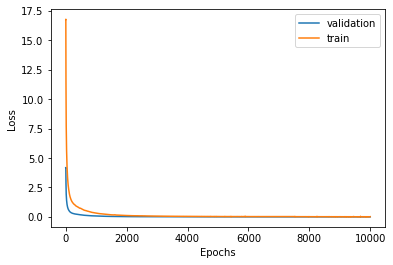

In [4]:
plt.plot(hist_val, label ='validation')
plt.plot(hist_train, label ='train')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('images/'+str(samples)+'_'+str(epsilon)+'_'+str(n)+"_"+str(hidden_size)+"_Loss_Training.png")
plt.show()

In [5]:
#csv_file = open("size_MLP_noise.csv", "a")
#csv_file.write(str(np.asarray(acc_testing))+","+str(np.asarray(acc_training))+","+str(samples)+","+str(epsilon)+","+str(n)+","+str(hidden_size)+"\n")
#csv_file.close()

In [6]:
outputs, intermediates, intermediates2, labels = ut.get_representations(net, train_loader, device)
outputs_test, intermediates_test, intermediates2_test, labels_test = ut.get_representations(net, test_loader, device)

NameError: name 'device' is not defined

In [7]:
intermediate_pca_data, intermediate_pca_data_test = ut.get_pca(intermediates, data_test=intermediates_test)
fig, axs = plt.subplots(2, 3, figsize=(20,15))
ut.plot_representations(intermediate_pca_data, labels, axs[0, 0])
ut.plot_representations(intermediate_pca_data_test, labels_test, axs[1, 0])
intermediate2_pca_data, intermediate2_pca_data_test = ut.get_pca(intermediates2, data_test=intermediates2_test)
ut.plot_representations(intermediate2_pca_data, labels, axs[0, 1])
ut.plot_representations(intermediate2_pca_data_test, labels_test, axs[1, 1])
output_pca_data, output_pca_data_test = ut.get_pca(outputs, data_test=outputs_test)
ut.plot_representations(output_pca_data, labels, axs[0, 2])
ut.plot_representations(output_pca_data_test, labels_test, axs[1, 2])

NameError: name 'intermediates' is not defined

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20,15))
print('first')
reducer = umap.UMAP()
print('first ..')
mapper_train = reducer.fit_transform(intermediates.numpy())
print('first ...')
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 0])
ut.plot_representations(mapper_test, labels_test, axs[1, 0])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(intermediates2.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates2_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 1])
ut.plot_representations(mapper_test, labels_test, axs[1, 1])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(outputs.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(outputs_test.numpy())

ut.plot_representations(mapper_train, labels, axs[0, 2])
ut.plot_representations(mapper_test, labels_test, axs[1, 2])

In [ ]:
N_CURVES = 25000

fig, axs = plt.subplots(2, 3, figsize=(20,15))
intermediate_tsne_data, intermediate_tsne_data_test = ut.get_tsne(intermediates, data_test= intermediates_test, n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data, labels, axs[0, 0],  n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data_test, labels_test, axs[1, 0], n_curves = N_CURVES)

intermediate2_tsne_data, intermediate2_tsne_data_test = ut.get_tsne(intermediates2, data_test=intermediates2_test, n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data, labels, axs[0, 1], n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data_test, labels_test, axs[1, 1], n_curves = N_CURVES)

output_tsne_data, output2_tsne_data_test = ut.get_tsne(outputs, data_test=outputs_test, n_curves = N_CURVES)
ut.plot_representations(output_tsne_data, labels, axs[0, 2], n_curves = N_CURVES)
ut.plot_representations(output2_tsne_data_test, labels_test, axs[1, 2], n_curves = N_CURVES)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
pred_labels = probs_train.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax1)
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = probs_test.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax2)

In [ ]:
curves, labels, probs_train_sample = ut.get_predictions(net, train_loader, device)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(probs_train[:,0], color='black')
ax1.set_xlabel('training set')
ax2.hist(probs_train_sample[:,0], color='black')
ax2.set_xlabel('training set + samples')
ax3.hist(probs_test[:,0], color='black')
ax3.set_xlabel('testing set')
plt.show()

In [ ]:
#N_WEIGHTS = 25
#weights = net.fc2.weight.data
#plot_weights(weights, N_WEIGHTS)

In [ ]:
weights1 = net.fc1.weight.data
w1 = weights1.cpu().numpy().reshape(-1,1)
weights2 = net.fc2.weight.data
w2 = weights2.cpu().numpy().reshape(-1,1)
weights3 = net.fc3.weight.data
w3 = weights3.cpu().numpy().reshape(-1,1)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(w1, color='black')
ax1.set_xlabel('Layer 1')
ax2.hist(w2, color='black')
ax2.set_xlabel('Layer 2')
ax3.hist(w3, color='black')
ax3.set_xlabel('Layer 3')
plt.show()